In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df_train = pd.read_csv('./lenses/lenses.data', names = ["head"])
print(df_train.head())
df_train["head"] = df_train["head"].str.replace("  "," ")
df_train["head"] = df_train["head"].str.split(" ")
df_train["head"] = df_train["head"].apply(lambda x: np.array([int(z) for z in x])) 

               head
0  1  1  1  1  1  3
1  2  1  1  1  2  2
2  3  1  1  2  1  3
3  4  1  1  2  2  1
4  5  1  2  1  1  3


In [4]:
z = np.ravel(df_train.values)
z = np.array(list(z))
z_df = pd.DataFrame(z)

In [5]:
del z_df[0]

In [6]:
z_df[1].value_counts()

3    8
2    8
1    8
Name: 1, dtype: int64

In [7]:
lab = z_df[1]
del z_df[1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z_df.values, lab.values, test_size=0.10, random_state=42)

In [9]:
y_train.shape

(21,)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


train_acc_list = np.zeros((20,1))
test_acc_list = np.zeros((20,1))
for iter in range(1000):
    for m in range(1,20):
        print('iter: ' + str(iter) + ', m: ' + str(m))

        inds = np.random.choice(range(X_train.shape[0]), m, replace=False)
        xtrain = X_train[inds]
        ytrain = y_train[inds]

        clf = GaussianNB(priors=None)
        clf.fit(xtrain, np.ravel(ytrain))

        ypred_train = clf.predict(xtrain)
        train_acc_list[m] = train_acc_list[m] + mae(ytrain, ypred_train)

        ypred = clf.predict(X_test)
        test_acc_list[m] = test_acc_list[m] + mae(y_test,ypred)
        
train_acc_list = train_acc_list/1000.0
test_acc_list = test_acc_list/1000.0

iter: 0, m: 1
iter: 0, m: 2
iter: 0, m: 3
iter: 0, m: 4
iter: 0, m: 5
iter: 0, m: 6
iter: 0, m: 7
iter: 0, m: 8
iter: 0, m: 9
iter: 0, m: 10
iter: 0, m: 11
iter: 0, m: 12
iter: 0, m: 13
iter: 0, m: 14
iter: 0, m: 15
iter: 0, m: 16
iter: 0, m: 17
iter: 0, m: 18
iter: 0, m: 19
iter: 1, m: 1
iter: 1, m: 2
iter: 1, m: 3
iter: 1, m: 4
iter: 1, m: 5
iter: 1, m: 6
iter: 1, m: 7
iter: 1, m: 8
iter: 1, m: 9
iter: 1, m: 10
iter: 1, m: 11
iter: 1, m: 12
iter: 1, m: 13
iter: 1, m: 14
iter: 1, m: 15
iter: 1, m: 16
iter: 1, m: 17
iter: 1, m: 18
iter: 1, m: 19
iter: 2, m: 1
iter: 2, m: 2
iter: 2, m: 3
iter: 2, m: 4

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 2, m: 5
iter: 2, m: 6
iter: 2, m: 7
iter: 2, m: 8
iter: 2, m: 9
iter: 2, m: 10
iter: 2, m: 11
iter: 2, m: 12
iter: 2, m: 13
iter: 2, m: 14
iter: 2, m: 15
iter: 2, m: 16
iter: 2, m: 17
iter: 2, m: 18
iter: 2, m: 19
iter: 3, m: 1
iter: 3, m: 2
iter: 3, m: 3
iter: 3, m: 4
iter: 3, m: 5
iter: 3, m: 6
iter: 3, m: 7
iter: 3, m: 8
iter: 3, m: 9
iter: 3, m: 10
iter: 3, m: 11
iter: 3, m: 12
iter: 3, m: 13
iter: 3, m: 14
iter: 3, m: 15
iter: 3, m: 16
iter: 3, m: 17
iter: 3, m: 18
iter: 3, m: 19
iter: 4, m: 1

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 4, m: 2
iter: 4, m: 3
iter: 4, m: 4
iter: 4, m: 5
iter: 4, m: 6
iter: 4, m: 7
iter: 4, m: 8
iter: 4, m: 9
iter: 4, m: 10
iter: 4, m: 11
iter: 4, m: 12
iter: 4, m: 13
iter: 4, m: 14
iter: 4, m: 15
iter: 4, m: 16
iter: 4, m: 17
iter: 4, m: 18
iter: 4, m: 19
iter: 5, m: 1
iter: 5, m: 2
iter: 5, m: 3
iter: 5, m: 4
iter: 5, m: 5
iter: 5, m: 6
iter: 5, m: 7
iter: 5, m: 8
iter: 5, m: 9
iter: 5, m: 10
iter: 5, m: 11
iter: 5, m: 12
iter: 5, m: 13
iter: 5, m: 14
iter: 5, m: 15
iter: 5, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 5, m: 17
iter: 5, m: 18
iter: 5, m: 19
iter: 6, m: 1
iter: 6, m: 2
iter: 6, m: 3
iter: 6, m: 4
iter: 6, m: 5
iter: 6, m: 6
iter: 6, m: 7
iter: 6, m: 8
iter: 6, m: 9
iter: 6, m: 10
iter: 6, m: 11
iter: 6, m: 12
iter: 6, m: 13
iter: 6, m: 14
iter: 6, m: 15
iter: 6, m: 16
iter: 6, m: 17
iter: 6, m: 18
iter: 6, m: 19
iter: 7, m: 1
iter: 7, m: 2
iter: 7, m: 3
iter: 7, m: 4
iter: 7, m: 5
iter: 7, m: 6
iter: 7, m: 7
iter: 7, m: 8
iter: 7, m: 9
iter: 7, m: 10
iter: 7, m: 11
iter: 7, m: 12
iter: 7, m: 13
iter: 7, m: 14
iter: 7, m: 15
iter: 7, m: 16
iter: 7, m: 17
iter: 7, m: 18

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)



iter: 7, m: 19
iter: 8, m: 1
iter: 8, m: 2
iter: 8, m: 3
iter: 8, m: 4
iter: 8, m: 5
iter: 8, m: 6
iter: 8, m: 7
iter: 8, m: 8
iter: 8, m: 9
iter: 8, m: 10
iter: 8, m: 11
iter: 8, m: 12
iter: 8, m: 13
iter: 8, m: 14
iter: 8, m: 15
iter: 8, m: 16
iter: 8, m: 17
iter: 8, m: 18
iter: 8, m: 19
iter: 9, m: 1
iter: 9, m: 2
iter: 9, m: 3
iter: 9, m: 4
iter: 9, m: 5
iter: 9, m: 6
iter: 9, m: 7
iter: 9, m: 8
iter: 9, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 9, m: 10
iter: 9, m: 11
iter: 9, m: 12
iter: 9, m: 13
iter: 9, m: 14
iter: 9, m: 15
iter: 9, m: 16
iter: 9, m: 17
iter: 9, m: 18
iter: 9, m: 19
iter: 10, m: 1
iter: 10, m: 2
iter: 10, m: 3
iter: 10, m: 4
iter: 10, m: 5
iter: 10, m: 6
iter: 10, m: 7
iter: 10, m: 8
iter: 10, m: 9
iter: 10, m: 10
iter: 10, m: 11
iter: 10, m: 12
iter: 10, m: 13
iter: 10, m: 14
iter: 10, m: 15
iter: 10, m: 16
iter: 10, m: 17
iter: 10, m: 18
iter: 10, m: 19
iter: 11, m: 1
iter: 11, m: 2
iter: 11, m: 3
iter: 11, m: 4
iter: 11, m: 5
iter: 11, m: 6
iter: 11, m: 7
iter: 11, m: 8

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 11, m: 9
iter: 11, m: 10
iter: 11, m: 11
iter: 11, m: 12
iter: 11, m: 13
iter: 11, m: 14
iter: 11, m: 15
iter: 11, m: 16
iter: 11, m: 17
iter: 11, m: 18
iter: 11, m: 19
iter: 12, m: 1
iter: 12, m: 2
iter: 12, m: 3
iter: 12, m: 4
iter: 12, m: 5
iter: 12, m: 6
iter: 12, m: 7
iter: 12, m: 8
iter: 12, m: 9
iter: 12, m: 10
iter: 12, m: 11
iter: 12, m: 12
iter: 12, m: 13
iter: 12, m: 14
iter: 12, m: 15
iter: 12, m: 16
iter: 12, m: 17
iter: 12, m: 18
iter: 12, m: 19
iter: 13, m: 1
iter: 13, m: 2
iter: 13, m: 3
iter: 13, m: 4
iter: 13, m: 5
iter: 13, m: 6
iter: 13, m: 7
iter: 13, m: 8
iter: 13, m: 9
iter: 13, m: 10
iter: 13, m: 11
iter: 13, m: 12
iter: 13, m: 13
iter: 13, m: 14
iter: 13, m: 15
iter: 13, m: 16
iter: 13, m: 17
iter: 13, m: 18
iter: 13, m: 19
iter: 14, m: 1
iter: 14, m: 2
iter: 14, m: 3
iter: 14, m: 4
iter: 14, m: 5
iter: 14, m: 6
iter: 14, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 14, m: 8
iter: 14, m: 9
iter: 14, m: 10
iter: 14, m: 11
iter: 14, m: 12
iter: 14, m: 13
iter: 14, m: 14
iter: 14, m: 15
iter: 14, m: 16
iter: 14, m: 17
iter: 14, m: 18
iter: 14, m: 19
iter: 15, m: 1
iter: 15, m: 2
iter: 15, m: 3
iter: 15, m: 4
iter: 15, m: 5
iter: 15, m: 6
iter: 15, m: 7
iter: 15, m: 8
iter: 15, m: 9
iter: 15, m: 10
iter: 15, m: 11
iter: 15, m: 12
iter: 15, m: 13
iter: 15, m: 14
iter: 15, m: 15
iter: 15, m: 16
iter: 15, m: 17
iter: 15, m: 18
iter: 15, m: 19
iter: 16, m: 1
iter: 16, m: 2
iter: 16, m: 3
iter: 16, m: 4
iter: 16, m: 5
iter: 16, m: 6
iter: 16, m: 7
iter: 16, m: 8
iter: 16, m: 9
iter: 16, m: 10
iter: 16, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 16, m: 12
iter: 16, m: 13
iter: 16, m: 14
iter: 16, m: 15
iter: 16, m: 16
iter: 16, m: 17
iter: 16, m: 18
iter: 16, m: 19
iter: 17, m: 1
iter: 17, m: 2
iter: 17, m: 3
iter: 17, m: 4
iter: 17, m: 5
iter: 17, m: 6
iter: 17, m: 7
iter: 17, m: 8
iter: 17, m: 9
iter: 17, m: 10
iter: 17, m: 11
iter: 17, m: 12
iter: 17, m: 13
iter: 17, m: 14
iter: 17, m: 15
iter: 17, m: 16
iter: 17, m: 17
iter: 17, m: 18
iter: 17, m: 19
iter: 18, m: 1
iter: 18, m: 2
iter: 18, m: 3
iter: 18, m: 4
iter: 18, m: 5
iter: 18, m: 6
iter: 18, m: 7
iter: 18, m: 8
iter: 18, m: 9
iter: 18, m: 10
iter: 18, m: 11
iter: 18, m: 12
iter: 18, m: 13
iter: 18, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 18, m: 15
iter: 18, m: 16
iter: 18, m: 17
iter: 18, m: 18
iter: 18, m: 19
iter: 19, m: 1
iter: 19, m: 2
iter: 19, m: 3
iter: 19, m: 4
iter: 19, m: 5
iter: 19, m: 6
iter: 19, m: 7
iter: 19, m: 8
iter: 19, m: 9
iter: 19, m: 10
iter: 19, m: 11
iter: 19, m: 12
iter: 19, m: 13
iter: 19, m: 14
iter: 19, m: 15
iter: 19, m: 16
iter: 19, m: 17
iter: 19, m: 18
iter: 19, m: 19
iter: 20, m: 1
iter: 20, m: 2
iter: 20, m: 3
iter: 20, m: 4
iter: 20, m: 5
iter: 20, m: 6
iter: 20, m: 7
iter: 20, m: 8
iter: 20, m: 9
iter: 20, m: 10
iter: 20, m: 11
iter: 20, m: 12
iter: 20, m: 13
iter: 20, m: 14
iter: 20, m: 15
iter: 20, m: 16
iter: 20, m: 17
iter: 20, m: 18
iter: 20, m: 19
iter: 21, m: 1
iter: 21, m: 2
iter: 21, m: 3
iter: 21, m: 4
iter: 21, m: 5
iter: 21, m: 6
iter: 21, m: 7
iter: 21, m: 8
iter: 21, m: 9
iter: 21, m: 10
iter: 21, m: 11
iter: 21, m: 12
iter: 21, m: 13
iter: 21, m: 14
iter: 21, m: 15
iter: 21, m: 16
iter: 21, m: 17
iter: 21, m: 18
iter: 21, m: 19
iter: 22, m: 1
iter: 22, m: 2
iter:

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 23, m: 7
iter: 23, m: 8
iter: 23, m: 9
iter: 23, m: 10
iter: 23, m: 11
iter: 23, m: 12
iter: 23, m: 13
iter: 23, m: 14
iter: 23, m: 15
iter: 23, m: 16
iter: 23, m: 17
iter: 23, m: 18
iter: 23, m: 19
iter: 24, m: 1
iter: 24, m: 2
iter: 24, m: 3
iter: 24, m: 4
iter: 24, m: 5
iter: 24, m: 6
iter: 24, m: 7
iter: 24, m: 8
iter: 24, m: 9
iter: 24, m: 10
iter: 24, m: 11
iter: 24, m: 12
iter: 24, m: 13
iter: 24, m: 14
iter: 24, m: 15
iter: 24, m: 16
iter: 24, m: 17
iter: 24, m: 18
iter: 24, m: 19
iter: 25, m: 1
iter: 25, m: 2
iter: 25, m: 3
iter: 25, m: 4
iter: 25, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 25, m: 6
iter: 25, m: 7
iter: 25, m: 8
iter: 25, m: 9
iter: 25, m: 10
iter: 25, m: 11
iter: 25, m: 12
iter: 25, m: 13
iter: 25, m: 14
iter: 25, m: 15
iter: 25, m: 16
iter: 25, m: 17
iter: 25, m: 18
iter: 25, m: 19
iter: 26, m: 1
iter: 26, m: 2
iter: 26, m: 3
iter: 26, m: 4
iter: 26, m: 5
iter: 26, m: 6
iter: 26, m: 7
iter: 26, m: 8
iter: 26, m: 9
iter: 26, m: 10
iter: 26, m: 11
iter: 26, m: 12
iter: 26, m: 13
iter: 26, m: 14
iter: 26, m: 15
iter: 26, m: 16
iter: 26, m: 17
iter: 26, m: 18
iter: 26, m: 19
iter: 27, m: 1
iter: 27, m: 2
iter: 27, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 27, m: 4
iter: 27, m: 5
iter: 27, m: 6
iter: 27, m: 7
iter: 27, m: 8
iter: 27, m: 9
iter: 27, m: 10
iter: 27, m: 11
iter: 27, m: 12
iter: 27, m: 13
iter: 27, m: 14
iter: 27, m: 15
iter: 27, m: 16
iter: 27, m: 17
iter: 27, m: 18
iter: 27, m: 19
iter: 28, m: 1
iter: 28, m: 2
iter: 28, m: 3
iter: 28, m: 4
iter: 28, m: 5
iter: 28, m: 6
iter: 28, m: 7
iter: 28, m: 8
iter: 28, m: 9
iter: 28, m: 10
iter: 28, m: 11
iter: 28, m: 12
iter: 28, m: 13
iter: 28, m: 14
iter: 28, m: 15
iter: 28, m: 16
iter: 28, m: 17
iter: 28, m: 18
iter: 28, m: 19
iter: 29, m: 1
iter: 29, m: 2
iter: 29, m: 3
iter: 29, m: 4
iter: 29, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 29, m: 6
iter: 29, m: 7
iter: 29, m: 8
iter: 29, m: 9
iter: 29, m: 10
iter: 29, m: 11
iter: 29, m: 12
iter: 29, m: 13
iter: 29, m: 14
iter: 29, m: 15
iter: 29, m: 16
iter: 29, m: 17
iter: 29, m: 18
iter: 29, m: 19
iter: 30, m: 1
iter: 30, m: 2
iter: 30, m: 3
iter: 30, m: 4
iter: 30, m: 5
iter: 30, m: 6
iter: 30, m: 7
iter: 30, m: 8
iter: 30, m: 9
iter: 30, m: 10
iter: 30, m: 11
iter: 30, m: 12
iter: 30, m: 13
iter: 30, m: 14
iter: 30, m: 15
iter: 30, m: 16
iter: 30, m: 17
iter: 30, m: 18
iter: 30, m: 19
iter: 31, m: 1
iter: 31, m: 2
iter: 31, m: 3
iter: 31, m: 4
iter: 31, m: 5
iter: 31, m: 6
iter: 31, m: 7
iter: 31, m: 8
iter: 31, m: 9
iter: 31, m: 10
iter: 31, m: 11
iter: 31, m: 12
iter: 31, m: 13
iter: 31, m: 14
iter: 31, m: 15
iter: 31, m: 16
iter: 31, m: 17
iter: 31, m: 18
iter: 31, m: 19
iter: 32, m: 1
iter: 32, m: 2
iter: 32, m: 3
iter: 32, m: 4
iter: 32, m: 5
iter: 32, m: 6
iter: 32, m: 7
iter: 32, m: 8
iter: 32, m: 9
iter: 32, m: 10
iter: 32, m: 11
iter: 32, m: 12
iter: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 33, m: 18
iter: 33, m: 19
iter: 34, m: 1
iter: 34, m: 2
iter: 34, m: 3
iter: 34, m: 4
iter: 34, m: 5
iter: 34, m: 6
iter: 34, m: 7
iter: 34, m: 8
iter: 34, m: 9
iter: 34, m: 10
iter: 34, m: 11
iter: 34, m: 12
iter: 34, m: 13
iter: 34, m: 14
iter: 34, m: 15
iter: 34, m: 16
iter: 34, m: 17
iter: 34, m: 18
iter: 34, m: 19
iter: 35, m: 1
iter: 35, m: 2
iter: 35, m: 3
iter: 35, m: 4
iter: 35, m: 5
iter: 35, m: 6
iter: 35, m: 7
iter: 35, m: 8
iter: 35, m: 9
iter: 35, m: 10
iter: 35, m: 11
iter: 35, m: 12
iter: 35, m: 13
iter: 35, m: 14
iter: 35, m: 15
iter: 35, m: 16

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 35, m: 17
iter: 35, m: 18
iter: 35, m: 19
iter: 36, m: 1
iter: 36, m: 2
iter: 36, m: 3
iter: 36, m: 4
iter: 36, m: 5
iter: 36, m: 6
iter: 36, m: 7
iter: 36, m: 8
iter: 36, m: 9
iter: 36, m: 10
iter: 36, m: 11
iter: 36, m: 12
iter: 36, m: 13
iter: 36, m: 14
iter: 36, m: 15
iter: 36, m: 16
iter: 36, m: 17
iter: 36, m: 18
iter: 36, m: 19
iter: 37, m: 1
iter: 37, m: 2
iter: 37, m: 3
iter: 37, m: 4
iter: 37, m: 5
iter: 37, m: 6
iter: 37, m: 7
iter: 37, m: 8
iter: 37, m: 9
iter: 37, m: 10
iter: 37, m: 11
iter: 37, m: 12
iter: 37, m: 13
iter: 37, m: 14
iter: 37, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 37, m: 16
iter: 37, m: 17
iter: 37, m: 18
iter: 37, m: 19
iter: 38, m: 1
iter: 38, m: 2
iter: 38, m: 3
iter: 38, m: 4
iter: 38, m: 5
iter: 38, m: 6
iter: 38, m: 7
iter: 38, m: 8
iter: 38, m: 9
iter: 38, m: 10
iter: 38, m: 11
iter: 38, m: 12
iter: 38, m: 13
iter: 38, m: 14
iter: 38, m: 15
iter: 38, m: 16
iter: 38, m: 17
iter: 38, m: 18
iter: 38, m: 19
iter: 39, m: 1
iter: 39, m: 2
iter: 39, m: 3
iter: 39, m: 4
iter: 39, m: 5
iter: 39, m: 6
iter: 39, m: 7
iter: 39, m: 8
iter: 39, m: 9
iter: 39, m: 10
iter: 39, m: 11
iter: 39, m: 12
iter: 39, m: 13
iter: 39, m: 14
iter: 39, m: 15
iter: 39, m: 16
iter: 39, m: 17
iter: 39, m: 18
iter: 39, m: 19
iter: 40, m: 1
iter: 40, m: 2
iter: 40, m: 3
iter: 40, m: 4
iter: 40, m: 5
iter: 40, m: 6
iter: 40, m: 7
iter: 40, m: 8
iter: 40, m: 9
iter: 40, m: 10
iter: 40, m: 11
iter: 40, m: 12
iter: 40, m: 13
iter: 40, m: 14
iter: 40, m: 15
iter: 40, m: 16
iter: 40, m: 17
iter: 40, m: 18
iter: 40, m: 19
iter: 41, m: 1
iter: 41, m: 2
iter: 41, m: 3
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 41, m: 10
iter: 41, m: 11
iter: 41, m: 12
iter: 41, m: 13
iter: 41, m: 14
iter: 41, m: 15
iter: 41, m: 16
iter: 41, m: 17
iter: 41, m: 18
iter: 41, m: 19
iter: 42, m: 1
iter: 42, m: 2
iter: 42, m: 3
iter: 42, m: 4
iter: 42, m: 5
iter: 42, m: 6
iter: 42, m: 7
iter: 42, m: 8
iter: 42, m: 9
iter: 42, m: 10
iter: 42, m: 11
iter: 42, m: 12
iter: 42, m: 13
iter: 42, m: 14
iter: 42, m: 15
iter: 42, m: 16
iter: 42, m: 17
iter: 42, m: 18
iter: 42, m: 19
iter: 43, m: 1
iter: 43, m: 2
iter: 43, m: 3
iter: 43, m: 4
iter: 43, m: 5
iter: 43, m: 6
iter: 43, m: 7
iter: 43, m: 8
iter: 43, m: 9
iter: 43, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 43, m: 11
iter: 43, m: 12
iter: 43, m: 13
iter: 43, m: 14
iter: 43, m: 15
iter: 43, m: 16
iter: 43, m: 17
iter: 43, m: 18
iter: 43, m: 19
iter: 44, m: 1
iter: 44, m: 2
iter: 44, m: 3
iter: 44, m: 4
iter: 44, m: 5
iter: 44, m: 6
iter: 44, m: 7
iter: 44, m: 8
iter: 44, m: 9
iter: 44, m: 10
iter: 44, m: 11
iter: 44, m: 12
iter: 44, m: 13
iter: 44, m: 14
iter: 44, m: 15
iter: 44, m: 16
iter: 44, m: 17
iter: 44, m: 18
iter: 44, m: 19
iter: 45, m: 1
iter: 45, m: 2
iter: 45, m: 3
iter: 45, m: 4
iter: 45, m: 5
iter: 45, m: 6
iter: 45, m: 7
iter: 45, m: 8
iter: 45, m: 9
iter: 45, m: 10
iter: 45, m: 11
iter: 45, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 45, m: 13
iter: 45, m: 14
iter: 45, m: 15
iter: 45, m: 16
iter: 45, m: 17
iter: 45, m: 18
iter: 45, m: 19
iter: 46, m: 1
iter: 46, m: 2
iter: 46, m: 3
iter: 46, m: 4
iter: 46, m: 5
iter: 46, m: 6
iter: 46, m: 7
iter: 46, m: 8
iter: 46, m: 9
iter: 46, m: 10
iter: 46, m: 11
iter: 46, m: 12
iter: 46, m: 13
iter: 46, m: 14
iter: 46, m: 15
iter: 46, m: 16
iter: 46, m: 17
iter: 46, m: 18
iter: 46, m: 19
iter: 47, m: 1
iter: 47, m: 2
iter: 47, m: 3
iter: 47, m: 4
iter: 47, m: 5
iter: 47, m: 6
iter: 47, m: 7
iter: 47, m: 8
iter: 47, m: 9
iter: 47, m: 10
iter: 47, m: 11
iter: 47, m: 12
iter: 47, m: 13
iter: 47, m: 14
iter: 47, m: 15
iter: 47, m: 16
iter: 47, m: 17
iter: 47, m: 18
iter: 47, m: 19
iter: 48, m: 1
iter: 48, m: 2
iter: 48, m: 3
iter: 48, m: 4
iter: 48, m: 5
iter: 48, m: 6
iter: 48, m: 7
iter: 48, m: 8
iter: 48, m: 9
iter: 48, m: 10
iter: 48, m: 11
iter: 48, m: 12
iter: 48, m: 13
iter: 48, m: 14
iter: 48, m: 15
iter: 48, m: 16
iter: 48, m: 17
iter: 48, m: 18
iter: 48, m: 19
ite

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 49, m: 12
iter: 49, m: 13
iter: 49, m: 14
iter: 49, m: 15
iter: 49, m: 16
iter: 49, m: 17
iter: 49, m: 18
iter: 49, m: 19
iter: 50, m: 1
iter: 50, m: 2
iter: 50, m: 3
iter: 50, m: 4
iter: 50, m: 5
iter: 50, m: 6
iter: 50, m: 7
iter: 50, m: 8
iter: 50, m: 9
iter: 50, m: 10
iter: 50, m: 11
iter: 50, m: 12
iter: 50, m: 13
iter: 50, m: 14
iter: 50, m: 15
iter: 50, m: 16
iter: 50, m: 17
iter: 50, m: 18
iter: 50, m: 19
iter: 51, m: 1
iter: 51, m: 2
iter: 51, m: 3
iter: 51, m: 4
iter: 51, m: 5
iter: 51, m: 6
iter: 51, m: 7
iter: 51, m: 8
iter: 51, m: 9
iter: 51, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 51, m: 11
iter: 51, m: 12
iter: 51, m: 13
iter: 51, m: 14
iter: 51, m: 15
iter: 51, m: 16
iter: 51, m: 17
iter: 51, m: 18
iter: 51, m: 19
iter: 52, m: 1
iter: 52, m: 2
iter: 52, m: 3
iter: 52, m: 4
iter: 52, m: 5
iter: 52, m: 6
iter: 52, m: 7
iter: 52, m: 8
iter: 52, m: 9
iter: 52, m: 10
iter: 52, m: 11
iter: 52, m: 12
iter: 52, m: 13
iter: 52, m: 14
iter: 52, m: 15
iter: 52, m: 16
iter: 52, m: 17
iter: 52, m: 18
iter: 52, m: 19
iter: 53, m: 1
iter: 53, m: 2
iter: 53, m: 3
iter: 53, m: 4
iter: 53, m: 5
iter: 53, m: 6
iter: 53, m: 7
iter: 53, m: 8
iter: 53, m: 9

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 53, m: 10
iter: 53, m: 11
iter: 53, m: 12
iter: 53, m: 13
iter: 53, m: 14
iter: 53, m: 15
iter: 53, m: 16
iter: 53, m: 17
iter: 53, m: 18
iter: 53, m: 19
iter: 54, m: 1
iter: 54, m: 2
iter: 54, m: 3
iter: 54, m: 4
iter: 54, m: 5
iter: 54, m: 6
iter: 54, m: 7
iter: 54, m: 8
iter: 54, m: 9
iter: 54, m: 10
iter: 54, m: 11
iter: 54, m: 12
iter: 54, m: 13
iter: 54, m: 14
iter: 54, m: 15
iter: 54, m: 16
iter: 54, m: 17
iter: 54, m: 18
iter: 54, m: 19
iter: 55, m: 1
iter: 55, m: 2
iter: 55, m: 3
iter: 55, m: 4
iter: 55, m: 5
iter: 55, m: 6
iter: 55, m: 7
iter: 55, m: 8
iter: 55, m: 9
iter: 55, m: 10
iter: 55, m: 11
iter: 55, m: 12
iter: 55, m: 13
iter: 55, m: 14
iter: 55, m: 15
iter: 55, m: 16
iter: 55, m: 17
iter: 55, m: 18
iter: 55, m: 19
iter: 56, m: 1
iter: 56, m: 2
iter: 56, m: 3
iter: 56, m: 4
iter: 56, m: 5
iter: 56, m: 6
iter: 56, m: 7
iter: 56, m: 8
iter: 56, m: 9
iter: 56, m: 10
iter: 56, m: 11
iter: 56, m: 12
iter: 56, m: 13
iter: 56, m: 14
iter: 56, m: 15
iter: 56, m: 16
it

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 57, m: 2
iter: 57, m: 3
iter: 57, m: 4
iter: 57, m: 5
iter: 57, m: 6
iter: 57, m: 7
iter: 57, m: 8
iter: 57, m: 9
iter: 57, m: 10
iter: 57, m: 11
iter: 57, m: 12
iter: 57, m: 13
iter: 57, m: 14
iter: 57, m: 15
iter: 57, m: 16
iter: 57, m: 17
iter: 57, m: 18
iter: 57, m: 19
iter: 58, m: 1
iter: 58, m: 2
iter: 58, m: 3
iter: 58, m: 4
iter: 58, m: 5
iter: 58, m: 6
iter: 58, m: 7
iter: 58, m: 8
iter: 58, m: 9
iter: 58, m: 10
iter: 58, m: 11
iter: 58, m: 12
iter: 58, m: 13
iter: 58, m: 14
iter: 58, m: 15
iter: 58, m: 16
iter: 58, m: 17
iter: 58, m: 18
iter: 58, m: 19
iter: 59, m: 1
iter: 59, m: 2
iter: 59, m: 3
iter: 59, m: 4
iter: 59, m: 5
iter: 59, m: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 59, m: 7
iter: 59, m: 8
iter: 59, m: 9
iter: 59, m: 10
iter: 59, m: 11
iter: 59, m: 12
iter: 59, m: 13
iter: 59, m: 14
iter: 59, m: 15
iter: 59, m: 16
iter: 59, m: 17
iter: 59, m: 18
iter: 59, m: 19
iter: 60, m: 1
iter: 60, m: 2
iter: 60, m: 3
iter: 60, m: 4
iter: 60, m: 5
iter: 60, m: 6
iter: 60, m: 7
iter: 60, m: 8
iter: 60, m: 9
iter: 60, m: 10
iter: 60, m: 11
iter: 60, m: 12
iter: 60, m: 13
iter: 60, m: 14
iter: 60, m: 15
iter: 60, m: 16
iter: 60, m: 17
iter: 60, m: 18
iter: 60, m: 19
iter: 61, m: 1
iter: 61, m: 2
iter: 61, m: 3
iter: 61, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 61, m: 5
iter: 61, m: 6
iter: 61, m: 7
iter: 61, m: 8
iter: 61, m: 9
iter: 61, m: 10
iter: 61, m: 11
iter: 61, m: 12
iter: 61, m: 13
iter: 61, m: 14
iter: 61, m: 15
iter: 61, m: 16
iter: 61, m: 17
iter: 61, m: 18
iter: 61, m: 19
iter: 62, m: 1
iter: 62, m: 2
iter: 62, m: 3
iter: 62, m: 4
iter: 62, m: 5
iter: 62, m: 6
iter: 62, m: 7
iter: 62, m: 8
iter: 62, m: 9
iter: 62, m: 10
iter: 62, m: 11
iter: 62, m: 12
iter: 62, m: 13
iter: 62, m: 14
iter: 62, m: 15
iter: 62, m: 16
iter: 62, m: 17
iter: 62, m: 18
iter: 62, m: 19
iter: 63, m: 1
iter: 63, m: 2
iter: 63, m: 3
iter: 63, m: 4
iter: 63, m: 5
iter: 63, m: 6
iter: 63, m: 7
iter: 63, m: 8
iter: 63, m: 9
iter: 63, m: 10
iter: 63, m: 11
iter: 63, m: 12
iter: 63, m: 13
iter: 63, m: 14
iter: 63, m: 15
iter: 63, m: 16
iter: 63, m: 17
iter: 63, m: 18
iter: 63, m: 19
iter: 64, m: 1
iter: 64, m: 2
iter: 64, m: 3
iter: 64, m: 4
iter: 64, m: 5
iter: 64, m: 6
iter: 64, m: 7
iter: 64, m: 8
iter: 64, m: 9
iter: 64, m: 10
iter: 64, m: 11
iter: 64

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)



iter: 66, m: 1
iter: 66, m: 2
iter: 66, m: 3
iter: 66, m: 4
iter: 66, m: 5
iter: 66, m: 6
iter: 66, m: 7
iter: 66, m: 8
iter: 66, m: 9
iter: 66, m: 10
iter: 66, m: 11
iter: 66, m: 12
iter: 66, m: 13
iter: 66, m: 14
iter: 66, m: 15
iter: 66, m: 16
iter: 66, m: 17
iter: 66, m: 18
iter: 66, m: 19
iter: 67, m: 1
iter: 67, m: 2
iter: 67, m: 3
iter: 67, m: 4
iter: 67, m: 5
iter: 67, m: 6
iter: 67, m: 7
iter: 67, m: 8
iter: 67, m: 9
iter: 67, m: 10
iter: 67, m: 11
iter: 67, m: 12
iter: 67, m: 13
iter: 67, m: 14
iter: 67, m: 15
iter: 67, m: 16
iter: 67, m: 17
iter: 67, m: 18
iter: 67, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 68, m: 1
iter: 68, m: 2
iter: 68, m: 3
iter: 68, m: 4
iter: 68, m: 5
iter: 68, m: 6
iter: 68, m: 7
iter: 68, m: 8
iter: 68, m: 9
iter: 68, m: 10
iter: 68, m: 11
iter: 68, m: 12
iter: 68, m: 13
iter: 68, m: 14
iter: 68, m: 15
iter: 68, m: 16
iter: 68, m: 17
iter: 68, m: 18
iter: 68, m: 19
iter: 69, m: 1
iter: 69, m: 2
iter: 69, m: 3
iter: 69, m: 4
iter: 69, m: 5
iter: 69, m: 6
iter: 69, m: 7
iter: 69, m: 8
iter: 69, m: 9
iter: 69, m: 10
iter: 69, m: 11
iter: 69, m: 12
iter: 69, m: 13
iter: 69, m: 14
iter: 69, m: 15
iter: 69, m: 16
iter: 69, m: 17
iter: 69, m: 18
iter: 69, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 70, m: 1
iter: 70, m: 2
iter: 70, m: 3
iter: 70, m: 4
iter: 70, m: 5
iter: 70, m: 6
iter: 70, m: 7
iter: 70, m: 8
iter: 70, m: 9
iter: 70, m: 10
iter: 70, m: 11
iter: 70, m: 12
iter: 70, m: 13
iter: 70, m: 14
iter: 70, m: 15
iter: 70, m: 16
iter: 70, m: 17
iter: 70, m: 18
iter: 70, m: 19
iter: 71, m: 1
iter: 71, m: 2
iter: 71, m: 3
iter: 71, m: 4
iter: 71, m: 5
iter: 71, m: 6
iter: 71, m: 7
iter: 71, m: 8
iter: 71, m: 9
iter: 71, m: 10
iter: 71, m: 11
iter: 71, m: 12
iter: 71, m: 13
iter: 71, m: 14
iter: 71, m: 15
iter: 71, m: 16
iter: 71, m: 17
iter: 71, m: 18
iter: 71, m: 19
iter: 72, m: 1
iter: 72, m: 2
iter: 72, m: 3
iter: 72, m: 4
iter: 72, m: 5
iter: 72, m: 6
iter: 72, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 72, m: 8
iter: 72, m: 9
iter: 72, m: 10
iter: 72, m: 11
iter: 72, m: 12
iter: 72, m: 13
iter: 72, m: 14
iter: 72, m: 15
iter: 72, m: 16
iter: 72, m: 17
iter: 72, m: 18
iter: 72, m: 19
iter: 73, m: 1
iter: 73, m: 2
iter: 73, m: 3
iter: 73, m: 4
iter: 73, m: 5
iter: 73, m: 6
iter: 73, m: 7
iter: 73, m: 8
iter: 73, m: 9
iter: 73, m: 10
iter: 73, m: 11
iter: 73, m: 12
iter: 73, m: 13
iter: 73, m: 14
iter: 73, m: 15
iter: 73, m: 16
iter: 73, m: 17
iter: 73, m: 18
iter: 73, m: 19
iter: 74, m: 1
iter: 74, m: 2
iter: 74, m: 3
iter: 74, m: 4
iter: 74, m: 5
iter: 74, m: 6
iter: 74, m: 7
iter: 74, m: 8
iter: 74, m: 9
iter: 74, m: 10
iter: 74, m: 11
iter: 74, m: 12
iter: 74, m: 13
iter: 74, m: 14
iter: 74, m: 15
iter: 74, m: 16
iter: 74, m: 17
iter: 74, m: 18
iter: 74, m: 19
iter: 75, m: 1
iter: 75, m: 2
iter: 75, m: 3
iter: 75, m: 4
iter: 75, m: 5
iter: 75, m: 6
iter: 75, m: 7
iter: 75, m: 8
iter: 75, m: 9
iter: 75, m: 10
iter: 75, m: 11
iter: 75, m: 12
iter: 75, m: 13
iter: 75, m: 14
iter

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 76, m: 14
iter: 76, m: 15
iter: 76, m: 16
iter: 76, m: 17
iter: 76, m: 18
iter: 76, m: 19
iter: 77, m: 1
iter: 77, m: 2
iter: 77, m: 3
iter: 77, m: 4
iter: 77, m: 5
iter: 77, m: 6
iter: 77, m: 7
iter: 77, m: 8
iter: 77, m: 9
iter: 77, m: 10
iter: 77, m: 11
iter: 77, m: 12
iter: 77, m: 13
iter: 77, m: 14
iter: 77, m: 15
iter: 77, m: 16
iter: 77, m: 17
iter: 77, m: 18
iter: 77, m: 19
iter: 78, m: 1
iter: 78, m: 2
iter: 78, m: 3
iter: 78, m: 4
iter: 78, m: 5
iter: 78, m: 6
iter: 78, m: 7
iter: 78, m: 8
iter: 78, m: 9
iter: 78, m: 10
iter: 78, m: 11
iter: 78, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 78, m: 13
iter: 78, m: 14
iter: 78, m: 15
iter: 78, m: 16
iter: 78, m: 17
iter: 78, m: 18
iter: 78, m: 19
iter: 79, m: 1
iter: 79, m: 2
iter: 79, m: 3
iter: 79, m: 4
iter: 79, m: 5
iter: 79, m: 6
iter: 79, m: 7
iter: 79, m: 8
iter: 79, m: 9
iter: 79, m: 10
iter: 79, m: 11
iter: 79, m: 12
iter: 79, m: 13
iter: 79, m: 14
iter: 79, m: 15
iter: 79, m: 16
iter: 79, m: 17
iter: 79, m: 18
iter: 79, m: 19
iter: 80, m: 1
iter: 80, m: 2
iter: 80, m: 3
iter: 80, m: 4
iter: 80, m: 5
iter: 80, m: 6
iter: 80, m: 7
iter: 80, m: 8
iter: 80, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 80, m: 10
iter: 80, m: 11
iter: 80, m: 12
iter: 80, m: 13
iter: 80, m: 14
iter: 80, m: 15
iter: 80, m: 16
iter: 80, m: 17
iter: 80, m: 18
iter: 80, m: 19
iter: 81, m: 1
iter: 81, m: 2
iter: 81, m: 3
iter: 81, m: 4
iter: 81, m: 5
iter: 81, m: 6
iter: 81, m: 7
iter: 81, m: 8
iter: 81, m: 9
iter: 81, m: 10
iter: 81, m: 11
iter: 81, m: 12
iter: 81, m: 13
iter: 81, m: 14
iter: 81, m: 15
iter: 81, m: 16
iter: 81, m: 17
iter: 81, m: 18
iter: 81, m: 19
iter: 82, m: 1
iter: 82, m: 2
iter: 82, m: 3
iter: 82, m: 4
iter: 82, m: 5
iter: 82, m: 6
iter: 82, m: 7
iter: 82, m: 8
iter: 82, m: 9
iter: 82, m: 10
iter: 82, m: 11
iter: 82, m: 12
iter: 82, m: 13
iter: 82, m: 14
iter: 82, m: 15
iter: 82, m: 16
iter: 82, m: 17
iter: 82, m: 18
iter: 82, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 83, m: 1
iter: 83, m: 2
iter: 83, m: 3
iter: 83, m: 4
iter: 83, m: 5
iter: 83, m: 6
iter: 83, m: 7
iter: 83, m: 8
iter: 83, m: 9
iter: 83, m: 10
iter: 83, m: 11
iter: 83, m: 12
iter: 83, m: 13
iter: 83, m: 14
iter: 83, m: 15
iter: 83, m: 16
iter: 83, m: 17
iter: 83, m: 18
iter: 83, m: 19
iter: 84, m: 1
iter: 84, m: 2
iter: 84, m: 3
iter: 84, m: 4
iter: 84, m: 5
iter: 84, m: 6
iter: 84, m: 7
iter: 84, m: 8
iter: 84, m: 9
iter: 84, m: 10
iter: 84, m: 11
iter: 84, m: 12
iter: 84, m: 13
iter: 84, m: 14
iter: 84, m: 15
iter: 84, m: 16
iter: 84, m: 17
iter: 84, m: 18
iter: 84, m: 19
iter: 85, m: 1
iter: 85, m: 2
iter: 85, m: 3
iter: 85, m: 4
iter: 85, m: 5
iter: 85, m: 6
iter: 85, m: 7
iter: 85, m: 8
iter: 85, m: 9
iter: 85, m: 10
iter: 85, m: 11
iter: 85, m: 12
iter: 85, m: 13
iter: 85, m: 14
iter: 85, m: 15
iter: 85, m: 16
iter: 85, m: 17
iter: 85, m: 18
iter: 85, m: 19
iter: 86, m: 1
iter: 86, m: 2
iter: 86, m: 3
iter: 86, m: 4
iter: 86, m: 5
iter: 86, m: 6
iter: 86, m: 7
iter: 86, 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 87, m: 8
iter: 87, m: 9
iter: 87, m: 10
iter: 87, m: 11
iter: 87, m: 12
iter: 87, m: 13
iter: 87, m: 14
iter: 87, m: 15
iter: 87, m: 16
iter: 87, m: 17
iter: 87, m: 18
iter: 87, m: 19
iter: 88, m: 1
iter: 88, m: 2
iter: 88, m: 3
iter: 88, m: 4
iter: 88, m: 5
iter: 88, m: 6
iter: 88, m: 7
iter: 88, m: 8
iter: 88, m: 9
iter: 88, m: 10
iter: 88, m: 11
iter: 88, m: 12
iter: 88, m: 13
iter: 88, m: 14
iter: 88, m: 15
iter: 88, m: 16
iter: 88, m: 17
iter: 88, m: 18
iter: 88, m: 19
iter: 89, m: 1
iter: 89, m: 2
iter: 89, m: 3
iter: 89, m: 4
iter: 89, m: 5
iter: 89, m: 6
iter: 89, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 89, m: 8
iter: 89, m: 9
iter: 89, m: 10
iter: 89, m: 11
iter: 89, m: 12
iter: 89, m: 13
iter: 89, m: 14
iter: 89, m: 15
iter: 89, m: 16
iter: 89, m: 17
iter: 89, m: 18
iter: 89, m: 19
iter: 90, m: 1
iter: 90, m: 2
iter: 90, m: 3
iter: 90, m: 4
iter: 90, m: 5
iter: 90, m: 6
iter: 90, m: 7
iter: 90, m: 8
iter: 90, m: 9
iter: 90, m: 10
iter: 90, m: 11
iter: 90, m: 12
iter: 90, m: 13
iter: 90, m: 14
iter: 90, m: 15
iter: 90, m: 16
iter: 90, m: 17
iter: 90, m: 18
iter: 90, m: 19
iter: 91, m: 1
iter: 91, m: 2
iter: 91, m: 3
iter: 91, m: 4
iter: 91, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 91, m: 6
iter: 91, m: 7
iter: 91, m: 8
iter: 91, m: 9
iter: 91, m: 10
iter: 91, m: 11
iter: 91, m: 12
iter: 91, m: 13
iter: 91, m: 14
iter: 91, m: 15
iter: 91, m: 16
iter: 91, m: 17
iter: 91, m: 18
iter: 91, m: 19
iter: 92, m: 1
iter: 92, m: 2
iter: 92, m: 3
iter: 92, m: 4
iter: 92, m: 5
iter: 92, m: 6
iter: 92, m: 7
iter: 92, m: 8
iter: 92, m: 9
iter: 92, m: 10
iter: 92, m: 11
iter: 92, m: 12
iter: 92, m: 13
iter: 92, m: 14
iter: 92, m: 15
iter: 92, m: 16
iter: 92, m: 17
iter: 92, m: 18
iter: 92, m: 19
iter: 93, m: 1
iter: 93, m: 2
iter: 93, m: 3
iter: 93, m: 4
iter: 93, m: 5
iter: 93, m: 6
iter: 93, m: 7
iter: 93, m: 8
iter: 93, m: 9
iter: 93, m: 10
iter: 93, m: 11
iter: 93, m: 12
iter: 93, m: 13
iter: 93, m: 14
iter: 93, m: 15
iter: 93, m: 16
iter: 93, m: 17
iter: 93, m: 18
iter: 93, m: 19
iter: 94, m: 1
iter: 94, m: 2
iter: 94, m: 3
iter: 94, m: 4
iter: 94, m: 5
iter: 94, m: 6
iter: 94, m: 7
iter: 94, m: 8
iter: 94, m: 9
iter: 94, m: 10
iter: 94, m: 11
iter: 94, m: 12
iter: 9

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 95, m: 17
iter: 95, m: 18
iter: 95, m: 19
iter: 96, m: 1
iter: 96, m: 2
iter: 96, m: 3
iter: 96, m: 4
iter: 96, m: 5
iter: 96, m: 6
iter: 96, m: 7
iter: 96, m: 8
iter: 96, m: 9
iter: 96, m: 10
iter: 96, m: 11
iter: 96, m: 12
iter: 96, m: 13
iter: 96, m: 14
iter: 96, m: 15
iter: 96, m: 16
iter: 96, m: 17
iter: 96, m: 18
iter: 96, m: 19
iter: 97, m: 1
iter: 97, m: 2
iter: 97, m: 3
iter: 97, m: 4
iter: 97, m: 5
iter: 97, m: 6
iter: 97, m: 7
iter: 97, m: 8
iter: 97, m: 9
iter: 97, m: 10
iter: 97, m: 11
iter: 97, m: 12
iter: 97, m: 13
iter: 97, m: 14
iter: 97, m: 15
iter: 97, m: 16
iter: 97, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 97, m: 18
iter: 97, m: 19
iter: 98, m: 1
iter: 98, m: 2
iter: 98, m: 3
iter: 98, m: 4
iter: 98, m: 5
iter: 98, m: 6
iter: 98, m: 7
iter: 98, m: 8
iter: 98, m: 9
iter: 98, m: 10
iter: 98, m: 11
iter: 98, m: 12
iter: 98, m: 13
iter: 98, m: 14
iter: 98, m: 15
iter: 98, m: 16
iter: 98, m: 17
iter: 98, m: 18
iter: 98, m: 19
iter: 99, m: 1
iter: 99, m: 2
iter: 99, m: 3
iter: 99, m: 4
iter: 99, m: 5
iter: 99, m: 6
iter: 99, m: 7
iter: 99, m: 8
iter: 99, m: 9
iter: 99, m: 10
iter: 99, m: 11
iter: 99, m: 12
iter: 99, m: 13
iter: 99, m: 14
iter: 99, m: 15
iter: 99, m: 16
iter: 99, m: 17
iter: 99, m: 18
iter: 99, m: 19
iter: 100, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 100, m: 2
iter: 100, m: 3
iter: 100, m: 4
iter: 100, m: 5
iter: 100, m: 6
iter: 100, m: 7
iter: 100, m: 8
iter: 100, m: 9
iter: 100, m: 10
iter: 100, m: 11
iter: 100, m: 12
iter: 100, m: 13
iter: 100, m: 14
iter: 100, m: 15
iter: 100, m: 16
iter: 100, m: 17
iter: 100, m: 18
iter: 100, m: 19
iter: 101, m: 1
iter: 101, m: 2
iter: 101, m: 3
iter: 101, m: 4
iter: 101, m: 5
iter: 101, m: 6
iter: 101, m: 7
iter: 101, m: 8
iter: 101, m: 9
iter: 101, m: 10
iter: 101, m: 11
iter: 101, m: 12
iter: 101, m: 13
iter: 101, m: 14
iter: 101, m: 15
iter: 101, m: 16
iter: 101, m: 17
iter: 101, m: 18
iter: 101, m: 19
iter: 102, m: 1
iter: 102, m: 2
iter: 102, m: 3
iter: 102, m: 4
iter: 102, m: 5
iter: 102, m: 6
iter: 102, m: 7
iter: 102, m: 8
iter: 102, m: 9
iter: 102, m: 10
iter: 102, m: 11
iter: 102, m: 12
iter: 102, m: 13
iter: 102, m: 14
iter: 102, m: 15
iter: 102, m: 16
iter: 102, m: 17
iter: 102, m: 18
iter: 102, m: 19
iter: 103, m: 1
iter: 103, m: 2
iter: 103, m: 3
iter: 103, m: 4
iter: 103,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 104, m: 15
iter: 104, m: 16
iter: 104, m: 17
iter: 104, m: 18
iter: 104, m: 19
iter: 105, m: 1
iter: 105, m: 2
iter: 105, m: 3
iter: 105, m: 4
iter: 105, m: 5
iter: 105, m: 6
iter: 105, m: 7
iter: 105, m: 8
iter: 105, m: 9
iter: 105, m: 10
iter: 105, m: 11
iter: 105, m: 12
iter: 105, m: 13
iter: 105, m: 14
iter: 105, m: 15
iter: 105, m: 16
iter: 105, m: 17
iter: 105, m: 18
iter: 105, m: 19
iter: 106, m: 1
iter: 106, m: 2
iter: 106, m: 3
iter: 106, m: 4
iter: 106, m: 5
iter: 106, m: 6
iter: 106, m: 7
iter: 106, m: 8
iter: 106, m: 9
iter: 106, m: 10
iter: 106, m: 11
iter: 106, m: 12
iter: 106, m: 13
iter: 106, m: 14
iter: 106, m: 15
iter: 106, m: 16
iter: 106, m: 17
iter: 106, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 106, m: 19
iter: 107, m: 1
iter: 107, m: 2
iter: 107, m: 3
iter: 107, m: 4
iter: 107, m: 5
iter: 107, m: 6
iter: 107, m: 7
iter: 107, m: 8
iter: 107, m: 9
iter: 107, m: 10
iter: 107, m: 11
iter: 107, m: 12
iter: 107, m: 13
iter: 107, m: 14
iter: 107, m: 15
iter: 107, m: 16
iter: 107, m: 17
iter: 107, m: 18
iter: 107, m: 19
iter: 108, m: 1
iter: 108, m: 2
iter: 108, m: 3
iter: 108, m: 4
iter: 108, m: 5
iter: 108, m: 6
iter: 108, m: 7
iter: 108, m: 8
iter: 108, m: 9
iter: 108, m: 10
iter: 108, m: 11
iter: 108, m: 12
iter: 108, m: 13
iter: 108, m: 14
iter: 108, m: 15
iter: 108, m: 16
iter: 108, m: 17
iter: 108, m: 18
iter: 108, m: 19
iter: 109, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 109, m: 2
iter: 109, m: 3
iter: 109, m: 4
iter: 109, m: 5
iter: 109, m: 6
iter: 109, m: 7
iter: 109, m: 8
iter: 109, m: 9
iter: 109, m: 10
iter: 109, m: 11
iter: 109, m: 12
iter: 109, m: 13
iter: 109, m: 14
iter: 109, m: 15
iter: 109, m: 16
iter: 109, m: 17
iter: 109, m: 18
iter: 109, m: 19
iter: 110, m: 1
iter: 110, m: 2
iter: 110, m: 3
iter: 110, m: 4
iter: 110, m: 5
iter: 110, m: 6
iter: 110, m: 7
iter: 110, m: 8
iter: 110, m: 9
iter: 110, m: 10
iter: 110, m: 11
iter: 110, m: 12
iter: 110, m: 13
iter: 110, m: 14
iter: 110, m: 15
iter: 110, m: 16
iter: 110, m: 17
iter: 110, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 110, m: 19
iter: 111, m: 1
iter: 111, m: 2
iter: 111, m: 3
iter: 111, m: 4
iter: 111, m: 5
iter: 111, m: 6
iter: 111, m: 7
iter: 111, m: 8
iter: 111, m: 9
iter: 111, m: 10
iter: 111, m: 11
iter: 111, m: 12
iter: 111, m: 13
iter: 111, m: 14
iter: 111, m: 15
iter: 111, m: 16
iter: 111, m: 17
iter: 111, m: 18
iter: 111, m: 19
iter: 112, m: 1
iter: 112, m: 2
iter: 112, m: 3
iter: 112, m: 4
iter: 112, m: 5
iter: 112, m: 6
iter: 112, m: 7
iter: 112, m: 8
iter: 112, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 112, m: 10
iter: 112, m: 11
iter: 112, m: 12
iter: 112, m: 13
iter: 112, m: 14
iter: 112, m: 15
iter: 112, m: 16
iter: 112, m: 17
iter: 112, m: 18
iter: 112, m: 19
iter: 113, m: 1
iter: 113, m: 2
iter: 113, m: 3
iter: 113, m: 4
iter: 113, m: 5
iter: 113, m: 6
iter: 113, m: 7
iter: 113, m: 8
iter: 113, m: 9
iter: 113, m: 10
iter: 113, m: 11
iter: 113, m: 12
iter: 113, m: 13
iter: 113, m: 14
iter: 113, m: 15
iter: 113, m: 16
iter: 113, m: 17
iter: 113, m: 18
iter: 113, m: 19
iter: 114, m: 1
iter: 114, m: 2
iter: 114, m: 3
iter: 114, m: 4
iter: 114, m: 5
iter: 114, m: 6
iter: 114, m: 7
iter: 114, m: 8
iter: 114, m: 9
iter: 114, m: 10
iter: 114, m: 11
iter: 114, m: 12
iter: 114, m: 13
iter: 114, m: 14
iter: 114, m: 15
iter: 114, m: 16
iter: 114, m: 17
iter: 114, m: 18
iter: 114, m: 19
iter: 115, m: 1
iter: 115, m: 2
iter: 115, m: 3
iter: 115, m: 4
iter: 115, m: 5
iter: 115, m: 6
iter: 115, m: 7
iter: 115, m: 8
iter: 115, m: 9
iter: 115, m: 10
iter: 115, m: 11
iter: 115, m: 12
iter: 1

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 116, m: 2
iter: 116, m: 3
iter: 116, m: 4
iter: 116, m: 5
iter: 116, m: 6
iter: 116, m: 7
iter: 116, m: 8
iter: 116, m: 9
iter: 116, m: 10
iter: 116, m: 11
iter: 116, m: 12
iter: 116, m: 13
iter: 116, m: 14
iter: 116, m: 15
iter: 116, m: 16
iter: 116, m: 17
iter: 116, m: 18
iter: 116, m: 19
iter: 117, m: 1
iter: 117, m: 2
iter: 117, m: 3
iter: 117, m: 4
iter: 117, m: 5
iter: 117, m: 6
iter: 117, m: 7
iter: 117, m: 8
iter: 117, m: 9
iter: 117, m: 10
iter: 117, m: 11
iter: 117, m: 12
iter: 117, m: 13
iter: 117, m: 14
iter: 117, m: 15
iter: 117, m: 16
iter: 117, m: 17
iter: 117, m: 18
iter: 117, m: 19
iter: 118, m: 1
iter: 118, m: 2
iter: 118, m: 3
iter: 118, m: 4
iter: 118, m: 5
iter: 118, m: 6
iter: 118, m: 7
iter: 118, m: 8
iter: 118, m: 9
iter: 118, m: 10
iter: 118, m: 11
iter: 118, m: 12
iter: 118, m: 13
iter: 118, m: 14
iter: 118, m: 15
iter: 118, m: 16
iter: 118, m: 17
iter: 118, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 118, m: 19
iter: 119, m: 1
iter: 119, m: 2
iter: 119, m: 3
iter: 119, m: 4
iter: 119, m: 5
iter: 119, m: 6
iter: 119, m: 7
iter: 119, m: 8
iter: 119, m: 9
iter: 119, m: 10
iter: 119, m: 11
iter: 119, m: 12
iter: 119, m: 13
iter: 119, m: 14
iter: 119, m: 15
iter: 119, m: 16
iter: 119, m: 17
iter: 119, m: 18
iter: 119, m: 19
iter: 120, m: 1
iter: 120, m: 2
iter: 120, m: 3
iter: 120, m: 4
iter: 120, m: 5
iter: 120, m: 6
iter: 120, m: 7
iter: 120, m: 8
iter: 120, m: 9
iter: 120, m: 10
iter: 120, m: 11
iter: 120, m: 12
iter: 120, m: 13
iter: 120, m: 14
iter: 120, m: 15
iter: 120, m: 16
iter: 120, m: 17
iter: 120, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 120, m: 19
iter: 121, m: 1
iter: 121, m: 2
iter: 121, m: 3
iter: 121, m: 4
iter: 121, m: 5
iter: 121, m: 6
iter: 121, m: 7
iter: 121, m: 8
iter: 121, m: 9
iter: 121, m: 10
iter: 121, m: 11
iter: 121, m: 12
iter: 121, m: 13
iter: 121, m: 14
iter: 121, m: 15
iter: 121, m: 16
iter: 121, m: 17
iter: 121, m: 18
iter: 121, m: 19
iter: 122, m: 1
iter: 122, m: 2
iter: 122, m: 3
iter: 122, m: 4
iter: 122, m: 5
iter: 122, m: 6
iter: 122, m: 7
iter: 122, m: 8
iter: 122, m: 9
iter: 122, m: 10
iter: 122, m: 11
iter: 122, m: 12
iter: 122, m: 13
iter: 122, m: 14
iter: 122, m: 15
iter: 122, m: 16
iter: 122, m: 17
iter: 122, m: 18
iter: 122, m: 19
iter: 123, m: 1
iter: 123, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 123, m: 3
iter: 123, m: 4
iter: 123, m: 5
iter: 123, m: 6
iter: 123, m: 7
iter: 123, m: 8
iter: 123, m: 9
iter: 123, m: 10
iter: 123, m: 11
iter: 123, m: 12
iter: 123, m: 13
iter: 123, m: 14
iter: 123, m: 15
iter: 123, m: 16
iter: 123, m: 17
iter: 123, m: 18
iter: 123, m: 19
iter: 124, m: 1
iter: 124, m: 2
iter: 124, m: 3
iter: 124, m: 4
iter: 124, m: 5
iter: 124, m: 6
iter: 124, m: 7
iter: 124, m: 8
iter: 124, m: 9
iter: 124, m: 10
iter: 124, m: 11
iter: 124, m: 12
iter: 124, m: 13
iter: 124, m: 14
iter: 124, m: 15
iter: 124, m: 16
iter: 124, m: 17
iter: 124, m: 18
iter: 124, m: 19
iter: 125, m: 1
iter: 125, m: 2
iter: 125, m: 3
iter: 125, m: 4
iter: 125, m: 5
iter: 125, m: 6
iter: 125, m: 7
iter: 125, m: 8
iter: 125, m: 9
iter: 125, m: 10
iter: 125, m: 11
iter: 125, m: 12
iter: 125, m: 13
iter: 125, m: 14
iter: 125, m: 15
iter: 125, m: 16
iter: 125, m: 17
iter: 125, m: 18
iter: 125, m: 19
iter: 126, m: 1
iter: 126, m: 2
iter: 126, m: 3
iter: 126, m: 4
iter: 126, m: 5
iter: 126,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 127, m: 4
iter: 127, m: 5
iter: 127, m: 6
iter: 127, m: 7
iter: 127, m: 8
iter: 127, m: 9
iter: 127, m: 10
iter: 127, m: 11
iter: 127, m: 12
iter: 127, m: 13
iter: 127, m: 14
iter: 127, m: 15
iter: 127, m: 16
iter: 127, m: 17
iter: 127, m: 18
iter: 127, m: 19
iter: 128, m: 1
iter: 128, m: 2
iter: 128, m: 3
iter: 128, m: 4
iter: 128, m: 5
iter: 128, m: 6
iter: 128, m: 7
iter: 128, m: 8
iter: 128, m: 9
iter: 128, m: 10
iter: 128, m: 11
iter: 128, m: 12
iter: 128, m: 13
iter: 128, m: 14
iter: 128, m: 15
iter: 128, m: 16
iter: 128, m: 17
iter: 128, m: 18
iter: 128, m: 19
iter: 129, m: 1
iter: 129, m: 2
iter: 129, m: 3
iter: 129, m: 4
iter: 129, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 129, m: 6
iter: 129, m: 7
iter: 129, m: 8
iter: 129, m: 9
iter: 129, m: 10
iter: 129, m: 11
iter: 129, m: 12
iter: 129, m: 13
iter: 129, m: 14
iter: 129, m: 15
iter: 129, m: 16
iter: 129, m: 17
iter: 129, m: 18
iter: 129, m: 19
iter: 130, m: 1
iter: 130, m: 2
iter: 130, m: 3
iter: 130, m: 4
iter: 130, m: 5
iter: 130, m: 6
iter: 130, m: 7
iter: 130, m: 8
iter: 130, m: 9
iter: 130, m: 10
iter: 130, m: 11
iter: 130, m: 12
iter: 130, m: 13
iter: 130, m: 14
iter: 130, m: 15
iter: 130, m: 16
iter: 130, m: 17
iter: 130, m: 18
iter: 130, m: 19
iter: 131, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 131, m: 2
iter: 131, m: 3
iter: 131, m: 4
iter: 131, m: 5
iter: 131, m: 6
iter: 131, m: 7
iter: 131, m: 8
iter: 131, m: 9
iter: 131, m: 10
iter: 131, m: 11
iter: 131, m: 12
iter: 131, m: 13
iter: 131, m: 14
iter: 131, m: 15
iter: 131, m: 16
iter: 131, m: 17
iter: 131, m: 18
iter: 131, m: 19
iter: 132, m: 1
iter: 132, m: 2
iter: 132, m: 3
iter: 132, m: 4
iter: 132, m: 5
iter: 132, m: 6
iter: 132, m: 7
iter: 132, m: 8
iter: 132, m: 9
iter: 132, m: 10
iter: 132, m: 11
iter: 132, m: 12
iter: 132, m: 13
iter: 132, m: 14
iter: 132, m: 15
iter: 132, m: 16
iter: 132, m: 17
iter: 132, m: 18
iter: 132, m: 19
iter: 133, m: 1
iter: 133, m: 2
iter: 133, m: 3
iter: 133, m: 4
iter: 133, m: 5
iter: 133, m: 6
iter: 133, m: 7
iter: 133, m: 8
iter: 133, m: 9
iter: 133, m: 10
iter: 133, m: 11
iter: 133, m: 12
iter: 133, m: 13
iter: 133, m: 14
iter: 133, m: 15
iter: 133, m: 16
iter: 133, m: 17
iter: 133, m: 18
iter: 133, m: 19
iter: 134, m: 1
iter: 134, m: 2
iter: 134, m: 3
iter: 134, m: 4
iter: 134,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 135, m: 2
iter: 135, m: 3
iter: 135, m: 4
iter: 135, m: 5
iter: 135, m: 6
iter: 135, m: 7
iter: 135, m: 8
iter: 135, m: 9
iter: 135, m: 10
iter: 135, m: 11
iter: 135, m: 12
iter: 135, m: 13
iter: 135, m: 14
iter: 135, m: 15
iter: 135, m: 16
iter: 135, m: 17
iter: 135, m: 18
iter: 135, m: 19
iter: 136, m: 1
iter: 136, m: 2
iter: 136, m: 3
iter: 136, m: 4
iter: 136, m: 5
iter: 136, m: 6
iter: 136, m: 7
iter: 136, m: 8
iter: 136, m: 9
iter: 136, m: 10
iter: 136, m: 11
iter: 136, m: 12
iter: 136, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 136, m: 14
iter: 136, m: 15
iter: 136, m: 16
iter: 136, m: 17
iter: 136, m: 18
iter: 136, m: 19
iter: 137, m: 1
iter: 137, m: 2
iter: 137, m: 3
iter: 137, m: 4
iter: 137, m: 5
iter: 137, m: 6
iter: 137, m: 7
iter: 137, m: 8
iter: 137, m: 9
iter: 137, m: 10
iter: 137, m: 11
iter: 137, m: 12
iter: 137, m: 13
iter: 137, m: 14
iter: 137, m: 15
iter: 137, m: 16
iter: 137, m: 17
iter: 137, m: 18
iter: 137, m: 19
iter: 138, m: 1
iter: 138, m: 2
iter: 138, m: 3
iter: 138, m: 4
iter: 138, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 138, m: 6
iter: 138, m: 7
iter: 138, m: 8
iter: 138, m: 9
iter: 138, m: 10
iter: 138, m: 11
iter: 138, m: 12
iter: 138, m: 13
iter: 138, m: 14
iter: 138, m: 15
iter: 138, m: 16
iter: 138, m: 17
iter: 138, m: 18
iter: 138, m: 19
iter: 139, m: 1
iter: 139, m: 2
iter: 139, m: 3
iter: 139, m: 4
iter: 139, m: 5
iter: 139, m: 6
iter: 139, m: 7
iter: 139, m: 8
iter: 139, m: 9
iter: 139, m: 10
iter: 139, m: 11
iter: 139, m: 12
iter: 139, m: 13
iter: 139, m: 14
iter: 139, m: 15
iter: 139, m: 16
iter: 139, m: 17
iter: 139, m: 18
iter: 139, m: 19
iter: 140, m: 1
iter: 140, m: 2
iter: 140, m: 3
iter: 140, m: 4
iter: 140, m: 5
iter: 140, m: 6
iter: 140, m: 7
iter: 140, m: 8
iter: 140, m: 9
iter: 140, m: 10
iter: 140, m: 11
iter: 140, m: 12
iter: 140, m: 13
iter: 140, m: 14
iter: 140, m: 15
iter: 140, m: 16
iter: 140, m: 17
iter: 140, m: 18
iter: 140, m: 19
iter: 141, m: 1
iter: 141, m: 2
iter: 141, m: 3
iter: 141, m: 4
iter: 141, m: 5
iter: 141, m: 6
iter: 141, m: 7
iter: 141, m: 8
iter: 141,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 141, m: 19
iter: 142, m: 1
iter: 142, m: 2
iter: 142, m: 3
iter: 142, m: 4
iter: 142, m: 5
iter: 142, m: 6
iter: 142, m: 7
iter: 142, m: 8
iter: 142, m: 9
iter: 142, m: 10
iter: 142, m: 11
iter: 142, m: 12
iter: 142, m: 13
iter: 142, m: 14
iter: 142, m: 15
iter: 142, m: 16
iter: 142, m: 17
iter: 142, m: 18
iter: 142, m: 19
iter: 143, m: 1
iter: 143, m: 2
iter: 143, m: 3
iter: 143, m: 4
iter: 143, m: 5
iter: 143, m: 6
iter: 143, m: 7
iter: 143, m: 8
iter: 143, m: 9
iter: 143, m: 10
iter: 143, m: 11
iter: 143, m: 12
iter: 143, m: 13
iter: 143, m: 14
iter: 143, m: 15
iter: 143, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 143, m: 17
iter: 143, m: 18
iter: 143, m: 19
iter: 144, m: 1
iter: 144, m: 2
iter: 144, m: 3
iter: 144, m: 4
iter: 144, m: 5
iter: 144, m: 6
iter: 144, m: 7
iter: 144, m: 8
iter: 144, m: 9
iter: 144, m: 10
iter: 144, m: 11
iter: 144, m: 12
iter: 144, m: 13
iter: 144, m: 14
iter: 144, m: 15
iter: 144, m: 16
iter: 144, m: 17
iter: 144, m: 18
iter: 144, m: 19
iter: 145, m: 1
iter: 145, m: 2
iter: 145, m: 3
iter: 145, m: 4
iter: 145, m: 5
iter: 145, m: 6
iter: 145, m: 7
iter: 145, m: 8
iter: 145, m: 9
iter: 145, m: 10
iter: 145, m: 11
iter: 145, m: 12
iter: 145, m: 13
iter: 145, m: 14
iter: 145, m: 15
iter: 145, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 145, m: 17
iter: 145, m: 18
iter: 145, m: 19
iter: 146, m: 1
iter: 146, m: 2
iter: 146, m: 3
iter: 146, m: 4
iter: 146, m: 5
iter: 146, m: 6
iter: 146, m: 7
iter: 146, m: 8
iter: 146, m: 9
iter: 146, m: 10
iter: 146, m: 11
iter: 146, m: 12
iter: 146, m: 13
iter: 146, m: 14
iter: 146, m: 15
iter: 146, m: 16
iter: 146, m: 17
iter: 146, m: 18
iter: 146, m: 19
iter: 147, m: 1
iter: 147, m: 2
iter: 147, m: 3
iter: 147, m: 4
iter: 147, m: 5
iter: 147, m: 6
iter: 147, m: 7
iter: 147, m: 8
iter: 147, m: 9
iter: 147, m: 10
iter: 147, m: 11
iter: 147, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 147, m: 13
iter: 147, m: 14
iter: 147, m: 15
iter: 147, m: 16
iter: 147, m: 17
iter: 147, m: 18
iter: 147, m: 19
iter: 148, m: 1
iter: 148, m: 2
iter: 148, m: 3
iter: 148, m: 4
iter: 148, m: 5
iter: 148, m: 6
iter: 148, m: 7
iter: 148, m: 8
iter: 148, m: 9
iter: 148, m: 10
iter: 148, m: 11
iter: 148, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 148, m: 13
iter: 148, m: 14
iter: 148, m: 15
iter: 148, m: 16
iter: 148, m: 17
iter: 148, m: 18
iter: 148, m: 19
iter: 149, m: 1
iter: 149, m: 2
iter: 149, m: 3
iter: 149, m: 4
iter: 149, m: 5
iter: 149, m: 6
iter: 149, m: 7
iter: 149, m: 8
iter: 149, m: 9
iter: 149, m: 10
iter: 149, m: 11
iter: 149, m: 12
iter: 149, m: 13
iter: 149, m: 14
iter: 149, m: 15
iter: 149, m: 16
iter: 149, m: 17
iter: 149, m: 18
iter: 149, m: 19
iter: 150, m: 1
iter: 150, m: 2
iter: 150, m: 3
iter: 150, m: 4
iter: 150, m: 5
iter: 150, m: 6
iter: 150, m: 7
iter: 150, m: 8
iter: 150, m: 9
iter: 150, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 150, m: 11
iter: 150, m: 12
iter: 150, m: 13
iter: 150, m: 14
iter: 150, m: 15
iter: 150, m: 16
iter: 150, m: 17
iter: 150, m: 18
iter: 150, m: 19
iter: 151, m: 1
iter: 151, m: 2
iter: 151, m: 3
iter: 151, m: 4
iter: 151, m: 5
iter: 151, m: 6
iter: 151, m: 7
iter: 151, m: 8
iter: 151, m: 9
iter: 151, m: 10
iter: 151, m: 11
iter: 151, m: 12
iter: 151, m: 13
iter: 151, m: 14
iter: 151, m: 15
iter: 151, m: 16
iter: 151, m: 17
iter: 151, m: 18
iter: 151, m: 19
iter: 152, m: 1
iter: 152, m: 2
iter: 152, m: 3
iter: 152, m: 4
iter: 152, m: 5
iter: 152, m: 6
iter: 152, m: 7
iter: 152, m: 8
iter: 152, m: 9
iter: 152, m: 10
iter: 152, m: 11
iter: 152, m: 12
iter: 152, m: 13
iter: 152, m: 14
iter: 152, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 152, m: 16
iter: 152, m: 17
iter: 152, m: 18
iter: 152, m: 19
iter: 153, m: 1
iter: 153, m: 2
iter: 153, m: 3
iter: 153, m: 4
iter: 153, m: 5
iter: 153, m: 6
iter: 153, m: 7
iter: 153, m: 8
iter: 153, m: 9
iter: 153, m: 10
iter: 153, m: 11
iter: 153, m: 12
iter: 153, m: 13
iter: 153, m: 14
iter: 153, m: 15
iter: 153, m: 16
iter: 153, m: 17
iter: 153, m: 18
iter: 153, m: 19
iter: 154, m: 1
iter: 154, m: 2
iter: 154, m: 3
iter: 154, m: 4
iter: 154, m: 5
iter: 154, m: 6
iter: 154, m: 7
iter: 154, m: 8
iter: 154, m: 9
iter: 154, m: 10
iter: 154, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 154, m: 12
iter: 154, m: 13
iter: 154, m: 14
iter: 154, m: 15
iter: 154, m: 16
iter: 154, m: 17
iter: 154, m: 18
iter: 154, m: 19
iter: 155, m: 1
iter: 155, m: 2
iter: 155, m: 3
iter: 155, m: 4
iter: 155, m: 5
iter: 155, m: 6
iter: 155, m: 7
iter: 155, m: 8
iter: 155, m: 9
iter: 155, m: 10
iter: 155, m: 11
iter: 155, m: 12
iter: 155, m: 13
iter: 155, m: 14
iter: 155, m: 15
iter: 155, m: 16
iter: 155, m: 17
iter: 155, m: 18
iter: 155, m: 19
iter: 156, m: 1
iter: 156, m: 2
iter: 156, m: 3
iter: 156, m: 4
iter: 156, m: 5
iter: 156, m: 6
iter: 156, m: 7
iter: 156, m: 8
iter: 156, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 156, m: 10
iter: 156, m: 11
iter: 156, m: 12
iter: 156, m: 13
iter: 156, m: 14
iter: 156, m: 15
iter: 156, m: 16
iter: 156, m: 17
iter: 156, m: 18
iter: 156, m: 19
iter: 157, m: 1
iter: 157, m: 2
iter: 157, m: 3
iter: 157, m: 4
iter: 157, m: 5
iter: 157, m: 6
iter: 157, m: 7
iter: 157, m: 8
iter: 157, m: 9
iter: 157, m: 10
iter: 157, m: 11
iter: 157, m: 12
iter: 157, m: 13
iter: 157, m: 14
iter: 157, m: 15
iter: 157, m: 16
iter: 157, m: 17
iter: 157, m: 18
iter: 157, m: 19
iter: 158, m: 1
iter: 158, m: 2
iter: 158, m: 3
iter: 158, m: 4
iter: 158, m: 5
iter: 158, m: 6
iter: 158, m: 7
iter: 158, m: 8
iter: 158, m: 9
iter: 158, m: 10
iter: 158, m: 11
iter: 158, m: 12
iter: 158, m: 13
iter: 158, m: 14
iter: 158, m: 15
iter: 158, m: 16
iter: 158, m: 17
iter: 158, m: 18
iter: 158, m: 19
iter: 159, m: 1
iter: 159, m: 2
iter: 159, m: 3
iter: 159, m: 4
iter: 159, m: 5
iter: 159, m: 6
iter: 159, m: 7
iter: 159, m: 8
iter: 159, m: 9
iter: 159, m: 10
iter: 159, m: 11
iter: 159, m: 12
iter: 1

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 161, m: 6
iter: 161, m: 7
iter: 161, m: 8
iter: 161, m: 9
iter: 161, m: 10
iter: 161, m: 11
iter: 161, m: 12
iter: 161, m: 13
iter: 161, m: 14
iter: 161, m: 15
iter: 161, m: 16
iter: 161, m: 17
iter: 161, m: 18
iter: 161, m: 19
iter: 162, m: 1
iter: 162, m: 2
iter: 162, m: 3
iter: 162, m: 4
iter: 162, m: 5
iter: 162, m: 6
iter: 162, m: 7
iter: 162, m: 8
iter: 162, m: 9
iter: 162, m: 10
iter: 162, m: 11
iter: 162, m: 12
iter: 162, m: 13
iter: 162, m: 14
iter: 162, m: 15
iter: 162, m: 16
iter: 162, m: 17
iter: 162, m: 18
iter: 162, m: 19
iter: 163, m: 1
iter: 163, m: 2
iter: 163, m: 3
iter: 163, m: 4
iter: 163, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 163, m: 6
iter: 163, m: 7
iter: 163, m: 8
iter: 163, m: 9
iter: 163, m: 10
iter: 163, m: 11
iter: 163, m: 12
iter: 163, m: 13
iter: 163, m: 14
iter: 163, m: 15
iter: 163, m: 16
iter: 163, m: 17
iter: 163, m: 18
iter: 163, m: 19
iter: 164, m: 1
iter: 164, m: 2
iter: 164, m: 3
iter: 164, m: 4
iter: 164, m: 5
iter: 164, m: 6
iter: 164, m: 7
iter: 164, m: 8
iter: 164, m: 9
iter: 164, m: 10
iter: 164, m: 11
iter: 164, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 164, m: 13
iter: 164, m: 14
iter: 164, m: 15
iter: 164, m: 16
iter: 164, m: 17
iter: 164, m: 18
iter: 164, m: 19
iter: 165, m: 1
iter: 165, m: 2
iter: 165, m: 3
iter: 165, m: 4
iter: 165, m: 5
iter: 165, m: 6
iter: 165, m: 7
iter: 165, m: 8
iter: 165, m: 9
iter: 165, m: 10
iter: 165, m: 11
iter: 165, m: 12
iter: 165, m: 13
iter: 165, m: 14
iter: 165, m: 15
iter: 165, m: 16
iter: 165, m: 17
iter: 165, m: 18
iter: 165, m: 19
iter: 166, m: 1
iter: 166, m: 2
iter: 166, m: 3
iter: 166, m: 4
iter: 166, m: 5
iter: 166, m: 6
iter: 166, m: 7
iter: 166, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 166, m: 9
iter: 166, m: 10
iter: 166, m: 11
iter: 166, m: 12
iter: 166, m: 13
iter: 166, m: 14
iter: 166, m: 15
iter: 166, m: 16
iter: 166, m: 17
iter: 166, m: 18
iter: 166, m: 19
iter: 167, m: 1
iter: 167, m: 2
iter: 167, m: 3
iter: 167, m: 4
iter: 167, m: 5
iter: 167, m: 6
iter: 167, m: 7
iter: 167, m: 8
iter: 167, m: 9
iter: 167, m: 10
iter: 167, m: 11
iter: 167, m: 12
iter: 167, m: 13
iter: 167, m: 14
iter: 167, m: 15
iter: 167, m: 16
iter: 167, m: 17
iter: 167, m: 18
iter: 167, m: 19
iter: 168, m: 1
iter: 168, m: 2
iter: 168, m: 3
iter: 168, m: 4
iter: 168, m: 5
iter: 168, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 168, m: 7
iter: 168, m: 8
iter: 168, m: 9
iter: 168, m: 10
iter: 168, m: 11
iter: 168, m: 12
iter: 168, m: 13
iter: 168, m: 14
iter: 168, m: 15
iter: 168, m: 16
iter: 168, m: 17
iter: 168, m: 18
iter: 168, m: 19
iter: 169, m: 1
iter: 169, m: 2
iter: 169, m: 3
iter: 169, m: 4
iter: 169, m: 5
iter: 169, m: 6
iter: 169, m: 7
iter: 169, m: 8
iter: 169, m: 9
iter: 169, m: 10
iter: 169, m: 11
iter: 169, m: 12
iter: 169, m: 13
iter: 169, m: 14
iter: 169, m: 15
iter: 169, m: 16
iter: 169, m: 17
iter: 169, m: 18
iter: 169, m: 19
iter: 170, m: 1
iter: 170, m: 2
iter: 170, m: 3
iter: 170, m: 4
iter: 170, m: 5
iter: 170, m: 6
iter: 170, m: 7
iter: 170, m: 8
iter: 170, m: 9
iter: 170, m: 10
iter: 170, m: 11
iter: 170, m: 12
iter: 170, m: 13
iter: 170, m: 14
iter: 170, m: 15
iter: 170, m: 16
iter: 170, m: 17
iter: 170, m: 18
iter: 170, m: 19
iter: 171, m: 1
iter: 171, m: 2
iter: 171, m: 3
iter: 171, m: 4
iter: 171, m: 5
iter: 171, m: 6
iter: 171, m: 7
iter: 171, m: 8
iter: 171, m: 9
iter: 171,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 172, m: 15
iter: 172, m: 16
iter: 172, m: 17
iter: 172, m: 18
iter: 172, m: 19
iter: 173, m: 1
iter: 173, m: 2
iter: 173, m: 3
iter: 173, m: 4
iter: 173, m: 5
iter: 173, m: 6
iter: 173, m: 7
iter: 173, m: 8
iter: 173, m: 9
iter: 173, m: 10
iter: 173, m: 11
iter: 173, m: 12
iter: 173, m: 13
iter: 173, m: 14
iter: 173, m: 15
iter: 173, m: 16
iter: 173, m: 17
iter: 173, m: 18
iter: 173, m: 19
iter: 174, m: 1
iter: 174, m: 2
iter: 174, m: 3
iter: 174, m: 4
iter: 174, m: 5
iter: 174, m: 6
iter: 174, m: 7
iter: 174, m: 8
iter: 174, m: 9
iter: 174, m: 10
iter: 174, m: 11
iter: 174, m: 12
iter: 174, m: 13
iter: 174, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 174, m: 15
iter: 174, m: 16
iter: 174, m: 17
iter: 174, m: 18
iter: 174, m: 19
iter: 175, m: 1
iter: 175, m: 2
iter: 175, m: 3
iter: 175, m: 4
iter: 175, m: 5
iter: 175, m: 6
iter: 175, m: 7
iter: 175, m: 8
iter: 175, m: 9
iter: 175, m: 10
iter: 175, m: 11
iter: 175, m: 12
iter: 175, m: 13
iter: 175, m: 14
iter: 175, m: 15
iter: 175, m: 16
iter: 175, m: 17
iter: 175, m: 18
iter: 175, m: 19
iter: 176, m: 1
iter: 176, m: 2
iter: 176, m: 3
iter: 176, m: 4
iter: 176, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 176, m: 6
iter: 176, m: 7
iter: 176, m: 8
iter: 176, m: 9
iter: 176, m: 10
iter: 176, m: 11
iter: 176, m: 12
iter: 176, m: 13
iter: 176, m: 14
iter: 176, m: 15
iter: 176, m: 16
iter: 176, m: 17
iter: 176, m: 18
iter: 176, m: 19
iter: 177, m: 1
iter: 177, m: 2
iter: 177, m: 3
iter: 177, m: 4
iter: 177, m: 5
iter: 177, m: 6
iter: 177, m: 7
iter: 177, m: 8
iter: 177, m: 9
iter: 177, m: 10
iter: 177, m: 11
iter: 177, m: 12
iter: 177, m: 13
iter: 177, m: 14
iter: 177, m: 15
iter: 177, m: 16
iter: 177, m: 17
iter: 177, m: 18
iter: 177, m: 19
iter: 178, m: 1
iter: 178, m: 2
iter: 178, m: 3
iter: 178, m: 4
iter: 178, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 178, m: 6
iter: 178, m: 7
iter: 178, m: 8
iter: 178, m: 9
iter: 178, m: 10
iter: 178, m: 11
iter: 178, m: 12
iter: 178, m: 13
iter: 178, m: 14
iter: 178, m: 15
iter: 178, m: 16
iter: 178, m: 17
iter: 178, m: 18
iter: 178, m: 19
iter: 179, m: 1
iter: 179, m: 2
iter: 179, m: 3
iter: 179, m: 4
iter: 179, m: 5
iter: 179, m: 6
iter: 179, m: 7
iter: 179, m: 8
iter: 179, m: 9
iter: 179, m: 10
iter: 179, m: 11
iter: 179, m: 12
iter: 179, m: 13
iter: 179, m: 14
iter: 179, m: 15
iter: 179, m: 16
iter: 179, m: 17
iter: 179, m: 18
iter: 179, m: 19
iter: 180, m: 1
iter: 180, m: 2
iter: 180, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]

iter: 180, m: 4
iter: 180, m: 5
iter: 180, m: 6
iter: 180, m: 7
iter: 180, m: 8
iter: 180, m: 9
iter: 180, m: 10
iter: 180, m: 11
iter: 180, m: 12
iter: 180, m: 13
iter: 180, m: 14
iter: 180, m: 15
iter: 180, m: 16
iter: 180, m: 17
iter: 180, m: 18
iter: 180, m: 19
iter: 181, m: 1
iter: 181, m: 2
iter: 181, m: 3
iter: 181, m: 4
iter: 181, m: 5
iter: 181, m: 6
iter: 181, m: 7
iter: 181, m: 8
iter: 181, m: 9
iter: 181, m: 10
iter: 181, m: 11
iter: 181, m: 12
iter: 181, m: 13
iter: 181, m: 14
iter: 181, m: 15
iter: 181, m: 16
iter: 181, m: 17
iter: 181, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 181, m: 19
iter: 182, m: 1
iter: 182, m: 2
iter: 182, m: 3
iter: 182, m: 4
iter: 182, m: 5
iter: 182, m: 6
iter: 182, m: 7
iter: 182, m: 8
iter: 182, m: 9
iter: 182, m: 10
iter: 182, m: 11
iter: 182, m: 12
iter: 182, m: 13
iter: 182, m: 14
iter: 182, m: 15
iter: 182, m: 16
iter: 182, m: 17
iter: 182, m: 18
iter: 182, m: 19
iter: 183, m: 1
iter: 183, m: 2
iter: 183, m: 3
iter: 183, m: 4
iter: 183, m: 5
iter: 183, m: 6
iter: 183, m: 7
iter: 183, m: 8
iter: 183, m: 9
iter: 183, m: 10
iter: 183, m: 11
iter: 183, m: 12
iter: 183, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 183, m: 14
iter: 183, m: 15
iter: 183, m: 16
iter: 183, m: 17
iter: 183, m: 18
iter: 183, m: 19
iter: 184, m: 1
iter: 184, m: 2
iter: 184, m: 3
iter: 184, m: 4
iter: 184, m: 5
iter: 184, m: 6
iter: 184, m: 7
iter: 184, m: 8
iter: 184, m: 9
iter: 184, m: 10
iter: 184, m: 11
iter: 184, m: 12
iter: 184, m: 13
iter: 184, m: 14
iter: 184, m: 15
iter: 184, m: 16
iter: 184, m: 17
iter: 184, m: 18
iter: 184, m: 19
iter: 185, m: 1
iter: 185, m: 2
iter: 185, m: 3
iter: 185, m: 4
iter: 185, m: 5
iter: 185, m: 6
iter: 185, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 185, m: 8
iter: 185, m: 9
iter: 185, m: 10
iter: 185, m: 11
iter: 185, m: 12
iter: 185, m: 13
iter: 185, m: 14
iter: 185, m: 15
iter: 185, m: 16
iter: 185, m: 17
iter: 185, m: 18
iter: 185, m: 19
iter: 186, m: 1
iter: 186, m: 2
iter: 186, m: 3
iter: 186, m: 4
iter: 186, m: 5
iter: 186, m: 6
iter: 186, m: 7
iter: 186, m: 8
iter: 186, m: 9
iter: 186, m: 10
iter: 186, m: 11
iter: 186, m: 12
iter: 186, m: 13
iter: 186, m: 14
iter: 186, m: 15
iter: 186, m: 16
iter: 186, m: 17
iter: 186, m: 18
iter: 186, m: 19
iter: 187, m: 1
iter: 187, m: 2
iter: 187, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 187, m: 4
iter: 187, m: 5
iter: 187, m: 6
iter: 187, m: 7
iter: 187, m: 8
iter: 187, m: 9
iter: 187, m: 10
iter: 187, m: 11
iter: 187, m: 12
iter: 187, m: 13
iter: 187, m: 14
iter: 187, m: 15
iter: 187, m: 16
iter: 187, m: 17
iter: 187, m: 18
iter: 187, m: 19
iter: 188, m: 1
iter: 188, m: 2
iter: 188, m: 3
iter: 188, m: 4
iter: 188, m: 5
iter: 188, m: 6
iter: 188, m: 7
iter: 188, m: 8
iter: 188, m: 9
iter: 188, m: 10
iter: 188, m: 11
iter: 188, m: 12
iter: 188, m: 13
iter: 188, m: 14
iter: 188, m: 15
iter: 188, m: 16
iter: 188, m: 17
iter: 188, m: 18
iter: 188, m: 19
iter: 189, m: 1
iter: 189, m: 2
iter: 189, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 189, m: 4
iter: 189, m: 5
iter: 189, m: 6
iter: 189, m: 7
iter: 189, m: 8
iter: 189, m: 9
iter: 189, m: 10
iter: 189, m: 11
iter: 189, m: 12
iter: 189, m: 13
iter: 189, m: 14
iter: 189, m: 15
iter: 189, m: 16
iter: 189, m: 17
iter: 189, m: 18
iter: 189, m: 19
iter: 190, m: 1
iter: 190, m: 2
iter: 190, m: 3
iter: 190, m: 4
iter: 190, m: 5
iter: 190, m: 6
iter: 190, m: 7
iter: 190, m: 8
iter: 190, m: 9
iter: 190, m: 10
iter: 190, m: 11
iter: 190, m: 12
iter: 190, m: 13
iter: 190, m: 14
iter: 190, m: 15
iter: 190, m: 16
iter: 190, m: 17
iter: 190, m: 18
iter: 190, m: 19
iter: 191, m: 1
iter: 191, m: 2
iter: 191, m: 3
iter: 191, m: 4
iter: 191, m: 5
iter: 191, m: 6
iter: 191, m: 7
iter: 191, m: 8
iter: 191, m: 9
iter: 191, m: 10
iter: 191, m: 11
iter: 191, m: 12
iter: 191, m: 13
iter: 191, m: 14
iter: 191, m: 15
iter: 191, m: 16
iter: 191, m: 17
iter: 191, m: 18
iter: 191, m: 19
iter: 192, m: 1
iter: 192, m: 2
iter: 192, m: 3
iter: 192, m: 4
iter: 192, m: 5
iter: 192, m: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 192, m: 7
iter: 192, m: 8
iter: 192, m: 9
iter: 192, m: 10
iter: 192, m: 11
iter: 192, m: 12
iter: 192, m: 13
iter: 192, m: 14
iter: 192, m: 15
iter: 192, m: 16
iter: 192, m: 17
iter: 192, m: 18
iter: 192, m: 19
iter: 193, m: 1
iter: 193, m: 2
iter: 193, m: 3
iter: 193, m: 4
iter: 193, m: 5
iter: 193, m: 6
iter: 193, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 193, m: 8
iter: 193, m: 9
iter: 193, m: 10
iter: 193, m: 11
iter: 193, m: 12
iter: 193, m: 13
iter: 193, m: 14
iter: 193, m: 15
iter: 193, m: 16
iter: 193, m: 17
iter: 193, m: 18
iter: 193, m: 19
iter: 194, m: 1
iter: 194, m: 2
iter: 194, m: 3
iter: 194, m: 4
iter: 194, m: 5
iter: 194, m: 6
iter: 194, m: 7
iter: 194, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 194, m: 9
iter: 194, m: 10
iter: 194, m: 11
iter: 194, m: 12
iter: 194, m: 13
iter: 194, m: 14
iter: 194, m: 15
iter: 194, m: 16
iter: 194, m: 17
iter: 194, m: 18
iter: 194, m: 19
iter: 195, m: 1
iter: 195, m: 2
iter: 195, m: 3
iter: 195, m: 4
iter: 195, m: 5
iter: 195, m: 6
iter: 195, m: 7
iter: 195, m: 8
iter: 195, m: 9
iter: 195, m: 10
iter: 195, m: 11
iter: 195, m: 12
iter: 195, m: 13
iter: 195, m: 14
iter: 195, m: 15
iter: 195, m: 16
iter: 195, m: 17
iter: 195, m: 18
iter: 195, m: 19
iter: 196, m: 1
iter: 196, m: 2
iter: 196, m: 3
iter: 196, m: 4
iter: 196, m: 5
iter: 196, m: 6
iter: 196, m: 7
iter: 196, m: 8
iter: 196, m: 9
iter: 196, m: 10
iter: 196, m: 11
iter: 196, m: 12
iter: 196, m: 13
iter: 196, m: 14
iter: 196, m: 15
iter: 196, m: 16
iter: 196, m: 17
iter: 196, m: 18
iter: 196, m: 19
iter: 197, m: 1
iter: 197, m: 2
iter: 197, m: 3
iter: 197, m: 4
iter: 197, m: 5
iter: 197, m: 6
iter: 197, m: 7
iter: 197, m: 8
iter: 197, m: 9
iter: 197, m: 10
iter: 197, m: 11
iter: 19

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 197, m: 18
iter: 197, m: 19
iter: 198, m: 1
iter: 198, m: 2
iter: 198, m: 3
iter: 198, m: 4
iter: 198, m: 5
iter: 198, m: 6
iter: 198, m: 7
iter: 198, m: 8
iter: 198, m: 9
iter: 198, m: 10
iter: 198, m: 11
iter: 198, m: 12
iter: 198, m: 13
iter: 198, m: 14
iter: 198, m: 15
iter: 198, m: 16
iter: 198, m: 17
iter: 198, m: 18
iter: 198, m: 19
iter: 199, m: 1
iter: 199, m: 2
iter: 199, m: 3
iter: 199, m: 4
iter: 199, m: 5
iter: 199, m: 6
iter: 199, m: 7
iter: 199, m: 8
iter: 199, m: 9
iter: 199, m: 10
iter: 199, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 199, m: 12
iter: 199, m: 13
iter: 199, m: 14
iter: 199, m: 15
iter: 199, m: 16
iter: 199, m: 17
iter: 199, m: 18
iter: 199, m: 19
iter: 200, m: 1
iter: 200, m: 2
iter: 200, m: 3
iter: 200, m: 4
iter: 200, m: 5
iter: 200, m: 6
iter: 200, m: 7
iter: 200, m: 8
iter: 200, m: 9
iter: 200, m: 10
iter: 200, m: 11
iter: 200, m: 12
iter: 200, m: 13
iter: 200, m: 14
iter: 200, m: 15
iter: 200, m: 16
iter: 200, m: 17
iter: 200, m: 18
iter: 200, m: 19
iter: 201, m: 1
iter: 201, m: 2
iter: 201, m: 3
iter: 201, m: 4
iter: 201, m: 5
iter: 201, m: 6
iter: 201, m: 7
iter: 201, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 201, m: 9
iter: 201, m: 10
iter: 201, m: 11
iter: 201, m: 12
iter: 201, m: 13
iter: 201, m: 14
iter: 201, m: 15
iter: 201, m: 16
iter: 201, m: 17
iter: 201, m: 18
iter: 201, m: 19
iter: 202, m: 1
iter: 202, m: 2
iter: 202, m: 3
iter: 202, m: 4
iter: 202, m: 5
iter: 202, m: 6
iter: 202, m: 7
iter: 202, m: 8
iter: 202, m: 9
iter: 202, m: 10
iter: 202, m: 11
iter: 202, m: 12
iter: 202, m: 13
iter: 202, m: 14
iter: 202, m: 15
iter: 202, m: 16
iter: 202, m: 17
iter: 202, m: 18
iter: 202, m: 19
iter: 203, m: 1
iter: 203, m: 2
iter: 203, m: 3
iter: 203, m: 4
iter: 203, m: 5
iter: 203, m: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 203, m: 7
iter: 203, m: 8
iter: 203, m: 9
iter: 203, m: 10
iter: 203, m: 11
iter: 203, m: 12
iter: 203, m: 13
iter: 203, m: 14
iter: 203, m: 15
iter: 203, m: 16
iter: 203, m: 17
iter: 203, m: 18
iter: 203, m: 19
iter: 204, m: 1
iter: 204, m: 2
iter: 204, m: 3
iter: 204, m: 4
iter: 204, m: 5
iter: 204, m: 6
iter: 204, m: 7
iter: 204, m: 8
iter: 204, m: 9
iter: 204, m: 10
iter: 204, m: 11
iter: 204, m: 12
iter: 204, m: 13
iter: 204, m: 14
iter: 204, m: 15
iter: 204, m: 16
iter: 204, m: 17
iter: 204, m: 18
iter: 204, m: 19
iter: 205, m: 1
iter: 205, m: 2
iter: 205, m: 3
iter: 205, m: 4
iter: 205, m: 5
iter: 205, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 205, m: 7
iter: 205, m: 8
iter: 205, m: 9
iter: 205, m: 10
iter: 205, m: 11
iter: 205, m: 12
iter: 205, m: 13
iter: 205, m: 14
iter: 205, m: 15
iter: 205, m: 16
iter: 205, m: 17
iter: 205, m: 18
iter: 205, m: 19
iter: 206, m: 1
iter: 206, m: 2
iter: 206, m: 3
iter: 206, m: 4
iter: 206, m: 5
iter: 206, m: 6
iter: 206, m: 7
iter: 206, m: 8
iter: 206, m: 9
iter: 206, m: 10
iter: 206, m: 11
iter: 206, m: 12
iter: 206, m: 13
iter: 206, m: 14
iter: 206, m: 15
iter: 206, m: 16
iter: 206, m: 17
iter: 206, m: 18
iter: 206, m: 19
iter: 207, m: 1
iter: 207, m: 2
iter: 207, m: 3
iter: 207, m: 4
iter: 207, m: 5
iter: 207, m: 6
iter: 207, m: 7
iter: 207, m: 8
iter: 207, m: 9
iter: 207, m: 10
iter: 207, m: 11
iter: 207, m: 12
iter: 207, m: 13
iter: 207, m: 14
iter: 207, m: 15
iter: 207, m: 16
iter: 207, m: 17
iter: 207, m: 18
iter: 207, m: 19
iter: 208, m: 1
iter: 208, m: 2
iter: 208, m: 3
iter: 208, m: 4
iter: 208, m: 5
iter: 208, m: 6
iter: 208, m: 7
iter: 208, m: 8
iter: 208, m: 9
iter: 208,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 209, m: 1
iter: 209, m: 2
iter: 209, m: 3
iter: 209, m: 4
iter: 209, m: 5
iter: 209, m: 6
iter: 209, m: 7
iter: 209, m: 8
iter: 209, m: 9
iter: 209, m: 10
iter: 209, m: 11
iter: 209, m: 12
iter: 209, m: 13
iter: 209, m: 14
iter: 209, m: 15
iter: 209, m: 16
iter: 209, m: 17
iter: 209, m: 18
iter: 209, m: 19
iter: 210, m: 1
iter: 210, m: 2
iter: 210, m: 3
iter: 210, m: 4
iter: 210, m: 5
iter: 210, m: 6
iter: 210, m: 7
iter: 210, m: 8
iter: 210, m: 9
iter: 210, m: 10
iter: 210, m: 11
iter: 210, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 210, m: 13
iter: 210, m: 14
iter: 210, m: 15
iter: 210, m: 16
iter: 210, m: 17
iter: 210, m: 18
iter: 210, m: 19
iter: 211, m: 1
iter: 211, m: 2
iter: 211, m: 3
iter: 211, m: 4
iter: 211, m: 5
iter: 211, m: 6
iter: 211, m: 7
iter: 211, m: 8
iter: 211, m: 9
iter: 211, m: 10
iter: 211, m: 11
iter: 211, m: 12
iter: 211, m: 13
iter: 211, m: 14
iter: 211, m: 15
iter: 211, m: 16
iter: 211, m: 17
iter: 211, m: 18
iter: 211, m: 19
iter: 212, m: 1
iter: 212, m: 2
iter: 212, m: 3
iter: 212, m: 4
iter: 212, m: 5
iter: 212, m: 6
iter: 212, m: 7
iter: 212, m: 8
iter: 212, m: 9
iter: 212, m: 10
iter: 212, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 212, m: 12
iter: 212, m: 13
iter: 212, m: 14
iter: 212, m: 15
iter: 212, m: 16
iter: 212, m: 17
iter: 212, m: 18
iter: 212, m: 19
iter: 213, m: 1
iter: 213, m: 2
iter: 213, m: 3
iter: 213, m: 4
iter: 213, m: 5
iter: 213, m: 6
iter: 213, m: 7
iter: 213, m: 8
iter: 213, m: 9
iter: 213, m: 10
iter: 213, m: 11
iter: 213, m: 12
iter: 213, m: 13
iter: 213, m: 14
iter: 213, m: 15
iter: 213, m: 16
iter: 213, m: 17
iter: 213, m: 18
iter: 213, m: 19
iter: 214, m: 1
iter: 214, m: 2
iter: 214, m: 3
iter: 214, m: 4
iter: 214, m: 5
iter: 214, m: 6
iter: 214, m: 7
iter: 214, m: 8
iter: 214, m: 9
iter: 214, m: 10
iter: 214, m: 11
iter: 214, m: 12
iter: 214, m: 13
iter: 214, m: 14
iter: 214, m: 15
iter: 214, m: 16
iter: 214, m: 17
iter: 214, m: 18
iter: 214, m: 19
iter: 215, m: 1
iter: 215, m: 2
iter: 215, m: 3
iter: 215, m: 4
iter: 215, m: 5
iter: 215, m: 6
iter: 215, m: 7
iter: 215, m: 8
iter: 215, m: 9
iter: 215, m: 10
iter: 215, m: 11
iter: 215, m: 12
iter: 215, m: 13
iter: 215, m: 14
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 216, m: 14
iter: 216, m: 15
iter: 216, m: 16
iter: 216, m: 17
iter: 216, m: 18
iter: 216, m: 19
iter: 217, m: 1
iter: 217, m: 2
iter: 217, m: 3
iter: 217, m: 4
iter: 217, m: 5
iter: 217, m: 6
iter: 217, m: 7
iter: 217, m: 8
iter: 217, m: 9
iter: 217, m: 10
iter: 217, m: 11
iter: 217, m: 12
iter: 217, m: 13
iter: 217, m: 14
iter: 217, m: 15
iter: 217, m: 16
iter: 217, m: 17
iter: 217, m: 18
iter: 217, m: 19
iter: 218, m: 1
iter: 218, m: 2
iter: 218, m: 3
iter: 218, m: 4
iter: 218, m: 5
iter: 218, m: 6
iter: 218, m: 7
iter: 218, m: 8
iter: 218, m: 9
iter: 218, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 218, m: 11
iter: 218, m: 12
iter: 218, m: 13
iter: 218, m: 14
iter: 218, m: 15
iter: 218, m: 16
iter: 218, m: 17
iter: 218, m: 18
iter: 218, m: 19
iter: 219, m: 1
iter: 219, m: 2
iter: 219, m: 3
iter: 219, m: 4
iter: 219, m: 5
iter: 219, m: 6
iter: 219, m: 7
iter: 219, m: 8
iter: 219, m: 9
iter: 219, m: 10
iter: 219, m: 11
iter: 219, m: 12
iter: 219, m: 13
iter: 219, m: 14
iter: 219, m: 15
iter: 219, m: 16
iter: 219, m: 17
iter: 219, m: 18
iter: 219, m: 19
iter: 220, m: 1
iter: 220, m: 2
iter: 220, m: 3
iter: 220, m: 4
iter: 220, m: 5
iter: 220, m: 6
iter: 220, m: 7
iter: 220, m: 8
iter: 220, m: 9
iter: 220, m: 10
iter: 220, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 220, m: 12
iter: 220, m: 13
iter: 220, m: 14
iter: 220, m: 15
iter: 220, m: 16
iter: 220, m: 17
iter: 220, m: 18
iter: 220, m: 19
iter: 221, m: 1
iter: 221, m: 2
iter: 221, m: 3
iter: 221, m: 4
iter: 221, m: 5
iter: 221, m: 6
iter: 221, m: 7
iter: 221, m: 8
iter: 221, m: 9
iter: 221, m: 10
iter: 221, m: 11
iter: 221, m: 12
iter: 221, m: 13
iter: 221, m: 14
iter: 221, m: 15
iter: 221, m: 16
iter: 221, m: 17
iter: 221, m: 18
iter: 221, m: 19
iter: 222, m: 1
iter: 222, m: 2
iter: 222, m: 3
iter: 222, m: 4
iter: 222, m: 5
iter: 222, m: 6
iter: 222, m: 7
iter: 222, m: 8
iter: 222, m: 9
iter: 222, m: 10
iter: 222, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 222, m: 12
iter: 222, m: 13
iter: 222, m: 14
iter: 222, m: 15
iter: 222, m: 16
iter: 222, m: 17
iter: 222, m: 18
iter: 222, m: 19
iter: 223, m: 1
iter: 223, m: 2
iter: 223, m: 3
iter: 223, m: 4
iter: 223, m: 5
iter: 223, m: 6
iter: 223, m: 7
iter: 223, m: 8
iter: 223, m: 9
iter: 223, m: 10
iter: 223, m: 11
iter: 223, m: 12
iter: 223, m: 13
iter: 223, m: 14
iter: 223, m: 15
iter: 223, m: 16
iter: 223, m: 17
iter: 223, m: 18
iter: 223, m: 19
iter: 224, m: 1
iter: 224, m: 2
iter: 224, m: 3
iter: 224, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 224, m: 5
iter: 224, m: 6
iter: 224, m: 7
iter: 224, m: 8
iter: 224, m: 9
iter: 224, m: 10
iter: 224, m: 11
iter: 224, m: 12
iter: 224, m: 13
iter: 224, m: 14
iter: 224, m: 15
iter: 224, m: 16
iter: 224, m: 17
iter: 224, m: 18
iter: 224, m: 19
iter: 225, m: 1
iter: 225, m: 2
iter: 225, m: 3
iter: 225, m: 4
iter: 225, m: 5
iter: 225, m: 6
iter: 225, m: 7
iter: 225, m: 8
iter: 225, m: 9
iter: 225, m: 10
iter: 225, m: 11
iter: 225, m: 12
iter: 225, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 225, m: 14
iter: 225, m: 15
iter: 225, m: 16
iter: 225, m: 17
iter: 225, m: 18
iter: 225, m: 19
iter: 226, m: 1
iter: 226, m: 2
iter: 226, m: 3
iter: 226, m: 4
iter: 226, m: 5
iter: 226, m: 6
iter: 226, m: 7
iter: 226, m: 8
iter: 226, m: 9
iter: 226, m: 10
iter: 226, m: 11
iter: 226, m: 12
iter: 226, m: 13
iter: 226, m: 14
iter: 226, m: 15
iter: 226, m: 16
iter: 226, m: 17
iter: 226, m: 18
iter: 226, m: 19
iter: 227, m: 1
iter: 227, m: 2
iter: 227, m: 3
iter: 227, m: 4
iter: 227, m: 5
iter: 227, m: 6
iter: 227, m: 7
iter: 227, m: 8
iter: 227, m: 9
iter: 227, m: 10
iter: 227, m: 11
iter: 227, m: 12
iter: 227, m: 13

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 227, m: 14
iter: 227, m: 15
iter: 227, m: 16
iter: 227, m: 17
iter: 227, m: 18
iter: 227, m: 19
iter: 228, m: 1
iter: 228, m: 2
iter: 228, m: 3
iter: 228, m: 4
iter: 228, m: 5
iter: 228, m: 6
iter: 228, m: 7
iter: 228, m: 8
iter: 228, m: 9
iter: 228, m: 10
iter: 228, m: 11
iter: 228, m: 12
iter: 228, m: 13
iter: 228, m: 14
iter: 228, m: 15
iter: 228, m: 16
iter: 228, m: 17
iter: 228, m: 18
iter: 228, m: 19
iter: 229, m: 1
iter: 229, m: 2
iter: 229, m: 3
iter: 229, m: 4
iter: 229, m: 5
iter: 229, m: 6
iter: 229, m: 7
iter: 229, m: 8
iter: 229, m: 9
iter: 229, m: 10
iter: 229, m: 11
iter: 229, m: 12
iter: 229, m: 13
iter: 229, m: 14
iter: 229, m: 15
iter: 229, m: 16
iter: 229, m: 17
iter: 229, m: 18
iter: 229, m: 19
iter: 230, m: 1
iter: 230, m: 2
iter: 230, m: 3
iter: 230, m: 4
iter: 230, m: 5
iter: 230, m: 6
iter: 230, m: 7
iter: 230, m: 8
iter: 230, m: 9
iter: 230, m: 10
iter: 230, m: 11
iter: 230, m: 12
iter: 230, m: 13
iter: 230, m: 14
iter: 230, m: 15
iter: 230, m: 16
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 231, m: 14
iter: 231, m: 15
iter: 231, m: 16
iter: 231, m: 17
iter: 231, m: 18
iter: 231, m: 19
iter: 232, m: 1
iter: 232, m: 2
iter: 232, m: 3
iter: 232, m: 4
iter: 232, m: 5
iter: 232, m: 6
iter: 232, m: 7
iter: 232, m: 8
iter: 232, m: 9
iter: 232, m: 10
iter: 232, m: 11
iter: 232, m: 12
iter: 232, m: 13
iter: 232, m: 14
iter: 232, m: 15
iter: 232, m: 16
iter: 232, m: 17
iter: 232, m: 18
iter: 232, m: 19
iter: 233, m: 1
iter: 233, m: 2
iter: 233, m: 3
iter: 233, m: 4
iter: 233, m: 5
iter: 233, m: 6
iter: 233, m: 7
iter: 233, m: 8
iter: 233, m: 9
iter: 233, m: 10
iter: 233, m: 11
iter: 233, m: 12
iter: 233, m: 13

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 233, m: 14
iter: 233, m: 15
iter: 233, m: 16
iter: 233, m: 17
iter: 233, m: 18
iter: 233, m: 19
iter: 234, m: 1
iter: 234, m: 2
iter: 234, m: 3
iter: 234, m: 4
iter: 234, m: 5
iter: 234, m: 6
iter: 234, m: 7
iter: 234, m: 8
iter: 234, m: 9
iter: 234, m: 10
iter: 234, m: 11
iter: 234, m: 12
iter: 234, m: 13
iter: 234, m: 14
iter: 234, m: 15
iter: 234, m: 16
iter: 234, m: 17
iter: 234, m: 18
iter: 234, m: 19
iter: 235, m: 1
iter: 235, m: 2
iter: 235, m: 3
iter: 235, m: 4
iter: 235, m: 5
iter: 235, m: 6
iter: 235, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 235, m: 8
iter: 235, m: 9
iter: 235, m: 10
iter: 235, m: 11
iter: 235, m: 12
iter: 235, m: 13
iter: 235, m: 14
iter: 235, m: 15
iter: 235, m: 16
iter: 235, m: 17
iter: 235, m: 18
iter: 235, m: 19
iter: 236, m: 1
iter: 236, m: 2
iter: 236, m: 3
iter: 236, m: 4
iter: 236, m: 5
iter: 236, m: 6
iter: 236, m: 7
iter: 236, m: 8
iter: 236, m: 9
iter: 236, m: 10
iter: 236, m: 11
iter: 236, m: 12
iter: 236, m: 13
iter: 236, m: 14
iter: 236, m: 15
iter: 236, m: 16
iter: 236, m: 17
iter: 236, m: 18
iter: 236, m: 19
iter: 237, m: 1
iter: 237, m: 2
iter: 237, m: 3
iter: 237, m: 4
iter: 237, m: 5
iter: 237, m: 6
iter: 237, m: 7
iter: 237, m: 8
iter: 237, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 237, m: 10
iter: 237, m: 11
iter: 237, m: 12
iter: 237, m: 13
iter: 237, m: 14
iter: 237, m: 15
iter: 237, m: 16
iter: 237, m: 17
iter: 237, m: 18
iter: 237, m: 19
iter: 238, m: 1
iter: 238, m: 2
iter: 238, m: 3
iter: 238, m: 4
iter: 238, m: 5
iter: 238, m: 6
iter: 238, m: 7
iter: 238, m: 8
iter: 238, m: 9
iter: 238, m: 10
iter: 238, m: 11
iter: 238, m: 12
iter: 238, m: 13
iter: 238, m: 14
iter: 238, m: 15
iter: 238, m: 16
iter: 238, m: 17
iter: 238, m: 18
iter: 238, m: 19
iter: 239, m: 1
iter: 239, m: 2
iter: 239, m: 3
iter: 239, m: 4
iter: 239, m: 5
iter: 239, m: 6
iter: 239, m: 7
iter: 239, m: 8
iter: 239, m: 9
iter: 239, m: 10
iter: 239, m: 11


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 239, m: 12
iter: 239, m: 13
iter: 239, m: 14
iter: 239, m: 15
iter: 239, m: 16
iter: 239, m: 17
iter: 239, m: 18
iter: 239, m: 19
iter: 240, m: 1
iter: 240, m: 2
iter: 240, m: 3
iter: 240, m: 4
iter: 240, m: 5
iter: 240, m: 6
iter: 240, m: 7
iter: 240, m: 8
iter: 240, m: 9
iter: 240, m: 10
iter: 240, m: 11
iter: 240, m: 12
iter: 240, m: 13
iter: 240, m: 14
iter: 240, m: 15
iter: 240, m: 16
iter: 240, m: 17
iter: 240, m: 18
iter: 240, m: 19
iter: 241, m: 1
iter: 241, m: 2
iter: 241, m: 3
iter: 241, m: 4
iter: 241, m: 5
iter: 241, m: 6
iter: 241, m: 7
iter: 241, m: 8
iter: 241, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]

iter: 241, m: 10
iter: 241, m: 11
iter: 241, m: 12
iter: 241, m: 13
iter: 241, m: 14
iter: 241, m: 15
iter: 241, m: 16
iter: 241, m: 17
iter: 241, m: 18
iter: 241, m: 19
iter: 242, m: 1
iter: 242, m: 2
iter: 242, m: 3
iter: 242, m: 4
iter: 242, m: 5
iter: 242, m: 6
iter: 242, m: 7
iter: 242, m: 8
iter: 242, m: 9
iter: 242, m: 10
iter: 242, m: 11
iter: 242, m: 12
iter: 242, m: 13
iter: 242, m: 14
iter: 242, m: 15
iter: 242, m: 16
iter: 242, m: 17
iter: 242, m: 18
iter: 242, m: 19
iter: 243, m: 1
iter: 243, m: 2
iter: 243, m: 3
iter: 243, m: 4
iter: 243, m: 5
iter: 243, m: 6
iter: 243, m: 7
iter: 243, m: 8
iter: 243, m: 9
iter: 243, m: 10
iter: 243, m: 11
iter: 243, m: 12
iter: 243, m: 13
iter: 243, m: 14
iter: 243, m: 15
iter: 243, m: 16
iter: 243, m: 17
iter: 243, m: 18
iter: 243, m: 19
iter: 244, m: 1
iter: 244, m: 2
iter: 244, m: 3
iter: 244, m: 4
iter: 244, m: 5
iter: 244, m: 6
iter: 244, m: 7
iter: 244, m: 8
iter: 244, m: 9
iter: 244, m: 10
iter: 244, m: 11
iter: 244, m: 12
iter: 2

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 244, m: 15
iter: 244, m: 16
iter: 244, m: 17
iter: 244, m: 18
iter: 244, m: 19
iter: 245, m: 1
iter: 245, m: 2
iter: 245, m: 3
iter: 245, m: 4
iter: 245, m: 5
iter: 245, m: 6
iter: 245, m: 7
iter: 245, m: 8
iter: 245, m: 9
iter: 245, m: 10
iter: 245, m: 11
iter: 245, m: 12
iter: 245, m: 13
iter: 245, m: 14
iter: 245, m: 15
iter: 245, m: 16
iter: 245, m: 17
iter: 245, m: 18
iter: 245, m: 19
iter: 246, m: 1
iter: 246, m: 2
iter: 246, m: 3
iter: 246, m: 4
iter: 246, m: 5
iter: 246, m: 6
iter: 246, m: 7
iter: 246, m: 8
iter: 246, m: 9
iter: 246, m: 10
iter: 246, m: 11
iter: 246, m: 12
iter: 246, m: 13
iter: 246, m: 14
iter: 246, m: 15
iter: 246, m: 16
iter: 246, m: 17
iter: 246, m: 18
iter: 246, m: 19
iter: 247, m: 1
iter: 247, m: 2
iter: 247, m: 3
iter: 247, m: 4
iter: 247, m: 5
iter: 247, m: 6
iter: 247, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 247, m: 8
iter: 247, m: 9
iter: 247, m: 10
iter: 247, m: 11
iter: 247, m: 12
iter: 247, m: 13
iter: 247, m: 14
iter: 247, m: 15
iter: 247, m: 16
iter: 247, m: 17
iter: 247, m: 18
iter: 247, m: 19
iter: 248, m: 1
iter: 248, m: 2
iter: 248, m: 3
iter: 248, m: 4
iter: 248, m: 5
iter: 248, m: 6
iter: 248, m: 7
iter: 248, m: 8
iter: 248, m: 9
iter: 248, m: 10
iter: 248, m: 11
iter: 248, m: 12
iter: 248, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 248, m: 14
iter: 248, m: 15
iter: 248, m: 16
iter: 248, m: 17
iter: 248, m: 18
iter: 248, m: 19
iter: 249, m: 1
iter: 249, m: 2
iter: 249, m: 3
iter: 249, m: 4
iter: 249, m: 5
iter: 249, m: 6
iter: 249, m: 7
iter: 249, m: 8
iter: 249, m: 9
iter: 249, m: 10
iter: 249, m: 11
iter: 249, m: 12
iter: 249, m: 13
iter: 249, m: 14
iter: 249, m: 15
iter: 249, m: 16
iter: 249, m: 17
iter: 249, m: 18
iter: 249, m: 19
iter: 250, m: 1
iter: 250, m: 2
iter: 250, m: 3
iter: 250, m: 4
iter: 250, m: 5
iter: 250, m: 6
iter: 250, m: 7
iter: 250, m: 8
iter: 250, m: 9
iter: 250, m: 10
iter: 250, m: 11
iter: 250, m: 12
iter: 250, m: 13
iter: 250, m: 14
iter: 250, m: 15
iter: 250, m: 16
iter: 250, m: 17
iter: 250, m: 18
iter: 250, m: 19
iter: 251, m: 1
iter: 251, m: 2
iter: 251, m: 3
iter: 251, m: 4
iter: 251, m: 5
iter: 251, m: 6
iter: 251, m: 7
iter: 251, m: 8
iter: 251, m: 9
iter: 251, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 251, m: 11
iter: 251, m: 12
iter: 251, m: 13
iter: 251, m: 14
iter: 251, m: 15
iter: 251, m: 16
iter: 251, m: 17
iter: 251, m: 18
iter: 251, m: 19
iter: 252, m: 1
iter: 252, m: 2
iter: 252, m: 3
iter: 252, m: 4
iter: 252, m: 5
iter: 252, m: 6
iter: 252, m: 7
iter: 252, m: 8
iter: 252, m: 9
iter: 252, m: 10
iter: 252, m: 11
iter: 252, m: 12
iter: 252, m: 13
iter: 252, m: 14
iter: 252, m: 15
iter: 252, m: 16
iter: 252, m: 17
iter: 252, m: 18

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 252, m: 19
iter: 253, m: 1
iter: 253, m: 2
iter: 253, m: 3
iter: 253, m: 4
iter: 253, m: 5
iter: 253, m: 6
iter: 253, m: 7
iter: 253, m: 8
iter: 253, m: 9
iter: 253, m: 10
iter: 253, m: 11
iter: 253, m: 12
iter: 253, m: 13
iter: 253, m: 14
iter: 253, m: 15
iter: 253, m: 16
iter: 253, m: 17
iter: 253, m: 18
iter: 253, m: 19
iter: 254, m: 1
iter: 254, m: 2
iter: 254, m: 3
iter: 254, m: 4
iter: 254, m: 5
iter: 254, m: 6
iter: 254, m: 7
iter: 254, m: 8
iter: 254, m: 9
iter: 254, m: 10
iter: 254, m: 11
iter: 254, m: 12
iter: 254, m: 13
iter: 254, m: 14
iter: 254, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 254, m: 16
iter: 254, m: 17
iter: 254, m: 18
iter: 254, m: 19
iter: 255, m: 1
iter: 255, m: 2
iter: 255, m: 3
iter: 255, m: 4
iter: 255, m: 5
iter: 255, m: 6
iter: 255, m: 7
iter: 255, m: 8
iter: 255, m: 9
iter: 255, m: 10
iter: 255, m: 11
iter: 255, m: 12
iter: 255, m: 13
iter: 255, m: 14
iter: 255, m: 15
iter: 255, m: 16
iter: 255, m: 17
iter: 255, m: 18
iter: 255, m: 19
iter: 256, m: 1
iter: 256, m: 2
iter: 256, m: 3
iter: 256, m: 4
iter: 256, m: 5
iter: 256, m: 6
iter: 256, m: 7
iter: 256, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 256, m: 9
iter: 256, m: 10
iter: 256, m: 11
iter: 256, m: 12
iter: 256, m: 13
iter: 256, m: 14
iter: 256, m: 15
iter: 256, m: 16
iter: 256, m: 17
iter: 256, m: 18
iter: 256, m: 19
iter: 257, m: 1
iter: 257, m: 2
iter: 257, m: 3
iter: 257, m: 4
iter: 257, m: 5
iter: 257, m: 6
iter: 257, m: 7
iter: 257, m: 8
iter: 257, m: 9
iter: 257, m: 10
iter: 257, m: 11
iter: 257, m: 12
iter: 257, m: 13
iter: 257, m: 14
iter: 257, m: 15
iter: 257, m: 16
iter: 257, m: 17
iter: 257, m: 18
iter: 257, m: 19
iter: 258, m: 1
iter: 258, m: 2
iter: 258, m: 3
iter: 258, m: 4
iter: 258, m: 5
iter: 258, m: 6
iter: 258, m: 7
iter: 258, m: 8
iter: 258, m: 9
iter: 258, m: 10
iter: 258, m: 11
iter: 258, m: 12
iter: 258, m: 13
iter: 258, m: 14
iter: 258, m: 15
iter: 258, m: 16
iter: 258, m: 17
iter: 258, m: 18
iter: 258, m: 19
iter: 259, m: 1
iter: 259, m: 2
iter: 259, m: 3
iter: 259, m: 4
iter: 259, m: 5
iter: 259, m: 6
iter: 259, m: 7
iter: 259, m: 8
iter: 259, m: 9
iter: 259, m: 10
iter: 259, m: 11
iter: 25

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 259, m: 15
iter: 259, m: 16
iter: 259, m: 17
iter: 259, m: 18
iter: 259, m: 19
iter: 260, m: 1
iter: 260, m: 2
iter: 260, m: 3
iter: 260, m: 4
iter: 260, m: 5
iter: 260, m: 6
iter: 260, m: 7
iter: 260, m: 8
iter: 260, m: 9
iter: 260, m: 10
iter: 260, m: 11
iter: 260, m: 12
iter: 260, m: 13
iter: 260, m: 14
iter: 260, m: 15
iter: 260, m: 16
iter: 260, m: 17
iter: 260, m: 18
iter: 260, m: 19
iter: 261, m: 1
iter: 261, m: 2
iter: 261, m: 3
iter: 261, m: 4
iter: 261, m: 5
iter: 261, m: 6
iter: 261, m: 7
iter: 261, m: 8

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)



iter: 261, m: 9
iter: 261, m: 10
iter: 261, m: 11
iter: 261, m: 12
iter: 261, m: 13
iter: 261, m: 14
iter: 261, m: 15
iter: 261, m: 16
iter: 261, m: 17
iter: 261, m: 18
iter: 261, m: 19
iter: 262, m: 1
iter: 262, m: 2
iter: 262, m: 3
iter: 262, m: 4
iter: 262, m: 5
iter: 262, m: 6
iter: 262, m: 7
iter: 262, m: 8
iter: 262, m: 9
iter: 262, m: 10
iter: 262, m: 11
iter: 262, m: 12
iter: 262, m: 13
iter: 262, m: 14
iter: 262, m: 15
iter: 262, m: 16
iter: 262, m: 17
iter: 262, m: 18
iter: 262, m: 19
iter: 263, m: 1
iter: 263, m: 2
iter: 263, m: 3
iter: 263, m: 4
iter: 263, m: 5
iter: 263, m: 6
iter: 263, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 263, m: 8
iter: 263, m: 9
iter: 263, m: 10
iter: 263, m: 11
iter: 263, m: 12
iter: 263, m: 13
iter: 263, m: 14
iter: 263, m: 15
iter: 263, m: 16
iter: 263, m: 17
iter: 263, m: 18
iter: 263, m: 19
iter: 264, m: 1
iter: 264, m: 2
iter: 264, m: 3
iter: 264, m: 4
iter: 264, m: 5
iter: 264, m: 6
iter: 264, m: 7
iter: 264, m: 8
iter: 264, m: 9
iter: 264, m: 10
iter: 264, m: 11
iter: 264, m: 12
iter: 264, m: 13
iter: 264, m: 14
iter: 264, m: 15
iter: 264, m: 16
iter: 264, m: 17
iter: 264, m: 18
iter: 264, m: 19
iter: 265, m: 1
iter: 265, m: 2
iter: 265, m: 3
iter: 265, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 265, m: 5
iter: 265, m: 6
iter: 265, m: 7
iter: 265, m: 8
iter: 265, m: 9
iter: 265, m: 10
iter: 265, m: 11
iter: 265, m: 12
iter: 265, m: 13
iter: 265, m: 14
iter: 265, m: 15
iter: 265, m: 16
iter: 265, m: 17
iter: 265, m: 18
iter: 265, m: 19
iter: 266, m: 1
iter: 266, m: 2
iter: 266, m: 3
iter: 266, m: 4
iter: 266, m: 5
iter: 266, m: 6
iter: 266, m: 7
iter: 266, m: 8
iter: 266, m: 9
iter: 266, m: 10
iter: 266, m: 11
iter: 266, m: 12
iter: 266, m: 13
iter: 266, m: 14
iter: 266, m: 15
iter: 266, m: 16
iter: 266, m: 17
iter: 266, m: 18
iter: 266, m: 19
iter: 267, m: 1
iter: 267, m: 2
iter: 267, m: 3
iter: 267, m: 4
iter: 267, m: 5
iter: 267, m: 6
iter: 267, m: 7
iter: 267, m: 8
iter: 267, m: 9
iter: 267, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 267, m: 11
iter: 267, m: 12
iter: 267, m: 13
iter: 267, m: 14
iter: 267, m: 15
iter: 267, m: 16
iter: 267, m: 17
iter: 267, m: 18
iter: 267, m: 19
iter: 268, m: 1
iter: 268, m: 2
iter: 268, m: 3
iter: 268, m: 4
iter: 268, m: 5
iter: 268, m: 6
iter: 268, m: 7
iter: 268, m: 8
iter: 268, m: 9
iter: 268, m: 10
iter: 268, m: 11
iter: 268, m: 12
iter: 268, m: 13
iter: 268, m: 14
iter: 268, m: 15
iter: 268, m: 16
iter: 268, m: 17
iter: 268, m: 18
iter: 268, m: 19
iter: 269, m: 1
iter: 269, m: 2
iter: 269, m: 3
iter: 269, m: 4
iter: 269, m: 5
iter: 269, m: 6
iter: 269, m: 7
iter: 269, m: 8
iter: 269, m: 9
iter: 269, m: 10
iter: 269, m: 11
iter: 269, m: 12
iter: 269, m: 13
iter: 269, m: 14
iter: 269, m: 15
iter: 269, m: 16
iter: 269, m: 17
iter: 269, m: 18
iter: 269, m: 19
iter: 270, m: 1
iter: 270, m: 2
iter: 270, m: 3
iter: 270, m: 4
iter: 270, m: 5
iter: 270, m: 6
iter: 270, m: 7
iter: 270, m: 8
iter: 270, m: 9
iter: 270, m: 10
iter: 270, m: 11
iter: 270, m: 12
iter: 270, m: 13
iter: 2

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 271, m: 8
iter: 271, m: 9
iter: 271, m: 10
iter: 271, m: 11
iter: 271, m: 12
iter: 271, m: 13
iter: 271, m: 14
iter: 271, m: 15
iter: 271, m: 16
iter: 271, m: 17
iter: 271, m: 18
iter: 271, m: 19
iter: 272, m: 1
iter: 272, m: 2
iter: 272, m: 3
iter: 272, m: 4
iter: 272, m: 5
iter: 272, m: 6
iter: 272, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 272, m: 8
iter: 272, m: 9
iter: 272, m: 10
iter: 272, m: 11
iter: 272, m: 12
iter: 272, m: 13
iter: 272, m: 14
iter: 272, m: 15
iter: 272, m: 16
iter: 272, m: 17
iter: 272, m: 18
iter: 272, m: 19
iter: 273, m: 1
iter: 273, m: 2
iter: 273, m: 3
iter: 273, m: 4
iter: 273, m: 5
iter: 273, m: 6
iter: 273, m: 7
iter: 273, m: 8
iter: 273, m: 9
iter: 273, m: 10
iter: 273, m: 11
iter: 273, m: 12
iter: 273, m: 13
iter: 273, m: 14
iter: 273, m: 15
iter: 273, m: 16
iter: 273, m: 17
iter: 273, m: 18
iter: 273, m: 19
iter: 274, m: 1
iter: 274, m: 2
iter: 274, m: 3
iter: 274, m: 4
iter: 274, m: 5
iter: 274, m: 6
iter: 274, m: 7
iter: 274, m: 8
iter: 274, m: 9
iter: 274, m: 10
iter: 274, m: 11
iter: 274, m: 12
iter: 274, m: 13
iter: 274, m: 14
iter: 274, m: 15
iter: 274, m: 16
iter: 274, m: 17
iter: 274, m: 18
iter: 274, m: 19
iter: 275, m: 1
iter: 275, m: 2
iter: 275, m: 3
iter: 275, m: 4
iter: 275, m: 5
iter: 275, m: 6
iter: 275, m: 7
iter: 275, m: 8
iter: 275, m: 9
iter: 275, m: 10
iter: 27

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 275, m: 19
iter: 276, m: 1
iter: 276, m: 2
iter: 276, m: 3
iter: 276, m: 4
iter: 276, m: 5
iter: 276, m: 6
iter: 276, m: 7
iter: 276, m: 8
iter: 276, m: 9
iter: 276, m: 10
iter: 276, m: 11
iter: 276, m: 12
iter: 276, m: 13
iter: 276, m: 14
iter: 276, m: 15
iter: 276, m: 16
iter: 276, m: 17
iter: 276, m: 18
iter: 276, m: 19
iter: 277, m: 1
iter: 277, m: 2
iter: 277, m: 3
iter: 277, m: 4
iter: 277, m: 5
iter: 277, m: 6
iter: 277, m: 7
iter: 277, m: 8
iter: 277, m: 9
iter: 277, m: 10
iter: 277, m: 11
iter: 277, m: 12
iter: 277, m: 13
iter: 277, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 277, m: 15
iter: 277, m: 16
iter: 277, m: 17
iter: 277, m: 18
iter: 277, m: 19
iter: 278, m: 1
iter: 278, m: 2
iter: 278, m: 3
iter: 278, m: 4
iter: 278, m: 5
iter: 278, m: 6
iter: 278, m: 7
iter: 278, m: 8
iter: 278, m: 9
iter: 278, m: 10
iter: 278, m: 11
iter: 278, m: 12
iter: 278, m: 13
iter: 278, m: 14
iter: 278, m: 15
iter: 278, m: 16
iter: 278, m: 17
iter: 278, m: 18
iter: 278, m: 19
iter: 279, m: 1
iter: 279, m: 2
iter: 279, m: 3
iter: 279, m: 4
iter: 279, m: 5
iter: 279, m: 6
iter: 279, m: 7
iter: 279, m: 8
iter: 279, m: 9
iter: 279, m: 10
iter: 279, m: 11
iter: 279, m: 12
iter: 279, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 279, m: 14
iter: 279, m: 15
iter: 279, m: 16
iter: 279, m: 17
iter: 279, m: 18
iter: 279, m: 19
iter: 280, m: 1
iter: 280, m: 2
iter: 280, m: 3
iter: 280, m: 4
iter: 280, m: 5
iter: 280, m: 6
iter: 280, m: 7
iter: 280, m: 8
iter: 280, m: 9
iter: 280, m: 10
iter: 280, m: 11
iter: 280, m: 12
iter: 280, m: 13
iter: 280, m: 14
iter: 280, m: 15
iter: 280, m: 16
iter: 280, m: 17
iter: 280, m: 18
iter: 280, m: 19
iter: 281, m: 1
iter: 281, m: 2
iter: 281, m: 3
iter: 281, m: 4
iter: 281, m: 5
iter: 281, m: 6
iter: 281, m: 7
iter: 281, m: 8
iter: 281, m: 9
iter: 281, m: 10
iter: 281, m: 11
iter: 281, m: 12
iter: 281, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 281, m: 14
iter: 281, m: 15
iter: 281, m: 16
iter: 281, m: 17
iter: 281, m: 18
iter: 281, m: 19
iter: 282, m: 1
iter: 282, m: 2
iter: 282, m: 3
iter: 282, m: 4
iter: 282, m: 5
iter: 282, m: 6
iter: 282, m: 7
iter: 282, m: 8
iter: 282, m: 9
iter: 282, m: 10
iter: 282, m: 11
iter: 282, m: 12
iter: 282, m: 13
iter: 282, m: 14
iter: 282, m: 15
iter: 282, m: 16
iter: 282, m: 17
iter: 282, m: 18
iter: 282, m: 19
iter: 283, m: 1
iter: 283, m: 2
iter: 283, m: 3
iter: 283, m: 4
iter: 283, m: 5
iter: 283, m: 6
iter: 283, m: 7
iter: 283, m: 8
iter: 283, m: 9
iter: 283, m: 10
iter: 283, m: 11
iter: 283, m: 12
iter: 283, m: 13

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 283, m: 14
iter: 283, m: 15
iter: 283, m: 16
iter: 283, m: 17
iter: 283, m: 18
iter: 283, m: 19
iter: 284, m: 1
iter: 284, m: 2
iter: 284, m: 3
iter: 284, m: 4
iter: 284, m: 5
iter: 284, m: 6
iter: 284, m: 7
iter: 284, m: 8
iter: 284, m: 9
iter: 284, m: 10
iter: 284, m: 11
iter: 284, m: 12
iter: 284, m: 13
iter: 284, m: 14
iter: 284, m: 15
iter: 284, m: 16
iter: 284, m: 17
iter: 284, m: 18
iter: 284, m: 19
iter: 285, m: 1
iter: 285, m: 2
iter: 285, m: 3
iter: 285, m: 4
iter: 285, m: 5
iter: 285, m: 6
iter: 285, m: 7
iter: 285, m: 8
iter: 285, m: 9
iter: 285, m: 10
iter: 285, m: 11
iter: 285, m: 12
iter: 285, m: 13
iter: 285, m: 14
iter: 285, m: 15
iter: 285, m: 16
iter: 285, m: 17
iter: 285, m: 18
iter: 285, m: 19
iter: 286, m: 1
iter: 286, m: 2
iter: 286, m: 3
iter: 286, m: 4
iter: 286, m: 5
iter: 286, m: 6
iter: 286, m: 7
iter: 286, m: 8
iter: 286, m: 9
iter: 286, m: 10
iter: 286, m: 11
iter: 286, m: 12
iter: 286, m: 13
iter: 286, m: 14
iter: 286, m: 15
iter: 286, m: 16
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 287, m: 10
iter: 287, m: 11
iter: 287, m: 12
iter: 287, m: 13
iter: 287, m: 14
iter: 287, m: 15
iter: 287, m: 16
iter: 287, m: 17
iter: 287, m: 18
iter: 287, m: 19
iter: 288, m: 1
iter: 288, m: 2
iter: 288, m: 3
iter: 288, m: 4
iter: 288, m: 5
iter: 288, m: 6
iter: 288, m: 7
iter: 288, m: 8
iter: 288, m: 9
iter: 288, m: 10
iter: 288, m: 11
iter: 288, m: 12
iter: 288, m: 13
iter: 288, m: 14
iter: 288, m: 15
iter: 288, m: 16
iter: 288, m: 17
iter: 288, m: 18
iter: 288, m: 19
iter: 289, m: 1
iter: 289, m: 2
iter: 289, m: 3
iter: 289, m: 4
iter: 289, m: 5
iter: 289, m: 6
iter: 289, m: 7
iter: 289, m: 8
iter: 289, m: 9
iter: 289, m: 10
iter: 289, m: 11
iter: 289, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 289, m: 13
iter: 289, m: 14
iter: 289, m: 15
iter: 289, m: 16
iter: 289, m: 17
iter: 289, m: 18
iter: 289, m: 19
iter: 290, m: 1
iter: 290, m: 2
iter: 290, m: 3
iter: 290, m: 4
iter: 290, m: 5
iter: 290, m: 6
iter: 290, m: 7
iter: 290, m: 8
iter: 290, m: 9
iter: 290, m: 10
iter: 290, m: 11
iter: 290, m: 12
iter: 290, m: 13
iter: 290, m: 14
iter: 290, m: 15
iter: 290, m: 16
iter: 290, m: 17
iter: 290, m: 18
iter: 290, m: 19
iter: 291, m: 1
iter: 291, m: 2
iter: 291, m: 3
iter: 291, m: 4
iter: 291, m: 5
iter: 291, m: 6
iter: 291, m: 7
iter: 291, m: 8
iter: 291, m: 9
iter: 291, m: 10
iter: 291, m: 11
iter: 291, m: 12
iter: 291, m: 13
iter: 291, m: 14
iter: 291, m: 15
iter: 291, m: 16
iter: 291, m: 17
iter: 291, m: 18
iter: 291, m: 19
iter: 292, m: 1
iter: 292, m: 2
iter: 292, m: 3
iter: 292, m: 4
iter: 292, m: 5
iter: 292, m: 6
iter: 292, m: 7
iter: 292, m: 8
iter: 292, m: 9
iter: 292, m: 10
iter: 292, m: 11
iter: 292, m: 12
iter: 292, m: 13
iter: 292, m: 14
iter: 292, m: 15
iter: 2

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 293, m: 14
iter: 293, m: 15
iter: 293, m: 16
iter: 293, m: 17
iter: 293, m: 18
iter: 293, m: 19
iter: 294, m: 1
iter: 294, m: 2
iter: 294, m: 3
iter: 294, m: 4
iter: 294, m: 5
iter: 294, m: 6
iter: 294, m: 7
iter: 294, m: 8
iter: 294, m: 9
iter: 294, m: 10
iter: 294, m: 11
iter: 294, m: 12
iter: 294, m: 13
iter: 294, m: 14
iter: 294, m: 15
iter: 294, m: 16
iter: 294, m: 17
iter: 294, m: 18
iter: 294, m: 19
iter: 295, m: 1
iter: 295, m: 2
iter: 295, m: 3
iter: 295, m: 4
iter: 295, m: 5
iter: 295, m: 6
iter: 295, m: 7
iter: 295, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 295, m: 9
iter: 295, m: 10
iter: 295, m: 11
iter: 295, m: 12
iter: 295, m: 13
iter: 295, m: 14
iter: 295, m: 15
iter: 295, m: 16
iter: 295, m: 17
iter: 295, m: 18
iter: 295, m: 19
iter: 296, m: 1
iter: 296, m: 2
iter: 296, m: 3
iter: 296, m: 4
iter: 296, m: 5
iter: 296, m: 6
iter: 296, m: 7
iter: 296, m: 8
iter: 296, m: 9
iter: 296, m: 10
iter: 296, m: 11
iter: 296, m: 12
iter: 296, m: 13
iter: 296, m: 14
iter: 296, m: 15
iter: 296, m: 16
iter: 296, m: 17
iter: 296, m: 18
iter: 296, m: 19
iter: 297, m: 1
iter: 297, m: 2
iter: 297, m: 3
iter: 297, m: 4
iter: 297, m: 5
iter: 297, m: 6
iter: 297, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 297, m: 8
iter: 297, m: 9
iter: 297, m: 10
iter: 297, m: 11
iter: 297, m: 12
iter: 297, m: 13
iter: 297, m: 14
iter: 297, m: 15
iter: 297, m: 16
iter: 297, m: 17
iter: 297, m: 18
iter: 297, m: 19
iter: 298, m: 1
iter: 298, m: 2
iter: 298, m: 3
iter: 298, m: 4
iter: 298, m: 5
iter: 298, m: 6
iter: 298, m: 7
iter: 298, m: 8
iter: 298, m: 9
iter: 298, m: 10
iter: 298, m: 11
iter: 298, m: 12
iter: 298, m: 13
iter: 298, m: 14
iter: 298, m: 15
iter: 298, m: 16
iter: 298, m: 17
iter: 298, m: 18
iter: 298, m: 19
iter: 299, m: 1
iter: 299, m: 2
iter: 299, m: 3
iter: 299, m: 4
iter: 299, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 299, m: 6
iter: 299, m: 7
iter: 299, m: 8
iter: 299, m: 9
iter: 299, m: 10
iter: 299, m: 11
iter: 299, m: 12
iter: 299, m: 13
iter: 299, m: 14
iter: 299, m: 15
iter: 299, m: 16
iter: 299, m: 17
iter: 299, m: 18
iter: 299, m: 19
iter: 300, m: 1
iter: 300, m: 2
iter: 300, m: 3
iter: 300, m: 4
iter: 300, m: 5
iter: 300, m: 6
iter: 300, m: 7
iter: 300, m: 8
iter: 300, m: 9
iter: 300, m: 10
iter: 300, m: 11
iter: 300, m: 12
iter: 300, m: 13
iter: 300, m: 14
iter: 300, m: 15
iter: 300, m: 16

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 300, m: 17
iter: 300, m: 18
iter: 300, m: 19
iter: 301, m: 1
iter: 301, m: 2
iter: 301, m: 3
iter: 301, m: 4
iter: 301, m: 5
iter: 301, m: 6
iter: 301, m: 7
iter: 301, m: 8
iter: 301, m: 9
iter: 301, m: 10
iter: 301, m: 11
iter: 301, m: 12
iter: 301, m: 13
iter: 301, m: 14
iter: 301, m: 15
iter: 301, m: 16
iter: 301, m: 17
iter: 301, m: 18
iter: 301, m: 19
iter: 302, m: 1
iter: 302, m: 2
iter: 302, m: 3
iter: 302, m: 4
iter: 302, m: 5
iter: 302, m: 6
iter: 302, m: 7
iter: 302, m: 8
iter: 302, m: 9
iter: 302, m: 10
iter: 302, m: 11
iter: 302, m: 12
iter: 302, m: 13
iter: 302, m: 14
iter: 302, m: 15
iter: 302, m: 16
iter: 302, m: 17
iter: 302, m: 18
iter: 302, m: 19
iter: 303, m: 1
iter: 303, m: 2
iter: 303, m: 3
iter: 303, m: 4
iter: 303, m: 5
iter: 303, m: 6
iter: 303, m: 7
iter: 303, m: 8
iter: 303, m: 9
iter: 303, m: 10
iter: 303, m: 11
iter: 303, m: 12
iter: 303, m: 13
iter: 303, m: 14
iter: 303, m: 15
iter: 303, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 303, m: 17
iter: 303, m: 18
iter: 303, m: 19
iter: 304, m: 1
iter: 304, m: 2
iter: 304, m: 3
iter: 304, m: 4
iter: 304, m: 5
iter: 304, m: 6
iter: 304, m: 7
iter: 304, m: 8
iter: 304, m: 9
iter: 304, m: 10
iter: 304, m: 11
iter: 304, m: 12
iter: 304, m: 13
iter: 304, m: 14
iter: 304, m: 15
iter: 304, m: 16
iter: 304, m: 17
iter: 304, m: 18
iter: 304, m: 19
iter: 305, m: 1
iter: 305, m: 2
iter: 305, m: 3
iter: 305, m: 4
iter: 305, m: 5
iter: 305, m: 6
iter: 305, m: 7
iter: 305, m: 8
iter: 305, m: 9
iter: 305, m: 10
iter: 305, m: 11
iter: 305, m: 12
iter: 305, m: 13
iter: 305, m: 14
iter: 305, m: 15
iter: 305, m: 16
iter: 305, m: 17
iter: 305, m: 18
iter: 305, m: 19
iter: 306, m: 1

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 306, m: 2
iter: 306, m: 3
iter: 306, m: 4
iter: 306, m: 5
iter: 306, m: 6
iter: 306, m: 7
iter: 306, m: 8
iter: 306, m: 9
iter: 306, m: 10
iter: 306, m: 11
iter: 306, m: 12
iter: 306, m: 13
iter: 306, m: 14
iter: 306, m: 15
iter: 306, m: 16
iter: 306, m: 17
iter: 306, m: 18
iter: 306, m: 19
iter: 307, m: 1
iter: 307, m: 2
iter: 307, m: 3
iter: 307, m: 4
iter: 307, m: 5
iter: 307, m: 6
iter: 307, m: 7
iter: 307, m: 8
iter: 307, m: 9
iter: 307, m: 10
iter: 307, m: 11
iter: 307, m: 12
iter: 307, m: 13
iter: 307, m: 14
iter: 307, m: 15
iter: 307, m: 16
iter: 307, m: 17
iter: 307, m: 18
iter: 307, m: 19
iter: 308, m: 1
iter: 308, m: 2
iter: 308, m: 3
iter: 308, m: 4
iter: 308, m: 5
iter: 308, m: 6
iter: 308, m: 7
iter: 308, m: 8
iter: 308, m: 9
iter: 308, m: 10
iter: 308, m: 11
iter: 308, m: 12
iter: 308, m: 13
iter: 308, m: 14
iter: 308, m: 15
iter: 308, m: 16
iter: 308, m: 17
iter: 308, m: 18
iter: 308, m: 19
iter: 309, m: 1
iter: 309, m: 2
iter: 309, m: 3
iter: 309, m: 4
iter: 309

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 310, m: 5
iter: 310, m: 6
iter: 310, m: 7
iter: 310, m: 8
iter: 310, m: 9
iter: 310, m: 10
iter: 310, m: 11
iter: 310, m: 12
iter: 310, m: 13
iter: 310, m: 14
iter: 310, m: 15
iter: 310, m: 16
iter: 310, m: 17
iter: 310, m: 18
iter: 310, m: 19
iter: 311, m: 1
iter: 311, m: 2
iter: 311, m: 3
iter: 311, m: 4
iter: 311, m: 5
iter: 311, m: 6
iter: 311, m: 7
iter: 311, m: 8
iter: 311, m: 9
iter: 311, m: 10
iter: 311, m: 11
iter: 311, m: 12
iter: 311, m: 13
iter: 311, m: 14
iter: 311, m: 15
iter: 311, m: 16
iter: 311, m: 17
iter: 311, m: 18
iter: 311, m: 19
iter: 312, m: 1
iter: 312, m: 2
iter: 312, m: 3
iter: 312, m: 4
iter: 312, m: 5
iter: 312, m: 6
iter: 312, m: 7
iter: 312, m: 8
iter: 312, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 312, m: 10
iter: 312, m: 11
iter: 312, m: 12
iter: 312, m: 13
iter: 312, m: 14
iter: 312, m: 15
iter: 312, m: 16
iter: 312, m: 17
iter: 312, m: 18
iter: 312, m: 19
iter: 313, m: 1
iter: 313, m: 2
iter: 313, m: 3
iter: 313, m: 4
iter: 313, m: 5
iter: 313, m: 6
iter: 313, m: 7
iter: 313, m: 8
iter: 313, m: 9
iter: 313, m: 10
iter: 313, m: 11
iter: 313, m: 12
iter: 313, m: 13
iter: 313, m: 14
iter: 313, m: 15
iter: 313, m: 16
iter: 313, m: 17
iter: 313, m: 18
iter: 313, m: 19
iter: 314, m: 1
iter: 314, m: 2
iter: 314, m: 3
iter: 314, m: 4
iter: 314, m: 5
iter: 314, m: 6
iter: 314, m: 7
iter: 314, m: 8
iter: 314, m: 9
iter: 314, m: 10
iter: 314, m: 11
iter: 314, m: 12
iter: 314, m: 13
iter: 314, m: 14
iter: 314, m: 15
iter: 314, m: 16
iter: 314, m: 17
iter: 314, m: 18
iter: 314, m: 19
iter: 315, m: 1
iter: 315, m: 2
iter: 315, m: 3
iter: 315, m: 4
iter: 315, m: 5
iter: 315, m: 6
iter: 315, m: 7
iter: 315, m: 8
iter: 315, m: 9
iter: 315, m: 10
iter: 315, m: 11
iter: 315, m: 12
iter: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 316, m: 15
iter: 316, m: 16
iter: 316, m: 17
iter: 316, m: 18
iter: 316, m: 19
iter: 317, m: 1
iter: 317, m: 2
iter: 317, m: 3
iter: 317, m: 4
iter: 317, m: 5
iter: 317, m: 6
iter: 317, m: 7
iter: 317, m: 8
iter: 317, m: 9
iter: 317, m: 10
iter: 317, m: 11
iter: 317, m: 12
iter: 317, m: 13
iter: 317, m: 14
iter: 317, m: 15
iter: 317, m: 16
iter: 317, m: 17
iter: 317, m: 18
iter: 317, m: 19
iter: 318, m: 1
iter: 318, m: 2
iter: 318, m: 3
iter: 318, m: 4
iter: 318, m: 5
iter: 318, m: 6
iter: 318, m: 7
iter: 318, m: 8
iter: 318, m: 9
iter: 318, m: 10
iter: 318, m: 11


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 318, m: 12
iter: 318, m: 13
iter: 318, m: 14
iter: 318, m: 15
iter: 318, m: 16
iter: 318, m: 17
iter: 318, m: 18
iter: 318, m: 19
iter: 319, m: 1
iter: 319, m: 2
iter: 319, m: 3
iter: 319, m: 4
iter: 319, m: 5
iter: 319, m: 6
iter: 319, m: 7
iter: 319, m: 8
iter: 319, m: 9
iter: 319, m: 10
iter: 319, m: 11
iter: 319, m: 12
iter: 319, m: 13
iter: 319, m: 14
iter: 319, m: 15
iter: 319, m: 16
iter: 319, m: 17
iter: 319, m: 18
iter: 319, m: 19
iter: 320, m: 1
iter: 320, m: 2
iter: 320, m: 3
iter: 320, m: 4
iter: 320, m: 5
iter: 320, m: 6
iter: 320, m: 7
iter: 320, m: 8
iter: 320, m: 9
iter: 320, m: 10
iter: 320, m: 11
iter: 320, m: 12
iter: 320, m: 13
iter: 320, m: 14
iter: 320, m: 15

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]


iter: 320, m: 16
iter: 320, m: 17
iter: 320, m: 18
iter: 320, m: 19
iter: 321, m: 1
iter: 321, m: 2
iter: 321, m: 3
iter: 321, m: 4
iter: 321, m: 5
iter: 321, m: 6
iter: 321, m: 7
iter: 321, m: 8
iter: 321, m: 9
iter: 321, m: 10
iter: 321, m: 11
iter: 321, m: 12
iter: 321, m: 13
iter: 321, m: 14
iter: 321, m: 15
iter: 321, m: 16
iter: 321, m: 17
iter: 321, m: 18
iter: 321, m: 19
iter: 322, m: 1
iter: 322, m: 2
iter: 322, m: 3
iter: 322, m: 4
iter: 322, m: 5
iter: 322, m: 6
iter: 322, m: 7
iter: 322, m: 8
iter: 322, m: 9
iter: 322, m: 10
iter: 322, m: 11
iter: 322, m: 12
iter: 322, m: 13
iter: 322, m: 14
iter: 322, m: 15
iter: 322, m: 16
iter: 322, m: 17
iter: 322, m: 18
iter: 322, m: 19
iter: 323, m: 1
iter: 323, m: 2
iter: 323, m: 3
iter: 323, m: 4
iter: 323, m: 5
iter: 323, m: 6
iter: 323, m: 7
iter: 323, m: 8
iter: 323, m: 9
iter: 323, m: 10
iter: 323, m: 11
iter: 323, m: 12
iter: 323, m: 13
iter: 323, m: 14
iter: 323, m: 15
iter: 323, m: 16
iter: 323, m: 17
iter: 323, m: 18
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 324, m: 18
iter: 324, m: 19
iter: 325, m: 1
iter: 325, m: 2
iter: 325, m: 3
iter: 325, m: 4
iter: 325, m: 5
iter: 325, m: 6
iter: 325, m: 7
iter: 325, m: 8
iter: 325, m: 9
iter: 325, m: 10
iter: 325, m: 11
iter: 325, m: 12
iter: 325, m: 13
iter: 325, m: 14
iter: 325, m: 15
iter: 325, m: 16
iter: 325, m: 17
iter: 325, m: 18
iter: 325, m: 19
iter: 326, m: 1
iter: 326, m: 2
iter: 326, m: 3
iter: 326, m: 4
iter: 326, m: 5
iter: 326, m: 6
iter: 326, m: 7
iter: 326, m: 8
iter: 326, m: 9
iter: 326, m: 10
iter: 326, m: 11
iter: 326, m: 12
iter: 326, m: 13
iter: 326, m: 14
iter: 326, m: 15
iter: 326, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 326, m: 17
iter: 326, m: 18
iter: 326, m: 19
iter: 327, m: 1
iter: 327, m: 2
iter: 327, m: 3
iter: 327, m: 4
iter: 327, m: 5
iter: 327, m: 6
iter: 327, m: 7
iter: 327, m: 8
iter: 327, m: 9
iter: 327, m: 10
iter: 327, m: 11
iter: 327, m: 12
iter: 327, m: 13
iter: 327, m: 14
iter: 327, m: 15
iter: 327, m: 16
iter: 327, m: 17
iter: 327, m: 18
iter: 327, m: 19
iter: 328, m: 1
iter: 328, m: 2
iter: 328, m: 3
iter: 328, m: 4
iter: 328, m: 5
iter: 328, m: 6
iter: 328, m: 7
iter: 328, m: 8
iter: 328, m: 9
iter: 328, m: 10
iter: 328, m: 11
iter: 328, m: 12
iter: 328, m: 13
iter: 328, m: 14
iter: 328, m: 15
iter: 328, m: 16
iter: 328, m: 17
iter: 328, m: 18
iter: 328, m: 19
iter: 329, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 329, m: 2
iter: 329, m: 3
iter: 329, m: 4
iter: 329, m: 5
iter: 329, m: 6
iter: 329, m: 7
iter: 329, m: 8
iter: 329, m: 9
iter: 329, m: 10
iter: 329, m: 11
iter: 329, m: 12
iter: 329, m: 13
iter: 329, m: 14
iter: 329, m: 15
iter: 329, m: 16
iter: 329, m: 17
iter: 329, m: 18
iter: 329, m: 19
iter: 330, m: 1
iter: 330, m: 2
iter: 330, m: 3
iter: 330, m: 4
iter: 330, m: 5
iter: 330, m: 6
iter: 330, m: 7
iter: 330, m: 8
iter: 330, m: 9
iter: 330, m: 10
iter: 330, m: 11
iter: 330, m: 12
iter: 330, m: 13
iter: 330, m: 14
iter: 330, m: 15
iter: 330, m: 16
iter: 330, m: 17
iter: 330, m: 18
iter: 330, m: 19
iter: 331, m: 1
iter: 331, m: 2
iter: 331, m: 3
iter: 331, m: 4
iter: 331, m: 5
iter: 331, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 331, m: 7
iter: 331, m: 8
iter: 331, m: 9
iter: 331, m: 10
iter: 331, m: 11
iter: 331, m: 12
iter: 331, m: 13
iter: 331, m: 14
iter: 331, m: 15
iter: 331, m: 16
iter: 331, m: 17
iter: 331, m: 18
iter: 331, m: 19
iter: 332, m: 1
iter: 332, m: 2
iter: 332, m: 3
iter: 332, m: 4
iter: 332, m: 5
iter: 332, m: 6
iter: 332, m: 7
iter: 332, m: 8
iter: 332, m: 9
iter: 332, m: 10
iter: 332, m: 11
iter: 332, m: 12
iter: 332, m: 13
iter: 332, m: 14
iter: 332, m: 15
iter: 332, m: 16
iter: 332, m: 17
iter: 332, m: 18
iter: 332, m: 19
iter: 333, m: 1
iter: 333, m: 2
iter: 333, m: 3
iter: 333, m: 4
iter: 333, m: 5
iter: 333, m: 6
iter: 333, m: 7
iter: 333, m: 8
iter: 333, m: 9
iter: 333, m: 10

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 333, m: 11
iter: 333, m: 12
iter: 333, m: 13
iter: 333, m: 14
iter: 333, m: 15
iter: 333, m: 16
iter: 333, m: 17
iter: 333, m: 18
iter: 333, m: 19
iter: 334, m: 1
iter: 334, m: 2
iter: 334, m: 3
iter: 334, m: 4
iter: 334, m: 5
iter: 334, m: 6
iter: 334, m: 7
iter: 334, m: 8
iter: 334, m: 9
iter: 334, m: 10
iter: 334, m: 11
iter: 334, m: 12
iter: 334, m: 13
iter: 334, m: 14
iter: 334, m: 15
iter: 334, m: 16
iter: 334, m: 17
iter: 334, m: 18
iter: 334, m: 19
iter: 335, m: 1
iter: 335, m: 2
iter: 335, m: 3
iter: 335, m: 4
iter: 335, m: 5
iter: 335, m: 6
iter: 335, m: 7
iter: 335, m: 8
iter: 335, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 335, m: 10
iter: 335, m: 11
iter: 335, m: 12
iter: 335, m: 13
iter: 335, m: 14
iter: 335, m: 15
iter: 335, m: 16
iter: 335, m: 17
iter: 335, m: 18
iter: 335, m: 19
iter: 336, m: 1
iter: 336, m: 2
iter: 336, m: 3
iter: 336, m: 4
iter: 336, m: 5
iter: 336, m: 6
iter: 336, m: 7
iter: 336, m: 8
iter: 336, m: 9
iter: 336, m: 10
iter: 336, m: 11
iter: 336, m: 12
iter: 336, m: 13
iter: 336, m: 14
iter: 336, m: 15
iter: 336, m: 16
iter: 336, m: 17
iter: 336, m: 18
iter: 336, m: 19
iter: 337, m: 1
iter: 337, m: 2
iter: 337, m: 3
iter: 337, m: 4
iter: 337, m: 5
iter: 337, m: 6
iter: 337, m: 7
iter: 337, m: 8
iter: 337, m: 9
iter: 337, m: 10
iter: 337, m: 11
iter: 337, m: 12
iter: 337, m: 13
iter: 337, m: 14
iter: 337, m: 15
iter: 337, m: 16
iter: 337, m: 17
iter: 337, m: 18
iter: 337, m: 19
iter: 338, m: 1
iter: 338, m: 2
iter: 338, m: 3
iter: 338, m: 4
iter: 338, m: 5
iter: 338, m: 6
iter: 338, m: 7
iter: 338, m: 8
iter: 338, m: 9
iter: 338, m: 10
iter: 338, m: 11
iter: 338, m: 12
iter: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 339, m: 19
iter: 340, m: 1
iter: 340, m: 2
iter: 340, m: 3
iter: 340, m: 4
iter: 340, m: 5
iter: 340, m: 6
iter: 340, m: 7
iter: 340, m: 8
iter: 340, m: 9
iter: 340, m: 10
iter: 340, m: 11
iter: 340, m: 12
iter: 340, m: 13
iter: 340, m: 14
iter: 340, m: 15
iter: 340, m: 16
iter: 340, m: 17
iter: 340, m: 18
iter: 340, m: 19
iter: 341, m: 1
iter: 341, m: 2
iter: 341, m: 3
iter: 341, m: 4
iter: 341, m: 5
iter: 341, m: 6
iter: 341, m: 7
iter: 341, m: 8
iter: 341, m: 9
iter: 341, m: 10
iter: 341, m: 11
iter: 341, m: 12
iter: 341, m: 13
iter: 341, m: 14
iter: 341, m: 15
iter: 341, m: 16
iter: 341, m: 17
iter: 341, m: 18
iter: 341, m: 19
iter: 342, m: 1
iter: 342, m: 2
iter: 342, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 342, m: 4
iter: 342, m: 5
iter: 342, m: 6
iter: 342, m: 7
iter: 342, m: 8
iter: 342, m: 9
iter: 342, m: 10
iter: 342, m: 11
iter: 342, m: 12
iter: 342, m: 13
iter: 342, m: 14
iter: 342, m: 15
iter: 342, m: 16
iter: 342, m: 17
iter: 342, m: 18
iter: 342, m: 19
iter: 343, m: 1
iter: 343, m: 2
iter: 343, m: 3
iter: 343, m: 4
iter: 343, m: 5
iter: 343, m: 6
iter: 343, m: 7
iter: 343, m: 8
iter: 343, m: 9
iter: 343, m: 10
iter: 343, m: 11
iter: 343, m: 12
iter: 343, m: 13
iter: 343, m: 14
iter: 343, m: 15
iter: 343, m: 16
iter: 343, m: 17
iter: 343, m: 18
iter: 343, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 344, m: 1
iter: 344, m: 2
iter: 344, m: 3
iter: 344, m: 4
iter: 344, m: 5
iter: 344, m: 6
iter: 344, m: 7
iter: 344, m: 8
iter: 344, m: 9
iter: 344, m: 10
iter: 344, m: 11
iter: 344, m: 12
iter: 344, m: 13
iter: 344, m: 14
iter: 344, m: 15
iter: 344, m: 16
iter: 344, m: 17
iter: 344, m: 18
iter: 344, m: 19
iter: 345, m: 1
iter: 345, m: 2
iter: 345, m: 3
iter: 345, m: 4
iter: 345, m: 5
iter: 345, m: 6
iter: 345, m: 7
iter: 345, m: 8
iter: 345, m: 9
iter: 345, m: 10
iter: 345, m: 11
iter: 345, m: 12
iter: 345, m: 13
iter: 345, m: 14
iter: 345, m: 15
iter: 345, m: 16
iter: 345, m: 17
iter: 345, m: 18
iter: 345, m: 19
iter: 346, m: 1
iter: 346, m: 2
iter: 346, m: 3
iter: 346, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 346, m: 5
iter: 346, m: 6
iter: 346, m: 7
iter: 346, m: 8
iter: 346, m: 9
iter: 346, m: 10
iter: 346, m: 11
iter: 346, m: 12
iter: 346, m: 13
iter: 346, m: 14
iter: 346, m: 15
iter: 346, m: 16
iter: 346, m: 17
iter: 346, m: 18
iter: 346, m: 19
iter: 347, m: 1
iter: 347, m: 2
iter: 347, m: 3
iter: 347, m: 4
iter: 347, m: 5
iter: 347, m: 6
iter: 347, m: 7
iter: 347, m: 8
iter: 347, m: 9
iter: 347, m: 10
iter: 347, m: 11
iter: 347, m: 12
iter: 347, m: 13
iter: 347, m: 14
iter: 347, m: 15
iter: 347, m: 16
iter: 347, m: 17
iter: 347, m: 18
iter: 347, m: 19
iter: 348, m: 1
iter: 348, m: 2
iter: 348, m: 3
iter: 348, m: 4
iter: 348, m: 5
iter: 348, m: 6
iter: 348, m: 7
iter: 348, m: 8
iter: 348, m: 9
iter: 348, m: 10
iter: 348, m: 11
iter: 348, m: 12
iter: 348, m: 13
iter: 348, m: 14
iter: 348, m: 15
iter: 348, m: 16
iter: 348, m: 17
iter: 348, m: 18
iter: 348, m: 19
iter: 349, m: 1
iter: 349, m: 2
iter: 349, m: 3
iter: 349, m: 4
iter: 349, m: 5
iter: 349, m: 6
iter: 349, m: 7
iter: 349,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 350, m: 13
iter: 350, m: 14
iter: 350, m: 15
iter: 350, m: 16
iter: 350, m: 17
iter: 350, m: 18
iter: 350, m: 19
iter: 351, m: 1
iter: 351, m: 2
iter: 351, m: 3
iter: 351, m: 4
iter: 351, m: 5
iter: 351, m: 6
iter: 351, m: 7
iter: 351, m: 8
iter: 351, m: 9
iter: 351, m: 10
iter: 351, m: 11
iter: 351, m: 12
iter: 351, m: 13
iter: 351, m: 14
iter: 351, m: 15
iter: 351, m: 16
iter: 351, m: 17
iter: 351, m: 18
iter: 351, m: 19
iter: 352, m: 1
iter: 352, m: 2
iter: 352, m: 3
iter: 352, m: 4
iter: 352, m: 5
iter: 352, m: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 352, m: 7
iter: 352, m: 8
iter: 352, m: 9
iter: 352, m: 10
iter: 352, m: 11
iter: 352, m: 12
iter: 352, m: 13
iter: 352, m: 14
iter: 352, m: 15
iter: 352, m: 16
iter: 352, m: 17
iter: 352, m: 18
iter: 352, m: 19
iter: 353, m: 1
iter: 353, m: 2
iter: 353, m: 3
iter: 353, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 353, m: 5
iter: 353, m: 6
iter: 353, m: 7
iter: 353, m: 8
iter: 353, m: 9
iter: 353, m: 10
iter: 353, m: 11
iter: 353, m: 12
iter: 353, m: 13
iter: 353, m: 14
iter: 353, m: 15
iter: 353, m: 16
iter: 353, m: 17
iter: 353, m: 18
iter: 353, m: 19
iter: 354, m: 1
iter: 354, m: 2
iter: 354, m: 3
iter: 354, m: 4
iter: 354, m: 5
iter: 354, m: 6
iter: 354, m: 7
iter: 354, m: 8
iter: 354, m: 9
iter: 354, m: 10
iter: 354, m: 11
iter: 354, m: 12
iter: 354, m: 13
iter: 354, m: 14
iter: 354, m: 15
iter: 354, m: 16
iter: 354, m: 17
iter: 354, m: 18
iter: 354, m: 19
iter: 355, m: 1
iter: 355, m: 2
iter: 355, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 355, m: 4
iter: 355, m: 5
iter: 355, m: 6
iter: 355, m: 7
iter: 355, m: 8
iter: 355, m: 9
iter: 355, m: 10
iter: 355, m: 11
iter: 355, m: 12
iter: 355, m: 13
iter: 355, m: 14
iter: 355, m: 15
iter: 355, m: 16
iter: 355, m: 17
iter: 355, m: 18
iter: 355, m: 19
iter: 356, m: 1
iter: 356, m: 2
iter: 356, m: 3
iter: 356, m: 4
iter: 356, m: 5
iter: 356, m: 6
iter: 356, m: 7
iter: 356, m: 8
iter: 356, m: 9
iter: 356, m: 10
iter: 356, m: 11
iter: 356, m: 12
iter: 356, m: 13
iter: 356, m: 14
iter: 356, m: 15
iter: 356, m: 16
iter: 356, m: 17
iter: 356, m: 18
iter: 356, m: 19
iter: 357, m: 1
iter: 357, m: 2
iter: 357, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 357, m: 4
iter: 357, m: 5
iter: 357, m: 6
iter: 357, m: 7
iter: 357, m: 8
iter: 357, m: 9
iter: 357, m: 10
iter: 357, m: 11
iter: 357, m: 12
iter: 357, m: 13
iter: 357, m: 14
iter: 357, m: 15
iter: 357, m: 16
iter: 357, m: 17
iter: 357, m: 18
iter: 357, m: 19
iter: 358, m: 1
iter: 358, m: 2
iter: 358, m: 3
iter: 358, m: 4
iter: 358, m: 5
iter: 358, m: 6
iter: 358, m: 7
iter: 358, m: 8
iter: 358, m: 9
iter: 358, m: 10
iter: 358, m: 11
iter: 358, m: 12
iter: 358, m: 13
iter: 358, m: 14
iter: 358, m: 15
iter: 358, m: 16
iter: 358, m: 17
iter: 358, m: 18
iter: 358, m: 19
iter: 359, m: 1
iter: 359, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 359, m: 3
iter: 359, m: 4
iter: 359, m: 5
iter: 359, m: 6
iter: 359, m: 7
iter: 359, m: 8
iter: 359, m: 9
iter: 359, m: 10
iter: 359, m: 11
iter: 359, m: 12
iter: 359, m: 13
iter: 359, m: 14
iter: 359, m: 15
iter: 359, m: 16
iter: 359, m: 17
iter: 359, m: 18
iter: 359, m: 19
iter: 360, m: 1
iter: 360, m: 2
iter: 360, m: 3
iter: 360, m: 4
iter: 360, m: 5
iter: 360, m: 6
iter: 360, m: 7
iter: 360, m: 8
iter: 360, m: 9
iter: 360, m: 10
iter: 360, m: 11
iter: 360, m: 12
iter: 360, m: 13
iter: 360, m: 14
iter: 360, m: 15
iter: 360, m: 16
iter: 360, m: 17
iter: 360, m: 18
iter: 360, m: 19
iter: 361, m: 1
iter: 361, m: 2
iter: 361, m: 3
iter: 361, m: 4
iter: 361, m: 5
iter: 361, m: 6
iter: 361, m: 7
iter: 361, m: 8
iter: 361, m: 9
iter: 361, m: 10
iter: 361, m: 11
iter: 361, m: 12
iter: 361, m: 13
iter: 361, m: 14
iter: 361, m: 15
iter: 361, m: 16
iter: 361, m: 17
iter: 361, m: 18
iter: 361, m: 19
iter: 362, m: 1
iter: 362, m: 2
iter: 362, m: 3
iter: 362, m: 4
iter: 362, m: 5
iter: 362,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 362, m: 18
iter: 362, m: 19
iter: 363, m: 1
iter: 363, m: 2
iter: 363, m: 3
iter: 363, m: 4
iter: 363, m: 5
iter: 363, m: 6
iter: 363, m: 7
iter: 363, m: 8
iter: 363, m: 9
iter: 363, m: 10
iter: 363, m: 11
iter: 363, m: 12
iter: 363, m: 13
iter: 363, m: 14
iter: 363, m: 15
iter: 363, m: 16
iter: 363, m: 17
iter: 363, m: 18
iter: 363, m: 19
iter: 364, m: 1
iter: 364, m: 2
iter: 364, m: 3
iter: 364, m: 4
iter: 364, m: 5
iter: 364, m: 6
iter: 364, m: 7
iter: 364, m: 8
iter: 364, m: 9
iter: 364, m: 10
iter: 364, m: 11
iter: 364, m: 12
iter: 364, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 364, m: 14
iter: 364, m: 15
iter: 364, m: 16
iter: 364, m: 17
iter: 364, m: 18
iter: 364, m: 19
iter: 365, m: 1
iter: 365, m: 2
iter: 365, m: 3
iter: 365, m: 4
iter: 365, m: 5
iter: 365, m: 6
iter: 365, m: 7
iter: 365, m: 8
iter: 365, m: 9
iter: 365, m: 10
iter: 365, m: 11
iter: 365, m: 12
iter: 365, m: 13
iter: 365, m: 14
iter: 365, m: 15
iter: 365, m: 16
iter: 365, m: 17
iter: 365, m: 18
iter: 365, m: 19
iter: 366, m: 1
iter: 366, m: 2
iter: 366, m: 3
iter: 366, m: 4
iter: 366, m: 5
iter: 366, m: 6
iter: 366, m: 7
iter: 366, m: 8
iter: 366, m: 9
iter: 366, m: 10
iter: 366, m: 11
iter: 366, m: 12
iter: 366, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 366, m: 14
iter: 366, m: 15
iter: 366, m: 16
iter: 366, m: 17
iter: 366, m: 18
iter: 366, m: 19
iter: 367, m: 1
iter: 367, m: 2
iter: 367, m: 3
iter: 367, m: 4
iter: 367, m: 5
iter: 367, m: 6
iter: 367, m: 7
iter: 367, m: 8
iter: 367, m: 9
iter: 367, m: 10
iter: 367, m: 11
iter: 367, m: 12
iter: 367, m: 13
iter: 367, m: 14
iter: 367, m: 15
iter: 367, m: 16
iter: 367, m: 17
iter: 367, m: 18
iter: 367, m: 19
iter: 368, m: 1
iter: 368, m: 2
iter: 368, m: 3
iter: 368, m: 4
iter: 368, m: 5
iter: 368, m: 6
iter: 368, m: 7
iter: 368, m: 8
iter: 368, m: 9
iter: 368, m: 10
iter: 368, m: 11
iter: 368, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 368, m: 13
iter: 368, m: 14
iter: 368, m: 15
iter: 368, m: 16
iter: 368, m: 17
iter: 368, m: 18
iter: 368, m: 19
iter: 369, m: 1
iter: 369, m: 2
iter: 369, m: 3
iter: 369, m: 4
iter: 369, m: 5
iter: 369, m: 6
iter: 369, m: 7
iter: 369, m: 8
iter: 369, m: 9
iter: 369, m: 10
iter: 369, m: 11
iter: 369, m: 12
iter: 369, m: 13
iter: 369, m: 14
iter: 369, m: 15
iter: 369, m: 16
iter: 369, m: 17
iter: 369, m: 18
iter: 369, m: 19
iter: 370, m: 1
iter: 370, m: 2
iter: 370, m: 3
iter: 370, m: 4
iter: 370, m: 5
iter: 370, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 370, m: 7
iter: 370, m: 8
iter: 370, m: 9
iter: 370, m: 10
iter: 370, m: 11
iter: 370, m: 12
iter: 370, m: 13
iter: 370, m: 14
iter: 370, m: 15
iter: 370, m: 16
iter: 370, m: 17
iter: 370, m: 18
iter: 370, m: 19
iter: 371, m: 1
iter: 371, m: 2
iter: 371, m: 3
iter: 371, m: 4
iter: 371, m: 5
iter: 371, m: 6
iter: 371, m: 7
iter: 371, m: 8
iter: 371, m: 9
iter: 371, m: 10
iter: 371, m: 11
iter: 371, m: 12
iter: 371, m: 13
iter: 371, m: 14
iter: 371, m: 15
iter: 371, m: 16
iter: 371, m: 17
iter: 371, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 371, m: 19
iter: 372, m: 1
iter: 372, m: 2
iter: 372, m: 3
iter: 372, m: 4
iter: 372, m: 5
iter: 372, m: 6
iter: 372, m: 7
iter: 372, m: 8
iter: 372, m: 9
iter: 372, m: 10
iter: 372, m: 11
iter: 372, m: 12
iter: 372, m: 13
iter: 372, m: 14
iter: 372, m: 15
iter: 372, m: 16
iter: 372, m: 17
iter: 372, m: 18
iter: 372, m: 19
iter: 373, m: 1
iter: 373, m: 2
iter: 373, m: 3
iter: 373, m: 4
iter: 373, m: 5
iter: 373, m: 6
iter: 373, m: 7
iter: 373, m: 8
iter: 373, m: 9
iter: 373, m: 10
iter: 373, m: 11
iter: 373, m: 12
iter: 373, m: 13
iter: 373, m: 14
iter: 373, m: 15
iter: 373, m: 16
iter: 373, m: 17
iter: 373, m: 18
iter: 373, m: 19
iter: 374, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 374, m: 2
iter: 374, m: 3
iter: 374, m: 4
iter: 374, m: 5
iter: 374, m: 6
iter: 374, m: 7
iter: 374, m: 8
iter: 374, m: 9
iter: 374, m: 10
iter: 374, m: 11
iter: 374, m: 12
iter: 374, m: 13
iter: 374, m: 14
iter: 374, m: 15
iter: 374, m: 16
iter: 374, m: 17
iter: 374, m: 18
iter: 374, m: 19
iter: 375, m: 1
iter: 375, m: 2
iter: 375, m: 3
iter: 375, m: 4
iter: 375, m: 5
iter: 375, m: 6
iter: 375, m: 7
iter: 375, m: 8
iter: 375, m: 9
iter: 375, m: 10
iter: 375, m: 11
iter: 375, m: 12
iter: 375, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 375, m: 14
iter: 375, m: 15
iter: 375, m: 16
iter: 375, m: 17
iter: 375, m: 18
iter: 375, m: 19
iter: 376, m: 1
iter: 376, m: 2
iter: 376, m: 3
iter: 376, m: 4
iter: 376, m: 5
iter: 376, m: 6
iter: 376, m: 7
iter: 376, m: 8
iter: 376, m: 9
iter: 376, m: 10
iter: 376, m: 11
iter: 376, m: 12
iter: 376, m: 13
iter: 376, m: 14
iter: 376, m: 15
iter: 376, m: 16
iter: 376, m: 17
iter: 376, m: 18
iter: 376, m: 19
iter: 377, m: 1
iter: 377, m: 2
iter: 377, m: 3
iter: 377, m: 4
iter: 377, m: 5
iter: 377, m: 6
iter: 377, m: 7
iter: 377, m: 8
iter: 377, m: 9
iter: 377, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]

iter: 377, m: 11
iter: 377, m: 12
iter: 377, m: 13
iter: 377, m: 14
iter: 377, m: 15
iter: 377, m: 16
iter: 377, m: 17
iter: 377, m: 18
iter: 377, m: 19
iter: 378, m: 1
iter: 378, m: 2
iter: 378, m: 3
iter: 378, m: 4
iter: 378, m: 5
iter: 378, m: 6
iter: 378, m: 7
iter: 378, m: 8
iter: 378, m: 9
iter: 378, m: 10
iter: 378, m: 11
iter: 378, m: 12
iter: 378, m: 13
iter: 378, m: 14
iter: 378, m: 15
iter: 378, m: 16
iter: 378, m: 17
iter: 378, m: 18
iter: 378, m: 19
iter: 379, m: 1
iter: 379, m: 2
iter: 379, m: 3
iter: 379, m: 4
iter: 379, m: 5
iter: 379, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 379, m: 7
iter: 379, m: 8
iter: 379, m: 9
iter: 379, m: 10
iter: 379, m: 11
iter: 379, m: 12
iter: 379, m: 13
iter: 379, m: 14
iter: 379, m: 15
iter: 379, m: 16
iter: 379, m: 17
iter: 379, m: 18
iter: 379, m: 19
iter: 380, m: 1
iter: 380, m: 2
iter: 380, m: 3
iter: 380, m: 4
iter: 380, m: 5
iter: 380, m: 6
iter: 380, m: 7
iter: 380, m: 8
iter: 380, m: 9
iter: 380, m: 10
iter: 380, m: 11
iter: 380, m: 12
iter: 380, m: 13
iter: 380, m: 14
iter: 380, m: 15
iter: 380, m: 16
iter: 380, m: 17
iter: 380, m: 18
iter: 380, m: 19
iter: 381, m: 1
iter: 381, m: 2
iter: 381, m: 3
iter: 381, m: 4
iter: 381, m: 5
iter: 381, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 381, m: 7
iter: 381, m: 8
iter: 381, m: 9
iter: 381, m: 10
iter: 381, m: 11
iter: 381, m: 12
iter: 381, m: 13
iter: 381, m: 14
iter: 381, m: 15
iter: 381, m: 16
iter: 381, m: 17
iter: 381, m: 18
iter: 381, m: 19
iter: 382, m: 1
iter: 382, m: 2
iter: 382, m: 3
iter: 382, m: 4
iter: 382, m: 5
iter: 382, m: 6
iter: 382, m: 7
iter: 382, m: 8
iter: 382, m: 9
iter: 382, m: 10
iter: 382, m: 11
iter: 382, m: 12
iter: 382, m: 13
iter: 382, m: 14
iter: 382, m: 15
iter: 382, m: 16
iter: 382, m: 17
iter: 382, m: 18
iter: 382, m: 19
iter: 383, m: 1
iter: 383, m: 2
iter: 383, m: 3
iter: 383, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 383, m: 5
iter: 383, m: 6
iter: 383, m: 7
iter: 383, m: 8
iter: 383, m: 9
iter: 383, m: 10
iter: 383, m: 11
iter: 383, m: 12
iter: 383, m: 13
iter: 383, m: 14
iter: 383, m: 15
iter: 383, m: 16
iter: 383, m: 17
iter: 383, m: 18
iter: 383, m: 19
iter: 384, m: 1
iter: 384, m: 2
iter: 384, m: 3
iter: 384, m: 4
iter: 384, m: 5
iter: 384, m: 6
iter: 384, m: 7
iter: 384, m: 8
iter: 384, m: 9
iter: 384, m: 10
iter: 384, m: 11
iter: 384, m: 12
iter: 384, m: 13
iter: 384, m: 14
iter: 384, m: 15
iter: 384, m: 16
iter: 384, m: 17
iter: 384, m: 18
iter: 384, m: 19
iter: 385, m: 1
iter: 385, m: 2
iter: 385, m: 3
iter: 385, m: 4
iter: 385, m: 5
iter: 385, m: 6
iter: 385, m: 7
iter: 385, m: 8
iter: 385, m: 9
iter: 385, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 385, m: 11
iter: 385, m: 12
iter: 385, m: 13
iter: 385, m: 14
iter: 385, m: 15
iter: 385, m: 16
iter: 385, m: 17
iter: 385, m: 18
iter: 385, m: 19
iter: 386, m: 1
iter: 386, m: 2
iter: 386, m: 3
iter: 386, m: 4
iter: 386, m: 5
iter: 386, m: 6
iter: 386, m: 7
iter: 386, m: 8
iter: 386, m: 9
iter: 386, m: 10
iter: 386, m: 11
iter: 386, m: 12
iter: 386, m: 13
iter: 386, m: 14
iter: 386, m: 15
iter: 386, m: 16
iter: 386, m: 17
iter: 386, m: 18
iter: 386, m: 19
iter: 387, m: 1
iter: 387, m: 2
iter: 387, m: 3
iter: 387, m: 4
iter: 387, m: 5
iter: 387, m: 6
iter: 387, m: 7
iter: 387, m: 8
iter: 387, m: 9
iter: 387, m: 10
iter: 387, m: 11
iter: 387, m: 12
iter: 387, m: 13
iter: 387, m: 14
iter: 387, m: 15
iter: 387, m: 16
iter: 387, m: 17
iter: 387, m: 18
iter: 387, m: 19
iter: 388, m: 1
iter: 388, m: 2
iter: 388, m: 3
iter: 388, m: 4
iter: 388, m: 5
iter: 388, m: 6
iter: 388, m: 7
iter: 388, m: 8
iter: 388, m: 9
iter: 388, m: 10
iter: 388, m: 11
iter: 388, m: 12
iter: 388, m: 13
iter: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 389, m: 17
iter: 389, m: 18
iter: 389, m: 19
iter: 390, m: 1
iter: 390, m: 2
iter: 390, m: 3
iter: 390, m: 4
iter: 390, m: 5
iter: 390, m: 6
iter: 390, m: 7
iter: 390, m: 8
iter: 390, m: 9
iter: 390, m: 10
iter: 390, m: 11
iter: 390, m: 12
iter: 390, m: 13
iter: 390, m: 14
iter: 390, m: 15
iter: 390, m: 16
iter: 390, m: 17
iter: 390, m: 18
iter: 390, m: 19
iter: 391, m: 1
iter: 391, m: 2
iter: 391, m: 3
iter: 391, m: 4
iter: 391, m: 5
iter: 391, m: 6
iter: 391, m: 7
iter: 391, m: 8
iter: 391, m: 9
iter: 391, m: 10
iter: 391, m: 11
iter: 391, m: 12
iter: 391, m: 13
iter: 391, m: 14
iter: 391, m: 15
iter: 391, m: 16
iter: 391, m: 17
iter: 391, m: 18

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 391, m: 19
iter: 392, m: 1
iter: 392, m: 2
iter: 392, m: 3
iter: 392, m: 4
iter: 392, m: 5
iter: 392, m: 6
iter: 392, m: 7
iter: 392, m: 8
iter: 392, m: 9
iter: 392, m: 10
iter: 392, m: 11
iter: 392, m: 12
iter: 392, m: 13
iter: 392, m: 14
iter: 392, m: 15
iter: 392, m: 16
iter: 392, m: 17
iter: 392, m: 18
iter: 392, m: 19
iter: 393, m: 1
iter: 393, m: 2
iter: 393, m: 3
iter: 393, m: 4
iter: 393, m: 5
iter: 393, m: 6
iter: 393, m: 7
iter: 393, m: 8
iter: 393, m: 9
iter: 393, m: 10
iter: 393, m: 11
iter: 393, m: 12
iter: 393, m: 13
iter: 393, m: 14
iter: 393, m: 15
iter: 393, m: 16
iter: 393, m: 17
iter: 393, m: 18
iter: 393, m: 19
iter: 394, m: 1
iter: 394, m: 2
iter: 394, m: 3
iter: 394, m: 4
iter: 394, m: 5
iter: 394, m: 6
iter: 394, m: 7
iter: 394, m: 8
iter: 394, m: 9
iter: 394, m: 10
iter: 394, m: 11
iter: 394, m: 12
iter: 394, m: 13
iter: 394, m: 14
iter: 394, m: 15
iter: 394, m: 16
iter: 394, m: 17
iter: 394, m: 18
iter: 394, m: 19
iter: 395, m: 1
iter: 395, m: 2
iter: 39

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 395, m: 17
iter: 395, m: 18
iter: 395, m: 19
iter: 396, m: 1
iter: 396, m: 2
iter: 396, m: 3
iter: 396, m: 4
iter: 396, m: 5
iter: 396, m: 6
iter: 396, m: 7
iter: 396, m: 8
iter: 396, m: 9
iter: 396, m: 10
iter: 396, m: 11
iter: 396, m: 12
iter: 396, m: 13
iter: 396, m: 14
iter: 396, m: 15
iter: 396, m: 16
iter: 396, m: 17
iter: 396, m: 18
iter: 396, m: 19
iter: 397, m: 1
iter: 397, m: 2
iter: 397, m: 3
iter: 397, m: 4
iter: 397, m: 5
iter: 397, m: 6
iter: 397, m: 7
iter: 397, m: 8
iter: 397, m: 9
iter: 397, m: 10
iter: 397, m: 11
iter: 397, m: 12
iter: 397, m: 13
iter: 397, m: 14
iter: 397, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 397, m: 16
iter: 397, m: 17
iter: 397, m: 18
iter: 397, m: 19
iter: 398, m: 1
iter: 398, m: 2
iter: 398, m: 3
iter: 398, m: 4
iter: 398, m: 5
iter: 398, m: 6
iter: 398, m: 7
iter: 398, m: 8
iter: 398, m: 9
iter: 398, m: 10
iter: 398, m: 11
iter: 398, m: 12
iter: 398, m: 13
iter: 398, m: 14
iter: 398, m: 15
iter: 398, m: 16
iter: 398, m: 17
iter: 398, m: 18
iter: 398, m: 19
iter: 399, m: 1
iter: 399, m: 2
iter: 399, m: 3
iter: 399, m: 4
iter: 399, m: 5
iter: 399, m: 6
iter: 399, m: 7
iter: 399, m: 8
iter: 399, m: 9
iter: 399, m: 10
iter: 399, m: 11
iter: 399, m: 12
iter: 399, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


iter: 399, m: 14
iter: 399, m: 15
iter: 399, m: 16
iter: 399, m: 17
iter: 399, m: 18
iter: 399, m: 19
iter: 400, m: 1
iter: 400, m: 2
iter: 400, m: 3
iter: 400, m: 4
iter: 400, m: 5
iter: 400, m: 6
iter: 400, m: 7
iter: 400, m: 8
iter: 400, m: 9
iter: 400, m: 10
iter: 400, m: 11
iter: 400, m: 12
iter: 400, m: 13
iter: 400, m: 14
iter: 400, m: 15
iter: 400, m: 16
iter: 400, m: 17
iter: 400, m: 18
iter: 400, m: 19
iter: 401, m: 1
iter: 401, m: 2
iter: 401, m: 3
iter: 401, m: 4
iter: 401, m: 5
iter: 401, m: 6
iter: 401, m: 7
iter: 401, m: 8
iter: 401, m: 9
iter: 401, m: 10
iter: 401, m: 11
iter: 401, m: 12
iter: 401, m: 13
iter: 401, m: 14
iter: 401, m: 15
iter: 401, m: 16

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]


iter: 401, m: 17
iter: 401, m: 18
iter: 401, m: 19
iter: 402, m: 1
iter: 402, m: 2
iter: 402, m: 3
iter: 402, m: 4
iter: 402, m: 5
iter: 402, m: 6
iter: 402, m: 7
iter: 402, m: 8
iter: 402, m: 9
iter: 402, m: 10
iter: 402, m: 11
iter: 402, m: 12
iter: 402, m: 13
iter: 402, m: 14
iter: 402, m: 15
iter: 402, m: 16
iter: 402, m: 17
iter: 402, m: 18
iter: 402, m: 19
iter: 403, m: 1
iter: 403, m: 2
iter: 403, m: 3
iter: 403, m: 4
iter: 403, m: 5
iter: 403, m: 6
iter: 403, m: 7
iter: 403, m: 8
iter: 403, m: 9
iter: 403, m: 10
iter: 403, m: 11
iter: 403, m: 12
iter: 403, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 403, m: 14
iter: 403, m: 15
iter: 403, m: 16
iter: 403, m: 17
iter: 403, m: 18
iter: 403, m: 19
iter: 404, m: 1
iter: 404, m: 2
iter: 404, m: 3
iter: 404, m: 4
iter: 404, m: 5
iter: 404, m: 6
iter: 404, m: 7
iter: 404, m: 8
iter: 404, m: 9
iter: 404, m: 10
iter: 404, m: 11
iter: 404, m: 12
iter: 404, m: 13
iter: 404, m: 14
iter: 404, m: 15
iter: 404, m: 16
iter: 404, m: 17
iter: 404, m: 18
iter: 404, m: 19
iter: 405, m: 1
iter: 405, m: 2
iter: 405, m: 3
iter: 405, m: 4
iter: 405, m: 5
iter: 405, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 405, m: 7
iter: 405, m: 8
iter: 405, m: 9
iter: 405, m: 10
iter: 405, m: 11
iter: 405, m: 12
iter: 405, m: 13
iter: 405, m: 14
iter: 405, m: 15
iter: 405, m: 16
iter: 405, m: 17
iter: 405, m: 18
iter: 405, m: 19
iter: 406, m: 1
iter: 406, m: 2
iter: 406, m: 3
iter: 406, m: 4
iter: 406, m: 5
iter: 406, m: 6
iter: 406, m: 7
iter: 406, m: 8

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 406, m: 9
iter: 406, m: 10
iter: 406, m: 11
iter: 406, m: 12
iter: 406, m: 13
iter: 406, m: 14
iter: 406, m: 15
iter: 406, m: 16
iter: 406, m: 17
iter: 406, m: 18
iter: 406, m: 19
iter: 407, m: 1
iter: 407, m: 2
iter: 407, m: 3
iter: 407, m: 4
iter: 407, m: 5
iter: 407, m: 6
iter: 407, m: 7
iter: 407, m: 8
iter: 407, m: 9
iter: 407, m: 10
iter: 407, m: 11
iter: 407, m: 12
iter: 407, m: 13
iter: 407, m: 14
iter: 407, m: 15

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 407, m: 16
iter: 407, m: 17
iter: 407, m: 18
iter: 407, m: 19
iter: 408, m: 1
iter: 408, m: 2
iter: 408, m: 3
iter: 408, m: 4
iter: 408, m: 5
iter: 408, m: 6
iter: 408, m: 7
iter: 408, m: 8
iter: 408, m: 9
iter: 408, m: 10
iter: 408, m: 11
iter: 408, m: 12
iter: 408, m: 13
iter: 408, m: 14
iter: 408, m: 15
iter: 408, m: 16
iter: 408, m: 17
iter: 408, m: 18
iter: 408, m: 19
iter: 409, m: 1
iter: 409, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 409, m: 3
iter: 409, m: 4
iter: 409, m: 5
iter: 409, m: 6
iter: 409, m: 7
iter: 409, m: 8
iter: 409, m: 9
iter: 409, m: 10
iter: 409, m: 11
iter: 409, m: 12
iter: 409, m: 13
iter: 409, m: 14
iter: 409, m: 15
iter: 409, m: 16
iter: 409, m: 17
iter: 409, m: 18
iter: 409, m: 19
iter: 410, m: 1
iter: 410, m: 2
iter: 410, m: 3
iter: 410, m: 4
iter: 410, m: 5
iter: 410, m: 6
iter: 410, m: 7
iter: 410, m: 8
iter: 410, m: 9
iter: 410, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 410, m: 11
iter: 410, m: 12
iter: 410, m: 13
iter: 410, m: 14
iter: 410, m: 15
iter: 410, m: 16
iter: 410, m: 17
iter: 410, m: 18
iter: 410, m: 19
iter: 411, m: 1
iter: 411, m: 2
iter: 411, m: 3
iter: 411, m: 4
iter: 411, m: 5
iter: 411, m: 6
iter: 411, m: 7
iter: 411, m: 8
iter: 411, m: 9
iter: 411, m: 10
iter: 411, m: 11
iter: 411, m: 12
iter: 411, m: 13
iter: 411, m: 14
iter: 411, m: 15
iter: 411, m: 16
iter: 411, m: 17
iter: 411, m: 18
iter: 411, m: 19
iter: 412, m: 1
iter: 412, m: 2
iter: 412, m: 3
iter: 412, m: 4
iter: 412, m: 5
iter: 412, m: 6
iter: 412, m: 7
iter: 412, m: 8
iter: 412, m: 9
iter: 412, m: 10
iter: 412, m: 11
iter: 412, m: 12
iter: 412, m: 13
iter: 412, m: 14
iter: 412, m: 15
iter: 412, m: 16
iter: 412, m: 17
iter: 412, m: 18
iter: 412, m: 19
iter: 413, m: 1
iter: 413, m: 2
iter: 413, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 413, m: 4
iter: 413, m: 5
iter: 413, m: 6
iter: 413, m: 7
iter: 413, m: 8
iter: 413, m: 9
iter: 413, m: 10
iter: 413, m: 11
iter: 413, m: 12
iter: 413, m: 13
iter: 413, m: 14
iter: 413, m: 15
iter: 413, m: 16
iter: 413, m: 17
iter: 413, m: 18
iter: 413, m: 19
iter: 414, m: 1
iter: 414, m: 2
iter: 414, m: 3
iter: 414, m: 4
iter: 414, m: 5
iter: 414, m: 6
iter: 414, m: 7
iter: 414, m: 8
iter: 414, m: 9
iter: 414, m: 10
iter: 414, m: 11
iter: 414, m: 12
iter: 414, m: 13
iter: 414, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 414, m: 15
iter: 414, m: 16
iter: 414, m: 17
iter: 414, m: 18
iter: 414, m: 19
iter: 415, m: 1
iter: 415, m: 2
iter: 415, m: 3
iter: 415, m: 4
iter: 415, m: 5
iter: 415, m: 6
iter: 415, m: 7
iter: 415, m: 8
iter: 415, m: 9
iter: 415, m: 10
iter: 415, m: 11
iter: 415, m: 12
iter: 415, m: 13
iter: 415, m: 14
iter: 415, m: 15
iter: 415, m: 16
iter: 415, m: 17
iter: 415, m: 18
iter: 415, m: 19
iter: 416, m: 1
iter: 416, m: 2
iter: 416, m: 3
iter: 416, m: 4
iter: 416, m: 5
iter: 416, m: 6
iter: 416, m: 7
iter: 416, m: 8
iter: 416, m: 9
iter: 416, m: 10
iter: 416, m: 11
iter: 416, m: 12
iter: 416, m: 13
iter: 416, m: 14
iter: 416, m: 15
iter: 416, m: 16
iter: 416, m: 17
iter: 416, m: 18
iter: 416, m: 19
iter: 417, m: 1
iter: 417, m: 2
iter: 417, m: 3
iter: 417, m: 4
iter: 417, m: 5
iter: 417, m: 6
iter: 417, m: 7
iter: 417, m: 8
iter: 417, m: 9
iter: 417, m: 10
iter: 417, m: 11
iter: 417, m: 12
iter: 417, m: 13

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 417, m: 14
iter: 417, m: 15
iter: 417, m: 16
iter: 417, m: 17
iter: 417, m: 18
iter: 417, m: 19
iter: 418, m: 1
iter: 418, m: 2
iter: 418, m: 3
iter: 418, m: 4
iter: 418, m: 5
iter: 418, m: 6
iter: 418, m: 7
iter: 418, m: 8
iter: 418, m: 9
iter: 418, m: 10
iter: 418, m: 11
iter: 418, m: 12
iter: 418, m: 13
iter: 418, m: 14
iter: 418, m: 15
iter: 418, m: 16
iter: 418, m: 17
iter: 418, m: 18
iter: 418, m: 19
iter: 419, m: 1
iter: 419, m: 2
iter: 419, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 419, m: 4
iter: 419, m: 5
iter: 419, m: 6
iter: 419, m: 7
iter: 419, m: 8
iter: 419, m: 9
iter: 419, m: 10
iter: 419, m: 11
iter: 419, m: 12
iter: 419, m: 13
iter: 419, m: 14
iter: 419, m: 15
iter: 419, m: 16
iter: 419, m: 17
iter: 419, m: 18
iter: 419, m: 19
iter: 420, m: 1
iter: 420, m: 2
iter: 420, m: 3
iter: 420, m: 4
iter: 420, m: 5
iter: 420, m: 6
iter: 420, m: 7
iter: 420, m: 8
iter: 420, m: 9
iter: 420, m: 10
iter: 420, m: 11
iter: 420, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 420, m: 13
iter: 420, m: 14
iter: 420, m: 15
iter: 420, m: 16
iter: 420, m: 17
iter: 420, m: 18
iter: 420, m: 19
iter: 421, m: 1
iter: 421, m: 2
iter: 421, m: 3
iter: 421, m: 4
iter: 421, m: 5
iter: 421, m: 6
iter: 421, m: 7
iter: 421, m: 8
iter: 421, m: 9
iter: 421, m: 10
iter: 421, m: 11
iter: 421, m: 12
iter: 421, m: 13
iter: 421, m: 14
iter: 421, m: 15
iter: 421, m: 16
iter: 421, m: 17
iter: 421, m: 18
iter: 421, m: 19
iter: 422, m: 1
iter: 422, m: 2
iter: 422, m: 3
iter: 422, m: 4
iter: 422, m: 5
iter: 422, m: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 422, m: 7
iter: 422, m: 8
iter: 422, m: 9
iter: 422, m: 10
iter: 422, m: 11
iter: 422, m: 12
iter: 422, m: 13
iter: 422, m: 14
iter: 422, m: 15
iter: 422, m: 16
iter: 422, m: 17
iter: 422, m: 18
iter: 422, m: 19
iter: 423, m: 1
iter: 423, m: 2
iter: 423, m: 3
iter: 423, m: 4
iter: 423, m: 5
iter: 423, m: 6
iter: 423, m: 7
iter: 423, m: 8
iter: 423, m: 9
iter: 423, m: 10
iter: 423, m: 11
iter: 423, m: 12
iter: 423, m: 13
iter: 423, m: 14
iter: 423, m: 15
iter: 423, m: 16
iter: 423, m: 17
iter: 423, m: 18
iter: 423, m: 19
iter: 424, m: 1
iter: 424, m: 2
iter: 424, m: 3
iter: 424, m: 4
iter: 424, m: 5
iter: 424, m: 6
iter: 424, m: 7
iter: 424, m: 8
iter: 424, m: 9
iter: 424, m: 10
iter: 424, m: 11
iter: 424, m: 12
iter: 424, m: 13
iter: 424, m: 14
iter: 424, m: 15
iter: 424, m: 16
iter: 424, m: 17
iter: 424, m: 18
iter: 424, m: 19
iter: 425, m: 1
iter: 425, m: 2
iter: 425, m: 3
iter: 425, m: 4
iter: 425, m: 5
iter: 425, m: 6
iter: 425, m: 7
iter: 425, m: 8
iter: 425, m: 9
iter: 425

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 425, m: 17
iter: 425, m: 18
iter: 425, m: 19
iter: 426, m: 1
iter: 426, m: 2
iter: 426, m: 3
iter: 426, m: 4
iter: 426, m: 5
iter: 426, m: 6
iter: 426, m: 7
iter: 426, m: 8
iter: 426, m: 9
iter: 426, m: 10
iter: 426, m: 11
iter: 426, m: 12
iter: 426, m: 13
iter: 426, m: 14
iter: 426, m: 15
iter: 426, m: 16
iter: 426, m: 17
iter: 426, m: 18
iter: 426, m: 19
iter: 427, m: 1
iter: 427, m: 2
iter: 427, m: 3
iter: 427, m: 4
iter: 427, m: 5
iter: 427, m: 6
iter: 427, m: 7
iter: 427, m: 8
iter: 427, m: 9
iter: 427, m: 10
iter: 427, m: 11
iter: 427, m: 12
iter: 427, m: 13
iter: 427, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 427, m: 15
iter: 427, m: 16
iter: 427, m: 17
iter: 427, m: 18
iter: 427, m: 19
iter: 428, m: 1
iter: 428, m: 2
iter: 428, m: 3
iter: 428, m: 4
iter: 428, m: 5
iter: 428, m: 6
iter: 428, m: 7
iter: 428, m: 8
iter: 428, m: 9
iter: 428, m: 10
iter: 428, m: 11
iter: 428, m: 12
iter: 428, m: 13
iter: 428, m: 14
iter: 428, m: 15
iter: 428, m: 16
iter: 428, m: 17
iter: 428, m: 18
iter: 428, m: 19
iter: 429, m: 1
iter: 429, m: 2
iter: 429, m: 3
iter: 429, m: 4
iter: 429, m: 5
iter: 429, m: 6
iter: 429, m: 7
iter: 429, m: 8
iter: 429, m: 9
iter: 429, m: 10
iter: 429, m: 11
iter: 429, m: 12
iter: 429, m: 13
iter: 429, m: 14
iter: 429, m: 15
iter: 429, m: 16
iter: 429, m: 17
iter: 429, m: 18
iter: 429, m: 19
iter: 430, m: 1
iter: 430, m: 2
iter: 430, m: 3
iter: 430, m: 4
iter: 430, m: 5
iter: 430, m: 6
iter: 430, m: 7
iter: 430, m: 8
iter: 430, m: 9
iter: 430, m: 10
iter: 430, m: 11
iter: 430, m: 12
iter: 430, m: 13
iter: 430, m: 14
iter: 430, m: 15
iter: 430, m: 16
iter: 430, m: 17
iter: 4

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 432, m: 6
iter: 432, m: 7
iter: 432, m: 8
iter: 432, m: 9
iter: 432, m: 10
iter: 432, m: 11
iter: 432, m: 12
iter: 432, m: 13
iter: 432, m: 14
iter: 432, m: 15
iter: 432, m: 16
iter: 432, m: 17
iter: 432, m: 18
iter: 432, m: 19
iter: 433, m: 1
iter: 433, m: 2
iter: 433, m: 3
iter: 433, m: 4
iter: 433, m: 5
iter: 433, m: 6
iter: 433, m: 7
iter: 433, m: 8
iter: 433, m: 9
iter: 433, m: 10
iter: 433, m: 11
iter: 433, m: 12
iter: 433, m: 13
iter: 433, m: 14
iter: 433, m: 15
iter: 433, m: 16
iter: 433, m: 17
iter: 433, m: 18
iter: 433, m: 19
iter: 434, m: 1
iter: 434, m: 2
iter: 434, m: 3
iter: 434, m: 4
iter: 434, m: 5
iter: 434, m: 6
iter: 434, m: 7
iter: 434, m: 8
iter: 434, m: 9
iter: 434, m: 10
iter: 434, m: 11


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 434, m: 12
iter: 434, m: 13
iter: 434, m: 14
iter: 434, m: 15
iter: 434, m: 16
iter: 434, m: 17
iter: 434, m: 18
iter: 434, m: 19
iter: 435, m: 1
iter: 435, m: 2
iter: 435, m: 3
iter: 435, m: 4
iter: 435, m: 5
iter: 435, m: 6
iter: 435, m: 7
iter: 435, m: 8
iter: 435, m: 9
iter: 435, m: 10
iter: 435, m: 11
iter: 435, m: 12
iter: 435, m: 13
iter: 435, m: 14
iter: 435, m: 15
iter: 435, m: 16
iter: 435, m: 17
iter: 435, m: 18
iter: 435, m: 19
iter: 436, m: 1
iter: 436, m: 2
iter: 436, m: 3
iter: 436, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 436, m: 5
iter: 436, m: 6
iter: 436, m: 7
iter: 436, m: 8
iter: 436, m: 9
iter: 436, m: 10
iter: 436, m: 11
iter: 436, m: 12
iter: 436, m: 13
iter: 436, m: 14
iter: 436, m: 15
iter: 436, m: 16
iter: 436, m: 17
iter: 436, m: 18
iter: 436, m: 19
iter: 437, m: 1
iter: 437, m: 2
iter: 437, m: 3
iter: 437, m: 4
iter: 437, m: 5
iter: 437, m: 6
iter: 437, m: 7
iter: 437, m: 8
iter: 437, m: 9
iter: 437, m: 10
iter: 437, m: 11
iter: 437, m: 12
iter: 437, m: 13
iter: 437, m: 14
iter: 437, m: 15
iter: 437, m: 16
iter: 437, m: 17
iter: 437, m: 18
iter: 437, m: 19
iter: 438, m: 1
iter: 438, m: 2
iter: 438, m: 3
iter: 438, m: 4
iter: 438, m: 5
iter: 438, m: 6
iter: 438, m: 7
iter: 438, m: 8
iter: 438, m: 9
iter: 438, m: 10
iter: 438, m: 11
iter: 438, m: 12
iter: 438, m: 13
iter: 438, m: 14
iter: 438, m: 15
iter: 438, m: 16
iter: 438, m: 17
iter: 438, m: 18
iter: 438, m: 19
iter: 439, m: 1
iter: 439, m: 2
iter: 439, m: 3
iter: 439, m: 4
iter: 439, m: 5
iter: 439, m: 6
iter: 439, m: 7
iter: 439,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 440, m: 4
iter: 440, m: 5
iter: 440, m: 6
iter: 440, m: 7
iter: 440, m: 8
iter: 440, m: 9
iter: 440, m: 10
iter: 440, m: 11
iter: 440, m: 12
iter: 440, m: 13
iter: 440, m: 14
iter: 440, m: 15
iter: 440, m: 16
iter: 440, m: 17
iter: 440, m: 18
iter: 440, m: 19
iter: 441, m: 1
iter: 441, m: 2
iter: 441, m: 3
iter: 441, m: 4
iter: 441, m: 5
iter: 441, m: 6
iter: 441, m: 7
iter: 441, m: 8
iter: 441, m: 9
iter: 441, m: 10
iter: 441, m: 11
iter: 441, m: 12
iter: 441, m: 13
iter: 441, m: 14
iter: 441, m: 15
iter: 441, m: 16
iter: 441, m: 17
iter: 441, m: 18
iter: 441, m: 19
iter: 442, m: 1
iter: 442, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 442, m: 3
iter: 442, m: 4
iter: 442, m: 5
iter: 442, m: 6
iter: 442, m: 7
iter: 442, m: 8
iter: 442, m: 9
iter: 442, m: 10
iter: 442, m: 11
iter: 442, m: 12
iter: 442, m: 13
iter: 442, m: 14
iter: 442, m: 15
iter: 442, m: 16
iter: 442, m: 17
iter: 442, m: 18
iter: 442, m: 19
iter: 443, m: 1
iter: 443, m: 2
iter: 443, m: 3
iter: 443, m: 4
iter: 443, m: 5
iter: 443, m: 6
iter: 443, m: 7
iter: 443, m: 8
iter: 443, m: 9
iter: 443, m: 10
iter: 443, m: 11
iter: 443, m: 12
iter: 443, m: 13
iter: 443, m: 14
iter: 443, m: 15
iter: 443, m: 16
iter: 443, m: 17
iter: 443, m: 18
iter: 443, m: 19
iter: 444, m: 1
iter: 444, m: 2
iter: 444, m: 3
iter: 444, m: 4
iter: 444, m: 5
iter: 444, m: 6
iter: 444, m: 7
iter: 444, m: 8
iter: 444, m: 9
iter: 444, m: 10
iter: 444, m: 11
iter: 444, m: 12
iter: 444, m: 13
iter: 444, m: 14
iter: 444, m: 15
iter: 444, m: 16
iter: 444, m: 17
iter: 444, m: 18
iter: 444, m: 19
iter: 445, m: 1
iter: 445, m: 2
iter: 445, m: 3
iter: 445, m: 4
iter: 445, m: 5
iter: 445,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 445, m: 8
iter: 445, m: 9
iter: 445, m: 10
iter: 445, m: 11
iter: 445, m: 12
iter: 445, m: 13
iter: 445, m: 14
iter: 445, m: 15
iter: 445, m: 16
iter: 445, m: 17
iter: 445, m: 18
iter: 445, m: 19
iter: 446, m: 1
iter: 446, m: 2
iter: 446, m: 3
iter: 446, m: 4
iter: 446, m: 5
iter: 446, m: 6
iter: 446, m: 7
iter: 446, m: 8
iter: 446, m: 9
iter: 446, m: 10
iter: 446, m: 11
iter: 446, m: 12
iter: 446, m: 13
iter: 446, m: 14
iter: 446, m: 15
iter: 446, m: 16
iter: 446, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 446, m: 18
iter: 446, m: 19
iter: 447, m: 1
iter: 447, m: 2
iter: 447, m: 3
iter: 447, m: 4
iter: 447, m: 5
iter: 447, m: 6
iter: 447, m: 7
iter: 447, m: 8
iter: 447, m: 9
iter: 447, m: 10
iter: 447, m: 11
iter: 447, m: 12
iter: 447, m: 13
iter: 447, m: 14
iter: 447, m: 15
iter: 447, m: 16
iter: 447, m: 17
iter: 447, m: 18
iter: 447, m: 19
iter: 448, m: 1
iter: 448, m: 2
iter: 448, m: 3
iter: 448, m: 4
iter: 448, m: 5
iter: 448, m: 6
iter: 448, m: 7
iter: 448, m: 8
iter: 448, m: 9
iter: 448, m: 10
iter: 448, m: 11
iter: 448, m: 12
iter: 448, m: 13
iter: 448, m: 14
iter: 448, m: 15
iter: 448, m: 16
iter: 448, m: 17
iter: 448, m: 18
iter: 448, m: 19
iter: 449, m: 1
iter: 449, m: 2
iter: 449, m: 3
iter: 449, m: 4
iter: 449, m: 5
iter: 449, m: 6
iter: 449, m: 7
iter: 449, m: 8
iter: 449, m: 9
iter: 449, m: 10
iter: 449, m: 11
iter: 449, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 449, m: 13
iter: 449, m: 14
iter: 449, m: 15
iter: 449, m: 16
iter: 449, m: 17
iter: 449, m: 18
iter: 449, m: 19
iter: 450, m: 1
iter: 450, m: 2
iter: 450, m: 3
iter: 450, m: 4
iter: 450, m: 5
iter: 450, m: 6
iter: 450, m: 7
iter: 450, m: 8
iter: 450, m: 9
iter: 450, m: 10
iter: 450, m: 11
iter: 450, m: 12
iter: 450, m: 13
iter: 450, m: 14
iter: 450, m: 15
iter: 450, m: 16
iter: 450, m: 17
iter: 450, m: 18
iter: 450, m: 19
iter: 451, m: 1
iter: 451, m: 2
iter: 451, m: 3
iter: 451, m: 4
iter: 451, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 451, m: 6
iter: 451, m: 7
iter: 451, m: 8
iter: 451, m: 9
iter: 451, m: 10
iter: 451, m: 11
iter: 451, m: 12
iter: 451, m: 13
iter: 451, m: 14
iter: 451, m: 15
iter: 451, m: 16
iter: 451, m: 17
iter: 451, m: 18
iter: 451, m: 19
iter: 452, m: 1
iter: 452, m: 2
iter: 452, m: 3
iter: 452, m: 4
iter: 452, m: 5
iter: 452, m: 6
iter: 452, m: 7
iter: 452, m: 8
iter: 452, m: 9
iter: 452, m: 10
iter: 452, m: 11
iter: 452, m: 12
iter: 452, m: 13
iter: 452, m: 14
iter: 452, m: 15
iter: 452, m: 16
iter: 452, m: 17
iter: 452, m: 18
iter: 452, m: 19
iter: 453, m: 1
iter: 453, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 453, m: 3
iter: 453, m: 4
iter: 453, m: 5
iter: 453, m: 6
iter: 453, m: 7
iter: 453, m: 8
iter: 453, m: 9
iter: 453, m: 10
iter: 453, m: 11
iter: 453, m: 12
iter: 453, m: 13
iter: 453, m: 14
iter: 453, m: 15
iter: 453, m: 16
iter: 453, m: 17
iter: 453, m: 18
iter: 453, m: 19
iter: 454, m: 1
iter: 454, m: 2
iter: 454, m: 3
iter: 454, m: 4
iter: 454, m: 5
iter: 454, m: 6
iter: 454, m: 7
iter: 454, m: 8
iter: 454, m: 9
iter: 454, m: 10
iter: 454, m: 11
iter: 454, m: 12
iter: 454, m: 13
iter: 454, m: 14
iter: 454, m: 15
iter: 454, m: 16
iter: 454, m: 17
iter: 454, m: 18
iter: 454, m: 19
iter: 455, m: 1
iter: 455, m: 2
iter: 455, m: 3
iter: 455, m: 4
iter: 455, m: 5
iter: 455, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 455, m: 7
iter: 455, m: 8
iter: 455, m: 9
iter: 455, m: 10
iter: 455, m: 11
iter: 455, m: 12
iter: 455, m: 13
iter: 455, m: 14
iter: 455, m: 15
iter: 455, m: 16
iter: 455, m: 17
iter: 455, m: 18
iter: 455, m: 19
iter: 456, m: 1
iter: 456, m: 2
iter: 456, m: 3
iter: 456, m: 4
iter: 456, m: 5
iter: 456, m: 6
iter: 456, m: 7
iter: 456, m: 8
iter: 456, m: 9
iter: 456, m: 10
iter: 456, m: 11
iter: 456, m: 12
iter: 456, m: 13
iter: 456, m: 14
iter: 456, m: 15
iter: 456, m: 16
iter: 456, m: 17
iter: 456, m: 18
iter: 456, m: 19
iter: 457, m: 1
iter: 457, m: 2
iter: 457, m: 3
iter: 457, m: 4
iter: 457, m: 5
iter: 457, m: 6
iter: 457, m: 7
iter: 457, m: 8
iter: 457, m: 9
iter: 457, m: 10
iter: 457, m: 11
iter: 457, m: 12
iter: 457, m: 13
iter: 457, m: 14
iter: 457, m: 15
iter: 457, m: 16
iter: 457, m: 17
iter: 457, m: 18
iter: 457, m: 19
iter: 458, m: 1
iter: 458, m: 2
iter: 458, m: 3
iter: 458, m: 4
iter: 458, m: 5
iter: 458, m: 6
iter: 458, m: 7
iter: 458, m: 8
iter: 458, m: 9
iter: 458,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 459, m: 15
iter: 459, m: 16
iter: 459, m: 17
iter: 459, m: 18
iter: 459, m: 19
iter: 460, m: 1
iter: 460, m: 2
iter: 460, m: 3
iter: 460, m: 4
iter: 460, m: 5
iter: 460, m: 6
iter: 460, m: 7
iter: 460, m: 8
iter: 460, m: 9
iter: 460, m: 10
iter: 460, m: 11
iter: 460, m: 12
iter: 460, m: 13
iter: 460, m: 14
iter: 460, m: 15
iter: 460, m: 16
iter: 460, m: 17
iter: 460, m: 18
iter: 460, m: 19
iter: 461, m: 1
iter: 461, m: 2
iter: 461, m: 3
iter: 461, m: 4
iter: 461, m: 5
iter: 461, m: 6
iter: 461, m: 7
iter: 461, m: 8
iter: 461, m: 9
iter: 461, m: 10
iter: 461, m: 11
iter: 461, m: 12
iter: 461, m: 13
iter: 461, m: 14
iter: 461, m: 15
iter: 461, m: 16
iter: 461, m: 17
iter: 461, m: 18
iter: 461, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 462, m: 1
iter: 462, m: 2
iter: 462, m: 3
iter: 462, m: 4
iter: 462, m: 5
iter: 462, m: 6
iter: 462, m: 7
iter: 462, m: 8
iter: 462, m: 9
iter: 462, m: 10
iter: 462, m: 11
iter: 462, m: 12
iter: 462, m: 13
iter: 462, m: 14
iter: 462, m: 15
iter: 462, m: 16
iter: 462, m: 17
iter: 462, m: 18
iter: 462, m: 19
iter: 463, m: 1
iter: 463, m: 2
iter: 463, m: 3
iter: 463, m: 4
iter: 463, m: 5
iter: 463, m: 6
iter: 463, m: 7
iter: 463, m: 8
iter: 463, m: 9
iter: 463, m: 10
iter: 463, m: 11
iter: 463, m: 12
iter: 463, m: 13
iter: 463, m: 14
iter: 463, m: 15
iter: 463, m: 16
iter: 463, m: 17
iter: 463, m: 18
iter: 463, m: 19
iter: 464, m: 1
iter: 464, m: 2
iter: 464, m: 3
iter: 464, m: 4
iter: 464, m: 5
iter: 464, m: 6
iter: 464, m: 7
iter: 464, m: 8
iter: 464, m: 9
iter: 464, m: 10
iter: 464, m: 11
iter: 464, m: 12
iter: 464, m: 13
iter: 464, m: 14
iter: 464, m: 15
iter: 464, m: 16
iter: 464, m: 17
iter: 464, m: 18
iter: 464, m: 19
iter: 465, m: 1
iter: 465, m: 2
iter: 465, m: 3
iter: 465,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 465, m: 13
iter: 465, m: 14
iter: 465, m: 15
iter: 465, m: 16
iter: 465, m: 17
iter: 465, m: 18
iter: 465, m: 19
iter: 466, m: 1
iter: 466, m: 2
iter: 466, m: 3
iter: 466, m: 4
iter: 466, m: 5
iter: 466, m: 6
iter: 466, m: 7
iter: 466, m: 8
iter: 466, m: 9
iter: 466, m: 10
iter: 466, m: 11
iter: 466, m: 12
iter: 466, m: 13
iter: 466, m: 14
iter: 466, m: 15
iter: 466, m: 16
iter: 466, m: 17
iter: 466, m: 18
iter: 466, m: 19
iter: 467, m: 1
iter: 467, m: 2
iter: 467, m: 3
iter: 467, m: 4
iter: 467, m: 5
iter: 467, m: 6
iter: 467, m: 7
iter: 467, m: 8
iter: 467, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 467, m: 10
iter: 467, m: 11
iter: 467, m: 12
iter: 467, m: 13
iter: 467, m: 14
iter: 467, m: 15
iter: 467, m: 16
iter: 467, m: 17
iter: 467, m: 18
iter: 467, m: 19
iter: 468, m: 1
iter: 468, m: 2
iter: 468, m: 3
iter: 468, m: 4
iter: 468, m: 5
iter: 468, m: 6
iter: 468, m: 7
iter: 468, m: 8
iter: 468, m: 9
iter: 468, m: 10
iter: 468, m: 11
iter: 468, m: 12
iter: 468, m: 13
iter: 468, m: 14
iter: 468, m: 15
iter: 468, m: 16
iter: 468, m: 17
iter: 468, m: 18
iter: 468, m: 19
iter: 469, m: 1
iter: 469, m: 2
iter: 469, m: 3
iter: 469, m: 4
iter: 469, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 469, m: 6
iter: 469, m: 7
iter: 469, m: 8
iter: 469, m: 9
iter: 469, m: 10
iter: 469, m: 11
iter: 469, m: 12
iter: 469, m: 13
iter: 469, m: 14
iter: 469, m: 15
iter: 469, m: 16
iter: 469, m: 17
iter: 469, m: 18
iter: 469, m: 19
iter: 470, m: 1
iter: 470, m: 2
iter: 470, m: 3
iter: 470, m: 4
iter: 470, m: 5
iter: 470, m: 6
iter: 470, m: 7
iter: 470, m: 8
iter: 470, m: 9
iter: 470, m: 10
iter: 470, m: 11
iter: 470, m: 12
iter: 470, m: 13
iter: 470, m: 14
iter: 470, m: 15
iter: 470, m: 16
iter: 470, m: 17
iter: 470, m: 18
iter: 470, m: 19
iter: 471, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 471, m: 2
iter: 471, m: 3
iter: 471, m: 4
iter: 471, m: 5
iter: 471, m: 6
iter: 471, m: 7
iter: 471, m: 8
iter: 471, m: 9
iter: 471, m: 10
iter: 471, m: 11
iter: 471, m: 12
iter: 471, m: 13
iter: 471, m: 14
iter: 471, m: 15
iter: 471, m: 16
iter: 471, m: 17
iter: 471, m: 18
iter: 471, m: 19
iter: 472, m: 1
iter: 472, m: 2
iter: 472, m: 3
iter: 472, m: 4
iter: 472, m: 5
iter: 472, m: 6
iter: 472, m: 7
iter: 472, m: 8
iter: 472, m: 9
iter: 472, m: 10
iter: 472, m: 11
iter: 472, m: 12
iter: 472, m: 13
iter: 472, m: 14
iter: 472, m: 15
iter: 472, m: 16
iter: 472, m: 17
iter: 472, m: 18
iter: 472, m: 19
iter: 473, m: 1
iter: 473, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 473, m: 3
iter: 473, m: 4
iter: 473, m: 5
iter: 473, m: 6
iter: 473, m: 7
iter: 473, m: 8
iter: 473, m: 9
iter: 473, m: 10
iter: 473, m: 11
iter: 473, m: 12
iter: 473, m: 13
iter: 473, m: 14
iter: 473, m: 15
iter: 473, m: 16
iter: 473, m: 17
iter: 473, m: 18
iter: 473, m: 19
iter: 474, m: 1
iter: 474, m: 2
iter: 474, m: 3
iter: 474, m: 4
iter: 474, m: 5
iter: 474, m: 6
iter: 474, m: 7
iter: 474, m: 8
iter: 474, m: 9
iter: 474, m: 10
iter: 474, m: 11
iter: 474, m: 12
iter: 474, m: 13
iter: 474, m: 14
iter: 474, m: 15
iter: 474, m: 16
iter: 474, m: 17
iter: 474, m: 18
iter: 474, m: 19
iter: 475, m: 1
iter: 475, m: 2
iter: 475, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 475, m: 4
iter: 475, m: 5
iter: 475, m: 6
iter: 475, m: 7
iter: 475, m: 8
iter: 475, m: 9
iter: 475, m: 10
iter: 475, m: 11
iter: 475, m: 12
iter: 475, m: 13
iter: 475, m: 14
iter: 475, m: 15
iter: 475, m: 16
iter: 475, m: 17
iter: 475, m: 18
iter: 475, m: 19
iter: 476, m: 1
iter: 476, m: 2
iter: 476, m: 3
iter: 476, m: 4
iter: 476, m: 5
iter: 476, m: 6
iter: 476, m: 7
iter: 476, m: 8
iter: 476, m: 9
iter: 476, m: 10
iter: 476, m: 11
iter: 476, m: 12
iter: 476, m: 13
iter: 476, m: 14
iter: 476, m: 15
iter: 476, m: 16
iter: 476, m: 17
iter: 476, m: 18
iter: 476, m: 19
iter: 477, m: 1
iter: 477, m: 2
iter: 477, m: 3
iter: 477, m: 4
iter: 477, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 477, m: 6
iter: 477, m: 7
iter: 477, m: 8
iter: 477, m: 9
iter: 477, m: 10
iter: 477, m: 11
iter: 477, m: 12
iter: 477, m: 13
iter: 477, m: 14
iter: 477, m: 15
iter: 477, m: 16
iter: 477, m: 17
iter: 477, m: 18
iter: 477, m: 19
iter: 478, m: 1
iter: 478, m: 2
iter: 478, m: 3
iter: 478, m: 4
iter: 478, m: 5
iter: 478, m: 6
iter: 478, m: 7
iter: 478, m: 8
iter: 478, m: 9
iter: 478, m: 10
iter: 478, m: 11
iter: 478, m: 12
iter: 478, m: 13
iter: 478, m: 14
iter: 478, m: 15
iter: 478, m: 16
iter: 478, m: 17
iter: 478, m: 18
iter: 478, m: 19
iter: 479, m: 1
iter: 479, m: 2
iter: 479, m: 3
iter: 479, m: 4
iter: 479, m: 5
iter: 479, m: 6
iter: 479, m: 7
iter: 479, m: 8
iter: 479, m: 9
iter: 479, m: 10
iter: 479, m: 11
iter: 479, m: 12
iter: 479, m: 13
iter: 479, m: 14
iter: 479, m: 15
iter: 479, m: 16
iter: 479, m: 17
iter: 479, m: 18
iter: 479, m: 19
iter: 480, m: 1
iter: 480, m: 2
iter: 480, m: 3
iter: 480, m: 4
iter: 480, m: 5
iter: 480, m: 6
iter: 480, m: 7
iter: 480, m: 8
iter: 480,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 481, m: 14
iter: 481, m: 15
iter: 481, m: 16
iter: 481, m: 17
iter: 481, m: 18
iter: 481, m: 19
iter: 482, m: 1
iter: 482, m: 2
iter: 482, m: 3
iter: 482, m: 4
iter: 482, m: 5
iter: 482, m: 6
iter: 482, m: 7
iter: 482, m: 8
iter: 482, m: 9
iter: 482, m: 10
iter: 482, m: 11
iter: 482, m: 12
iter: 482, m: 13
iter: 482, m: 14
iter: 482, m: 15
iter: 482, m: 16
iter: 482, m: 17
iter: 482, m: 18
iter: 482, m: 19
iter: 483, m: 1
iter: 483, m: 2
iter: 483, m: 3
iter: 483, m: 4
iter: 483, m: 5
iter: 483, m: 6
iter: 483, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 483, m: 8
iter: 483, m: 9
iter: 483, m: 10
iter: 483, m: 11
iter: 483, m: 12
iter: 483, m: 13
iter: 483, m: 14
iter: 483, m: 15
iter: 483, m: 16
iter: 483, m: 17
iter: 483, m: 18
iter: 483, m: 19
iter: 484, m: 1
iter: 484, m: 2
iter: 484, m: 3
iter: 484, m: 4
iter: 484, m: 5
iter: 484, m: 6
iter: 484, m: 7
iter: 484, m: 8
iter: 484, m: 9
iter: 484, m: 10
iter: 484, m: 11
iter: 484, m: 12
iter: 484, m: 13
iter: 484, m: 14
iter: 484, m: 15
iter: 484, m: 16
iter: 484, m: 17
iter: 484, m: 18
iter: 484, m: 19
iter: 485, m: 1
iter: 485, m: 2
iter: 485, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 485, m: 4
iter: 485, m: 5
iter: 485, m: 6
iter: 485, m: 7
iter: 485, m: 8
iter: 485, m: 9
iter: 485, m: 10
iter: 485, m: 11
iter: 485, m: 12
iter: 485, m: 13
iter: 485, m: 14
iter: 485, m: 15
iter: 485, m: 16
iter: 485, m: 17
iter: 485, m: 18
iter: 485, m: 19
iter: 486, m: 1
iter: 486, m: 2
iter: 486, m: 3
iter: 486, m: 4
iter: 486, m: 5
iter: 486, m: 6
iter: 486, m: 7
iter: 486, m: 8
iter: 486, m: 9
iter: 486, m: 10
iter: 486, m: 11
iter: 486, m: 12
iter: 486, m: 13
iter: 486, m: 14
iter: 486, m: 15
iter: 486, m: 16
iter: 486, m: 17
iter: 486, m: 18
iter: 486, m: 19
iter: 487, m: 1
iter: 487, m: 2
iter: 487, m: 3
iter: 487, m: 4
iter: 487, m: 5
iter: 487, m: 6
iter: 487, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 487, m: 8
iter: 487, m: 9
iter: 487, m: 10
iter: 487, m: 11
iter: 487, m: 12
iter: 487, m: 13
iter: 487, m: 14
iter: 487, m: 15
iter: 487, m: 16
iter: 487, m: 17
iter: 487, m: 18
iter: 487, m: 19
iter: 488, m: 1
iter: 488, m: 2
iter: 488, m: 3
iter: 488, m: 4
iter: 488, m: 5
iter: 488, m: 6
iter: 488, m: 7
iter: 488, m: 8
iter: 488, m: 9
iter: 488, m: 10
iter: 488, m: 11
iter: 488, m: 12
iter: 488, m: 13
iter: 488, m: 14
iter: 488, m: 15
iter: 488, m: 16
iter: 488, m: 17
iter: 488, m: 18
iter: 488, m: 19
iter: 489, m: 1
iter: 489, m: 2
iter: 489, m: 3
iter: 489, m: 4
iter: 489, m: 5
iter: 489, m: 6
iter: 489, m: 7
iter: 489, m: 8
iter: 489, m: 9
iter: 489, m: 10
iter: 489, m: 11
iter: 489, m: 12
iter: 489, m: 13
iter: 489, m: 14
iter: 489, m: 15
iter: 489, m: 16
iter: 489, m: 17
iter: 489, m: 18
iter: 489, m: 19
iter: 490, m: 1
iter: 490, m: 2
iter: 490, m: 3
iter: 490, m: 4
iter: 490, m: 5
iter: 490, m: 6
iter: 490, m: 7
iter: 490, m: 8
iter: 490, m: 9
iter: 490, m: 10
iter: 49

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 492, m: 2
iter: 492, m: 3
iter: 492, m: 4
iter: 492, m: 5
iter: 492, m: 6
iter: 492, m: 7
iter: 492, m: 8
iter: 492, m: 9
iter: 492, m: 10
iter: 492, m: 11
iter: 492, m: 12
iter: 492, m: 13
iter: 492, m: 14
iter: 492, m: 15
iter: 492, m: 16
iter: 492, m: 17
iter: 492, m: 18
iter: 492, m: 19
iter: 493, m: 1
iter: 493, m: 2
iter: 493, m: 3
iter: 493, m: 4
iter: 493, m: 5
iter: 493, m: 6
iter: 493, m: 7
iter: 493, m: 8
iter: 493, m: 9
iter: 493, m: 10
iter: 493, m: 11
iter: 493, m: 12
iter: 493, m: 13
iter: 493, m: 14
iter: 493, m: 15
iter: 493, m: 16
iter: 493, m: 17
iter: 493, m: 18
iter: 493, m: 19
iter: 494, m: 1
iter: 494, m: 2
iter: 494, m: 3
iter: 494, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 494, m: 5
iter: 494, m: 6
iter: 494, m: 7
iter: 494, m: 8
iter: 494, m: 9
iter: 494, m: 10
iter: 494, m: 11
iter: 494, m: 12
iter: 494, m: 13
iter: 494, m: 14
iter: 494, m: 15
iter: 494, m: 16
iter: 494, m: 17
iter: 494, m: 18
iter: 494, m: 19
iter: 495, m: 1
iter: 495, m: 2
iter: 495, m: 3
iter: 495, m: 4
iter: 495, m: 5
iter: 495, m: 6
iter: 495, m: 7
iter: 495, m: 8
iter: 495, m: 9
iter: 495, m: 10
iter: 495, m: 11
iter: 495, m: 12
iter: 495, m: 13
iter: 495, m: 14
iter: 495, m: 15
iter: 495, m: 16
iter: 495, m: 17
iter: 495, m: 18
iter: 495, m: 19
iter: 496, m: 1
iter: 496, m: 2
iter: 496, m: 3
iter: 496, m: 4
iter: 496, m: 5
iter: 496, m: 6
iter: 496, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 496, m: 8
iter: 496, m: 9
iter: 496, m: 10
iter: 496, m: 11
iter: 496, m: 12
iter: 496, m: 13
iter: 496, m: 14
iter: 496, m: 15
iter: 496, m: 16
iter: 496, m: 17
iter: 496, m: 18
iter: 496, m: 19
iter: 497, m: 1
iter: 497, m: 2
iter: 497, m: 3
iter: 497, m: 4
iter: 497, m: 5
iter: 497, m: 6
iter: 497, m: 7
iter: 497, m: 8
iter: 497, m: 9
iter: 497, m: 10
iter: 497, m: 11
iter: 497, m: 12
iter: 497, m: 13
iter: 497, m: 14
iter: 497, m: 15
iter: 497, m: 16
iter: 497, m: 17
iter: 497, m: 18
iter: 497, m: 19
iter: 498, m: 1
iter: 498, m: 2
iter: 498, m: 3
iter: 498, m: 4
iter: 498, m: 5
iter: 498, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 498, m: 7
iter: 498, m: 8
iter: 498, m: 9
iter: 498, m: 10
iter: 498, m: 11
iter: 498, m: 12
iter: 498, m: 13
iter: 498, m: 14
iter: 498, m: 15
iter: 498, m: 16
iter: 498, m: 17
iter: 498, m: 18
iter: 498, m: 19
iter: 499, m: 1
iter: 499, m: 2
iter: 499, m: 3
iter: 499, m: 4
iter: 499, m: 5
iter: 499, m: 6
iter: 499, m: 7
iter: 499, m: 8
iter: 499, m: 9
iter: 499, m: 10
iter: 499, m: 11
iter: 499, m: 12
iter: 499, m: 13
iter: 499, m: 14
iter: 499, m: 15
iter: 499, m: 16
iter: 499, m: 17
iter: 499, m: 18
iter: 499, m: 19
iter: 500, m: 1
iter: 500, m: 2
iter: 500, m: 3
iter: 500, m: 4
iter: 500, m: 5
iter: 500, m: 6
iter: 500, m: 7
iter: 500, m: 8
iter: 500, m: 9
iter: 500, m: 10
iter: 500, m: 11
iter: 500, m: 12
iter: 500, m: 13
iter: 500, m: 14
iter: 500, m: 15
iter: 500, m: 16
iter: 500, m: 17
iter: 500, m: 18
iter: 500, m: 19
iter: 501, m: 1
iter: 501, m: 2
iter: 501, m: 3
iter: 501, m: 4
iter: 501, m: 5
iter: 501, m: 6
iter: 501, m: 7
iter: 501, m: 8
iter: 501, m: 9
iter: 501,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 502, m: 14
iter: 502, m: 15
iter: 502, m: 16
iter: 502, m: 17
iter: 502, m: 18
iter: 502, m: 19
iter: 503, m: 1
iter: 503, m: 2
iter: 503, m: 3
iter: 503, m: 4
iter: 503, m: 5
iter: 503, m: 6
iter: 503, m: 7
iter: 503, m: 8
iter: 503, m: 9
iter: 503, m: 10
iter: 503, m: 11
iter: 503, m: 12
iter: 503, m: 13
iter: 503, m: 14
iter: 503, m: 15
iter: 503, m: 16
iter: 503, m: 17
iter: 503, m: 18
iter: 503, m: 19
iter: 504, m: 1
iter: 504, m: 2
iter: 504, m: 3
iter: 504, m: 4
iter: 504, m: 5
iter: 504, m: 6
iter: 504, m: 7
iter: 504, m: 8
iter: 504, m: 9
iter: 504, m: 10
iter: 504, m: 11
iter: 504, m: 12
iter: 504, m: 13
iter: 504, m: 14
iter: 504, m: 15
iter: 504, m: 16
iter: 504, m: 17
iter: 504, m: 18
iter: 504, m: 19

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 505, m: 1
iter: 505, m: 2
iter: 505, m: 3
iter: 505, m: 4
iter: 505, m: 5
iter: 505, m: 6
iter: 505, m: 7
iter: 505, m: 8
iter: 505, m: 9
iter: 505, m: 10
iter: 505, m: 11
iter: 505, m: 12
iter: 505, m: 13
iter: 505, m: 14
iter: 505, m: 15
iter: 505, m: 16
iter: 505, m: 17
iter: 505, m: 18
iter: 505, m: 19
iter: 506, m: 1
iter: 506, m: 2
iter: 506, m: 3
iter: 506, m: 4
iter: 506, m: 5
iter: 506, m: 6
iter: 506, m: 7
iter: 506, m: 8
iter: 506, m: 9
iter: 506, m: 10
iter: 506, m: 11
iter: 506, m: 12
iter: 506, m: 13
iter: 506, m: 14
iter: 506, m: 15
iter: 506, m: 16
iter: 506, m: 17
iter: 506, m: 18
iter: 506, m: 19
iter: 507, m: 1
iter: 507, m: 2
iter: 507, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 507, m: 4
iter: 507, m: 5
iter: 507, m: 6
iter: 507, m: 7
iter: 507, m: 8
iter: 507, m: 9
iter: 507, m: 10
iter: 507, m: 11
iter: 507, m: 12
iter: 507, m: 13
iter: 507, m: 14
iter: 507, m: 15
iter: 507, m: 16
iter: 507, m: 17
iter: 507, m: 18
iter: 507, m: 19
iter: 508, m: 1
iter: 508, m: 2
iter: 508, m: 3
iter: 508, m: 4
iter: 508, m: 5
iter: 508, m: 6
iter: 508, m: 7
iter: 508, m: 8
iter: 508, m: 9
iter: 508, m: 10
iter: 508, m: 11
iter: 508, m: 12
iter: 508, m: 13
iter: 508, m: 14
iter: 508, m: 15
iter: 508, m: 16
iter: 508, m: 17
iter: 508, m: 18
iter: 508, m: 19
iter: 509, m: 1
iter: 509, m: 2
iter: 509, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 509, m: 4
iter: 509, m: 5
iter: 509, m: 6
iter: 509, m: 7
iter: 509, m: 8
iter: 509, m: 9
iter: 509, m: 10
iter: 509, m: 11
iter: 509, m: 12
iter: 509, m: 13
iter: 509, m: 14
iter: 509, m: 15
iter: 509, m: 16
iter: 509, m: 17
iter: 509, m: 18
iter: 509, m: 19
iter: 510, m: 1
iter: 510, m: 2
iter: 510, m: 3
iter: 510, m: 4
iter: 510, m: 5
iter: 510, m: 6
iter: 510, m: 7
iter: 510, m: 8
iter: 510, m: 9
iter: 510, m: 10
iter: 510, m: 11
iter: 510, m: 12
iter: 510, m: 13
iter: 510, m: 14
iter: 510, m: 15
iter: 510, m: 16
iter: 510, m: 17
iter: 510, m: 18
iter: 510, m: 19
iter: 511, m: 1
iter: 511, m: 2
iter: 511, m: 3
iter: 511, m: 4
iter: 511, m: 5
iter: 511, m: 6
iter: 511, m: 7
iter: 511, m: 8
iter: 511, m: 9
iter: 511, m: 10
iter: 511, m: 11
iter: 511, m: 12
iter: 511, m: 13
iter: 511, m: 14
iter: 511, m: 15
iter: 511, m: 16
iter: 511, m: 17
iter: 511, m: 18
iter: 511, m: 19
iter: 512, m: 1
iter: 512, m: 2
iter: 512, m: 3
iter: 512, m: 4
iter: 512, m: 5
iter: 512, m: 6
iter: 512,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 513, m: 3
iter: 513, m: 4
iter: 513, m: 5
iter: 513, m: 6
iter: 513, m: 7
iter: 513, m: 8
iter: 513, m: 9
iter: 513, m: 10
iter: 513, m: 11
iter: 513, m: 12
iter: 513, m: 13
iter: 513, m: 14
iter: 513, m: 15
iter: 513, m: 16
iter: 513, m: 17
iter: 513, m: 18
iter: 513, m: 19
iter: 514, m: 1
iter: 514, m: 2
iter: 514, m: 3
iter: 514, m: 4
iter: 514, m: 5
iter: 514, m: 6
iter: 514, m: 7
iter: 514, m: 8
iter: 514, m: 9
iter: 514, m: 10
iter: 514, m: 11
iter: 514, m: 12
iter: 514, m: 13
iter: 514, m: 14
iter: 514, m: 15
iter: 514, m: 16
iter: 514, m: 17
iter: 514, m: 18
iter: 514, m: 19
iter: 515, m: 1
iter: 515, m: 2
iter: 515, m: 3
iter: 515, m: 4
iter: 515, m: 5
iter: 515, m: 6
iter: 515, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 515, m: 8
iter: 515, m: 9
iter: 515, m: 10
iter: 515, m: 11
iter: 515, m: 12
iter: 515, m: 13
iter: 515, m: 14
iter: 515, m: 15
iter: 515, m: 16
iter: 515, m: 17
iter: 515, m: 18
iter: 515, m: 19
iter: 516, m: 1
iter: 516, m: 2
iter: 516, m: 3
iter: 516, m: 4
iter: 516, m: 5
iter: 516, m: 6
iter: 516, m: 7
iter: 516, m: 8
iter: 516, m: 9
iter: 516, m: 10
iter: 516, m: 11
iter: 516, m: 12
iter: 516, m: 13
iter: 516, m: 14
iter: 516, m: 15
iter: 516, m: 16
iter: 516, m: 17
iter: 516, m: 18
iter: 516, m: 19
iter: 517, m: 1
iter: 517, m: 2
iter: 517, m: 3
iter: 517, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 517, m: 5
iter: 517, m: 6
iter: 517, m: 7
iter: 517, m: 8
iter: 517, m: 9
iter: 517, m: 10
iter: 517, m: 11
iter: 517, m: 12
iter: 517, m: 13
iter: 517, m: 14
iter: 517, m: 15
iter: 517, m: 16
iter: 517, m: 17
iter: 517, m: 18
iter: 517, m: 19
iter: 518, m: 1
iter: 518, m: 2
iter: 518, m: 3
iter: 518, m: 4
iter: 518, m: 5
iter: 518, m: 6
iter: 518, m: 7
iter: 518, m: 8
iter: 518, m: 9
iter: 518, m: 10
iter: 518, m: 11
iter: 518, m: 12
iter: 518, m: 13
iter: 518, m: 14
iter: 518, m: 15
iter: 518, m: 16
iter: 518, m: 17
iter: 518, m: 18
iter: 518, m: 19
iter: 519, m: 1
iter: 519, m: 2
iter: 519, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 519, m: 4
iter: 519, m: 5
iter: 519, m: 6
iter: 519, m: 7
iter: 519, m: 8
iter: 519, m: 9
iter: 519, m: 10
iter: 519, m: 11
iter: 519, m: 12
iter: 519, m: 13
iter: 519, m: 14
iter: 519, m: 15
iter: 519, m: 16
iter: 519, m: 17
iter: 519, m: 18
iter: 519, m: 19
iter: 520, m: 1
iter: 520, m: 2
iter: 520, m: 3
iter: 520, m: 4
iter: 520, m: 5
iter: 520, m: 6
iter: 520, m: 7
iter: 520, m: 8
iter: 520, m: 9
iter: 520, m: 10
iter: 520, m: 11
iter: 520, m: 12
iter: 520, m: 13
iter: 520, m: 14
iter: 520, m: 15
iter: 520, m: 16
iter: 520, m: 17
iter: 520, m: 18
iter: 520, m: 19
iter: 521, m: 1
iter: 521, m: 2
iter: 521, m: 3
iter: 521, m: 4
iter: 521, m: 5
iter: 521, m: 6
iter: 521, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 521, m: 8
iter: 521, m: 9
iter: 521, m: 10
iter: 521, m: 11
iter: 521, m: 12
iter: 521, m: 13
iter: 521, m: 14
iter: 521, m: 15
iter: 521, m: 16
iter: 521, m: 17
iter: 521, m: 18
iter: 521, m: 19
iter: 522, m: 1
iter: 522, m: 2
iter: 522, m: 3
iter: 522, m: 4
iter: 522, m: 5
iter: 522, m: 6
iter: 522, m: 7
iter: 522, m: 8
iter: 522, m: 9
iter: 522, m: 10
iter: 522, m: 11
iter: 522, m: 12
iter: 522, m: 13
iter: 522, m: 14
iter: 522, m: 15
iter: 522, m: 16
iter: 522, m: 17
iter: 522, m: 18
iter: 522, m: 19
iter: 523, m: 1
iter: 523, m: 2
iter: 523, m: 3
iter: 523, m: 4
iter: 523, m: 5
iter: 523, m: 6
iter: 523, m: 7
iter: 523, m: 8
iter: 523, m: 9
iter: 523, m: 10
iter: 523, m: 11
iter: 523, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 523, m: 13
iter: 523, m: 14
iter: 523, m: 15
iter: 523, m: 16
iter: 523, m: 17
iter: 523, m: 18
iter: 523, m: 19
iter: 524, m: 1
iter: 524, m: 2
iter: 524, m: 3
iter: 524, m: 4
iter: 524, m: 5
iter: 524, m: 6
iter: 524, m: 7
iter: 524, m: 8
iter: 524, m: 9
iter: 524, m: 10
iter: 524, m: 11
iter: 524, m: 12
iter: 524, m: 13
iter: 524, m: 14
iter: 524, m: 15
iter: 524, m: 16
iter: 524, m: 17
iter: 524, m: 18
iter: 524, m: 19
iter: 525, m: 1
iter: 525, m: 2
iter: 525, m: 3
iter: 525, m: 4
iter: 525, m: 5
iter: 525, m: 6
iter: 525, m: 7
iter: 525, m: 8
iter: 525, m: 9
iter: 525, m: 10
iter: 525, m: 11
iter: 525, m: 12
iter: 525, m: 13
iter: 525, m: 14
iter: 525, m: 15
iter: 525, m: 16
iter: 525, m: 17
iter: 525, m: 18
iter: 525, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 526, m: 1
iter: 526, m: 2
iter: 526, m: 3
iter: 526, m: 4
iter: 526, m: 5
iter: 526, m: 6
iter: 526, m: 7
iter: 526, m: 8
iter: 526, m: 9
iter: 526, m: 10
iter: 526, m: 11
iter: 526, m: 12
iter: 526, m: 13
iter: 526, m: 14
iter: 526, m: 15
iter: 526, m: 16
iter: 526, m: 17
iter: 526, m: 18
iter: 526, m: 19
iter: 527, m: 1
iter: 527, m: 2
iter: 527, m: 3
iter: 527, m: 4
iter: 527, m: 5
iter: 527, m: 6
iter: 527, m: 7
iter: 527, m: 8
iter: 527, m: 9
iter: 527, m: 10
iter: 527, m: 11
iter: 527, m: 12
iter: 527, m: 13
iter: 527, m: 14
iter: 527, m: 15
iter: 527, m: 16
iter: 527, m: 17
iter: 527, m: 18
iter: 527, m: 19
iter: 528, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 528, m: 2
iter: 528, m: 3
iter: 528, m: 4
iter: 528, m: 5
iter: 528, m: 6
iter: 528, m: 7
iter: 528, m: 8
iter: 528, m: 9
iter: 528, m: 10
iter: 528, m: 11
iter: 528, m: 12
iter: 528, m: 13
iter: 528, m: 14
iter: 528, m: 15
iter: 528, m: 16
iter: 528, m: 17
iter: 528, m: 18
iter: 528, m: 19
iter: 529, m: 1
iter: 529, m: 2
iter: 529, m: 3
iter: 529, m: 4
iter: 529, m: 5
iter: 529, m: 6
iter: 529, m: 7
iter: 529, m: 8
iter: 529, m: 9
iter: 529, m: 10
iter: 529, m: 11
iter: 529, m: 12
iter: 529, m: 13
iter: 529, m: 14
iter: 529, m: 15
iter: 529, m: 16
iter: 529, m: 17
iter: 529, m: 18
iter: 529, m: 19
iter: 530, m: 1
iter: 530, m: 2
iter: 530, m: 3
iter: 530, m: 4
iter: 530, m: 5
iter: 530, m: 6
iter: 530, m: 7
iter: 530, m: 8
iter: 530, m: 9
iter: 530, m: 10
iter: 530, m: 11
iter: 530, m: 12
iter: 530, m: 13
iter: 530, m: 14
iter: 530, m: 15
iter: 530, m: 16
iter: 530, m: 17
iter: 530, m: 18
iter: 530, m: 19
iter: 531, m: 1
iter: 531, m: 2
iter: 531, m: 3
iter: 531, m: 4
iter: 531,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 531, m: 18
iter: 531, m: 19
iter: 532, m: 1
iter: 532, m: 2
iter: 532, m: 3
iter: 532, m: 4
iter: 532, m: 5
iter: 532, m: 6
iter: 532, m: 7
iter: 532, m: 8
iter: 532, m: 9
iter: 532, m: 10
iter: 532, m: 11
iter: 532, m: 12
iter: 532, m: 13
iter: 532, m: 14
iter: 532, m: 15
iter: 532, m: 16
iter: 532, m: 17
iter: 532, m: 18
iter: 532, m: 19
iter: 533, m: 1
iter: 533, m: 2
iter: 533, m: 3
iter: 533, m: 4
iter: 533, m: 5
iter: 533, m: 6
iter: 533, m: 7
iter: 533, m: 8
iter: 533, m: 9
iter: 533, m: 10
iter: 533, m: 11
iter: 533, m: 12
iter: 533, m: 13
iter: 533, m: 14
iter: 533, m: 15
iter: 533, m: 16
iter: 533, m: 17
iter: 533, m: 18
iter: 533, m: 19
iter: 534, m: 1
iter: 534, m: 2
iter: 534, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 534, m: 4
iter: 534, m: 5
iter: 534, m: 6
iter: 534, m: 7
iter: 534, m: 8
iter: 534, m: 9
iter: 534, m: 10
iter: 534, m: 11
iter: 534, m: 12
iter: 534, m: 13
iter: 534, m: 14
iter: 534, m: 15
iter: 534, m: 16
iter: 534, m: 17
iter: 534, m: 18
iter: 534, m: 19
iter: 535, m: 1
iter: 535, m: 2
iter: 535, m: 3
iter: 535, m: 4
iter: 535, m: 5
iter: 535, m: 6
iter: 535, m: 7
iter: 535, m: 8
iter: 535, m: 9
iter: 535, m: 10
iter: 535, m: 11
iter: 535, m: 12
iter: 535, m: 13
iter: 535, m: 14
iter: 535, m: 15
iter: 535, m: 16
iter: 535, m: 17
iter: 535, m: 18
iter: 535, m: 19
iter: 536, m: 1
iter: 536, m: 2
iter: 536, m: 3
iter: 536, m: 4
iter: 536, m: 5
iter: 536, m: 6
iter: 536, m: 7
iter: 536, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 536, m: 9
iter: 536, m: 10
iter: 536, m: 11
iter: 536, m: 12
iter: 536, m: 13
iter: 536, m: 14
iter: 536, m: 15
iter: 536, m: 16
iter: 536, m: 17
iter: 536, m: 18
iter: 536, m: 19
iter: 537, m: 1
iter: 537, m: 2
iter: 537, m: 3
iter: 537, m: 4
iter: 537, m: 5
iter: 537, m: 6
iter: 537, m: 7
iter: 537, m: 8
iter: 537, m: 9
iter: 537, m: 10
iter: 537, m: 11
iter: 537, m: 12
iter: 537, m: 13
iter: 537, m: 14
iter: 537, m: 15
iter: 537, m: 16
iter: 537, m: 17
iter: 537, m: 18
iter: 537, m: 19
iter: 538, m: 1
iter: 538, m: 2
iter: 538, m: 3
iter: 538, m: 4
iter: 538, m: 5
iter: 538, m: 6
iter: 538, m: 7
iter: 538, m: 8
iter: 538, m: 9
iter: 538, m: 10
iter: 538, m: 11
iter: 538, m: 12
iter: 538, m: 13
iter: 538, m: 14
iter: 538, m: 15
iter: 538, m: 16
iter: 538, m: 17
iter: 538, m: 18
iter: 538, m: 19
iter: 539, m: 1
iter: 539, m: 2
iter: 539, m: 3
iter: 539, m: 4
iter: 539, m: 5
iter: 539, m: 6
iter: 539, m: 7
iter: 539, m: 8
iter: 539, m: 9
iter: 539, m: 10
iter: 539, m: 11
iter: 53

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 541, m: 2
iter: 541, m: 3
iter: 541, m: 4
iter: 541, m: 5
iter: 541, m: 6
iter: 541, m: 7
iter: 541, m: 8
iter: 541, m: 9
iter: 541, m: 10
iter: 541, m: 11
iter: 541, m: 12
iter: 541, m: 13
iter: 541, m: 14
iter: 541, m: 15
iter: 541, m: 16
iter: 541, m: 17
iter: 541, m: 18
iter: 541, m: 19
iter: 542, m: 1
iter: 542, m: 2
iter: 542, m: 3
iter: 542, m: 4
iter: 542, m: 5
iter: 542, m: 6
iter: 542, m: 7
iter: 542, m: 8
iter: 542, m: 9
iter: 542, m: 10
iter: 542, m: 11
iter: 542, m: 12
iter: 542, m: 13
iter: 542, m: 14
iter: 542, m: 15
iter: 542, m: 16
iter: 542, m: 17
iter: 542, m: 18
iter: 542, m: 19
iter: 543, m: 1
iter: 543, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 543, m: 3
iter: 543, m: 4
iter: 543, m: 5
iter: 543, m: 6
iter: 543, m: 7
iter: 543, m: 8
iter: 543, m: 9
iter: 543, m: 10
iter: 543, m: 11
iter: 543, m: 12
iter: 543, m: 13
iter: 543, m: 14
iter: 543, m: 15
iter: 543, m: 16
iter: 543, m: 17
iter: 543, m: 18
iter: 543, m: 19
iter: 544, m: 1
iter: 544, m: 2
iter: 544, m: 3
iter: 544, m: 4
iter: 544, m: 5
iter: 544, m: 6
iter: 544, m: 7
iter: 544, m: 8
iter: 544, m: 9
iter: 544, m: 10
iter: 544, m: 11
iter: 544, m: 12
iter: 544, m: 13
iter: 544, m: 14
iter: 544, m: 15
iter: 544, m: 16
iter: 544, m: 17
iter: 544, m: 18
iter: 544, m: 19
iter: 545, m: 1
iter: 545, m: 2
iter: 545, m: 3
iter: 545, m: 4
iter: 545, m: 5
iter: 545, m: 6
iter: 545, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 545, m: 8
iter: 545, m: 9
iter: 545, m: 10
iter: 545, m: 11
iter: 545, m: 12
iter: 545, m: 13
iter: 545, m: 14
iter: 545, m: 15
iter: 545, m: 16
iter: 545, m: 17
iter: 545, m: 18
iter: 545, m: 19
iter: 546, m: 1
iter: 546, m: 2
iter: 546, m: 3
iter: 546, m: 4
iter: 546, m: 5
iter: 546, m: 6
iter: 546, m: 7
iter: 546, m: 8
iter: 546, m: 9
iter: 546, m: 10
iter: 546, m: 11
iter: 546, m: 12
iter: 546, m: 13
iter: 546, m: 14
iter: 546, m: 15
iter: 546, m: 16
iter: 546, m: 17
iter: 546, m: 18
iter: 546, m: 19
iter: 547, m: 1
iter: 547, m: 2
iter: 547, m: 3
iter: 547, m: 4
iter: 547, m: 5
iter: 547, m: 6
iter: 547, m: 7
iter: 547, m: 8
iter: 547, m: 9
iter: 547, m: 10
iter: 547, m: 11
iter: 547, m: 12
iter: 547, m: 13
iter: 547, m: 14
iter: 547, m: 15
iter: 547, m: 16
iter: 547, m: 17
iter: 547, m: 18
iter: 547, m: 19
iter: 548, m: 1
iter: 548, m: 2
iter: 548, m: 3
iter: 548, m: 4
iter: 548, m: 5
iter: 548, m: 6
iter: 548, m: 7
iter: 548, m: 8
iter: 548, m: 9
iter: 548, m: 10
iter: 54

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 548, m: 12
iter: 548, m: 13
iter: 548, m: 14
iter: 548, m: 15
iter: 548, m: 16
iter: 548, m: 17
iter: 548, m: 18
iter: 548, m: 19
iter: 549, m: 1
iter: 549, m: 2
iter: 549, m: 3
iter: 549, m: 4
iter: 549, m: 5
iter: 549, m: 6
iter: 549, m: 7
iter: 549, m: 8
iter: 549, m: 9
iter: 549, m: 10
iter: 549, m: 11
iter: 549, m: 12
iter: 549, m: 13
iter: 549, m: 14
iter: 549, m: 15
iter: 549, m: 16
iter: 549, m: 17
iter: 549, m: 18
iter: 549, m: 19
iter: 550, m: 1
iter: 550, m: 2
iter: 550, m: 3
iter: 550, m: 4
iter: 550, m: 5
iter: 550, m: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 550, m: 7
iter: 550, m: 8
iter: 550, m: 9
iter: 550, m: 10
iter: 550, m: 11
iter: 550, m: 12
iter: 550, m: 13
iter: 550, m: 14
iter: 550, m: 15
iter: 550, m: 16
iter: 550, m: 17
iter: 550, m: 18
iter: 550, m: 19
iter: 551, m: 1
iter: 551, m: 2
iter: 551, m: 3
iter: 551, m: 4
iter: 551, m: 5
iter: 551, m: 6
iter: 551, m: 7
iter: 551, m: 8
iter: 551, m: 9
iter: 551, m: 10
iter: 551, m: 11
iter: 551, m: 12
iter: 551, m: 13
iter: 551, m: 14
iter: 551, m: 15
iter: 551, m: 16
iter: 551, m: 17
iter: 551, m: 18
iter: 551, m: 19
iter: 552, m: 1
iter: 552, m: 2
iter: 552, m: 3
iter: 552, m: 4
iter: 552, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 552, m: 6
iter: 552, m: 7
iter: 552, m: 8
iter: 552, m: 9
iter: 552, m: 10
iter: 552, m: 11
iter: 552, m: 12
iter: 552, m: 13
iter: 552, m: 14
iter: 552, m: 15
iter: 552, m: 16
iter: 552, m: 17
iter: 552, m: 18
iter: 552, m: 19
iter: 553, m: 1
iter: 553, m: 2
iter: 553, m: 3
iter: 553, m: 4
iter: 553, m: 5
iter: 553, m: 6
iter: 553, m: 7
iter: 553, m: 8
iter: 553, m: 9
iter: 553, m: 10
iter: 553, m: 11
iter: 553, m: 12
iter: 553, m: 13
iter: 553, m: 14
iter: 553, m: 15
iter: 553, m: 16
iter: 553, m: 17
iter: 553, m: 18
iter: 553, m: 19
iter: 554, m: 1
iter: 554, m: 2
iter: 554, m: 3
iter: 554, m: 4
iter: 554, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 554, m: 6
iter: 554, m: 7
iter: 554, m: 8
iter: 554, m: 9
iter: 554, m: 10
iter: 554, m: 11
iter: 554, m: 12
iter: 554, m: 13
iter: 554, m: 14
iter: 554, m: 15
iter: 554, m: 16
iter: 554, m: 17
iter: 554, m: 18
iter: 554, m: 19
iter: 555, m: 1
iter: 555, m: 2
iter: 555, m: 3
iter: 555, m: 4
iter: 555, m: 5
iter: 555, m: 6
iter: 555, m: 7
iter: 555, m: 8
iter: 555, m: 9
iter: 555, m: 10
iter: 555, m: 11
iter: 555, m: 12
iter: 555, m: 13
iter: 555, m: 14
iter: 555, m: 15
iter: 555, m: 16
iter: 555, m: 17
iter: 555, m: 18
iter: 555, m: 19
iter: 556, m: 1
iter: 556, m: 2
iter: 556, m: 3
iter: 556, m: 4
iter: 556, m: 5
iter: 556, m: 6
iter: 556, m: 7
iter: 556, m: 8
iter: 556, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 556, m: 10
iter: 556, m: 11
iter: 556, m: 12
iter: 556, m: 13
iter: 556, m: 14
iter: 556, m: 15
iter: 556, m: 16
iter: 556, m: 17
iter: 556, m: 18
iter: 556, m: 19
iter: 557, m: 1
iter: 557, m: 2
iter: 557, m: 3
iter: 557, m: 4
iter: 557, m: 5
iter: 557, m: 6
iter: 557, m: 7
iter: 557, m: 8
iter: 557, m: 9
iter: 557, m: 10
iter: 557, m: 11
iter: 557, m: 12
iter: 557, m: 13
iter: 557, m: 14
iter: 557, m: 15
iter: 557, m: 16
iter: 557, m: 17
iter: 557, m: 18
iter: 557, m: 19
iter: 558, m: 1
iter: 558, m: 2
iter: 558, m: 3
iter: 558, m: 4
iter: 558, m: 5
iter: 558, m: 6
iter: 558, m: 7
iter: 558, m: 8
iter: 558, m: 9
iter: 558, m: 10
iter: 558, m: 11
iter: 558, m: 12
iter: 558, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 558, m: 14
iter: 558, m: 15
iter: 558, m: 16
iter: 558, m: 17
iter: 558, m: 18
iter: 558, m: 19
iter: 559, m: 1
iter: 559, m: 2
iter: 559, m: 3
iter: 559, m: 4
iter: 559, m: 5
iter: 559, m: 6
iter: 559, m: 7
iter: 559, m: 8
iter: 559, m: 9
iter: 559, m: 10
iter: 559, m: 11
iter: 559, m: 12
iter: 559, m: 13
iter: 559, m: 14
iter: 559, m: 15
iter: 559, m: 16
iter: 559, m: 17
iter: 559, m: 18
iter: 559, m: 19
iter: 560, m: 1
iter: 560, m: 2
iter: 560, m: 3
iter: 560, m: 4
iter: 560, m: 5
iter: 560, m: 6
iter: 560, m: 7
iter: 560, m: 8
iter: 560, m: 9
iter: 560, m: 10
iter: 560, m: 11
iter: 560, m: 12
iter: 560, m: 13
iter: 560, m: 14
iter: 560, m: 15
iter: 560, m: 16
iter: 560, m: 17
iter: 560, m: 18
iter: 560, m: 19
iter: 561, m: 1
iter: 561, m: 2
iter: 561, m: 3
iter: 561, m: 4
iter: 561, m: 5
iter: 561, m: 6
iter: 561, m: 7
iter: 561, m: 8
iter: 561, m: 9
iter: 561, m: 10
iter: 561, m: 11
iter: 561, m: 12
iter: 561, m: 13
iter: 561, m: 14
iter: 561, m: 15
iter: 561, m: 16
iter: 5

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 562, m: 19
iter: 563, m: 1
iter: 563, m: 2
iter: 563, m: 3
iter: 563, m: 4
iter: 563, m: 5
iter: 563, m: 6
iter: 563, m: 7
iter: 563, m: 8
iter: 563, m: 9
iter: 563, m: 10
iter: 563, m: 11
iter: 563, m: 12
iter: 563, m: 13
iter: 563, m: 14
iter: 563, m: 15
iter: 563, m: 16
iter: 563, m: 17
iter: 563, m: 18
iter: 563, m: 19
iter: 564, m: 1
iter: 564, m: 2
iter: 564, m: 3
iter: 564, m: 4
iter: 564, m: 5
iter: 564, m: 6
iter: 564, m: 7
iter: 564, m: 8
iter: 564, m: 9
iter: 564, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 564, m: 11
iter: 564, m: 12
iter: 564, m: 13
iter: 564, m: 14
iter: 564, m: 15
iter: 564, m: 16
iter: 564, m: 17
iter: 564, m: 18
iter: 564, m: 19
iter: 565, m: 1
iter: 565, m: 2
iter: 565, m: 3
iter: 565, m: 4
iter: 565, m: 5
iter: 565, m: 6
iter: 565, m: 7
iter: 565, m: 8
iter: 565, m: 9
iter: 565, m: 10
iter: 565, m: 11
iter: 565, m: 12
iter: 565, m: 13
iter: 565, m: 14
iter: 565, m: 15
iter: 565, m: 16
iter: 565, m: 17
iter: 565, m: 18
iter: 565, m: 19
iter: 566, m: 1
iter: 566, m: 2
iter: 566, m: 3
iter: 566, m: 4
iter: 566, m: 5
iter: 566, m: 6
iter: 566, m: 7
iter: 566, m: 8
iter: 566, m: 9
iter: 566, m: 10
iter: 566, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 566, m: 12
iter: 566, m: 13
iter: 566, m: 14
iter: 566, m: 15
iter: 566, m: 16
iter: 566, m: 17
iter: 566, m: 18
iter: 566, m: 19
iter: 567, m: 1
iter: 567, m: 2
iter: 567, m: 3
iter: 567, m: 4
iter: 567, m: 5
iter: 567, m: 6
iter: 567, m: 7
iter: 567, m: 8
iter: 567, m: 9
iter: 567, m: 10
iter: 567, m: 11
iter: 567, m: 12
iter: 567, m: 13
iter: 567, m: 14
iter: 567, m: 15
iter: 567, m: 16
iter: 567, m: 17
iter: 567, m: 18
iter: 567, m: 19
iter: 568, m: 1
iter: 568, m: 2
iter: 568, m: 3
iter: 568, m: 4
iter: 568, m: 5
iter: 568, m: 6
iter: 568, m: 7
iter: 568, m: 8
iter: 568, m: 9
iter: 568, m: 10
iter: 568, m: 11
iter: 568, m: 12
iter: 568, m: 13
iter: 568, m: 14
iter: 568, m: 15
iter: 568, m: 16
iter: 568, m: 17
iter: 568, m: 18
iter: 568, m: 19
iter: 569, m: 1
iter: 569, m: 2
iter: 569, m: 3
iter: 569, m: 4
iter: 569, m: 5
iter: 569, m: 6
iter: 569, m: 7
iter: 569, m: 8
iter: 569, m: 9
iter: 569, m: 10
iter: 569, m: 11
iter: 569, m: 12
iter: 569, m: 13
iter: 569, m: 14
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 570, m: 10
iter: 570, m: 11
iter: 570, m: 12
iter: 570, m: 13
iter: 570, m: 14
iter: 570, m: 15
iter: 570, m: 16
iter: 570, m: 17
iter: 570, m: 18
iter: 570, m: 19
iter: 571, m: 1
iter: 571, m: 2
iter: 571, m: 3
iter: 571, m: 4
iter: 571, m: 5
iter: 571, m: 6
iter: 571, m: 7
iter: 571, m: 8
iter: 571, m: 9
iter: 571, m: 10
iter: 571, m: 11
iter: 571, m: 12
iter: 571, m: 13
iter: 571, m: 14
iter: 571, m: 15
iter: 571, m: 16
iter: 571, m: 17
iter: 571, m: 18
iter: 571, m: 19
iter: 572, m: 1
iter: 572, m: 2
iter: 572, m: 3
iter: 572, m: 4
iter: 572, m: 5
iter: 572, m: 6
iter: 572, m: 7
iter: 572, m: 8
iter: 572, m: 9
iter: 572, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 572, m: 11
iter: 572, m: 12
iter: 572, m: 13
iter: 572, m: 14
iter: 572, m: 15
iter: 572, m: 16
iter: 572, m: 17
iter: 572, m: 18
iter: 572, m: 19
iter: 573, m: 1
iter: 573, m: 2
iter: 573, m: 3
iter: 573, m: 4
iter: 573, m: 5
iter: 573, m: 6
iter: 573, m: 7
iter: 573, m: 8
iter: 573, m: 9
iter: 573, m: 10
iter: 573, m: 11
iter: 573, m: 12
iter: 573, m: 13
iter: 573, m: 14
iter: 573, m: 15
iter: 573, m: 16
iter: 573, m: 17
iter: 573, m: 18
iter: 573, m: 19
iter: 574, m: 1
iter: 574, m: 2
iter: 574, m: 3
iter: 574, m: 4
iter: 574, m: 5
iter: 574, m: 6
iter: 574, m: 7
iter: 574, m: 8
iter: 574, m: 9
iter: 574, m: 10
iter: 574, m: 11
iter: 574, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]

iter: 574, m: 13
iter: 574, m: 14
iter: 574, m: 15
iter: 574, m: 16
iter: 574, m: 17
iter: 574, m: 18
iter: 574, m: 19
iter: 575, m: 1
iter: 575, m: 2
iter: 575, m: 3
iter: 575, m: 4
iter: 575, m: 5
iter: 575, m: 6
iter: 575, m: 7
iter: 575, m: 8
iter: 575, m: 9
iter: 575, m: 10
iter: 575, m: 11
iter: 575, m: 12
iter: 575, m: 13
iter: 575, m: 14
iter: 575, m: 15
iter: 575, m: 16
iter: 575, m: 17
iter: 575, m: 18
iter: 575, m: 19
iter: 576, m: 1
iter: 576, m: 2
iter: 576, m: 3
iter: 576, m: 4
iter: 576, m: 5
iter: 576, m: 6
iter: 576, m: 7
iter: 576, m: 8
iter: 576, m: 9
iter: 576, m: 10
iter: 576, m: 11


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 576, m: 12
iter: 576, m: 13
iter: 576, m: 14
iter: 576, m: 15
iter: 576, m: 16
iter: 576, m: 17
iter: 576, m: 18
iter: 576, m: 19
iter: 577, m: 1
iter: 577, m: 2
iter: 577, m: 3
iter: 577, m: 4
iter: 577, m: 5
iter: 577, m: 6
iter: 577, m: 7
iter: 577, m: 8
iter: 577, m: 9
iter: 577, m: 10
iter: 577, m: 11
iter: 577, m: 12
iter: 577, m: 13
iter: 577, m: 14
iter: 577, m: 15
iter: 577, m: 16
iter: 577, m: 17
iter: 577, m: 18
iter: 577, m: 19
iter: 578, m: 1
iter: 578, m: 2
iter: 578, m: 3
iter: 578, m: 4
iter: 578, m: 5
iter: 578, m: 6
iter: 578, m: 7
iter: 578, m: 8
iter: 578, m: 9
iter: 578, m: 10
iter: 578, m: 11
iter: 578, m: 12
iter: 578, m: 13
iter: 578, m: 14
iter: 578, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 578, m: 16
iter: 578, m: 17
iter: 578, m: 18
iter: 578, m: 19
iter: 579, m: 1
iter: 579, m: 2
iter: 579, m: 3
iter: 579, m: 4
iter: 579, m: 5
iter: 579, m: 6
iter: 579, m: 7
iter: 579, m: 8
iter: 579, m: 9
iter: 579, m: 10
iter: 579, m: 11
iter: 579, m: 12
iter: 579, m: 13
iter: 579, m: 14
iter: 579, m: 15
iter: 579, m: 16
iter: 579, m: 17
iter: 579, m: 18
iter: 579, m: 19
iter: 580, m: 1
iter: 580, m: 2
iter: 580, m: 3
iter: 580, m: 4
iter: 580, m: 5
iter: 580, m: 6
iter: 580, m: 7
iter: 580, m: 8
iter: 580, m: 9
iter: 580, m: 10
iter: 580, m: 11
iter: 580, m: 12
iter: 580, m: 13
iter: 580, m: 14
iter: 580, m: 15
iter: 580, m: 16
iter: 580, m: 17
iter: 580, m: 18
iter: 580, m: 19
iter: 581, m: 1
iter: 581, m: 2
iter: 581, m: 3
iter: 581, m: 4
iter: 581, m: 5
iter: 581, m: 6
iter: 581, m: 7
iter: 581, m: 8
iter: 581, m: 9
iter: 581, m: 10
iter: 581, m: 11
iter: 581, m: 12
iter: 581, m: 13
iter: 581, m: 14
iter: 581, m: 15
iter: 581, m: 16
iter: 581, m: 17
iter: 581, m: 18
iter: 5

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 583, m: 1
iter: 583, m: 2
iter: 583, m: 3
iter: 583, m: 4
iter: 583, m: 5
iter: 583, m: 6
iter: 583, m: 7
iter: 583, m: 8
iter: 583, m: 9
iter: 583, m: 10
iter: 583, m: 11
iter: 583, m: 12
iter: 583, m: 13
iter: 583, m: 14
iter: 583, m: 15
iter: 583, m: 16
iter: 583, m: 17
iter: 583, m: 18
iter: 583, m: 19
iter: 584, m: 1
iter: 584, m: 2
iter: 584, m: 3
iter: 584, m: 4
iter: 584, m: 5
iter: 584, m: 6
iter: 584, m: 7
iter: 584, m: 8
iter: 584, m: 9
iter: 584, m: 10
iter: 584, m: 11
iter: 584, m: 12
iter: 584, m: 13
iter: 584, m: 14
iter: 584, m: 15
iter: 584, m: 16
iter: 584, m: 17
iter: 584, m: 18
iter: 584, m: 19
iter: 585, m: 1
iter: 585, m: 2
iter: 585, m: 3
iter: 585, m: 4
iter: 585, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 585, m: 6
iter: 585, m: 7
iter: 585, m: 8
iter: 585, m: 9
iter: 585, m: 10
iter: 585, m: 11
iter: 585, m: 12
iter: 585, m: 13
iter: 585, m: 14
iter: 585, m: 15
iter: 585, m: 16
iter: 585, m: 17
iter: 585, m: 18
iter: 585, m: 19
iter: 586, m: 1
iter: 586, m: 2
iter: 586, m: 3
iter: 586, m: 4
iter: 586, m: 5
iter: 586, m: 6
iter: 586, m: 7
iter: 586, m: 8
iter: 586, m: 9
iter: 586, m: 10
iter: 586, m: 11
iter: 586, m: 12
iter: 586, m: 13
iter: 586, m: 14
iter: 586, m: 15
iter: 586, m: 16
iter: 586, m: 17
iter: 586, m: 18
iter: 586, m: 19
iter: 587, m: 1
iter: 587, m: 2
iter: 587, m: 3
iter: 587, m: 4
iter: 587, m: 5
iter: 587, m: 6
iter: 587, m: 7
iter: 587, m: 8


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 587, m: 9
iter: 587, m: 10
iter: 587, m: 11
iter: 587, m: 12
iter: 587, m: 13
iter: 587, m: 14
iter: 587, m: 15
iter: 587, m: 16
iter: 587, m: 17
iter: 587, m: 18
iter: 587, m: 19
iter: 588, m: 1
iter: 588, m: 2
iter: 588, m: 3
iter: 588, m: 4
iter: 588, m: 5
iter: 588, m: 6
iter: 588, m: 7
iter: 588, m: 8
iter: 588, m: 9
iter: 588, m: 10
iter: 588, m: 11
iter: 588, m: 12
iter: 588, m: 13
iter: 588, m: 14
iter: 588, m: 15
iter: 588, m: 16
iter: 588, m: 17
iter: 588, m: 18
iter: 588, m: 19
iter: 589, m: 1
iter: 589, m: 2
iter: 589, m: 3
iter: 589, m: 4
iter: 589, m: 5
iter: 589, m: 6
iter: 589, m: 7
iter: 589, m: 8
iter: 589, m: 9
iter: 589, m: 10
iter: 589, m: 11
iter: 589, m: 12
iter: 589, m: 13
iter: 589, m: 14
iter: 589, m: 15
iter: 589, m: 16
iter: 589, m: 17
iter: 589, m: 18
iter: 589, m: 19
iter: 590, m: 1
iter: 590, m: 2
iter: 590, m: 3
iter: 590, m: 4
iter: 590, m: 5
iter: 590, m: 6
iter: 590, m: 7
iter: 590, m: 8
iter: 590, m: 9
iter: 590, m: 10
iter: 590, m: 11
iter: 59

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 591, m: 19
iter: 592, m: 1
iter: 592, m: 2
iter: 592, m: 3
iter: 592, m: 4
iter: 592, m: 5
iter: 592, m: 6
iter: 592, m: 7
iter: 592, m: 8
iter: 592, m: 9
iter: 592, m: 10
iter: 592, m: 11
iter: 592, m: 12
iter: 592, m: 13
iter: 592, m: 14
iter: 592, m: 15
iter: 592, m: 16
iter: 592, m: 17
iter: 592, m: 18
iter: 592, m: 19
iter: 593, m: 1
iter: 593, m: 2
iter: 593, m: 3
iter: 593, m: 4
iter: 593, m: 5
iter: 593, m: 6
iter: 593, m: 7
iter: 593, m: 8
iter: 593, m: 9
iter: 593, m: 10
iter: 593, m: 11
iter: 593, m: 12
iter: 593, m: 13
iter: 593, m: 14
iter: 593, m: 15
iter: 593, m: 16
iter: 593, m: 17
iter: 593, m: 18
iter: 593, m: 19
iter: 594, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 594, m: 2
iter: 594, m: 3
iter: 594, m: 4
iter: 594, m: 5
iter: 594, m: 6
iter: 594, m: 7
iter: 594, m: 8
iter: 594, m: 9
iter: 594, m: 10
iter: 594, m: 11
iter: 594, m: 12
iter: 594, m: 13
iter: 594, m: 14
iter: 594, m: 15
iter: 594, m: 16
iter: 594, m: 17
iter: 594, m: 18
iter: 594, m: 19
iter: 595, m: 1
iter: 595, m: 2
iter: 595, m: 3
iter: 595, m: 4
iter: 595, m: 5
iter: 595, m: 6
iter: 595, m: 7
iter: 595, m: 8
iter: 595, m: 9
iter: 595, m: 10
iter: 595, m: 11
iter: 595, m: 12
iter: 595, m: 13
iter: 595, m: 14
iter: 595, m: 15
iter: 595, m: 16
iter: 595, m: 17
iter: 595, m: 18
iter: 595, m: 19
iter: 596, m: 1
iter: 596, m: 2
iter: 596, m: 3
iter: 596, m: 4

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 596, m: 5
iter: 596, m: 6
iter: 596, m: 7
iter: 596, m: 8
iter: 596, m: 9
iter: 596, m: 10
iter: 596, m: 11
iter: 596, m: 12
iter: 596, m: 13
iter: 596, m: 14
iter: 596, m: 15
iter: 596, m: 16
iter: 596, m: 17
iter: 596, m: 18
iter: 596, m: 19
iter: 597, m: 1
iter: 597, m: 2
iter: 597, m: 3
iter: 597, m: 4
iter: 597, m: 5
iter: 597, m: 6
iter: 597, m: 7
iter: 597, m: 8
iter: 597, m: 9
iter: 597, m: 10
iter: 597, m: 11
iter: 597, m: 12
iter: 597, m: 13
iter: 597, m: 14
iter: 597, m: 15
iter: 597, m: 16
iter: 597, m: 17
iter: 597, m: 18
iter: 597, m: 19
iter: 598, m: 1
iter: 598, m: 2
iter: 598, m: 3
iter: 598, m: 4
iter: 598, m: 5
iter: 598, m: 6
iter: 598, m: 7
iter: 598, m: 8
iter: 598, m: 9
iter: 598, m: 10
iter: 598, m: 11
iter: 598, m: 12
iter: 598, m: 13
iter: 598, m: 14
iter: 598, m: 15
iter: 598, m: 16
iter: 598, m: 17
iter: 598, m: 18
iter: 598, m: 19
iter: 599, m: 1
iter: 599, m: 2
iter: 599, m: 3
iter: 599, m: 4
iter: 599, m: 5
iter: 599, m: 6
iter: 599, m: 7
iter: 599

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 600, m: 10
iter: 600, m: 11
iter: 600, m: 12
iter: 600, m: 13
iter: 600, m: 14
iter: 600, m: 15
iter: 600, m: 16
iter: 600, m: 17
iter: 600, m: 18
iter: 600, m: 19
iter: 601, m: 1
iter: 601, m: 2
iter: 601, m: 3
iter: 601, m: 4
iter: 601, m: 5
iter: 601, m: 6
iter: 601, m: 7
iter: 601, m: 8
iter: 601, m: 9
iter: 601, m: 10
iter: 601, m: 11
iter: 601, m: 12
iter: 601, m: 13
iter: 601, m: 14
iter: 601, m: 15
iter: 601, m: 16
iter: 601, m: 17
iter: 601, m: 18
iter: 601, m: 19
iter: 602, m: 1
iter: 602, m: 2
iter: 602, m: 3
iter: 602, m: 4
iter: 602, m: 5
iter: 602, m: 6
iter: 602, m: 7
iter: 602, m: 8
iter: 602, m: 9
iter: 602, m: 10
iter: 602, m: 11
iter: 602, m: 12
iter: 602, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 602, m: 14
iter: 602, m: 15
iter: 602, m: 16
iter: 602, m: 17
iter: 602, m: 18
iter: 602, m: 19
iter: 603, m: 1
iter: 603, m: 2
iter: 603, m: 3
iter: 603, m: 4
iter: 603, m: 5
iter: 603, m: 6
iter: 603, m: 7
iter: 603, m: 8
iter: 603, m: 9
iter: 603, m: 10
iter: 603, m: 11
iter: 603, m: 12
iter: 603, m: 13
iter: 603, m: 14
iter: 603, m: 15
iter: 603, m: 16
iter: 603, m: 17
iter: 603, m: 18
iter: 603, m: 19
iter: 604, m: 1
iter: 604, m: 2
iter: 604, m: 3
iter: 604, m: 4
iter: 604, m: 5
iter: 604, m: 6
iter: 604, m: 7
iter: 604, m: 8
iter: 604, m: 9
iter: 604, m: 10
iter: 604, m: 11
iter: 604, m: 12
iter: 604, m: 13
iter: 604, m: 14
iter: 604, m: 15
iter: 604, m: 16
iter: 604, m: 17
iter: 604, m: 18
iter: 604, m: 19
iter: 605, m: 1
iter: 605, m: 2
iter: 605, m: 3
iter: 605, m: 4
iter: 605, m: 5
iter: 605, m: 6
iter: 605, m: 7
iter: 605, m: 8
iter: 605, m: 9
iter: 605, m: 10
iter: 605, m: 11
iter: 605, m: 12
iter: 605, m: 13
iter: 605, m: 14
iter: 605, m: 15
iter: 605, m: 16
iter: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 606, m: 18
iter: 606, m: 19
iter: 607, m: 1
iter: 607, m: 2
iter: 607, m: 3
iter: 607, m: 4
iter: 607, m: 5
iter: 607, m: 6
iter: 607, m: 7
iter: 607, m: 8
iter: 607, m: 9
iter: 607, m: 10
iter: 607, m: 11
iter: 607, m: 12
iter: 607, m: 13
iter: 607, m: 14
iter: 607, m: 15
iter: 607, m: 16
iter: 607, m: 17
iter: 607, m: 18
iter: 607, m: 19
iter: 608, m: 1
iter: 608, m: 2
iter: 608, m: 3
iter: 608, m: 4
iter: 608, m: 5
iter: 608, m: 6
iter: 608, m: 7
iter: 608, m: 8
iter: 608, m: 9
iter: 608, m: 10
iter: 608, m: 11
iter: 608, m: 12
iter: 608, m: 13
iter: 608, m: 14
iter: 608, m: 15
iter: 608, m: 16
iter: 608, m: 17
iter: 608, m: 18
iter: 608, m: 19
iter: 609, m: 1
iter: 609, m: 2
iter: 609, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 609, m: 4
iter: 609, m: 5
iter: 609, m: 6
iter: 609, m: 7
iter: 609, m: 8
iter: 609, m: 9
iter: 609, m: 10
iter: 609, m: 11
iter: 609, m: 12
iter: 609, m: 13
iter: 609, m: 14
iter: 609, m: 15
iter: 609, m: 16
iter: 609, m: 17
iter: 609, m: 18
iter: 609, m: 19
iter: 610, m: 1
iter: 610, m: 2
iter: 610, m: 3
iter: 610, m: 4
iter: 610, m: 5
iter: 610, m: 6
iter: 610, m: 7
iter: 610, m: 8
iter: 610, m: 9
iter: 610, m: 10
iter: 610, m: 11
iter: 610, m: 12
iter: 610, m: 13
iter: 610, m: 14
iter: 610, m: 15
iter: 610, m: 16
iter: 610, m: 17
iter: 610, m: 18
iter: 610, m: 19
iter: 611, m: 1
iter: 611, m: 2
iter: 611, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 


iter: 611, m: 4
iter: 611, m: 5
iter: 611, m: 6
iter: 611, m: 7
iter: 611, m: 8
iter: 611, m: 9
iter: 611, m: 10
iter: 611, m: 11
iter: 611, m: 12
iter: 611, m: 13
iter: 611, m: 14
iter: 611, m: 15
iter: 611, m: 16
iter: 611, m: 17
iter: 611, m: 18
iter: 611, m: 19
iter: 612, m: 1
iter: 612, m: 2
iter: 612, m: 3
iter: 612, m: 4
iter: 612, m: 5
iter: 612, m: 6
iter: 612, m: 7
iter: 612, m: 8
iter: 612, m: 9
iter: 612, m: 10
iter: 612, m: 11
iter: 612, m: 12
iter: 612, m: 13
iter: 612, m: 14
iter: 612, m: 15
iter: 612, m: 16
iter: 612, m: 17
iter: 612, m: 18
iter: 612, m: 19
iter: 613, m: 1
iter: 613, m: 2
iter: 613, m: 3
iter: 613, m: 4
iter: 613, m: 5
iter: 613, m: 6
iter: 613, m: 7
iter: 613, m: 8
iter: 613, m: 9
iter: 613, m: 10
iter: 613, m: 11
iter: 613, m: 12
iter: 613, m: 13
iter: 613, m: 14
iter: 613, m: 15
iter: 613, m: 16
iter: 613, m: 17
iter: 613, m: 18
iter: 613, m: 19
iter: 614, m: 1
iter: 614, m: 2
iter: 614, m: 3
iter: 614, m: 4
iter: 614, m: 5
iter: 614, m: 6
iter: 614

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 615, m: 10
iter: 615, m: 11
iter: 615, m: 12
iter: 615, m: 13
iter: 615, m: 14
iter: 615, m: 15
iter: 615, m: 16
iter: 615, m: 17
iter: 615, m: 18
iter: 615, m: 19
iter: 616, m: 1
iter: 616, m: 2
iter: 616, m: 3
iter: 616, m: 4
iter: 616, m: 5
iter: 616, m: 6
iter: 616, m: 7
iter: 616, m: 8
iter: 616, m: 9
iter: 616, m: 10
iter: 616, m: 11
iter: 616, m: 12
iter: 616, m: 13
iter: 616, m: 14
iter: 616, m: 15
iter: 616, m: 16
iter: 616, m: 17
iter: 616, m: 18
iter: 616, m: 19
iter: 617, m: 1
iter: 617, m: 2
iter: 617, m: 3
iter: 617, m: 4
iter: 617, m: 5
iter: 617, m: 6
iter: 617, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 617, m: 8
iter: 617, m: 9
iter: 617, m: 10
iter: 617, m: 11
iter: 617, m: 12
iter: 617, m: 13
iter: 617, m: 14
iter: 617, m: 15
iter: 617, m: 16
iter: 617, m: 17
iter: 617, m: 18
iter: 617, m: 19
iter: 618, m: 1
iter: 618, m: 2
iter: 618, m: 3
iter: 618, m: 4
iter: 618, m: 5
iter: 618, m: 6
iter: 618, m: 7
iter: 618, m: 8
iter: 618, m: 9
iter: 618, m: 10
iter: 618, m: 11
iter: 618, m: 12
iter: 618, m: 13
iter: 618, m: 14
iter: 618, m: 15
iter: 618, m: 16
iter: 618, m: 17
iter: 618, m: 18
iter: 618, m: 19
iter: 619, m: 1
iter: 619, m: 2
iter: 619, m: 3
iter: 619, m: 4
iter: 619, m: 5
iter: 619, m: 6
iter: 619, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 619, m: 8
iter: 619, m: 9
iter: 619, m: 10
iter: 619, m: 11
iter: 619, m: 12
iter: 619, m: 13
iter: 619, m: 14
iter: 619, m: 15
iter: 619, m: 16
iter: 619, m: 17
iter: 619, m: 18
iter: 619, m: 19
iter: 620, m: 1
iter: 620, m: 2
iter: 620, m: 3
iter: 620, m: 4
iter: 620, m: 5
iter: 620, m: 6
iter: 620, m: 7
iter: 620, m: 8
iter: 620, m: 9
iter: 620, m: 10
iter: 620, m: 11
iter: 620, m: 12
iter: 620, m: 13
iter: 620, m: 14
iter: 620, m: 15
iter: 620, m: 16
iter: 620, m: 17
iter: 620, m: 18
iter: 620, m: 19
iter: 621, m: 1
iter: 621, m: 2
iter: 621, m: 3
iter: 621, m: 4
iter: 621, m: 5
iter: 621, m: 6
iter: 621, m: 7
iter: 621, m: 8
iter: 621, m: 9
iter: 621, m: 10
iter: 621, m: 11
iter: 621, m: 12
iter: 621, m: 13
iter: 621, m: 14
iter: 621, m: 15
iter: 621, m: 16
iter: 621, m: 17
iter: 621, m: 18
iter: 621, m: 19
iter: 622, m: 1
iter: 622, m: 2
iter: 622, m: 3
iter: 622, m: 4
iter: 622, m: 5
iter: 622, m: 6
iter: 622, m: 7
iter: 622, m: 8
iter: 622, m: 9
iter: 622, m: 10
iter: 622

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 623, m: 12
iter: 623, m: 13
iter: 623, m: 14
iter: 623, m: 15
iter: 623, m: 16
iter: 623, m: 17
iter: 623, m: 18
iter: 623, m: 19
iter: 624, m: 1
iter: 624, m: 2
iter: 624, m: 3
iter: 624, m: 4
iter: 624, m: 5
iter: 624, m: 6
iter: 624, m: 7
iter: 624, m: 8
iter: 624, m: 9
iter: 624, m: 10
iter: 624, m: 11
iter: 624, m: 12
iter: 624, m: 13
iter: 624, m: 14
iter: 624, m: 15
iter: 624, m: 16
iter: 624, m: 17
iter: 624, m: 18
iter: 624, m: 19
iter: 625, m: 1
iter: 625, m: 2
iter: 625, m: 3
iter: 625, m: 4
iter: 625, m: 5
iter: 625, m: 6
iter: 625, m: 7
iter: 625, m: 8
iter: 625, m: 9
iter: 625, m: 10
iter: 625, m: 11
iter: 625, m: 12
iter: 625, m: 13
iter: 625, m: 14
iter: 625, m: 15
iter: 625, m: 16
iter: 625, m: 17
iter: 625, m: 18
iter: 625, m: 19
iter: 626, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 626, m: 2
iter: 626, m: 3
iter: 626, m: 4
iter: 626, m: 5
iter: 626, m: 6
iter: 626, m: 7
iter: 626, m: 8
iter: 626, m: 9
iter: 626, m: 10
iter: 626, m: 11
iter: 626, m: 12
iter: 626, m: 13
iter: 626, m: 14
iter: 626, m: 15
iter: 626, m: 16
iter: 626, m: 17
iter: 626, m: 18
iter: 626, m: 19
iter: 627, m: 1
iter: 627, m: 2
iter: 627, m: 3
iter: 627, m: 4
iter: 627, m: 5
iter: 627, m: 6
iter: 627, m: 7
iter: 627, m: 8
iter: 627, m: 9
iter: 627, m: 10
iter: 627, m: 11
iter: 627, m: 12
iter: 627, m: 13
iter: 627, m: 14
iter: 627, m: 15
iter: 627, m: 16
iter: 627, m: 17
iter: 627, m: 18
iter: 627, m: 19
iter: 628, m: 1
iter: 628, m: 2
iter: 628, m: 3
iter: 628, m: 4
iter: 628, m: 5

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 628, m: 6
iter: 628, m: 7
iter: 628, m: 8
iter: 628, m: 9
iter: 628, m: 10
iter: 628, m: 11
iter: 628, m: 12
iter: 628, m: 13
iter: 628, m: 14
iter: 628, m: 15
iter: 628, m: 16
iter: 628, m: 17
iter: 628, m: 18
iter: 628, m: 19
iter: 629, m: 1
iter: 629, m: 2
iter: 629, m: 3
iter: 629, m: 4
iter: 629, m: 5
iter: 629, m: 6
iter: 629, m: 7
iter: 629, m: 8
iter: 629, m: 9
iter: 629, m: 10
iter: 629, m: 11
iter: 629, m: 12
iter: 629, m: 13
iter: 629, m: 14
iter: 629, m: 15
iter: 629, m: 16
iter: 629, m: 17
iter: 629, m: 18
iter: 629, m: 19
iter: 630, m: 1
iter: 630, m: 2
iter: 630, m: 3
iter: 630, m: 4
iter: 630, m: 5
iter: 630, m: 6
iter: 630, m: 7
iter: 630, m: 8
iter: 630, m: 9
iter: 630, m: 10
iter: 630, m: 11
iter: 630, m: 12
iter: 630, m: 13
iter: 630, m: 14
iter: 630, m: 15
iter: 630, m: 16
iter: 630, m: 17
iter: 630, m: 18
iter: 630, m: 19
iter: 631, m: 1
iter: 631, m: 2
iter: 631, m: 3
iter: 631, m: 4
iter: 631, m: 5
iter: 631, m: 6
iter: 631, m: 7
iter: 631, m: 8
iter: 631

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 632, m: 2
iter: 632, m: 3
iter: 632, m: 4
iter: 632, m: 5
iter: 632, m: 6
iter: 632, m: 7
iter: 632, m: 8
iter: 632, m: 9
iter: 632, m: 10
iter: 632, m: 11
iter: 632, m: 12
iter: 632, m: 13
iter: 632, m: 14
iter: 632, m: 15
iter: 632, m: 16
iter: 632, m: 17
iter: 632, m: 18
iter: 632, m: 19
iter: 633, m: 1
iter: 633, m: 2
iter: 633, m: 3
iter: 633, m: 4
iter: 633, m: 5
iter: 633, m: 6
iter: 633, m: 7
iter: 633, m: 8
iter: 633, m: 9
iter: 633, m: 10
iter: 633, m: 11
iter: 633, m: 12
iter: 633, m: 13
iter: 633, m: 14
iter: 633, m: 15
iter: 633, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 633, m: 17
iter: 633, m: 18
iter: 633, m: 19
iter: 634, m: 1
iter: 634, m: 2
iter: 634, m: 3
iter: 634, m: 4
iter: 634, m: 5
iter: 634, m: 6
iter: 634, m: 7
iter: 634, m: 8
iter: 634, m: 9
iter: 634, m: 10
iter: 634, m: 11
iter: 634, m: 12
iter: 634, m: 13
iter: 634, m: 14
iter: 634, m: 15
iter: 634, m: 16
iter: 634, m: 17
iter: 634, m: 18
iter: 634, m: 19
iter: 635, m: 1
iter: 635, m: 2
iter: 635, m: 3
iter: 635, m: 4
iter: 635, m: 5
iter: 635, m: 6
iter: 635, m: 7
iter: 635, m: 8
iter: 635, m: 9
iter: 635, m: 10
iter: 635, m: 11
iter: 635, m: 12
iter: 635, m: 13
iter: 635, m: 14
iter: 635, m: 15
iter: 635, m: 16
iter: 635, m: 17
iter: 635, m: 18
iter: 635, m: 19
iter: 636, m: 1
iter: 636, m: 2
iter: 636, m: 3
iter: 636, m: 4
iter: 636, m: 5
iter: 636, m: 6
iter: 636, m: 7
iter: 636, m: 8
iter: 636, m: 9
iter: 636, m: 10
iter: 636, m: 11
iter: 636, m: 12
iter: 636, m: 13
iter: 636, m: 14
iter: 636, m: 15
iter: 636, m: 16
iter: 636, m: 17
iter: 636, m: 18
iter: 636, m: 19
iter: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 638, m: 2
iter: 638, m: 3
iter: 638, m: 4
iter: 638, m: 5
iter: 638, m: 6
iter: 638, m: 7
iter: 638, m: 8
iter: 638, m: 9
iter: 638, m: 10
iter: 638, m: 11
iter: 638, m: 12
iter: 638, m: 13
iter: 638, m: 14
iter: 638, m: 15
iter: 638, m: 16
iter: 638, m: 17
iter: 638, m: 18
iter: 638, m: 19
iter: 639, m: 1
iter: 639, m: 2
iter: 639, m: 3
iter: 639, m: 4
iter: 639, m: 5
iter: 639, m: 6
iter: 639, m: 7
iter: 639, m: 8
iter: 639, m: 9
iter: 639, m: 10
iter: 639, m: 11
iter: 639, m: 12
iter: 639, m: 13
iter: 639, m: 14
iter: 639, m: 15
iter: 639, m: 16
iter: 639, m: 17
iter: 639, m: 18
iter: 639, m: 19
iter: 640, m: 1
iter: 640, m: 2
iter: 640, m: 3
iter: 640, m: 4
iter: 640, m: 5
iter: 640, m: 6
iter: 640, m: 7
iter: 640, m: 8
iter: 640, m: 9
iter: 640, m: 10
iter: 640, m: 11
iter: 640, m: 12
iter: 640, m: 13
iter: 640, m: 14
iter: 640, m: 15
iter: 640, m: 16
iter: 640, m: 17
iter: 640, m: 18
iter: 640, m: 19
iter: 641, m: 1
iter: 641, m: 2
iter: 641, m: 3
iter: 641, m: 4
iter: 641,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 642, m: 7
iter: 642, m: 8
iter: 642, m: 9
iter: 642, m: 10
iter: 642, m: 11
iter: 642, m: 12
iter: 642, m: 13
iter: 642, m: 14
iter: 642, m: 15
iter: 642, m: 16
iter: 642, m: 17
iter: 642, m: 18
iter: 642, m: 19
iter: 643, m: 1
iter: 643, m: 2
iter: 643, m: 3
iter: 643, m: 4
iter: 643, m: 5
iter: 643, m: 6
iter: 643, m: 7
iter: 643, m: 8
iter: 643, m: 9
iter: 643, m: 10
iter: 643, m: 11
iter: 643, m: 12
iter: 643, m: 13
iter: 643, m: 14
iter: 643, m: 15
iter: 643, m: 16
iter: 643, m: 17
iter: 643, m: 18
iter: 643, m: 19
iter: 644, m: 1
iter: 644, m: 2
iter: 644, m: 3
iter: 644, m: 4
iter: 644, m: 5
iter: 644, m: 6
iter: 644, m: 7
iter: 644, m: 8
iter: 644, m: 9
iter: 644, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 644, m: 11
iter: 644, m: 12
iter: 644, m: 13
iter: 644, m: 14
iter: 644, m: 15
iter: 644, m: 16
iter: 644, m: 17
iter: 644, m: 18
iter: 644, m: 19
iter: 645, m: 1
iter: 645, m: 2
iter: 645, m: 3
iter: 645, m: 4
iter: 645, m: 5
iter: 645, m: 6
iter: 645, m: 7
iter: 645, m: 8
iter: 645, m: 9
iter: 645, m: 10
iter: 645, m: 11
iter: 645, m: 12
iter: 645, m: 13
iter: 645, m: 14
iter: 645, m: 15
iter: 645, m: 16
iter: 645, m: 17
iter: 645, m: 18
iter: 645, m: 19
iter: 646, m: 1
iter: 646, m: 2
iter: 646, m: 3
iter: 646, m: 4
iter: 646, m: 5
iter: 646, m: 6
iter: 646, m: 7
iter: 646, m: 8
iter: 646, m: 9
iter: 646, m: 10
iter: 646, m: 11
iter: 646, m: 12
iter: 646, m: 13
iter: 646, m: 14
iter: 646, m: 15
iter: 646, m: 16
iter: 646, m: 17
iter: 646, m: 18
iter: 646, m: 19
iter: 647, m: 1
iter: 647, m: 2
iter: 647, m: 3
iter: 647, m: 4
iter: 647, m: 5
iter: 647, m: 6
iter: 647, m: 7
iter: 647, m: 8
iter: 647, m: 9
iter: 647, m: 10
iter: 647, m: 11
iter: 647, m: 12
iter: 647, m: 13
iter: 6

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 648, m: 11
iter: 648, m: 12
iter: 648, m: 13
iter: 648, m: 14
iter: 648, m: 15
iter: 648, m: 16
iter: 648, m: 17
iter: 648, m: 18
iter: 648, m: 19
iter: 649, m: 1
iter: 649, m: 2
iter: 649, m: 3
iter: 649, m: 4
iter: 649, m: 5
iter: 649, m: 6
iter: 649, m: 7
iter: 649, m: 8
iter: 649, m: 9
iter: 649, m: 10
iter: 649, m: 11
iter: 649, m: 12
iter: 649, m: 13
iter: 649, m: 14
iter: 649, m: 15
iter: 649, m: 16
iter: 649, m: 17
iter: 649, m: 18
iter: 649, m: 19
iter: 650, m: 1
iter: 650, m: 2
iter: 650, m: 3
iter: 650, m: 4
iter: 650, m: 5
iter: 650, m: 6
iter: 650, m: 7
iter: 650, m: 8
iter: 650, m: 9
iter: 650, m: 10
iter: 650, m: 11
iter: 650, m: 12
iter: 650, m: 13
iter: 650, m: 14
iter: 650, m: 15
iter: 650, m: 16
iter: 650, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 650, m: 18
iter: 650, m: 19
iter: 651, m: 1
iter: 651, m: 2
iter: 651, m: 3
iter: 651, m: 4
iter: 651, m: 5
iter: 651, m: 6
iter: 651, m: 7
iter: 651, m: 8
iter: 651, m: 9
iter: 651, m: 10
iter: 651, m: 11
iter: 651, m: 12
iter: 651, m: 13
iter: 651, m: 14
iter: 651, m: 15
iter: 651, m: 16
iter: 651, m: 17
iter: 651, m: 18
iter: 651, m: 19
iter: 652, m: 1
iter: 652, m: 2
iter: 652, m: 3
iter: 652, m: 4
iter: 652, m: 5
iter: 652, m: 6
iter: 652, m: 7
iter: 652, m: 8
iter: 652, m: 9
iter: 652, m: 10
iter: 652, m: 11
iter: 652, m: 12
iter: 652, m: 13
iter: 652, m: 14
iter: 652, m: 15
iter: 652, m: 16
iter: 652, m: 17
iter: 652, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 652, m: 19
iter: 653, m: 1
iter: 653, m: 2
iter: 653, m: 3
iter: 653, m: 4
iter: 653, m: 5
iter: 653, m: 6
iter: 653, m: 7
iter: 653, m: 8
iter: 653, m: 9
iter: 653, m: 10
iter: 653, m: 11
iter: 653, m: 12
iter: 653, m: 13
iter: 653, m: 14
iter: 653, m: 15
iter: 653, m: 16
iter: 653, m: 17
iter: 653, m: 18
iter: 653, m: 19
iter: 654, m: 1
iter: 654, m: 2
iter: 654, m: 3
iter: 654, m: 4
iter: 654, m: 5
iter: 654, m: 6
iter: 654, m: 7
iter: 654, m: 8
iter: 654, m: 9
iter: 654, m: 10
iter: 654, m: 11
iter: 654, m: 12
iter: 654, m: 13
iter: 654, m: 14
iter: 654, m: 15
iter: 654, m: 16
iter: 654, m: 17
iter: 654, m: 18
iter: 654, m: 19
iter: 655, m: 1
iter: 655, m: 2
iter: 655, m: 3
iter: 655, m: 4
iter: 655, m: 5
iter: 655, m: 6
iter: 655, m: 7
iter: 655, m: 8
iter: 655, m: 9
iter: 655, m: 10
iter: 655, m: 11
iter: 655, m: 12
iter: 655, m: 13
iter: 655, m: 14
iter: 655, m: 15
iter: 655, m: 16
iter: 655, m: 17
iter: 655, m: 18
iter: 655, m: 19
iter: 656, m: 1
iter: 656, m: 2
iter: 656

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 656, m: 18
iter: 656, m: 19
iter: 657, m: 1
iter: 657, m: 2
iter: 657, m: 3
iter: 657, m: 4
iter: 657, m: 5
iter: 657, m: 6
iter: 657, m: 7
iter: 657, m: 8
iter: 657, m: 9
iter: 657, m: 10
iter: 657, m: 11
iter: 657, m: 12
iter: 657, m: 13
iter: 657, m: 14
iter: 657, m: 15
iter: 657, m: 16
iter: 657, m: 17
iter: 657, m: 18
iter: 657, m: 19
iter: 658, m: 1
iter: 658, m: 2
iter: 658, m: 3
iter: 658, m: 4
iter: 658, m: 5
iter: 658, m: 6
iter: 658, m: 7
iter: 658, m: 8
iter: 658, m: 9
iter: 658, m: 10
iter: 658, m: 11
iter: 658, m: 12
iter: 658, m: 13
iter: 658, m: 14
iter: 658, m: 15
iter: 658, m: 16
iter: 658, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 658, m: 18
iter: 658, m: 19
iter: 659, m: 1
iter: 659, m: 2
iter: 659, m: 3
iter: 659, m: 4
iter: 659, m: 5
iter: 659, m: 6
iter: 659, m: 7
iter: 659, m: 8
iter: 659, m: 9
iter: 659, m: 10
iter: 659, m: 11
iter: 659, m: 12
iter: 659, m: 13
iter: 659, m: 14
iter: 659, m: 15
iter: 659, m: 16
iter: 659, m: 17
iter: 659, m: 18
iter: 659, m: 19
iter: 660, m: 1
iter: 660, m: 2
iter: 660, m: 3
iter: 660, m: 4
iter: 660, m: 5
iter: 660, m: 6
iter: 660, m: 7
iter: 660, m: 8
iter: 660, m: 9
iter: 660, m: 10
iter: 660, m: 11
iter: 660, m: 12
iter: 660, m: 13
iter: 660, m: 14
iter: 660, m: 15
iter: 660, m: 16
iter: 660, m: 17
iter: 660, m: 18
iter: 660, m: 19
iter: 661, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 661, m: 2
iter: 661, m: 3
iter: 661, m: 4
iter: 661, m: 5
iter: 661, m: 6
iter: 661, m: 7
iter: 661, m: 8
iter: 661, m: 9
iter: 661, m: 10
iter: 661, m: 11
iter: 661, m: 12
iter: 661, m: 13
iter: 661, m: 14
iter: 661, m: 15
iter: 661, m: 16
iter: 661, m: 17
iter: 661, m: 18
iter: 661, m: 19
iter: 662, m: 1
iter: 662, m: 2
iter: 662, m: 3
iter: 662, m: 4
iter: 662, m: 5
iter: 662, m: 6
iter: 662, m: 7
iter: 662, m: 8
iter: 662, m: 9
iter: 662, m: 10
iter: 662, m: 11
iter: 662, m: 12
iter: 662, m: 13
iter: 662, m: 14
iter: 662, m: 15
iter: 662, m: 16
iter: 662, m: 17
iter: 662, m: 18
iter: 662, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 663, m: 1
iter: 663, m: 2
iter: 663, m: 3
iter: 663, m: 4
iter: 663, m: 5
iter: 663, m: 6
iter: 663, m: 7
iter: 663, m: 8
iter: 663, m: 9
iter: 663, m: 10
iter: 663, m: 11
iter: 663, m: 12
iter: 663, m: 13
iter: 663, m: 14
iter: 663, m: 15
iter: 663, m: 16
iter: 663, m: 17
iter: 663, m: 18
iter: 663, m: 19
iter: 664, m: 1
iter: 664, m: 2
iter: 664, m: 3
iter: 664, m: 4
iter: 664, m: 5
iter: 664, m: 6
iter: 664, m: 7
iter: 664, m: 8
iter: 664, m: 9
iter: 664, m: 10
iter: 664, m: 11
iter: 664, m: 12
iter: 664, m: 13
iter: 664, m: 14
iter: 664, m: 15
iter: 664, m: 16
iter: 664, m: 17
iter: 664, m: 18
iter: 664, m: 19
iter: 665, m: 1
iter: 665, m: 2
iter: 665, m: 3
iter: 665, m: 4
iter: 665, m: 5
iter: 665, m: 6
iter: 665, m: 7
iter: 665, m: 8
iter: 665, m: 9
iter: 665, m: 10
iter: 665, m: 11
iter: 665, m: 12
iter: 665, m: 13
iter: 665, m: 14
iter: 665, m: 15
iter: 665, m: 16
iter: 665, m: 17
iter: 665, m: 18
iter: 665, m: 19
iter: 666, m: 1
iter: 666, m: 2
iter: 666, m: 3
iter: 666,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 666, m: 11
iter: 666, m: 12
iter: 666, m: 13
iter: 666, m: 14
iter: 666, m: 15
iter: 666, m: 16
iter: 666, m: 17
iter: 666, m: 18
iter: 666, m: 19
iter: 667, m: 1
iter: 667, m: 2
iter: 667, m: 3
iter: 667, m: 4
iter: 667, m: 5
iter: 667, m: 6
iter: 667, m: 7
iter: 667, m: 8
iter: 667, m: 9
iter: 667, m: 10
iter: 667, m: 11
iter: 667, m: 12
iter: 667, m: 13
iter: 667, m: 14
iter: 667, m: 15
iter: 667, m: 16
iter: 667, m: 17
iter: 667, m: 18
iter: 667, m: 19
iter: 668, m: 1
iter: 668, m: 2
iter: 668, m: 3
iter: 668, m: 4
iter: 668, m: 5
iter: 668, m: 6
iter: 668, m: 7
iter: 668, m: 8
iter: 668, m: 9
iter: 668, m: 10
iter: 668, m: 11
iter: 668, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 668, m: 13
iter: 668, m: 14
iter: 668, m: 15
iter: 668, m: 16
iter: 668, m: 17
iter: 668, m: 18
iter: 668, m: 19
iter: 669, m: 1
iter: 669, m: 2
iter: 669, m: 3
iter: 669, m: 4
iter: 669, m: 5
iter: 669, m: 6
iter: 669, m: 7
iter: 669, m: 8
iter: 669, m: 9
iter: 669, m: 10
iter: 669, m: 11
iter: 669, m: 12
iter: 669, m: 13
iter: 669, m: 14
iter: 669, m: 15
iter: 669, m: 16
iter: 669, m: 17
iter: 669, m: 18
iter: 669, m: 19
iter: 670, m: 1
iter: 670, m: 2
iter: 670, m: 3
iter: 670, m: 4
iter: 670, m: 5
iter: 670, m: 6
iter: 670, m: 7
iter: 670, m: 8
iter: 670, m: 9
iter: 670, m: 10
iter: 670, m: 11
iter: 670, m: 12
iter: 670, m: 13
iter: 670, m: 14
iter: 670, m: 15

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 670, m: 16
iter: 670, m: 17
iter: 670, m: 18
iter: 670, m: 19
iter: 671, m: 1
iter: 671, m: 2
iter: 671, m: 3
iter: 671, m: 4
iter: 671, m: 5
iter: 671, m: 6
iter: 671, m: 7
iter: 671, m: 8
iter: 671, m: 9
iter: 671, m: 10
iter: 671, m: 11
iter: 671, m: 12
iter: 671, m: 13
iter: 671, m: 14
iter: 671, m: 15
iter: 671, m: 16
iter: 671, m: 17
iter: 671, m: 18
iter: 671, m: 19
iter: 672, m: 1
iter: 672, m: 2
iter: 672, m: 3
iter: 672, m: 4
iter: 672, m: 5
iter: 672, m: 6
iter: 672, m: 7
iter: 672, m: 8
iter: 672, m: 9
iter: 672, m: 10
iter: 672, m: 11
iter: 672, m: 12
iter: 672, m: 13
iter: 672, m: 14
iter: 672, m: 15
iter: 672, m: 16
iter: 672, m: 17
iter: 672, m: 18
iter: 672, m: 19
iter: 673, m: 1
iter: 673, m: 2
iter: 673, m: 3
iter: 673, m: 4
iter: 673, m: 5
iter: 673, m: 6
iter: 673, m: 7
iter: 673, m: 8
iter: 673, m: 9
iter: 673, m: 10
iter: 673, m: 11
iter: 673, m: 12
iter: 673, m: 13
iter: 673, m: 14
iter: 673, m: 15
iter: 673, m: 16
iter: 673, m: 17
iter: 673, m: 18
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 674, m: 17
iter: 674, m: 18
iter: 674, m: 19
iter: 675, m: 1
iter: 675, m: 2
iter: 675, m: 3
iter: 675, m: 4
iter: 675, m: 5
iter: 675, m: 6
iter: 675, m: 7
iter: 675, m: 8
iter: 675, m: 9
iter: 675, m: 10
iter: 675, m: 11
iter: 675, m: 12
iter: 675, m: 13
iter: 675, m: 14
iter: 675, m: 15
iter: 675, m: 16
iter: 675, m: 17
iter: 675, m: 18
iter: 675, m: 19
iter: 676, m: 1
iter: 676, m: 2
iter: 676, m: 3
iter: 676, m: 4
iter: 676, m: 5
iter: 676, m: 6
iter: 676, m: 7
iter: 676, m: 8
iter: 676, m: 9
iter: 676, m: 10
iter: 676, m: 11
iter: 676, m: 12
iter: 676, m: 13
iter: 676, m: 14
iter: 676, m: 15
iter: 676, m: 16
iter: 676, m: 17
iter: 676, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 676, m: 19
iter: 677, m: 1
iter: 677, m: 2
iter: 677, m: 3
iter: 677, m: 4
iter: 677, m: 5
iter: 677, m: 6
iter: 677, m: 7
iter: 677, m: 8
iter: 677, m: 9
iter: 677, m: 10
iter: 677, m: 11
iter: 677, m: 12
iter: 677, m: 13
iter: 677, m: 14
iter: 677, m: 15
iter: 677, m: 16
iter: 677, m: 17
iter: 677, m: 18
iter: 677, m: 19
iter: 678, m: 1
iter: 678, m: 2
iter: 678, m: 3
iter: 678, m: 4
iter: 678, m: 5
iter: 678, m: 6
iter: 678, m: 7
iter: 678, m: 8
iter: 678, m: 9
iter: 678, m: 10
iter: 678, m: 11
iter: 678, m: 12
iter: 678, m: 13
iter: 678, m: 14
iter: 678, m: 15
iter: 678, m: 16
iter: 678, m: 17
iter: 678, m: 18
iter: 678, m: 19
iter: 679, m: 1
iter: 679, m: 2
iter: 679, m: 3
iter: 679, m: 4
iter: 679, m: 5
iter: 679, m: 6
iter: 679, m: 7
iter: 679, m: 8
iter: 679, m: 9
iter: 679, m: 10
iter: 679, m: 11
iter: 679, m: 12
iter: 679, m: 13
iter: 679, m: 14
iter: 679, m: 15
iter: 679, m: 16
iter: 679, m: 17
iter: 679, m: 18
iter: 679, m: 19
iter: 680, m: 1
iter: 680, m: 2
iter: 680

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 681, m: 1
iter: 681, m: 2
iter: 681, m: 3
iter: 681, m: 4
iter: 681, m: 5
iter: 681, m: 6
iter: 681, m: 7
iter: 681, m: 8
iter: 681, m: 9
iter: 681, m: 10
iter: 681, m: 11
iter: 681, m: 12
iter: 681, m: 13
iter: 681, m: 14
iter: 681, m: 15
iter: 681, m: 16
iter: 681, m: 17
iter: 681, m: 18
iter: 681, m: 19
iter: 682, m: 1
iter: 682, m: 2
iter: 682, m: 3
iter: 682, m: 4
iter: 682, m: 5
iter: 682, m: 6
iter: 682, m: 7
iter: 682, m: 8
iter: 682, m: 9
iter: 682, m: 10
iter: 682, m: 11
iter: 682, m: 12
iter: 682, m: 13
iter: 682, m: 14
iter: 682, m: 15
iter: 682, m: 16
iter: 682, m: 17
iter: 682, m: 18
iter: 682, m: 19
iter: 683, m: 1
iter: 683, m: 2
iter: 683, m: 3
iter: 683, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 683, m: 5
iter: 683, m: 6
iter: 683, m: 7
iter: 683, m: 8
iter: 683, m: 9
iter: 683, m: 10
iter: 683, m: 11
iter: 683, m: 12
iter: 683, m: 13
iter: 683, m: 14
iter: 683, m: 15
iter: 683, m: 16
iter: 683, m: 17
iter: 683, m: 18
iter: 683, m: 19
iter: 684, m: 1
iter: 684, m: 2
iter: 684, m: 3
iter: 684, m: 4
iter: 684, m: 5
iter: 684, m: 6
iter: 684, m: 7
iter: 684, m: 8
iter: 684, m: 9
iter: 684, m: 10
iter: 684, m: 11
iter: 684, m: 12
iter: 684, m: 13
iter: 684, m: 14
iter: 684, m: 15
iter: 684, m: 16
iter: 684, m: 17
iter: 684, m: 18
iter: 684, m: 19
iter: 685, m: 1
iter: 685, m: 2
iter: 685, m: 3
iter: 685, m: 4
iter: 685, m: 5
iter: 685, m: 6
iter: 685, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 685, m: 8
iter: 685, m: 9
iter: 685, m: 10
iter: 685, m: 11
iter: 685, m: 12
iter: 685, m: 13
iter: 685, m: 14
iter: 685, m: 15
iter: 685, m: 16
iter: 685, m: 17
iter: 685, m: 18
iter: 685, m: 19
iter: 686, m: 1
iter: 686, m: 2
iter: 686, m: 3
iter: 686, m: 4
iter: 686, m: 5
iter: 686, m: 6
iter: 686, m: 7
iter: 686, m: 8
iter: 686, m: 9
iter: 686, m: 10
iter: 686, m: 11
iter: 686, m: 12
iter: 686, m: 13
iter: 686, m: 14
iter: 686, m: 15
iter: 686, m: 16
iter: 686, m: 17
iter: 686, m: 18
iter: 686, m: 19
iter: 687, m: 1
iter: 687, m: 2
iter: 687, m: 3
iter: 687, m: 4
iter: 687, m: 5
iter: 687, m: 6
iter: 687, m: 7
iter: 687, m: 8
iter: 687, m: 9

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 687, m: 10
iter: 687, m: 11
iter: 687, m: 12
iter: 687, m: 13
iter: 687, m: 14
iter: 687, m: 15
iter: 687, m: 16
iter: 687, m: 17
iter: 687, m: 18
iter: 687, m: 19
iter: 688, m: 1
iter: 688, m: 2
iter: 688, m: 3
iter: 688, m: 4
iter: 688, m: 5
iter: 688, m: 6
iter: 688, m: 7
iter: 688, m: 8
iter: 688, m: 9
iter: 688, m: 10
iter: 688, m: 11
iter: 688, m: 12
iter: 688, m: 13
iter: 688, m: 14
iter: 688, m: 15
iter: 688, m: 16
iter: 688, m: 17
iter: 688, m: 18
iter: 688, m: 19
iter: 689, m: 1
iter: 689, m: 2
iter: 689, m: 3
iter: 689, m: 4
iter: 689, m: 5
iter: 689, m: 6
iter: 689, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 689, m: 8
iter: 689, m: 9
iter: 689, m: 10
iter: 689, m: 11
iter: 689, m: 12
iter: 689, m: 13
iter: 689, m: 14
iter: 689, m: 15
iter: 689, m: 16
iter: 689, m: 17
iter: 689, m: 18
iter: 689, m: 19
iter: 690, m: 1
iter: 690, m: 2
iter: 690, m: 3
iter: 690, m: 4
iter: 690, m: 5
iter: 690, m: 6
iter: 690, m: 7
iter: 690, m: 8
iter: 690, m: 9
iter: 690, m: 10
iter: 690, m: 11
iter: 690, m: 12
iter: 690, m: 13
iter: 690, m: 14
iter: 690, m: 15
iter: 690, m: 16
iter: 690, m: 17
iter: 690, m: 18
iter: 690, m: 19
iter: 691, m: 1
iter: 691, m: 2
iter: 691, m: 3
iter: 691, m: 4
iter: 691, m: 5
iter: 691, m: 6
iter: 691, m: 7
iter: 691, m: 8
iter: 691, m: 9
iter: 691, m: 10
iter: 691, m: 11
iter: 691, m: 12
iter: 691, m: 13
iter: 691, m: 14
iter: 691, m: 15
iter: 691, m: 16
iter: 691, m: 17
iter: 691, m: 18
iter: 691, m: 19
iter: 692, m: 1
iter: 692, m: 2
iter: 692, m: 3
iter: 692, m: 4
iter: 692, m: 5
iter: 692, m: 6
iter: 692, m: 7
iter: 692, m: 8
iter: 692, m: 9
iter: 692, m: 10
iter: 692

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 693, m: 11
iter: 693, m: 12
iter: 693, m: 13
iter: 693, m: 14
iter: 693, m: 15
iter: 693, m: 16
iter: 693, m: 17
iter: 693, m: 18
iter: 693, m: 19
iter: 694, m: 1
iter: 694, m: 2
iter: 694, m: 3
iter: 694, m: 4
iter: 694, m: 5
iter: 694, m: 6
iter: 694, m: 7
iter: 694, m: 8
iter: 694, m: 9
iter: 694, m: 10
iter: 694, m: 11
iter: 694, m: 12
iter: 694, m: 13
iter: 694, m: 14
iter: 694, m: 15
iter: 694, m: 16
iter: 694, m: 17
iter: 694, m: 18
iter: 694, m: 19
iter: 695, m: 1
iter: 695, m: 2
iter: 695, m: 3
iter: 695, m: 4
iter: 695, m: 5
iter: 695, m: 6
iter: 695, m: 7
iter: 695, m: 8
iter: 695, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 695, m: 10
iter: 695, m: 11
iter: 695, m: 12
iter: 695, m: 13
iter: 695, m: 14
iter: 695, m: 15
iter: 695, m: 16
iter: 695, m: 17
iter: 695, m: 18
iter: 695, m: 19
iter: 696, m: 1
iter: 696, m: 2
iter: 696, m: 3
iter: 696, m: 4
iter: 696, m: 5
iter: 696, m: 6
iter: 696, m: 7
iter: 696, m: 8
iter: 696, m: 9
iter: 696, m: 10
iter: 696, m: 11
iter: 696, m: 12
iter: 696, m: 13
iter: 696, m: 14
iter: 696, m: 15
iter: 696, m: 16
iter: 696, m: 17
iter: 696, m: 18
iter: 696, m: 19
iter: 697, m: 1
iter: 697, m: 2
iter: 697, m: 3
iter: 697, m: 4
iter: 697, m: 5
iter: 697, m: 6
iter: 697, m: 7
iter: 697, m: 8
iter: 697, m: 9
iter: 697, m: 10
iter: 697, m: 11
iter: 697, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 697, m: 13
iter: 697, m: 14
iter: 697, m: 15
iter: 697, m: 16
iter: 697, m: 17
iter: 697, m: 18
iter: 697, m: 19
iter: 698, m: 1
iter: 698, m: 2
iter: 698, m: 3
iter: 698, m: 4
iter: 698, m: 5
iter: 698, m: 6
iter: 698, m: 7
iter: 698, m: 8
iter: 698, m: 9
iter: 698, m: 10
iter: 698, m: 11
iter: 698, m: 12
iter: 698, m: 13
iter: 698, m: 14
iter: 698, m: 15
iter: 698, m: 16
iter: 698, m: 17
iter: 698, m: 18
iter: 698, m: 19
iter: 699, m: 1
iter: 699, m: 2
iter: 699, m: 3
iter: 699, m: 4
iter: 699, m: 5
iter: 699, m: 6
iter: 699, m: 7
iter: 699, m: 8
iter: 699, m: 9
iter: 699, m: 10
iter: 699, m: 11
iter: 699, m: 12
iter: 699, m: 13
iter: 699, m: 14
iter: 699, m: 15
iter: 699, m: 16
iter: 699, m: 17
iter: 699, m: 18
iter: 699, m: 19
iter: 700, m: 1
iter: 700, m: 2
iter: 700, m: 3
iter: 700, m: 4
iter: 700, m: 5
iter: 700, m: 6
iter: 700, m: 7
iter: 700, m: 8
iter: 700, m: 9
iter: 700, m: 10
iter: 700, m: 11
iter: 700, m: 12
iter: 700, m: 13
iter: 700, m: 14
iter: 700, m: 15
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 701, m: 18
iter: 701, m: 19
iter: 702, m: 1
iter: 702, m: 2
iter: 702, m: 3
iter: 702, m: 4
iter: 702, m: 5
iter: 702, m: 6
iter: 702, m: 7
iter: 702, m: 8
iter: 702, m: 9
iter: 702, m: 10
iter: 702, m: 11
iter: 702, m: 12
iter: 702, m: 13
iter: 702, m: 14
iter: 702, m: 15
iter: 702, m: 16
iter: 702, m: 17
iter: 702, m: 18
iter: 702, m: 19
iter: 703, m: 1
iter: 703, m: 2
iter: 703, m: 3
iter: 703, m: 4
iter: 703, m: 5
iter: 703, m: 6
iter: 703, m: 7
iter: 703, m: 8
iter: 703, m: 9
iter: 703, m: 10
iter: 703, m: 11
iter: 703, m: 12
iter: 703, m: 13
iter: 703, m: 14
iter: 703, m: 15
iter: 703, m: 16
iter: 703, m: 17
iter: 703, m: 18
iter: 703, m: 19
iter: 704, m: 1
iter: 704, m: 2
iter: 704, m: 3
iter: 704, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 704, m: 5
iter: 704, m: 6
iter: 704, m: 7
iter: 704, m: 8
iter: 704, m: 9
iter: 704, m: 10
iter: 704, m: 11
iter: 704, m: 12
iter: 704, m: 13
iter: 704, m: 14
iter: 704, m: 15
iter: 704, m: 16
iter: 704, m: 17
iter: 704, m: 18
iter: 704, m: 19
iter: 705, m: 1
iter: 705, m: 2
iter: 705, m: 3
iter: 705, m: 4
iter: 705, m: 5
iter: 705, m: 6
iter: 705, m: 7
iter: 705, m: 8
iter: 705, m: 9
iter: 705, m: 10
iter: 705, m: 11
iter: 705, m: 12
iter: 705, m: 13
iter: 705, m: 14
iter: 705, m: 15
iter: 705, m: 16
iter: 705, m: 17
iter: 705, m: 18
iter: 705, m: 19
iter: 706, m: 1
iter: 706, m: 2
iter: 706, m: 3
iter: 706, m: 4
iter: 706, m: 5
iter: 706, m: 6
iter: 706, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]

iter: 706, m: 8
iter: 706, m: 9
iter: 706, m: 10
iter: 706, m: 11
iter: 706, m: 12
iter: 706, m: 13
iter: 706, m: 14
iter: 706, m: 15
iter: 706, m: 16
iter: 706, m: 17
iter: 706, m: 18
iter: 706, m: 19
iter: 707, m: 1
iter: 707, m: 2
iter: 707, m: 3
iter: 707, m: 4
iter: 707, m: 5
iter: 707, m: 6
iter: 707, m: 7
iter: 707, m: 8
iter: 707, m: 9
iter: 707, m: 10
iter: 707, m: 11
iter: 707, m: 12
iter: 707, m: 13
iter: 707, m: 14
iter: 707, m: 15
iter: 707, m: 16
iter: 707, m: 17
iter: 707, m: 18
iter: 707, m: 19
iter: 708, m: 1
iter: 708, m: 2
iter: 708, m: 3
iter: 708, m: 4
iter: 708, m: 5
iter: 708, m: 6
iter: 708, m: 7
iter: 708, m: 8
iter: 708, m: 9
iter: 708, m: 10
iter: 708, m: 11
iter: 708, m: 12
iter: 708, m: 13
iter: 708, m: 14
iter: 708, m: 15
iter: 708, m: 16
iter: 708, m: 17
iter: 708, m: 18
iter: 708, m: 19
iter: 709, m: 1
iter: 709, m: 2
iter: 709, m: 3
iter: 709, m: 4
iter: 709, m: 5
iter: 709, m: 6
iter: 709, m: 7
iter: 709, m: 8
iter: 709, m: 9
iter: 709, m: 10
iter: 709

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 710, m: 8
iter: 710, m: 9
iter: 710, m: 10
iter: 710, m: 11
iter: 710, m: 12
iter: 710, m: 13
iter: 710, m: 14
iter: 710, m: 15
iter: 710, m: 16
iter: 710, m: 17
iter: 710, m: 18
iter: 710, m: 19
iter: 711, m: 1
iter: 711, m: 2
iter: 711, m: 3
iter: 711, m: 4
iter: 711, m: 5
iter: 711, m: 6
iter: 711, m: 7
iter: 711, m: 8
iter: 711, m: 9
iter: 711, m: 10
iter: 711, m: 11
iter: 711, m: 12
iter: 711, m: 13
iter: 711, m: 14
iter: 711, m: 15
iter: 711, m: 16
iter: 711, m: 17
iter: 711, m: 18
iter: 711, m: 19
iter: 712, m: 1
iter: 712, m: 2
iter: 712, m: 3
iter: 712, m: 4
iter: 712, m: 5
iter: 712, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 712, m: 7
iter: 712, m: 8
iter: 712, m: 9
iter: 712, m: 10
iter: 712, m: 11
iter: 712, m: 12
iter: 712, m: 13
iter: 712, m: 14
iter: 712, m: 15
iter: 712, m: 16
iter: 712, m: 17
iter: 712, m: 18
iter: 712, m: 19
iter: 713, m: 1
iter: 713, m: 2
iter: 713, m: 3
iter: 713, m: 4
iter: 713, m: 5
iter: 713, m: 6
iter: 713, m: 7
iter: 713, m: 8
iter: 713, m: 9
iter: 713, m: 10
iter: 713, m: 11
iter: 713, m: 12
iter: 713, m: 13
iter: 713, m: 14
iter: 713, m: 15
iter: 713, m: 16
iter: 713, m: 17
iter: 713, m: 18
iter: 713, m: 19
iter: 714, m: 1
iter: 714, m: 2
iter: 714, m: 3
iter: 714, m: 4
iter: 714, m: 5
iter: 714, m: 6
iter: 714, m: 7
iter: 714, m: 8
iter: 714, m: 9
iter: 714, m: 10
iter: 714, m: 11
iter: 714, m: 12
iter: 714, m: 13
iter: 714, m: 14
iter: 714, m: 15
iter: 714, m: 16
iter: 714, m: 17
iter: 714, m: 18
iter: 714, m: 19
iter: 715, m: 1
iter: 715, m: 2
iter: 715, m: 3
iter: 715, m: 4
iter: 715, m: 5
iter: 715, m: 6
iter: 715, m: 7
iter: 715, m: 8
iter: 715, m: 9
iter: 715,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 716, m: 9
iter: 716, m: 10
iter: 716, m: 11
iter: 716, m: 12
iter: 716, m: 13
iter: 716, m: 14
iter: 716, m: 15
iter: 716, m: 16
iter: 716, m: 17
iter: 716, m: 18
iter: 716, m: 19
iter: 717, m: 1
iter: 717, m: 2
iter: 717, m: 3
iter: 717, m: 4
iter: 717, m: 5
iter: 717, m: 6
iter: 717, m: 7
iter: 717, m: 8
iter: 717, m: 9
iter: 717, m: 10
iter: 717, m: 11
iter: 717, m: 12
iter: 717, m: 13
iter: 717, m: 14
iter: 717, m: 15
iter: 717, m: 16
iter: 717, m: 17
iter: 717, m: 18
iter: 717, m: 19
iter: 718, m: 1
iter: 718, m: 2
iter: 718, m: 3
iter: 718, m: 4
iter: 718, m: 5
iter: 718, m: 6
iter: 718, m: 7
iter: 718, m: 8
iter: 718, m: 9
iter: 718, m: 10


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 718, m: 11
iter: 718, m: 12
iter: 718, m: 13
iter: 718, m: 14
iter: 718, m: 15
iter: 718, m: 16
iter: 718, m: 17
iter: 718, m: 18
iter: 718, m: 19
iter: 719, m: 1
iter: 719, m: 2
iter: 719, m: 3
iter: 719, m: 4
iter: 719, m: 5
iter: 719, m: 6
iter: 719, m: 7
iter: 719, m: 8
iter: 719, m: 9
iter: 719, m: 10
iter: 719, m: 11
iter: 719, m: 12
iter: 719, m: 13
iter: 719, m: 14
iter: 719, m: 15
iter: 719, m: 16
iter: 719, m: 17
iter: 719, m: 18
iter: 719, m: 19
iter: 720, m: 1
iter: 720, m: 2
iter: 720, m: 3
iter: 720, m: 4
iter: 720, m: 5
iter: 720, m: 6
iter: 720, m: 7
iter: 720, m: 8
iter: 720, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]

iter: 720, m: 10
iter: 720, m: 11
iter: 720, m: 12
iter: 720, m: 13
iter: 720, m: 14
iter: 720, m: 15
iter: 720, m: 16
iter: 720, m: 17
iter: 720, m: 18
iter: 720, m: 19
iter: 721, m: 1
iter: 721, m: 2
iter: 721, m: 3
iter: 721, m: 4
iter: 721, m: 5
iter: 721, m: 6
iter: 721, m: 7
iter: 721, m: 8
iter: 721, m: 9
iter: 721, m: 10
iter: 721, m: 11
iter: 721, m: 12
iter: 721, m: 13
iter: 721, m: 14
iter: 721, m: 15
iter: 721, m: 16
iter: 721, m: 17
iter: 721, m: 18
iter: 721, m: 19
iter: 722, m: 1
iter: 722, m: 2
iter: 722, m: 3
iter: 722, m: 4
iter: 722, m: 5
iter: 722, m: 6
iter: 722, m: 7
iter: 722, m: 8
iter: 722, m: 9
iter: 722, m: 10
iter: 722, m: 11
iter: 722, m: 12
iter: 722, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 722, m: 14
iter: 722, m: 15
iter: 722, m: 16
iter: 722, m: 17
iter: 722, m: 18
iter: 722, m: 19
iter: 723, m: 1
iter: 723, m: 2
iter: 723, m: 3
iter: 723, m: 4
iter: 723, m: 5
iter: 723, m: 6
iter: 723, m: 7
iter: 723, m: 8
iter: 723, m: 9
iter: 723, m: 10
iter: 723, m: 11
iter: 723, m: 12
iter: 723, m: 13
iter: 723, m: 14
iter: 723, m: 15
iter: 723, m: 16
iter: 723, m: 17
iter: 723, m: 18
iter: 723, m: 19
iter: 724, m: 1
iter: 724, m: 2
iter: 724, m: 3
iter: 724, m: 4
iter: 724, m: 5
iter: 724, m: 6
iter: 724, m: 7
iter: 724, m: 8
iter: 724, m: 9
iter: 724, m: 10
iter: 724, m: 11
iter: 724, m: 12
iter: 724, m: 13
iter: 724, m: 14
iter: 724, m: 15
iter: 724, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 724, m: 17
iter: 724, m: 18
iter: 724, m: 19
iter: 725, m: 1
iter: 725, m: 2
iter: 725, m: 3
iter: 725, m: 4
iter: 725, m: 5
iter: 725, m: 6
iter: 725, m: 7
iter: 725, m: 8
iter: 725, m: 9
iter: 725, m: 10
iter: 725, m: 11
iter: 725, m: 12
iter: 725, m: 13
iter: 725, m: 14
iter: 725, m: 15
iter: 725, m: 16
iter: 725, m: 17
iter: 725, m: 18
iter: 725, m: 19
iter: 726, m: 1
iter: 726, m: 2
iter: 726, m: 3
iter: 726, m: 4
iter: 726, m: 5
iter: 726, m: 6
iter: 726, m: 7
iter: 726, m: 8
iter: 726, m: 9
iter: 726, m: 10
iter: 726, m: 11
iter: 726, m: 12
iter: 726, m: 13
iter: 726, m: 14
iter: 726, m: 15
iter: 726, m: 16
iter: 726, m: 17
iter: 726, m: 18
iter: 726, m: 19
iter: 727, m: 1
iter: 727, m: 2
iter: 727, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 727, m: 4
iter: 727, m: 5
iter: 727, m: 6
iter: 727, m: 7
iter: 727, m: 8
iter: 727, m: 9
iter: 727, m: 10
iter: 727, m: 11
iter: 727, m: 12
iter: 727, m: 13
iter: 727, m: 14
iter: 727, m: 15
iter: 727, m: 16
iter: 727, m: 17
iter: 727, m: 18
iter: 727, m: 19
iter: 728, m: 1
iter: 728, m: 2
iter: 728, m: 3
iter: 728, m: 4
iter: 728, m: 5
iter: 728, m: 6
iter: 728, m: 7
iter: 728, m: 8
iter: 728, m: 9
iter: 728, m: 10
iter: 728, m: 11
iter: 728, m: 12
iter: 728, m: 13
iter: 728, m: 14
iter: 728, m: 15
iter: 728, m: 16
iter: 728, m: 17
iter: 728, m: 18
iter: 728, m: 19
iter: 729, m: 1
iter: 729, m: 2
iter: 729, m: 3
iter: 729, m: 4
iter: 729, m: 5
iter: 729, m: 6
iter: 729, m: 7
iter: 729, m: 8
iter: 729, m: 9
iter: 729, m: 10
iter: 729, m: 11
iter: 729, m: 12
iter: 729, m: 13
iter: 729, m: 14
iter: 729, m: 15
iter: 729, m: 16
iter: 729, m: 17
iter: 729, m: 18
iter: 729, m: 19
iter: 730, m: 1
iter: 730, m: 2
iter: 730, m: 3
iter: 730, m: 4
iter: 730, m: 5
iter: 730, m: 6
iter: 730,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 731, m: 5
iter: 731, m: 6
iter: 731, m: 7
iter: 731, m: 8
iter: 731, m: 9
iter: 731, m: 10
iter: 731, m: 11
iter: 731, m: 12
iter: 731, m: 13
iter: 731, m: 14
iter: 731, m: 15
iter: 731, m: 16
iter: 731, m: 17
iter: 731, m: 18
iter: 731, m: 19
iter: 732, m: 1
iter: 732, m: 2
iter: 732, m: 3
iter: 732, m: 4
iter: 732, m: 5
iter: 732, m: 6
iter: 732, m: 7
iter: 732, m: 8
iter: 732, m: 9
iter: 732, m: 10
iter: 732, m: 11
iter: 732, m: 12
iter: 732, m: 13
iter: 732, m: 14
iter: 732, m: 15
iter: 732, m: 16
iter: 732, m: 17
iter: 732, m: 18
iter: 732, m: 19
iter: 733, m: 1
iter: 733, m: 2
iter: 733, m: 3
iter: 733, m: 4
iter: 733, m: 5
iter: 733, m: 6
iter: 733, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 733, m: 8
iter: 733, m: 9
iter: 733, m: 10
iter: 733, m: 11
iter: 733, m: 12
iter: 733, m: 13
iter: 733, m: 14
iter: 733, m: 15
iter: 733, m: 16
iter: 733, m: 17
iter: 733, m: 18
iter: 733, m: 19
iter: 734, m: 1
iter: 734, m: 2
iter: 734, m: 3
iter: 734, m: 4
iter: 734, m: 5
iter: 734, m: 6
iter: 734, m: 7
iter: 734, m: 8
iter: 734, m: 9
iter: 734, m: 10
iter: 734, m: 11
iter: 734, m: 12
iter: 734, m: 13
iter: 734, m: 14
iter: 734, m: 15
iter: 734, m: 16
iter: 734, m: 17
iter: 734, m: 18
iter: 734, m: 19
iter: 735, m: 1
iter: 735, m: 2
iter: 735, m: 3
iter: 735, m: 4
iter: 735, m: 5
iter: 735, m: 6
iter: 735, m: 7
iter: 735, m: 8
iter: 735, m: 9
iter: 735, m: 10
iter: 735, m: 11
iter: 735, m: 12
iter: 735, m: 13
iter: 735, m: 14
iter: 735, m: 15
iter: 735, m: 16
iter: 735, m: 17
iter: 735, m: 18
iter: 735, m: 19
iter: 736, m: 1
iter: 736, m: 2
iter: 736, m: 3
iter: 736, m: 4
iter: 736, m: 5
iter: 736, m: 6
iter: 736, m: 7
iter: 736, m: 8
iter: 736, m: 9
iter: 736, m: 10
iter: 736

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 737, m: 10
iter: 737, m: 11
iter: 737, m: 12
iter: 737, m: 13
iter: 737, m: 14
iter: 737, m: 15
iter: 737, m: 16
iter: 737, m: 17
iter: 737, m: 18
iter: 737, m: 19
iter: 738, m: 1
iter: 738, m: 2
iter: 738, m: 3
iter: 738, m: 4
iter: 738, m: 5
iter: 738, m: 6
iter: 738, m: 7
iter: 738, m: 8
iter: 738, m: 9
iter: 738, m: 10
iter: 738, m: 11
iter: 738, m: 12
iter: 738, m: 13
iter: 738, m: 14
iter: 738, m: 15
iter: 738, m: 16
iter: 738, m: 17
iter: 738, m: 18
iter: 738, m: 19
iter: 739, m: 1
iter: 739, m: 2
iter: 739, m: 3
iter: 739, m: 4
iter: 739, m: 5
iter: 739, m: 6
iter: 739, m: 7
iter: 739, m: 8
iter: 739, m: 9
iter: 739, m: 10
iter: 739, m: 11
iter: 739, m: 12
iter: 739, m: 13
iter: 739, m: 14
iter: 739, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 739, m: 16
iter: 739, m: 17
iter: 739, m: 18
iter: 739, m: 19
iter: 740, m: 1
iter: 740, m: 2
iter: 740, m: 3
iter: 740, m: 4
iter: 740, m: 5
iter: 740, m: 6
iter: 740, m: 7
iter: 740, m: 8
iter: 740, m: 9
iter: 740, m: 10
iter: 740, m: 11
iter: 740, m: 12
iter: 740, m: 13
iter: 740, m: 14
iter: 740, m: 15
iter: 740, m: 16
iter: 740, m: 17
iter: 740, m: 18
iter: 740, m: 19
iter: 741, m: 1
iter: 741, m: 2
iter: 741, m: 3
iter: 741, m: 4
iter: 741, m: 5
iter: 741, m: 6
iter: 741, m: 7
iter: 741, m: 8
iter: 741, m: 9
iter: 741, m: 10
iter: 741, m: 11
iter: 741, m: 12
iter: 741, m: 13
iter: 741, m: 14
iter: 741, m: 15
iter: 741, m: 16
iter: 741, m: 17
iter: 741, m: 18
iter: 741, m: 19
iter: 742, m: 1
iter: 742, m: 2
iter: 742, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 742, m: 4
iter: 742, m: 5
iter: 742, m: 6
iter: 742, m: 7
iter: 742, m: 8
iter: 742, m: 9
iter: 742, m: 10
iter: 742, m: 11
iter: 742, m: 12
iter: 742, m: 13
iter: 742, m: 14
iter: 742, m: 15
iter: 742, m: 16
iter: 742, m: 17
iter: 742, m: 18
iter: 742, m: 19
iter: 743, m: 1
iter: 743, m: 2
iter: 743, m: 3
iter: 743, m: 4
iter: 743, m: 5
iter: 743, m: 6
iter: 743, m: 7
iter: 743, m: 8
iter: 743, m: 9
iter: 743, m: 10
iter: 743, m: 11
iter: 743, m: 12
iter: 743, m: 13
iter: 743, m: 14
iter: 743, m: 15
iter: 743, m: 16
iter: 743, m: 17
iter: 743, m: 18
iter: 743, m: 19
iter: 744, m: 1
iter: 744, m: 2
iter: 744, m: 3
iter: 744, m: 4
iter: 744, m: 5
iter: 744, m: 6
iter: 744, m: 7
iter: 744, m: 8
iter: 744, m: 9
iter: 744, m: 10
iter: 744, m: 11
iter: 744, m: 12
iter: 744, m: 13
iter: 744, m: 14
iter: 744, m: 15
iter: 744, m: 16
iter: 744, m: 17
iter: 744, m: 18
iter: 744, m: 19
iter: 745, m: 1
iter: 745, m: 2
iter: 745, m: 3
iter: 745, m: 4
iter: 745, m: 5
iter: 745, m: 6
iter: 745

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 746, m: 18
iter: 746, m: 19
iter: 747, m: 1
iter: 747, m: 2
iter: 747, m: 3
iter: 747, m: 4
iter: 747, m: 5
iter: 747, m: 6
iter: 747, m: 7
iter: 747, m: 8
iter: 747, m: 9
iter: 747, m: 10
iter: 747, m: 11
iter: 747, m: 12
iter: 747, m: 13
iter: 747, m: 14
iter: 747, m: 15
iter: 747, m: 16
iter: 747, m: 17
iter: 747, m: 18
iter: 747, m: 19
iter: 748, m: 1
iter: 748, m: 2
iter: 748, m: 3
iter: 748, m: 4
iter: 748, m: 5
iter: 748, m: 6
iter: 748, m: 7
iter: 748, m: 8
iter: 748, m: 9
iter: 748, m: 10
iter: 748, m: 11
iter: 748, m: 12
iter: 748, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 748, m: 14
iter: 748, m: 15
iter: 748, m: 16
iter: 748, m: 17
iter: 748, m: 18
iter: 748, m: 19
iter: 749, m: 1
iter: 749, m: 2
iter: 749, m: 3
iter: 749, m: 4
iter: 749, m: 5
iter: 749, m: 6
iter: 749, m: 7
iter: 749, m: 8
iter: 749, m: 9
iter: 749, m: 10
iter: 749, m: 11
iter: 749, m: 12
iter: 749, m: 13
iter: 749, m: 14
iter: 749, m: 15
iter: 749, m: 16
iter: 749, m: 17
iter: 749, m: 18
iter: 749, m: 19
iter: 750, m: 1
iter: 750, m: 2
iter: 750, m: 3
iter: 750, m: 4
iter: 750, m: 5
iter: 750, m: 6
iter: 750, m: 7
iter: 750, m: 8
iter: 750, m: 9
iter: 750, m: 10
iter: 750, m: 11
iter: 750, m: 12
iter: 750, m: 13
iter: 750, m: 14
iter: 750, m: 15
iter: 750, m: 16
iter: 750, m: 17
iter: 750, m: 18
iter: 750, m: 19
iter: 751, m: 1
iter: 751, m: 2
iter: 751, m: 3
iter: 751, m: 4
iter: 751, m: 5
iter: 751, m: 6
iter: 751, m: 7
iter: 751, m: 8
iter: 751, m: 9
iter: 751, m: 10
iter: 751, m: 11
iter: 751, m: 12
iter: 751, m: 13
iter: 751, m: 14
iter: 751, m: 15
iter: 751, m: 16
iter: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 753, m: 4
iter: 753, m: 5
iter: 753, m: 6
iter: 753, m: 7
iter: 753, m: 8
iter: 753, m: 9
iter: 753, m: 10
iter: 753, m: 11
iter: 753, m: 12
iter: 753, m: 13
iter: 753, m: 14
iter: 753, m: 15
iter: 753, m: 16
iter: 753, m: 17
iter: 753, m: 18
iter: 753, m: 19
iter: 754, m: 1
iter: 754, m: 2
iter: 754, m: 3
iter: 754, m: 4
iter: 754, m: 5
iter: 754, m: 6
iter: 754, m: 7
iter: 754, m: 8
iter: 754, m: 9
iter: 754, m: 10
iter: 754, m: 11
iter: 754, m: 12
iter: 754, m: 13
iter: 754, m: 14
iter: 754, m: 15
iter: 754, m: 16
iter: 754, m: 17
iter: 754, m: 18
iter: 754, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 755, m: 1
iter: 755, m: 2
iter: 755, m: 3
iter: 755, m: 4
iter: 755, m: 5
iter: 755, m: 6
iter: 755, m: 7
iter: 755, m: 8
iter: 755, m: 9
iter: 755, m: 10
iter: 755, m: 11
iter: 755, m: 12
iter: 755, m: 13
iter: 755, m: 14
iter: 755, m: 15
iter: 755, m: 16
iter: 755, m: 17
iter: 755, m: 18
iter: 755, m: 19
iter: 756, m: 1
iter: 756, m: 2
iter: 756, m: 3
iter: 756, m: 4
iter: 756, m: 5
iter: 756, m: 6
iter: 756, m: 7
iter: 756, m: 8
iter: 756, m: 9
iter: 756, m: 10
iter: 756, m: 11
iter: 756, m: 12
iter: 756, m: 13
iter: 756, m: 14
iter: 756, m: 15
iter: 756, m: 16
iter: 756, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


iter: 756, m: 18
iter: 756, m: 19
iter: 757, m: 1
iter: 757, m: 2
iter: 757, m: 3
iter: 757, m: 4
iter: 757, m: 5
iter: 757, m: 6
iter: 757, m: 7
iter: 757, m: 8
iter: 757, m: 9
iter: 757, m: 10
iter: 757, m: 11
iter: 757, m: 12
iter: 757, m: 13
iter: 757, m: 14
iter: 757, m: 15
iter: 757, m: 16
iter: 757, m: 17
iter: 757, m: 18
iter: 757, m: 19
iter: 758, m: 1
iter: 758, m: 2
iter: 758, m: 3
iter: 758, m: 4
iter: 758, m: 5
iter: 758, m: 6
iter: 758, m: 7
iter: 758, m: 8
iter: 758, m: 9
iter: 758, m: 10
iter: 758, m: 11
iter: 758, m: 12
iter: 758, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 758, m: 14
iter: 758, m: 15
iter: 758, m: 16
iter: 758, m: 17
iter: 758, m: 18
iter: 758, m: 19
iter: 759, m: 1
iter: 759, m: 2
iter: 759, m: 3
iter: 759, m: 4
iter: 759, m: 5
iter: 759, m: 6
iter: 759, m: 7
iter: 759, m: 8
iter: 759, m: 9
iter: 759, m: 10
iter: 759, m: 11
iter: 759, m: 12
iter: 759, m: 13
iter: 759, m: 14
iter: 759, m: 15
iter: 759, m: 16
iter: 759, m: 17
iter: 759, m: 18
iter: 759, m: 19
iter: 760, m: 1
iter: 760, m: 2
iter: 760, m: 3
iter: 760, m: 4
iter: 760, m: 5
iter: 760, m: 6
iter: 760, m: 7
iter: 760, m: 8
iter: 760, m: 9
iter: 760, m: 10
iter: 760, m: 11
iter: 760, m: 12
iter: 760, m: 13
iter: 760, m: 14
iter: 760, m: 15
iter: 760, m: 16
iter: 760, m: 17
iter: 760, m: 18
iter: 760, m: 19
iter: 761, m: 1
iter: 761, m: 2
iter: 761, m: 3
iter: 761, m: 4
iter: 761, m: 5
iter: 761, m: 6
iter: 761, m: 7
iter: 761, m: 8
iter: 761, m: 9
iter: 761, m: 10
iter: 761, m: 11
iter: 761, m: 12
iter: 761, m: 13
iter: 761, m: 14
iter: 761, m: 15
iter: 761, m: 16
iter: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 763, m: 3
iter: 763, m: 4
iter: 763, m: 5
iter: 763, m: 6
iter: 763, m: 7
iter: 763, m: 8
iter: 763, m: 9
iter: 763, m: 10
iter: 763, m: 11
iter: 763, m: 12
iter: 763, m: 13
iter: 763, m: 14
iter: 763, m: 15
iter: 763, m: 16
iter: 763, m: 17
iter: 763, m: 18
iter: 763, m: 19
iter: 764, m: 1
iter: 764, m: 2
iter: 764, m: 3
iter: 764, m: 4
iter: 764, m: 5
iter: 764, m: 6
iter: 764, m: 7
iter: 764, m: 8
iter: 764, m: 9
iter: 764, m: 10
iter: 764, m: 11
iter: 764, m: 12
iter: 764, m: 13
iter: 764, m: 14
iter: 764, m: 15
iter: 764, m: 16
iter: 764, m: 17
iter: 764, m: 18
iter: 764, m: 19
iter: 765, m: 1
iter: 765, m: 2
iter: 765, m: 3
iter: 765, m: 4
iter: 765, m: 5
iter: 765, m: 6
iter: 765, m: 7
iter: 765, m: 8
iter: 765, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 765, m: 10
iter: 765, m: 11
iter: 765, m: 12
iter: 765, m: 13
iter: 765, m: 14
iter: 765, m: 15
iter: 765, m: 16
iter: 765, m: 17
iter: 765, m: 18
iter: 765, m: 19
iter: 766, m: 1
iter: 766, m: 2
iter: 766, m: 3
iter: 766, m: 4
iter: 766, m: 5
iter: 766, m: 6
iter: 766, m: 7
iter: 766, m: 8
iter: 766, m: 9
iter: 766, m: 10
iter: 766, m: 11
iter: 766, m: 12
iter: 766, m: 13
iter: 766, m: 14
iter: 766, m: 15
iter: 766, m: 16
iter: 766, m: 17
iter: 766, m: 18
iter: 766, m: 19
iter: 767, m: 1
iter: 767, m: 2
iter: 767, m: 3
iter: 767, m: 4
iter: 767, m: 5
iter: 767, m: 6
iter: 767, m: 7
iter: 767, m: 8
iter: 767, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 767, m: 10
iter: 767, m: 11
iter: 767, m: 12
iter: 767, m: 13
iter: 767, m: 14
iter: 767, m: 15
iter: 767, m: 16
iter: 767, m: 17
iter: 767, m: 18
iter: 767, m: 19
iter: 768, m: 1
iter: 768, m: 2
iter: 768, m: 3
iter: 768, m: 4
iter: 768, m: 5
iter: 768, m: 6
iter: 768, m: 7
iter: 768, m: 8
iter: 768, m: 9
iter: 768, m: 10
iter: 768, m: 11
iter: 768, m: 12
iter: 768, m: 13
iter: 768, m: 14
iter: 768, m: 15
iter: 768, m: 16
iter: 768, m: 17
iter: 768, m: 18
iter: 768, m: 19
iter: 769, m: 1
iter: 769, m: 2
iter: 769, m: 3
iter: 769, m: 4
iter: 769, m: 5
iter: 769, m: 6
iter: 769, m: 7
iter: 769, m: 8

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 769, m: 9
iter: 769, m: 10
iter: 769, m: 11
iter: 769, m: 12
iter: 769, m: 13
iter: 769, m: 14
iter: 769, m: 15
iter: 769, m: 16
iter: 769, m: 17
iter: 769, m: 18
iter: 769, m: 19
iter: 770, m: 1
iter: 770, m: 2
iter: 770, m: 3
iter: 770, m: 4
iter: 770, m: 5
iter: 770, m: 6
iter: 770, m: 7
iter: 770, m: 8
iter: 770, m: 9
iter: 770, m: 10
iter: 770, m: 11
iter: 770, m: 12
iter: 770, m: 13
iter: 770, m: 14
iter: 770, m: 15
iter: 770, m: 16
iter: 770, m: 17
iter: 770, m: 18
iter: 770, m: 19
iter: 771, m: 1
iter: 771, m: 2
iter: 771, m: 3
iter: 771, m: 4
iter: 771, m: 5
iter: 771, m: 6
iter: 771, m: 7
iter: 771, m: 8
iter: 771, m: 9
iter: 771, m: 10
iter: 771, m: 11
iter: 771, m: 12
iter: 771, m: 13
iter: 771, m: 14
iter: 771, m: 15
iter: 771, m: 16
iter: 771, m: 17
iter: 771, m: 18
iter: 771, m: 19
iter: 772, m: 1
iter: 772, m: 2
iter: 772, m: 3
iter: 772, m: 4
iter: 772, m: 5
iter: 772, m: 6
iter: 772, m: 7
iter: 772, m: 8
iter: 772, m: 9
iter: 772, m: 10
iter: 772, m: 11
iter: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 774, m: 4
iter: 774, m: 5
iter: 774, m: 6
iter: 774, m: 7
iter: 774, m: 8
iter: 774, m: 9
iter: 774, m: 10
iter: 774, m: 11
iter: 774, m: 12
iter: 774, m: 13
iter: 774, m: 14
iter: 774, m: 15
iter: 774, m: 16
iter: 774, m: 17
iter: 774, m: 18
iter: 774, m: 19
iter: 775, m: 1
iter: 775, m: 2
iter: 775, m: 3
iter: 775, m: 4
iter: 775, m: 5
iter: 775, m: 6
iter: 775, m: 7
iter: 775, m: 8
iter: 775, m: 9
iter: 775, m: 10
iter: 775, m: 11
iter: 775, m: 12
iter: 775, m: 13
iter: 775, m: 14
iter: 775, m: 15
iter: 775, m: 16
iter: 775, m: 17
iter: 775, m: 18
iter: 775, m: 19
iter: 776, m: 1
iter: 776, m: 2
iter: 776, m: 3
iter: 776, m: 4
iter: 776, m: 5
iter: 776, m: 6
iter: 776, m: 7
iter: 776, m: 8
iter: 776, m: 9
iter: 776, m: 10
iter: 776, m: 11
iter: 776, m: 12
iter: 776, m: 13
iter: 776, m: 14
iter: 776, m: 15
iter: 776, m: 16
iter: 776, m: 17
iter: 776, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 776, m: 19
iter: 777, m: 1
iter: 777, m: 2
iter: 777, m: 3
iter: 777, m: 4
iter: 777, m: 5
iter: 777, m: 6
iter: 777, m: 7
iter: 777, m: 8
iter: 777, m: 9
iter: 777, m: 10
iter: 777, m: 11
iter: 777, m: 12
iter: 777, m: 13
iter: 777, m: 14
iter: 777, m: 15
iter: 777, m: 16
iter: 777, m: 17
iter: 777, m: 18
iter: 777, m: 19
iter: 778, m: 1
iter: 778, m: 2
iter: 778, m: 3
iter: 778, m: 4
iter: 778, m: 5
iter: 778, m: 6
iter: 778, m: 7
iter: 778, m: 8
iter: 778, m: 9
iter: 778, m: 10
iter: 778, m: 11
iter: 778, m: 12
iter: 778, m: 13
iter: 778, m: 14
iter: 778, m: 15
iter: 778, m: 16
iter: 778, m: 17
iter: 778, m: 18
iter: 778, m: 19
iter: 779, m: 1
iter: 779, m: 2
iter: 779, m: 3
iter: 779, m: 4
iter: 779, m: 5
iter: 779, m: 6
iter: 779, m: 7
iter: 779, m: 8
iter: 779, m: 9

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 779, m: 10
iter: 779, m: 11
iter: 779, m: 12
iter: 779, m: 13
iter: 779, m: 14
iter: 779, m: 15
iter: 779, m: 16
iter: 779, m: 17
iter: 779, m: 18
iter: 779, m: 19
iter: 780, m: 1
iter: 780, m: 2
iter: 780, m: 3
iter: 780, m: 4
iter: 780, m: 5
iter: 780, m: 6
iter: 780, m: 7
iter: 780, m: 8
iter: 780, m: 9
iter: 780, m: 10
iter: 780, m: 11
iter: 780, m: 12
iter: 780, m: 13
iter: 780, m: 14
iter: 780, m: 15
iter: 780, m: 16
iter: 780, m: 17
iter: 780, m: 18
iter: 780, m: 19
iter: 781, m: 1
iter: 781, m: 2
iter: 781, m: 3
iter: 781, m: 4
iter: 781, m: 5
iter: 781, m: 6
iter: 781, m: 7
iter: 781, m: 8
iter: 781, m: 9
iter: 781, m: 10
iter: 781, m: 11
iter: 781, m: 12
iter: 781, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 781, m: 14
iter: 781, m: 15
iter: 781, m: 16
iter: 781, m: 17
iter: 781, m: 18
iter: 781, m: 19
iter: 782, m: 1
iter: 782, m: 2
iter: 782, m: 3
iter: 782, m: 4
iter: 782, m: 5
iter: 782, m: 6
iter: 782, m: 7
iter: 782, m: 8
iter: 782, m: 9
iter: 782, m: 10
iter: 782, m: 11
iter: 782, m: 12
iter: 782, m: 13
iter: 782, m: 14
iter: 782, m: 15
iter: 782, m: 16
iter: 782, m: 17
iter: 782, m: 18
iter: 782, m: 19
iter: 783, m: 1
iter: 783, m: 2
iter: 783, m: 3
iter: 783, m: 4
iter: 783, m: 5
iter: 783, m: 6
iter: 783, m: 7
iter: 783, m: 8
iter: 783, m: 9
iter: 783, m: 10
iter: 783, m: 11
iter: 783, m: 12
iter: 783, m: 13
iter: 783, m: 14
iter: 783, m: 15
iter: 783, m: 16
iter: 783, m: 17
iter: 783, m: 18
iter: 783, m: 19
iter: 784, m: 1
iter: 784, m: 2
iter: 784, m: 3
iter: 784, m: 4
iter: 784, m: 5
iter: 784, m: 6
iter: 784, m: 7
iter: 784, m: 8
iter: 784, m: 9
iter: 784, m: 10
iter: 784, m: 11
iter: 784, m: 12
iter: 784, m: 13
iter: 784, m: 14
iter: 784, m: 15
iter: 784, m: 16
iter: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 786, m: 3
iter: 786, m: 4
iter: 786, m: 5
iter: 786, m: 6
iter: 786, m: 7
iter: 786, m: 8
iter: 786, m: 9
iter: 786, m: 10
iter: 786, m: 11
iter: 786, m: 12
iter: 786, m: 13
iter: 786, m: 14
iter: 786, m: 15
iter: 786, m: 16
iter: 786, m: 17
iter: 786, m: 18
iter: 786, m: 19
iter: 787, m: 1
iter: 787, m: 2
iter: 787, m: 3
iter: 787, m: 4
iter: 787, m: 5
iter: 787, m: 6
iter: 787, m: 7
iter: 787, m: 8
iter: 787, m: 9
iter: 787, m: 10
iter: 787, m: 11
iter: 787, m: 12
iter: 787, m: 13
iter: 787, m: 14
iter: 787, m: 15
iter: 787, m: 16
iter: 787, m: 17
iter: 787, m: 18
iter: 787, m: 19
iter: 788, m: 1
iter: 788, m: 2
iter: 788, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 788, m: 4
iter: 788, m: 5
iter: 788, m: 6
iter: 788, m: 7
iter: 788, m: 8
iter: 788, m: 9
iter: 788, m: 10
iter: 788, m: 11
iter: 788, m: 12
iter: 788, m: 13
iter: 788, m: 14
iter: 788, m: 15
iter: 788, m: 16
iter: 788, m: 17
iter: 788, m: 18
iter: 788, m: 19
iter: 789, m: 1
iter: 789, m: 2
iter: 789, m: 3
iter: 789, m: 4
iter: 789, m: 5
iter: 789, m: 6
iter: 789, m: 7
iter: 789, m: 8
iter: 789, m: 9
iter: 789, m: 10
iter: 789, m: 11
iter: 789, m: 12
iter: 789, m: 13
iter: 789, m: 14
iter: 789, m: 15
iter: 789, m: 16
iter: 789, m: 17
iter: 789, m: 18
iter: 789, m: 19
iter: 790, m: 1

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 790, m: 2
iter: 790, m: 3
iter: 790, m: 4
iter: 790, m: 5
iter: 790, m: 6
iter: 790, m: 7
iter: 790, m: 8
iter: 790, m: 9
iter: 790, m: 10
iter: 790, m: 11
iter: 790, m: 12
iter: 790, m: 13
iter: 790, m: 14
iter: 790, m: 15
iter: 790, m: 16
iter: 790, m: 17
iter: 790, m: 18
iter: 790, m: 19
iter: 791, m: 1
iter: 791, m: 2
iter: 791, m: 3
iter: 791, m: 4
iter: 791, m: 5
iter: 791, m: 6
iter: 791, m: 7
iter: 791, m: 8
iter: 791, m: 9
iter: 791, m: 10
iter: 791, m: 11
iter: 791, m: 12
iter: 791, m: 13
iter: 791, m: 14
iter: 791, m: 15
iter: 791, m: 16
iter: 791, m: 17
iter: 791, m: 18
iter: 791, m: 19
iter: 792, m: 1
iter: 792, m: 2
iter: 792, m: 3
iter: 792, m: 4
iter: 792, m: 5
iter: 792, m: 6
iter: 792, m: 7
iter: 792, m: 8
iter: 792, m: 9
iter: 792, m: 10
iter: 792, m: 11
iter: 792, m: 12
iter: 792, m: 13
iter: 792, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 792, m: 15
iter: 792, m: 16
iter: 792, m: 17
iter: 792, m: 18
iter: 792, m: 19
iter: 793, m: 1
iter: 793, m: 2
iter: 793, m: 3
iter: 793, m: 4
iter: 793, m: 5
iter: 793, m: 6
iter: 793, m: 7
iter: 793, m: 8
iter: 793, m: 9
iter: 793, m: 10
iter: 793, m: 11
iter: 793, m: 12
iter: 793, m: 13
iter: 793, m: 14
iter: 793, m: 15
iter: 793, m: 16
iter: 793, m: 17
iter: 793, m: 18
iter: 793, m: 19
iter: 794, m: 1
iter: 794, m: 2
iter: 794, m: 3
iter: 794, m: 4
iter: 794, m: 5
iter: 794, m: 6
iter: 794, m: 7
iter: 794, m: 8
iter: 794, m: 9
iter: 794, m: 10
iter: 794, m: 11
iter: 794, m: 12
iter: 794, m: 13
iter: 794, m: 14
iter: 794, m: 15
iter: 794, m: 16
iter: 794, m: 17
iter: 794, m: 18
iter: 794, m: 19
iter: 795, m: 1
iter: 795, m: 2
iter: 795, m: 3
iter: 795, m: 4
iter: 795, m: 5
iter: 795, m: 6
iter: 795, m: 7
iter: 795, m: 8
iter: 795, m: 9
iter: 795, m: 10
iter: 795, m: 11
iter: 795, m: 12
iter: 795, m: 13
iter: 795, m: 14
iter: 795, m: 15
iter: 795, m: 16
iter: 795, m: 17
iter: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 797, m: 7
iter: 797, m: 8
iter: 797, m: 9
iter: 797, m: 10
iter: 797, m: 11
iter: 797, m: 12
iter: 797, m: 13
iter: 797, m: 14
iter: 797, m: 15
iter: 797, m: 16
iter: 797, m: 17
iter: 797, m: 18
iter: 797, m: 19
iter: 798, m: 1
iter: 798, m: 2
iter: 798, m: 3
iter: 798, m: 4
iter: 798, m: 5
iter: 798, m: 6
iter: 798, m: 7
iter: 798, m: 8
iter: 798, m: 9
iter: 798, m: 10
iter: 798, m: 11
iter: 798, m: 12
iter: 798, m: 13
iter: 798, m: 14
iter: 798, m: 15
iter: 798, m: 16
iter: 798, m: 17
iter: 798, m: 18
iter: 798, m: 19
iter: 799, m: 1
iter: 799, m: 2
iter: 799, m: 3
iter: 799, m: 4
iter: 799, m: 5
iter: 799, m: 6
iter: 799, m: 7
iter: 799, m: 8
iter: 799, m: 9
iter: 799, m: 10
iter: 799, m: 11
iter: 799, m: 12


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 799, m: 13
iter: 799, m: 14
iter: 799, m: 15
iter: 799, m: 16
iter: 799, m: 17
iter: 799, m: 18
iter: 799, m: 19
iter: 800, m: 1
iter: 800, m: 2
iter: 800, m: 3
iter: 800, m: 4
iter: 800, m: 5
iter: 800, m: 6
iter: 800, m: 7
iter: 800, m: 8
iter: 800, m: 9
iter: 800, m: 10
iter: 800, m: 11
iter: 800, m: 12
iter: 800, m: 13
iter: 800, m: 14
iter: 800, m: 15
iter: 800, m: 16
iter: 800, m: 17
iter: 800, m: 18
iter: 800, m: 19
iter: 801, m: 1
iter: 801, m: 2
iter: 801, m: 3
iter: 801, m: 4
iter: 801, m: 5
iter: 801, m: 6
iter: 801, m: 7
iter: 801, m: 8
iter: 801, m: 9
iter: 801, m: 10
iter: 801, m: 11
iter: 801, m: 12
iter: 801, m: 13
iter: 801, m: 14
iter: 801, m: 15
iter: 801, m: 16
iter: 801, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 801, m: 18
iter: 801, m: 19
iter: 802, m: 1
iter: 802, m: 2
iter: 802, m: 3
iter: 802, m: 4
iter: 802, m: 5
iter: 802, m: 6
iter: 802, m: 7
iter: 802, m: 8
iter: 802, m: 9
iter: 802, m: 10
iter: 802, m: 11
iter: 802, m: 12
iter: 802, m: 13
iter: 802, m: 14
iter: 802, m: 15
iter: 802, m: 16
iter: 802, m: 17
iter: 802, m: 18
iter: 802, m: 19
iter: 803, m: 1
iter: 803, m: 2
iter: 803, m: 3
iter: 803, m: 4
iter: 803, m: 5
iter: 803, m: 6
iter: 803, m: 7
iter: 803, m: 8
iter: 803, m: 9
iter: 803, m: 10
iter: 803, m: 11
iter: 803, m: 12
iter: 803, m: 13
iter: 803, m: 14
iter: 803, m: 15
iter: 803, m: 16
iter: 803, m: 17
iter: 803, m: 18
iter: 803, m: 19
iter: 804, m: 1
iter: 804, m: 2
iter: 804, m: 3
iter: 804, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 804, m: 5
iter: 804, m: 6
iter: 804, m: 7
iter: 804, m: 8
iter: 804, m: 9
iter: 804, m: 10
iter: 804, m: 11
iter: 804, m: 12
iter: 804, m: 13
iter: 804, m: 14
iter: 804, m: 15
iter: 804, m: 16
iter: 804, m: 17
iter: 804, m: 18
iter: 804, m: 19
iter: 805, m: 1
iter: 805, m: 2
iter: 805, m: 3
iter: 805, m: 4
iter: 805, m: 5
iter: 805, m: 6
iter: 805, m: 7
iter: 805, m: 8
iter: 805, m: 9
iter: 805, m: 10
iter: 805, m: 11
iter: 805, m: 12
iter: 805, m: 13
iter: 805, m: 14
iter: 805, m: 15
iter: 805, m: 16
iter: 805, m: 17
iter: 805, m: 18
iter: 805, m: 19
iter: 806, m: 1
iter: 806, m: 2
iter: 806, m: 3
iter: 806, m: 4
iter: 806, m: 5
iter: 806, m: 6
iter: 806, m: 7
iter: 806, m: 8
iter: 806, m: 9
iter: 806, m: 10
iter: 806, m: 11
iter: 806, m: 12
iter: 806, m: 13
iter: 806, m: 14
iter: 806, m: 15
iter: 806, m: 16
iter: 806, m: 17
iter: 806, m: 18
iter: 806, m: 19
iter: 807, m: 1
iter: 807, m: 2
iter: 807, m: 3
iter: 807, m: 4
iter: 807, m: 5
iter: 807, m: 6
iter: 807, m: 7
iter: 807,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 808, m: 17
iter: 808, m: 18
iter: 808, m: 19
iter: 809, m: 1
iter: 809, m: 2
iter: 809, m: 3
iter: 809, m: 4
iter: 809, m: 5
iter: 809, m: 6
iter: 809, m: 7
iter: 809, m: 8
iter: 809, m: 9
iter: 809, m: 10
iter: 809, m: 11
iter: 809, m: 12
iter: 809, m: 13
iter: 809, m: 14
iter: 809, m: 15
iter: 809, m: 16
iter: 809, m: 17
iter: 809, m: 18
iter: 809, m: 19
iter: 810, m: 1
iter: 810, m: 2
iter: 810, m: 3
iter: 810, m: 4
iter: 810, m: 5
iter: 810, m: 6
iter: 810, m: 7
iter: 810, m: 8
iter: 810, m: 9
iter: 810, m: 10
iter: 810, m: 11
iter: 810, m: 12
iter: 810, m: 13
iter: 810, m: 14
iter: 810, m: 15
iter: 810, m: 16
iter: 810, m: 17
iter: 810, m: 18


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 810, m: 19
iter: 811, m: 1
iter: 811, m: 2
iter: 811, m: 3
iter: 811, m: 4
iter: 811, m: 5
iter: 811, m: 6
iter: 811, m: 7
iter: 811, m: 8
iter: 811, m: 9
iter: 811, m: 10
iter: 811, m: 11
iter: 811, m: 12
iter: 811, m: 13
iter: 811, m: 14
iter: 811, m: 15
iter: 811, m: 16
iter: 811, m: 17
iter: 811, m: 18
iter: 811, m: 19
iter: 812, m: 1
iter: 812, m: 2
iter: 812, m: 3
iter: 812, m: 4
iter: 812, m: 5
iter: 812, m: 6
iter: 812, m: 7
iter: 812, m: 8
iter: 812, m: 9
iter: 812, m: 10
iter: 812, m: 11
iter: 812, m: 12
iter: 812, m: 13
iter: 812, m: 14
iter: 812, m: 15
iter: 812, m: 16
iter: 812, m: 17
iter: 812, m: 18
iter: 812, m: 19
iter: 813, m: 1
iter: 813, m: 2
iter: 813, m: 3
iter: 813, m: 4
iter: 813, m: 5
iter: 813, m: 6
iter: 813, m: 7
iter: 813, m: 8
iter: 813, m: 9
iter: 813, m: 10
iter: 813, m: 11
iter: 813, m: 12
iter: 813, m: 13
iter: 813, m: 14
iter: 813, m: 15
iter: 813, m: 16
iter: 813, m: 17
iter: 813, m: 18
iter: 813, m: 19
iter: 814, m: 1
iter: 814, m: 2
iter: 814

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 814, m: 14
iter: 814, m: 15
iter: 814, m: 16
iter: 814, m: 17
iter: 814, m: 18
iter: 814, m: 19
iter: 815, m: 1
iter: 815, m: 2
iter: 815, m: 3
iter: 815, m: 4
iter: 815, m: 5
iter: 815, m: 6
iter: 815, m: 7
iter: 815, m: 8
iter: 815, m: 9
iter: 815, m: 10
iter: 815, m: 11
iter: 815, m: 12
iter: 815, m: 13
iter: 815, m: 14
iter: 815, m: 15
iter: 815, m: 16
iter: 815, m: 17
iter: 815, m: 18
iter: 815, m: 19
iter: 816, m: 1
iter: 816, m: 2
iter: 816, m: 3
iter: 816, m: 4
iter: 816, m: 5
iter: 816, m: 6
iter: 816, m: 7
iter: 816, m: 8
iter: 816, m: 9
iter: 816, m: 10
iter: 816, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 816, m: 12
iter: 816, m: 13
iter: 816, m: 14
iter: 816, m: 15
iter: 816, m: 16
iter: 816, m: 17
iter: 816, m: 18
iter: 816, m: 19
iter: 817, m: 1
iter: 817, m: 2
iter: 817, m: 3
iter: 817, m: 4
iter: 817, m: 5
iter: 817, m: 6
iter: 817, m: 7
iter: 817, m: 8
iter: 817, m: 9
iter: 817, m: 10
iter: 817, m: 11
iter: 817, m: 12
iter: 817, m: 13
iter: 817, m: 14
iter: 817, m: 15
iter: 817, m: 16
iter: 817, m: 17
iter: 817, m: 18
iter: 817, m: 19
iter: 818, m: 1
iter: 818, m: 2
iter: 818, m: 3
iter: 818, m: 4
iter: 818, m: 5
iter: 818, m: 6
iter: 818, m: 7
iter: 818, m: 8
iter: 818, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 818, m: 10
iter: 818, m: 11
iter: 818, m: 12
iter: 818, m: 13
iter: 818, m: 14
iter: 818, m: 15
iter: 818, m: 16
iter: 818, m: 17
iter: 818, m: 18
iter: 818, m: 19
iter: 819, m: 1
iter: 819, m: 2
iter: 819, m: 3
iter: 819, m: 4
iter: 819, m: 5
iter: 819, m: 6
iter: 819, m: 7
iter: 819, m: 8
iter: 819, m: 9
iter: 819, m: 10
iter: 819, m: 11
iter: 819, m: 12
iter: 819, m: 13
iter: 819, m: 14
iter: 819, m: 15
iter: 819, m: 16
iter: 819, m: 17
iter: 819, m: 18
iter: 819, m: 19
iter: 820, m: 1
iter: 820, m: 2
iter: 820, m: 3
iter: 820, m: 4
iter: 820, m: 5
iter: 820, m: 6
iter: 820, m: 7
iter: 820, m: 8
iter: 820, m: 9
iter: 820, m: 10
iter: 820, m: 11
iter: 820, m: 12
iter: 820, m: 13
iter: 820, m: 14
iter: 820, m: 15
iter: 820, m: 16
iter: 820, m: 17

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 820, m: 18
iter: 820, m: 19
iter: 821, m: 1
iter: 821, m: 2
iter: 821, m: 3
iter: 821, m: 4
iter: 821, m: 5
iter: 821, m: 6
iter: 821, m: 7
iter: 821, m: 8
iter: 821, m: 9
iter: 821, m: 10
iter: 821, m: 11
iter: 821, m: 12
iter: 821, m: 13
iter: 821, m: 14
iter: 821, m: 15
iter: 821, m: 16
iter: 821, m: 17
iter: 821, m: 18
iter: 821, m: 19
iter: 822, m: 1
iter: 822, m: 2
iter: 822, m: 3
iter: 822, m: 4
iter: 822, m: 5
iter: 822, m: 6
iter: 822, m: 7
iter: 822, m: 8
iter: 822, m: 9
iter: 822, m: 10
iter: 822, m: 11
iter: 822, m: 12
iter: 822, m: 13
iter: 822, m: 14
iter: 822, m: 15
iter: 822, m: 16
iter: 822, m: 17
iter: 822, m: 18
iter: 822, m: 19
iter: 823, m: 1
iter: 823, m: 2
iter: 823, m: 3
iter: 823, m: 4
iter: 823, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 823, m: 6
iter: 823, m: 7
iter: 823, m: 8
iter: 823, m: 9
iter: 823, m: 10
iter: 823, m: 11
iter: 823, m: 12
iter: 823, m: 13
iter: 823, m: 14
iter: 823, m: 15
iter: 823, m: 16
iter: 823, m: 17
iter: 823, m: 18
iter: 823, m: 19
iter: 824, m: 1
iter: 824, m: 2
iter: 824, m: 3
iter: 824, m: 4
iter: 824, m: 5
iter: 824, m: 6
iter: 824, m: 7
iter: 824, m: 8
iter: 824, m: 9
iter: 824, m: 10
iter: 824, m: 11
iter: 824, m: 12
iter: 824, m: 13
iter: 824, m: 14
iter: 824, m: 15
iter: 824, m: 16
iter: 824, m: 17
iter: 824, m: 18
iter: 824, m: 19
iter: 825, m: 1
iter: 825, m: 2
iter: 825, m: 3
iter: 825, m: 4
iter: 825, m: 5
iter: 825, m: 6
iter: 825, m: 7
iter: 825, m: 8
iter: 825, m: 9
iter: 825, m: 10
iter: 825, m: 11
iter: 825, m: 12
iter: 825, m: 13
iter: 825, m: 14
iter: 825, m: 15
iter: 825, m: 16
iter: 825, m: 17
iter: 825, m: 18
iter: 825, m: 19
iter: 826, m: 1
iter: 826, m: 2
iter: 826, m: 3
iter: 826, m: 4
iter: 826, m: 5
iter: 826, m: 6
iter: 826, m: 7
iter: 826, m: 8
iter: 826,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 827, m: 18
iter: 827, m: 19
iter: 828, m: 1
iter: 828, m: 2
iter: 828, m: 3
iter: 828, m: 4
iter: 828, m: 5
iter: 828, m: 6
iter: 828, m: 7
iter: 828, m: 8
iter: 828, m: 9
iter: 828, m: 10
iter: 828, m: 11
iter: 828, m: 12
iter: 828, m: 13
iter: 828, m: 14
iter: 828, m: 15
iter: 828, m: 16
iter: 828, m: 17
iter: 828, m: 18
iter: 828, m: 19
iter: 829, m: 1
iter: 829, m: 2
iter: 829, m: 3
iter: 829, m: 4
iter: 829, m: 5
iter: 829, m: 6
iter: 829, m: 7
iter: 829, m: 8
iter: 829, m: 9
iter: 829, m: 10
iter: 829, m: 11
iter: 829, m: 12
iter: 829, m: 13
iter: 829, m: 14
iter: 829, m: 15
iter: 829, m: 16
iter: 829, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 829, m: 18
iter: 829, m: 19
iter: 830, m: 1
iter: 830, m: 2
iter: 830, m: 3
iter: 830, m: 4
iter: 830, m: 5
iter: 830, m: 6
iter: 830, m: 7
iter: 830, m: 8
iter: 830, m: 9
iter: 830, m: 10
iter: 830, m: 11
iter: 830, m: 12
iter: 830, m: 13
iter: 830, m: 14
iter: 830, m: 15
iter: 830, m: 16
iter: 830, m: 17
iter: 830, m: 18
iter: 830, m: 19
iter: 831, m: 1
iter: 831, m: 2
iter: 831, m: 3
iter: 831, m: 4
iter: 831, m: 5
iter: 831, m: 6
iter: 831, m: 7
iter: 831, m: 8
iter: 831, m: 9
iter: 831, m: 10
iter: 831, m: 11
iter: 831, m: 12
iter: 831, m: 13
iter: 831, m: 14
iter: 831, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 831, m: 16
iter: 831, m: 17
iter: 831, m: 18
iter: 831, m: 19
iter: 832, m: 1
iter: 832, m: 2
iter: 832, m: 3
iter: 832, m: 4
iter: 832, m: 5
iter: 832, m: 6
iter: 832, m: 7
iter: 832, m: 8
iter: 832, m: 9
iter: 832, m: 10
iter: 832, m: 11
iter: 832, m: 12
iter: 832, m: 13
iter: 832, m: 14
iter: 832, m: 15
iter: 832, m: 16
iter: 832, m: 17
iter: 832, m: 18
iter: 832, m: 19
iter: 833, m: 1
iter: 833, m: 2
iter: 833, m: 3
iter: 833, m: 4
iter: 833, m: 5
iter: 833, m: 6
iter: 833, m: 7
iter: 833, m: 8
iter: 833, m: 9
iter: 833, m: 10
iter: 833, m: 11
iter: 833, m: 12
iter: 833, m: 13
iter: 833, m: 14
iter: 833, m: 15
iter: 833, m: 16
iter: 833, m: 17
iter: 833, m: 18
iter: 833, m: 19

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 834, m: 1
iter: 834, m: 2
iter: 834, m: 3
iter: 834, m: 4
iter: 834, m: 5
iter: 834, m: 6
iter: 834, m: 7
iter: 834, m: 8
iter: 834, m: 9
iter: 834, m: 10
iter: 834, m: 11
iter: 834, m: 12
iter: 834, m: 13
iter: 834, m: 14
iter: 834, m: 15
iter: 834, m: 16
iter: 834, m: 17
iter: 834, m: 18
iter: 834, m: 19
iter: 835, m: 1
iter: 835, m: 2
iter: 835, m: 3
iter: 835, m: 4
iter: 835, m: 5
iter: 835, m: 6
iter: 835, m: 7
iter: 835, m: 8
iter: 835, m: 9
iter: 835, m: 10
iter: 835, m: 11
iter: 835, m: 12
iter: 835, m: 13
iter: 835, m: 14
iter: 835, m: 15
iter: 835, m: 16
iter: 835, m: 17
iter: 835, m: 18
iter: 835, m: 19
iter: 836, m: 1
iter: 836, m: 2
iter: 836, m: 3
iter: 836, m: 4
iter: 836, m: 5
iter: 836, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 836, m: 7
iter: 836, m: 8
iter: 836, m: 9
iter: 836, m: 10
iter: 836, m: 11
iter: 836, m: 12
iter: 836, m: 13
iter: 836, m: 14
iter: 836, m: 15
iter: 836, m: 16
iter: 836, m: 17
iter: 836, m: 18
iter: 836, m: 19
iter: 837, m: 1
iter: 837, m: 2
iter: 837, m: 3
iter: 837, m: 4
iter: 837, m: 5
iter: 837, m: 6
iter: 837, m: 7
iter: 837, m: 8
iter: 837, m: 9
iter: 837, m: 10
iter: 837, m: 11
iter: 837, m: 12
iter: 837, m: 13
iter: 837, m: 14
iter: 837, m: 15
iter: 837, m: 16
iter: 837, m: 17
iter: 837, m: 18
iter: 837, m: 19
iter: 838, m: 1
iter: 838, m: 2
iter: 838, m: 3
iter: 838, m: 4
iter: 838, m: 5
iter: 838, m: 6
iter: 838, m: 7
iter: 838, m: 8
iter: 838, m: 9
iter: 838, m: 10
iter: 838, m: 11
iter: 838, m: 12
iter: 838, m: 13
iter: 838, m: 14
iter: 838, m: 15
iter: 838, m: 16
iter: 838, m: 17
iter: 838, m: 18
iter: 838, m: 19
iter: 839, m: 1
iter: 839, m: 2
iter: 839, m: 3
iter: 839, m: 4
iter: 839, m: 5
iter: 839, m: 6
iter: 839, m: 7
iter: 839, m: 8
iter: 839, m: 9
iter: 839,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 841, m: 7
iter: 841, m: 8
iter: 841, m: 9
iter: 841, m: 10
iter: 841, m: 11
iter: 841, m: 12
iter: 841, m: 13
iter: 841, m: 14
iter: 841, m: 15
iter: 841, m: 16
iter: 841, m: 17
iter: 841, m: 18
iter: 841, m: 19
iter: 842, m: 1
iter: 842, m: 2
iter: 842, m: 3
iter: 842, m: 4
iter: 842, m: 5
iter: 842, m: 6
iter: 842, m: 7
iter: 842, m: 8
iter: 842, m: 9
iter: 842, m: 10
iter: 842, m: 11
iter: 842, m: 12
iter: 842, m: 13
iter: 842, m: 14
iter: 842, m: 15
iter: 842, m: 16
iter: 842, m: 17
iter: 842, m: 18
iter: 842, m: 19
iter: 843, m: 1
iter: 843, m: 2
iter: 843, m: 3
iter: 843, m: 4
iter: 843, m: 5
iter: 843, m: 6
iter: 843, m: 7
iter: 843, m: 8
iter: 843, m: 9
iter: 843, m: 10
iter: 843, m: 11
iter: 843, m: 12
iter: 843, m: 13
iter: 843, m: 14


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 843, m: 15
iter: 843, m: 16
iter: 843, m: 17
iter: 843, m: 18
iter: 843, m: 19
iter: 844, m: 1
iter: 844, m: 2
iter: 844, m: 3
iter: 844, m: 4
iter: 844, m: 5
iter: 844, m: 6
iter: 844, m: 7
iter: 844, m: 8
iter: 844, m: 9
iter: 844, m: 10
iter: 844, m: 11
iter: 844, m: 12
iter: 844, m: 13
iter: 844, m: 14
iter: 844, m: 15
iter: 844, m: 16
iter: 844, m: 17
iter: 844, m: 18
iter: 844, m: 19
iter: 845, m: 1
iter: 845, m: 2
iter: 845, m: 3
iter: 845, m: 4
iter: 845, m: 5
iter: 845, m: 6
iter: 845, m: 7
iter: 845, m: 8
iter: 845, m: 9
iter: 845, m: 10
iter: 845, m: 11
iter: 845, m: 12
iter: 845, m: 13
iter: 845, m: 14
iter: 845, m: 15
iter: 845, m: 16
iter: 845, m: 17
iter: 845, m: 18
iter: 845, m: 19
iter: 846, m: 1
iter: 846, m: 2
iter: 846, m: 3
iter: 846, m: 4
iter: 846, m: 5
iter: 846, m: 6
iter: 846, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 846, m: 8
iter: 846, m: 9
iter: 846, m: 10
iter: 846, m: 11
iter: 846, m: 12
iter: 846, m: 13
iter: 846, m: 14
iter: 846, m: 15
iter: 846, m: 16
iter: 846, m: 17
iter: 846, m: 18
iter: 846, m: 19
iter: 847, m: 1
iter: 847, m: 2
iter: 847, m: 3
iter: 847, m: 4
iter: 847, m: 5
iter: 847, m: 6
iter: 847, m: 7
iter: 847, m: 8
iter: 847, m: 9
iter: 847, m: 10
iter: 847, m: 11
iter: 847, m: 12
iter: 847, m: 13
iter: 847, m: 14
iter: 847, m: 15
iter: 847, m: 16
iter: 847, m: 17
iter: 847, m: 18
iter: 847, m: 19
iter: 848, m: 1
iter: 848, m: 2
iter: 848, m: 3
iter: 848, m: 4
iter: 848, m: 5
iter: 848, m: 6
iter: 848, m: 7
iter: 848, m: 8
iter: 848, m: 9
iter: 848, m: 10
iter: 848, m: 11
iter: 848, m: 12
iter: 848, m: 13
iter: 848, m: 14
iter: 848, m: 15
iter: 848, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 848, m: 17
iter: 848, m: 18
iter: 848, m: 19
iter: 849, m: 1
iter: 849, m: 2
iter: 849, m: 3
iter: 849, m: 4
iter: 849, m: 5
iter: 849, m: 6
iter: 849, m: 7
iter: 849, m: 8
iter: 849, m: 9
iter: 849, m: 10
iter: 849, m: 11
iter: 849, m: 12
iter: 849, m: 13
iter: 849, m: 14
iter: 849, m: 15
iter: 849, m: 16
iter: 849, m: 17
iter: 849, m: 18
iter: 849, m: 19
iter: 850, m: 1
iter: 850, m: 2
iter: 850, m: 3
iter: 850, m: 4
iter: 850, m: 5
iter: 850, m: 6
iter: 850, m: 7
iter: 850, m: 8
iter: 850, m: 9
iter: 850, m: 10
iter: 850, m: 11
iter: 850, m: 12
iter: 850, m: 13
iter: 850, m: 14
iter: 850, m: 15
iter: 850, m: 16
iter: 850, m: 17
iter: 850, m: 18
iter: 850, m: 19
iter: 851, m: 1
iter: 851, m: 2
iter: 851, m: 3
iter: 851, m: 4
iter: 851, m: 5
iter: 851, m: 6
iter: 851, m: 7
iter: 851, m: 8
iter: 851, m: 9
iter: 851, m: 10
iter: 851, m: 11
iter: 851, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 851, m: 13
iter: 851, m: 14
iter: 851, m: 15
iter: 851, m: 16
iter: 851, m: 17
iter: 851, m: 18
iter: 851, m: 19
iter: 852, m: 1
iter: 852, m: 2
iter: 852, m: 3
iter: 852, m: 4
iter: 852, m: 5
iter: 852, m: 6
iter: 852, m: 7
iter: 852, m: 8
iter: 852, m: 9
iter: 852, m: 10
iter: 852, m: 11
iter: 852, m: 12
iter: 852, m: 13
iter: 852, m: 14
iter: 852, m: 15
iter: 852, m: 16
iter: 852, m: 17
iter: 852, m: 18
iter: 852, m: 19
iter: 853, m: 1
iter: 853, m: 2
iter: 853, m: 3
iter: 853, m: 4
iter: 853, m: 5
iter: 853, m: 6
iter: 853, m: 7
iter: 853, m: 8
iter: 853, m: 9
iter: 853, m: 10
iter: 853, m: 11
iter: 853, m: 12
iter: 853, m: 13
iter: 853, m: 14
iter: 853, m: 15
iter: 853, m: 16
iter: 853, m: 17
iter: 853, m: 18
iter: 853, m: 19
iter: 854, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 854, m: 2
iter: 854, m: 3
iter: 854, m: 4
iter: 854, m: 5
iter: 854, m: 6
iter: 854, m: 7
iter: 854, m: 8
iter: 854, m: 9
iter: 854, m: 10
iter: 854, m: 11
iter: 854, m: 12
iter: 854, m: 13
iter: 854, m: 14
iter: 854, m: 15
iter: 854, m: 16
iter: 854, m: 17
iter: 854, m: 18
iter: 854, m: 19
iter: 855, m: 1
iter: 855, m: 2
iter: 855, m: 3
iter: 855, m: 4
iter: 855, m: 5
iter: 855, m: 6
iter: 855, m: 7
iter: 855, m: 8
iter: 855, m: 9
iter: 855, m: 10
iter: 855, m: 11
iter: 855, m: 12
iter: 855, m: 13
iter: 855, m: 14
iter: 855, m: 15
iter: 855, m: 16
iter: 855, m: 17
iter: 855, m: 18
iter: 855, m: 19
iter: 856, m: 1
iter: 856, m: 2
iter: 856, m: 3
iter: 856, m: 4
iter: 856, m: 5
iter: 856, m: 6
iter: 856, m: 7
iter: 856, m: 8
iter: 856, m: 9
iter: 856, m: 10
iter: 856, m: 11
iter: 856, m: 12
iter: 856, m: 13
iter: 856, m: 14
iter: 856, m: 15
iter: 856, m: 16
iter: 856, m: 17
iter: 856, m: 18
iter: 856, m: 19
iter: 857, m: 1
iter: 857, m: 2
iter: 857, m: 3
iter: 857, m: 4
iter: 857,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 858, m: 16
iter: 858, m: 17
iter: 858, m: 18
iter: 858, m: 19
iter: 859, m: 1
iter: 859, m: 2
iter: 859, m: 3
iter: 859, m: 4
iter: 859, m: 5
iter: 859, m: 6
iter: 859, m: 7
iter: 859, m: 8
iter: 859, m: 9
iter: 859, m: 10
iter: 859, m: 11
iter: 859, m: 12
iter: 859, m: 13
iter: 859, m: 14
iter: 859, m: 15
iter: 859, m: 16
iter: 859, m: 17
iter: 859, m: 18
iter: 859, m: 19
iter: 860, m: 1
iter: 860, m: 2
iter: 860, m: 3
iter: 860, m: 4
iter: 860, m: 5
iter: 860, m: 6
iter: 860, m: 7
iter: 860, m: 8
iter: 860, m: 9
iter: 860, m: 10
iter: 860, m: 11
iter: 860, m: 12
iter: 860, m: 13
iter: 860, m: 14
iter: 860, m: 15
iter: 860, m: 16
iter: 860, m: 17
iter: 860, m: 18
iter: 860, m: 19
iter: 861, m: 1
iter: 861, m: 2
iter: 861, m: 3
iter: 861, m: 4


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 861, m: 5
iter: 861, m: 6
iter: 861, m: 7
iter: 861, m: 8
iter: 861, m: 9
iter: 861, m: 10
iter: 861, m: 11
iter: 861, m: 12
iter: 861, m: 13
iter: 861, m: 14
iter: 861, m: 15
iter: 861, m: 16
iter: 861, m: 17
iter: 861, m: 18
iter: 861, m: 19
iter: 862, m: 1
iter: 862, m: 2
iter: 862, m: 3
iter: 862, m: 4
iter: 862, m: 5
iter: 862, m: 6
iter: 862, m: 7
iter: 862, m: 8
iter: 862, m: 9
iter: 862, m: 10
iter: 862, m: 11
iter: 862, m: 12
iter: 862, m: 13
iter: 862, m: 14
iter: 862, m: 15
iter: 862, m: 16
iter: 862, m: 17
iter: 862, m: 18
iter: 862, m: 19
iter: 863, m: 1
iter: 863, m: 2
iter: 863, m: 3
iter: 863, m: 4
iter: 863, m: 5
iter: 863, m: 6
iter: 863, m: 7
iter: 863, m: 8
iter: 863, m: 9
iter: 863, m: 10
iter: 863, m: 11


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 863, m: 12
iter: 863, m: 13
iter: 863, m: 14
iter: 863, m: 15
iter: 863, m: 16
iter: 863, m: 17
iter: 863, m: 18
iter: 863, m: 19
iter: 864, m: 1
iter: 864, m: 2
iter: 864, m: 3
iter: 864, m: 4
iter: 864, m: 5
iter: 864, m: 6
iter: 864, m: 7
iter: 864, m: 8
iter: 864, m: 9
iter: 864, m: 10
iter: 864, m: 11
iter: 864, m: 12
iter: 864, m: 13
iter: 864, m: 14
iter: 864, m: 15
iter: 864, m: 16
iter: 864, m: 17
iter: 864, m: 18
iter: 864, m: 19
iter: 865, m: 1
iter: 865, m: 2
iter: 865, m: 3
iter: 865, m: 4
iter: 865, m: 5
iter: 865, m: 6
iter: 865, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 865, m: 8
iter: 865, m: 9
iter: 865, m: 10
iter: 865, m: 11
iter: 865, m: 12
iter: 865, m: 13
iter: 865, m: 14
iter: 865, m: 15
iter: 865, m: 16
iter: 865, m: 17
iter: 865, m: 18
iter: 865, m: 19
iter: 866, m: 1
iter: 866, m: 2
iter: 866, m: 3
iter: 866, m: 4
iter: 866, m: 5
iter: 866, m: 6
iter: 866, m: 7
iter: 866, m: 8
iter: 866, m: 9
iter: 866, m: 10
iter: 866, m: 11
iter: 866, m: 12
iter: 866, m: 13
iter: 866, m: 14
iter: 866, m: 15
iter: 866, m: 16
iter: 866, m: 17
iter: 866, m: 18
iter: 866, m: 19
iter: 867, m: 1
iter: 867, m: 2
iter: 867, m: 3
iter: 867, m: 4
iter: 867, m: 5
iter: 867, m: 6
iter: 867, m: 7
iter: 867, m: 8
iter: 867, m: 9
iter: 867, m: 10
iter: 867, m: 11
iter: 867, m: 12
iter: 867, m: 13
iter: 867, m: 14
iter: 867, m: 15
iter: 867, m: 16
iter: 867, m: 17
iter: 867, m: 18
iter: 867, m: 19
iter: 868, m: 1
iter: 868, m: 2
iter: 868, m: 3
iter: 868, m: 4
iter: 868, m: 5
iter: 868, m: 6
iter: 868, m: 7
iter: 868, m: 8
iter: 868, m: 9
iter: 868, m: 10
iter: 86

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 869, m: 10
iter: 869, m: 11
iter: 869, m: 12
iter: 869, m: 13
iter: 869, m: 14
iter: 869, m: 15
iter: 869, m: 16
iter: 869, m: 17
iter: 869, m: 18
iter: 869, m: 19
iter: 870, m: 1
iter: 870, m: 2
iter: 870, m: 3
iter: 870, m: 4
iter: 870, m: 5
iter: 870, m: 6
iter: 870, m: 7
iter: 870, m: 8
iter: 870, m: 9
iter: 870, m: 10
iter: 870, m: 11
iter: 870, m: 12
iter: 870, m: 13
iter: 870, m: 14
iter: 870, m: 15
iter: 870, m: 16
iter: 870, m: 17
iter: 870, m: 18
iter: 870, m: 19
iter: 871, m: 1
iter: 871, m: 2
iter: 871, m: 3
iter: 871, m: 4
iter: 871, m: 5
iter: 871, m: 6
iter: 871, m: 7
iter: 871, m: 8
iter: 871, m: 9
iter: 871, m: 10
iter: 871, m: 11
iter: 871, m: 12
iter: 871, m: 13
iter: 871, m: 14
iter: 871, m: 15
iter: 871, m: 16
iter: 871, m: 17
iter: 871, m: 18
iter: 871, m: 19
iter: 872, m: 1
iter: 872, m: 2
iter: 872, m: 3
iter: 872, m: 4

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 872, m: 5
iter: 872, m: 6
iter: 872, m: 7
iter: 872, m: 8
iter: 872, m: 9
iter: 872, m: 10
iter: 872, m: 11
iter: 872, m: 12
iter: 872, m: 13
iter: 872, m: 14
iter: 872, m: 15
iter: 872, m: 16
iter: 872, m: 17
iter: 872, m: 18
iter: 872, m: 19
iter: 873, m: 1
iter: 873, m: 2
iter: 873, m: 3
iter: 873, m: 4
iter: 873, m: 5
iter: 873, m: 6
iter: 873, m: 7
iter: 873, m: 8
iter: 873, m: 9
iter: 873, m: 10
iter: 873, m: 11
iter: 873, m: 12
iter: 873, m: 13
iter: 873, m: 14
iter: 873, m: 15
iter: 873, m: 16
iter: 873, m: 17
iter: 873, m: 18
iter: 873, m: 19
iter: 874, m: 1
iter: 874, m: 2
iter: 874, m: 3
iter: 874, m: 4
iter: 874, m: 5
iter: 874, m: 6
iter: 874, m: 7
iter: 874, m: 8
iter: 874, m: 9
iter: 874, m: 10
iter: 874, m: 11
iter: 874, m: 12
iter: 874, m: 13
iter: 874, m: 14
iter: 874, m: 15
iter: 874, m: 16
iter: 874, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 874, m: 18
iter: 874, m: 19
iter: 875, m: 1
iter: 875, m: 2
iter: 875, m: 3
iter: 875, m: 4
iter: 875, m: 5
iter: 875, m: 6
iter: 875, m: 7
iter: 875, m: 8
iter: 875, m: 9
iter: 875, m: 10
iter: 875, m: 11
iter: 875, m: 12
iter: 875, m: 13
iter: 875, m: 14
iter: 875, m: 15
iter: 875, m: 16
iter: 875, m: 17
iter: 875, m: 18
iter: 875, m: 19
iter: 876, m: 1
iter: 876, m: 2
iter: 876, m: 3
iter: 876, m: 4
iter: 876, m: 5
iter: 876, m: 6
iter: 876, m: 7
iter: 876, m: 8
iter: 876, m: 9
iter: 876, m: 10
iter: 876, m: 11
iter: 876, m: 12
iter: 876, m: 13
iter: 876, m: 14
iter: 876, m: 15
iter: 876, m: 16
iter: 876, m: 17
iter: 876, m: 18
iter: 876, m: 19
iter: 877, m: 1
iter: 877, m: 2
iter: 877, m: 3
iter: 877, m: 4
iter: 877, m: 5

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 877, m: 6
iter: 877, m: 7
iter: 877, m: 8
iter: 877, m: 9
iter: 877, m: 10
iter: 877, m: 11
iter: 877, m: 12
iter: 877, m: 13
iter: 877, m: 14
iter: 877, m: 15
iter: 877, m: 16
iter: 877, m: 17
iter: 877, m: 18
iter: 877, m: 19
iter: 878, m: 1
iter: 878, m: 2
iter: 878, m: 3
iter: 878, m: 4
iter: 878, m: 5
iter: 878, m: 6
iter: 878, m: 7
iter: 878, m: 8
iter: 878, m: 9
iter: 878, m: 10
iter: 878, m: 11
iter: 878, m: 12
iter: 878, m: 13
iter: 878, m: 14
iter: 878, m: 15
iter: 878, m: 16
iter: 878, m: 17
iter: 878, m: 18
iter: 878, m: 19
iter: 879, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 879, m: 2
iter: 879, m: 3
iter: 879, m: 4
iter: 879, m: 5
iter: 879, m: 6
iter: 879, m: 7
iter: 879, m: 8
iter: 879, m: 9
iter: 879, m: 10
iter: 879, m: 11
iter: 879, m: 12
iter: 879, m: 13
iter: 879, m: 14
iter: 879, m: 15
iter: 879, m: 16
iter: 879, m: 17
iter: 879, m: 18
iter: 879, m: 19
iter: 880, m: 1
iter: 880, m: 2
iter: 880, m: 3
iter: 880, m: 4
iter: 880, m: 5
iter: 880, m: 6
iter: 880, m: 7
iter: 880, m: 8
iter: 880, m: 9
iter: 880, m: 10
iter: 880, m: 11
iter: 880, m: 12
iter: 880, m: 13
iter: 880, m: 14
iter: 880, m: 15
iter: 880, m: 16
iter: 880, m: 17
iter: 880, m: 18
iter: 880, m: 19
iter: 881, m: 1
iter: 881, m: 2
iter: 881, m: 3
iter: 881, m: 4
iter: 881, m: 5
iter: 881, m: 6
iter: 881, m: 7
iter: 881, m: 8
iter: 881, m: 9
iter: 881, m: 10
iter: 881, m: 11
iter: 881, m: 12
iter: 881, m: 13
iter: 881, m: 14
iter: 881, m: 15
iter: 881, m: 16
iter: 881, m: 17
iter: 881, m: 18
iter: 881, m: 19
iter: 882, m: 1
iter: 882, m: 2
iter: 882, m: 3
iter: 882, m: 4
iter: 882,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 884, m: 1
iter: 884, m: 2
iter: 884, m: 3
iter: 884, m: 4
iter: 884, m: 5
iter: 884, m: 6
iter: 884, m: 7
iter: 884, m: 8
iter: 884, m: 9
iter: 884, m: 10
iter: 884, m: 11
iter: 884, m: 12
iter: 884, m: 13
iter: 884, m: 14
iter: 884, m: 15
iter: 884, m: 16
iter: 884, m: 17
iter: 884, m: 18
iter: 884, m: 19
iter: 885, m: 1
iter: 885, m: 2
iter: 885, m: 3
iter: 885, m: 4
iter: 885, m: 5
iter: 885, m: 6
iter: 885, m: 7
iter: 885, m: 8
iter: 885, m: 9
iter: 885, m: 10
iter: 885, m: 11
iter: 885, m: 12
iter: 885, m: 13
iter: 885, m: 14
iter: 885, m: 15
iter: 885, m: 16
iter: 885, m: 17
iter: 885, m: 18
iter: 885, m: 19
iter: 886, m: 1
iter: 886, m: 2
iter: 886, m: 3
iter: 886, m: 4
iter: 886, m: 5
iter: 886, m: 6
iter: 886, m: 7


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 886, m: 8
iter: 886, m: 9
iter: 886, m: 10
iter: 886, m: 11
iter: 886, m: 12
iter: 886, m: 13
iter: 886, m: 14
iter: 886, m: 15
iter: 886, m: 16
iter: 886, m: 17
iter: 886, m: 18
iter: 886, m: 19
iter: 887, m: 1
iter: 887, m: 2
iter: 887, m: 3
iter: 887, m: 4
iter: 887, m: 5
iter: 887, m: 6
iter: 887, m: 7
iter: 887, m: 8
iter: 887, m: 9
iter: 887, m: 10
iter: 887, m: 11
iter: 887, m: 12
iter: 887, m: 13
iter: 887, m: 14
iter: 887, m: 15
iter: 887, m: 16
iter: 887, m: 17
iter: 887, m: 18
iter: 887, m: 19
iter: 888, m: 1
iter: 888, m: 2
iter: 888, m: 3
iter: 888, m: 4
iter: 888, m: 5
iter: 888, m: 6
iter: 888, m: 7
iter: 888, m: 8
iter: 888, m: 9
iter: 888, m: 10
iter: 888, m: 11
iter: 888, m: 12
iter: 888, m: 13
iter: 888, m: 14
iter: 888, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 888, m: 16
iter: 888, m: 17
iter: 888, m: 18
iter: 888, m: 19
iter: 889, m: 1
iter: 889, m: 2
iter: 889, m: 3
iter: 889, m: 4
iter: 889, m: 5
iter: 889, m: 6
iter: 889, m: 7
iter: 889, m: 8
iter: 889, m: 9
iter: 889, m: 10
iter: 889, m: 11
iter: 889, m: 12
iter: 889, m: 13
iter: 889, m: 14
iter: 889, m: 15
iter: 889, m: 16
iter: 889, m: 17
iter: 889, m: 18
iter: 889, m: 19
iter: 890, m: 1
iter: 890, m: 2
iter: 890, m: 3
iter: 890, m: 4
iter: 890, m: 5
iter: 890, m: 6
iter: 890, m: 7
iter: 890, m: 8
iter: 890, m: 9
iter: 890, m: 10
iter: 890, m: 11
iter: 890, m: 12
iter: 890, m: 13
iter: 890, m: 14
iter: 890, m: 15
iter: 890, m: 16
iter: 890, m: 17
iter: 890, m: 18
iter: 890, m: 19
iter: 891, m: 1
iter: 891, m: 2
iter: 891, m: 3


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 891, m: 4
iter: 891, m: 5
iter: 891, m: 6
iter: 891, m: 7
iter: 891, m: 8
iter: 891, m: 9
iter: 891, m: 10
iter: 891, m: 11
iter: 891, m: 12
iter: 891, m: 13
iter: 891, m: 14
iter: 891, m: 15
iter: 891, m: 16
iter: 891, m: 17
iter: 891, m: 18
iter: 891, m: 19
iter: 892, m: 1
iter: 892, m: 2
iter: 892, m: 3
iter: 892, m: 4
iter: 892, m: 5
iter: 892, m: 6
iter: 892, m: 7
iter: 892, m: 8
iter: 892, m: 9
iter: 892, m: 10
iter: 892, m: 11
iter: 892, m: 12
iter: 892, m: 13
iter: 892, m: 14
iter: 892, m: 15
iter: 892, m: 16
iter: 892, m: 17
iter: 892, m: 18
iter: 892, m: 19
iter: 893, m: 1
iter: 893, m: 2
iter: 893, m: 3
iter: 893, m: 4
iter: 893, m: 5
iter: 893, m: 6
iter: 893, m: 7
iter: 893, m: 8
iter: 893, m: 9
iter: 893, m: 10
iter: 893, m: 11
iter: 893, m: 12
iter: 893, m: 13
iter: 893, m: 14
iter: 893, m: 15
iter: 893, m: 16
iter: 893, m: 17
iter: 893, m: 18
iter: 893, m: 19
iter: 894, m: 1
iter: 894, m: 2
iter: 894, m: 3
iter: 894, m: 4
iter: 894, m: 5
iter: 894, m: 6
iter: 894,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 896, m: 7
iter: 896, m: 8
iter: 896, m: 9
iter: 896, m: 10
iter: 896, m: 11
iter: 896, m: 12
iter: 896, m: 13
iter: 896, m: 14
iter: 896, m: 15
iter: 896, m: 16
iter: 896, m: 17
iter: 896, m: 18
iter: 896, m: 19
iter: 897, m: 1
iter: 897, m: 2
iter: 897, m: 3
iter: 897, m: 4
iter: 897, m: 5
iter: 897, m: 6
iter: 897, m: 7
iter: 897, m: 8
iter: 897, m: 9
iter: 897, m: 10
iter: 897, m: 11
iter: 897, m: 12
iter: 897, m: 13
iter: 897, m: 14
iter: 897, m: 15
iter: 897, m: 16
iter: 897, m: 17
iter: 897, m: 18
iter: 897, m: 19
iter: 898, m: 1
iter: 898, m: 2
iter: 898, m: 3
iter: 898, m: 4
iter: 898, m: 5
iter: 898, m: 6
iter: 898, m: 7
iter: 898, m: 8
iter: 898, m: 9
iter: 898, m: 10
iter: 898, m: 11

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 898, m: 12
iter: 898, m: 13
iter: 898, m: 14
iter: 898, m: 15
iter: 898, m: 16
iter: 898, m: 17
iter: 898, m: 18
iter: 898, m: 19
iter: 899, m: 1
iter: 899, m: 2
iter: 899, m: 3
iter: 899, m: 4
iter: 899, m: 5
iter: 899, m: 6
iter: 899, m: 7
iter: 899, m: 8
iter: 899, m: 9
iter: 899, m: 10
iter: 899, m: 11
iter: 899, m: 12
iter: 899, m: 13
iter: 899, m: 14
iter: 899, m: 15
iter: 899, m: 16
iter: 899, m: 17
iter: 899, m: 18
iter: 899, m: 19
iter: 900, m: 1
iter: 900, m: 2
iter: 900, m: 3
iter: 900, m: 4
iter: 900, m: 5
iter: 900, m: 6
iter: 900, m: 7
iter: 900, m: 8
iter: 900, m: 9
iter: 900, m: 10
iter: 900, m: 11
iter: 900, m: 12
iter: 900, m: 13


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 900, m: 14
iter: 900, m: 15
iter: 900, m: 16
iter: 900, m: 17
iter: 900, m: 18
iter: 900, m: 19
iter: 901, m: 1
iter: 901, m: 2
iter: 901, m: 3
iter: 901, m: 4
iter: 901, m: 5
iter: 901, m: 6
iter: 901, m: 7
iter: 901, m: 8
iter: 901, m: 9
iter: 901, m: 10
iter: 901, m: 11
iter: 901, m: 12
iter: 901, m: 13
iter: 901, m: 14
iter: 901, m: 15
iter: 901, m: 16
iter: 901, m: 17
iter: 901, m: 18
iter: 901, m: 19
iter: 902, m: 1
iter: 902, m: 2
iter: 902, m: 3
iter: 902, m: 4
iter: 902, m: 5
iter: 902, m: 6
iter: 902, m: 7
iter: 902, m: 8
iter: 902, m: 9
iter: 902, m: 10
iter: 902, m: 11
iter: 902, m: 12
iter: 902, m: 13
iter: 902, m: 14
iter: 902, m: 15
iter: 902, m: 16

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 902, m: 17
iter: 902, m: 18
iter: 902, m: 19
iter: 903, m: 1
iter: 903, m: 2
iter: 903, m: 3
iter: 903, m: 4
iter: 903, m: 5
iter: 903, m: 6
iter: 903, m: 7
iter: 903, m: 8
iter: 903, m: 9
iter: 903, m: 10
iter: 903, m: 11
iter: 903, m: 12
iter: 903, m: 13
iter: 903, m: 14
iter: 903, m: 15
iter: 903, m: 16
iter: 903, m: 17
iter: 903, m: 18
iter: 903, m: 19
iter: 904, m: 1
iter: 904, m: 2
iter: 904, m: 3
iter: 904, m: 4
iter: 904, m: 5
iter: 904, m: 6
iter: 904, m: 7
iter: 904, m: 8
iter: 904, m: 9
iter: 904, m: 10
iter: 904, m: 11
iter: 904, m: 12
iter: 904, m: 13
iter: 904, m: 14
iter: 904, m: 15
iter: 904, m: 16
iter: 904, m: 17
iter: 904, m: 18
iter: 904, m: 19
iter: 905, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 905, m: 2
iter: 905, m: 3
iter: 905, m: 4
iter: 905, m: 5
iter: 905, m: 6
iter: 905, m: 7
iter: 905, m: 8
iter: 905, m: 9
iter: 905, m: 10
iter: 905, m: 11
iter: 905, m: 12
iter: 905, m: 13
iter: 905, m: 14
iter: 905, m: 15
iter: 905, m: 16
iter: 905, m: 17
iter: 905, m: 18
iter: 905, m: 19
iter: 906, m: 1
iter: 906, m: 2
iter: 906, m: 3
iter: 906, m: 4
iter: 906, m: 5
iter: 906, m: 6
iter: 906, m: 7
iter: 906, m: 8
iter: 906, m: 9
iter: 906, m: 10
iter: 906, m: 11
iter: 906, m: 12
iter: 906, m: 13
iter: 906, m: 14
iter: 906, m: 15
iter: 906, m: 16
iter: 906, m: 17
iter: 906, m: 18
iter: 906, m: 19
iter: 907, m: 1
iter: 907, m: 2
iter: 907, m: 3
iter: 907, m: 4
iter: 907, m: 5
iter: 907, m: 6
iter: 907, m: 7
iter: 907, m: 8
iter: 907, m: 9

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 907, m: 10
iter: 907, m: 11
iter: 907, m: 12
iter: 907, m: 13
iter: 907, m: 14
iter: 907, m: 15
iter: 907, m: 16
iter: 907, m: 17
iter: 907, m: 18
iter: 907, m: 19
iter: 908, m: 1
iter: 908, m: 2
iter: 908, m: 3
iter: 908, m: 4
iter: 908, m: 5
iter: 908, m: 6
iter: 908, m: 7
iter: 908, m: 8
iter: 908, m: 9
iter: 908, m: 10
iter: 908, m: 11
iter: 908, m: 12
iter: 908, m: 13
iter: 908, m: 14
iter: 908, m: 15
iter: 908, m: 16
iter: 908, m: 17
iter: 908, m: 18
iter: 908, m: 19
iter: 909, m: 1
iter: 909, m: 2
iter: 909, m: 3
iter: 909, m: 4
iter: 909, m: 5
iter: 909, m: 6
iter: 909, m: 7
iter: 909, m: 8
iter: 909, m: 9
iter: 909, m: 10
iter: 909, m: 11
iter: 909, m: 12
iter: 909, m: 13
iter: 909, m: 14
iter: 909, m: 15
iter: 909, m: 16
iter: 909, m: 17
iter: 909, m: 18
iter: 909, m: 19
iter: 910, m: 1
iter: 910, m: 2
iter: 910, m: 3
iter: 910, m: 4
iter: 910, m: 5
iter: 910, m: 6
iter: 910, m: 7
iter: 910, m: 8
iter: 910, m: 9
iter: 910, m: 10
iter: 910, m: 11
iter: 910, m: 12
iter: 

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 912, m: 5
iter: 912, m: 6
iter: 912, m: 7
iter: 912, m: 8
iter: 912, m: 9
iter: 912, m: 10
iter: 912, m: 11
iter: 912, m: 12
iter: 912, m: 13
iter: 912, m: 14
iter: 912, m: 15
iter: 912, m: 16
iter: 912, m: 17
iter: 912, m: 18
iter: 912, m: 19
iter: 913, m: 1
iter: 913, m: 2
iter: 913, m: 3
iter: 913, m: 4
iter: 913, m: 5
iter: 913, m: 6
iter: 913, m: 7
iter: 913, m: 8
iter: 913, m: 9
iter: 913, m: 10
iter: 913, m: 11
iter: 913, m: 12
iter: 913, m: 13
iter: 913, m: 14
iter: 913, m: 15
iter: 913, m: 16
iter: 913, m: 17
iter: 913, m: 18
iter: 913, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 914, m: 1
iter: 914, m: 2
iter: 914, m: 3
iter: 914, m: 4
iter: 914, m: 5
iter: 914, m: 6
iter: 914, m: 7
iter: 914, m: 8
iter: 914, m: 9
iter: 914, m: 10
iter: 914, m: 11
iter: 914, m: 12
iter: 914, m: 13
iter: 914, m: 14
iter: 914, m: 15
iter: 914, m: 16
iter: 914, m: 17
iter: 914, m: 18
iter: 914, m: 19
iter: 915, m: 1
iter: 915, m: 2
iter: 915, m: 3
iter: 915, m: 4
iter: 915, m: 5
iter: 915, m: 6
iter: 915, m: 7
iter: 915, m: 8
iter: 915, m: 9
iter: 915, m: 10
iter: 915, m: 11
iter: 915, m: 12
iter: 915, m: 13
iter: 915, m: 14
iter: 915, m: 15
iter: 915, m: 16
iter: 915, m: 17
iter: 915, m: 18
iter: 915, m: 19
iter: 916, m: 1
iter: 916, m: 2
iter: 916, m: 3
iter: 916, m: 4
iter: 916, m: 5
iter: 916, m: 6


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 916, m: 7
iter: 916, m: 8
iter: 916, m: 9
iter: 916, m: 10
iter: 916, m: 11
iter: 916, m: 12
iter: 916, m: 13
iter: 916, m: 14
iter: 916, m: 15
iter: 916, m: 16
iter: 916, m: 17
iter: 916, m: 18
iter: 916, m: 19
iter: 917, m: 1
iter: 917, m: 2
iter: 917, m: 3
iter: 917, m: 4
iter: 917, m: 5
iter: 917, m: 6
iter: 917, m: 7
iter: 917, m: 8
iter: 917, m: 9
iter: 917, m: 10
iter: 917, m: 11
iter: 917, m: 12
iter: 917, m: 13
iter: 917, m: 14
iter: 917, m: 15
iter: 917, m: 16
iter: 917, m: 17
iter: 917, m: 18
iter: 917, m: 19
iter: 918, m: 1
iter: 918, m: 2
iter: 918, m: 3
iter: 918, m: 4
iter: 918, m: 5
iter: 918, m: 6
iter: 918, m: 7
iter: 918, m: 8
iter: 918, m: 9
iter: 918, m: 10
iter: 918, m: 11
iter: 918, m: 12
iter: 918, m: 13
iter: 918, m: 14
iter: 918, m: 15
iter: 918, m: 16
iter: 918, m: 17
iter: 918, m: 18
iter: 918, m: 19
iter: 919, m: 1
iter: 919, m: 2
iter: 919, m: 3
iter: 919, m: 4
iter: 919, m: 5
iter: 919, m: 6
iter: 919, m: 7
iter: 919, m: 8
iter: 919, m: 9
iter: 919,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 921, m: 1
iter: 921, m: 2
iter: 921, m: 3
iter: 921, m: 4
iter: 921, m: 5
iter: 921, m: 6
iter: 921, m: 7
iter: 921, m: 8
iter: 921, m: 9
iter: 921, m: 10
iter: 921, m: 11
iter: 921, m: 12
iter: 921, m: 13
iter: 921, m: 14
iter: 921, m: 15
iter: 921, m: 16
iter: 921, m: 17
iter: 921, m: 18
iter: 921, m: 19
iter: 922, m: 1
iter: 922, m: 2
iter: 922, m: 3
iter: 922, m: 4
iter: 922, m: 5
iter: 922, m: 6
iter: 922, m: 7
iter: 922, m: 8
iter: 922, m: 9
iter: 922, m: 10
iter: 922, m: 11
iter: 922, m: 12
iter: 922, m: 13
iter: 922, m: 14
iter: 922, m: 15
iter: 922, m: 16
iter: 922, m: 17
iter: 922, m: 18
iter: 922, m: 19
iter: 923, m: 1
iter: 923, m: 2
iter: 923, m: 3
iter: 923, m: 4
iter: 923, m: 5
iter: 923, m: 6
iter: 923, m: 7
iter: 923, m: 8
iter: 923, m: 9
iter: 923, m: 10
iter: 923, m: 11
iter: 923, m: 12
iter: 923, m: 13
iter: 923, m: 14

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 923, m: 15
iter: 923, m: 16
iter: 923, m: 17
iter: 923, m: 18
iter: 923, m: 19
iter: 924, m: 1
iter: 924, m: 2
iter: 924, m: 3
iter: 924, m: 4
iter: 924, m: 5
iter: 924, m: 6
iter: 924, m: 7
iter: 924, m: 8
iter: 924, m: 9
iter: 924, m: 10
iter: 924, m: 11
iter: 924, m: 12
iter: 924, m: 13
iter: 924, m: 14
iter: 924, m: 15
iter: 924, m: 16
iter: 924, m: 17
iter: 924, m: 18
iter: 924, m: 19
iter: 925, m: 1
iter: 925, m: 2
iter: 925, m: 3
iter: 925, m: 4
iter: 925, m: 5
iter: 925, m: 6
iter: 925, m: 7
iter: 925, m: 8
iter: 925, m: 9
iter: 925, m: 10
iter: 925, m: 11
iter: 925, m: 12
iter: 925, m: 13
iter: 925, m: 14
iter: 925, m: 15
iter: 925, m: 16
iter: 925, m: 17
iter: 925, m: 18
iter: 925, m: 19
iter: 926, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 926, m: 2
iter: 926, m: 3
iter: 926, m: 4
iter: 926, m: 5
iter: 926, m: 6
iter: 926, m: 7
iter: 926, m: 8
iter: 926, m: 9
iter: 926, m: 10
iter: 926, m: 11
iter: 926, m: 12
iter: 926, m: 13
iter: 926, m: 14
iter: 926, m: 15
iter: 926, m: 16
iter: 926, m: 17
iter: 926, m: 18
iter: 926, m: 19
iter: 927, m: 1
iter: 927, m: 2
iter: 927, m: 3
iter: 927, m: 4
iter: 927, m: 5
iter: 927, m: 6
iter: 927, m: 7
iter: 927, m: 8
iter: 927, m: 9
iter: 927, m: 10
iter: 927, m: 11
iter: 927, m: 12
iter: 927, m: 13
iter: 927, m: 14
iter: 927, m: 15
iter: 927, m: 16
iter: 927, m: 17
iter: 927, m: 18
iter: 927, m: 19
iter: 928, m: 1
iter: 928, m: 2
iter: 928, m: 3
iter: 928, m: 4
iter: 928, m: 5
iter: 928, m: 6
iter: 928, m: 7

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 928, m: 8
iter: 928, m: 9
iter: 928, m: 10
iter: 928, m: 11
iter: 928, m: 12
iter: 928, m: 13
iter: 928, m: 14
iter: 928, m: 15
iter: 928, m: 16
iter: 928, m: 17
iter: 928, m: 18
iter: 928, m: 19
iter: 929, m: 1
iter: 929, m: 2
iter: 929, m: 3
iter: 929, m: 4
iter: 929, m: 5
iter: 929, m: 6
iter: 929, m: 7
iter: 929, m: 8
iter: 929, m: 9
iter: 929, m: 10
iter: 929, m: 11
iter: 929, m: 12
iter: 929, m: 13
iter: 929, m: 14
iter: 929, m: 15
iter: 929, m: 16
iter: 929, m: 17
iter: 929, m: 18
iter: 929, m: 19
iter: 930, m: 1
iter: 930, m: 2
iter: 930, m: 3
iter: 930, m: 4
iter: 930, m: 5
iter: 930, m: 6
iter: 930, m: 7
iter: 930, m: 8
iter: 930, m: 9
iter: 930, m: 10
iter: 930, m: 11
iter: 930, m: 12
iter: 930, m: 13
iter: 930, m: 14
iter: 930, m: 15
iter: 930, m: 16
iter: 930, m: 17
iter: 930, m: 18
iter: 930, m: 19
iter: 931, m: 1
iter: 931, m: 2
iter: 931, m: 3
iter: 931, m: 4
iter: 931, m: 5
iter: 931, m: 6
iter: 931, m: 7
iter: 931, m: 8
iter: 931, m: 9
iter: 931, m: 10
iter: 93

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 933, m: 4
iter: 933, m: 5
iter: 933, m: 6
iter: 933, m: 7
iter: 933, m: 8
iter: 933, m: 9
iter: 933, m: 10
iter: 933, m: 11
iter: 933, m: 12
iter: 933, m: 13
iter: 933, m: 14
iter: 933, m: 15
iter: 933, m: 16
iter: 933, m: 17
iter: 933, m: 18
iter: 933, m: 19
iter: 934, m: 1
iter: 934, m: 2
iter: 934, m: 3
iter: 934, m: 4
iter: 934, m: 5
iter: 934, m: 6
iter: 934, m: 7
iter: 934, m: 8
iter: 934, m: 9
iter: 934, m: 10
iter: 934, m: 11
iter: 934, m: 12
iter: 934, m: 13
iter: 934, m: 14
iter: 934, m: 15
iter: 934, m: 16
iter: 934, m: 17
iter: 934, m: 18
iter: 934, m: 19
iter: 935, m: 1
iter: 935, m: 2
iter: 935, m: 3
iter: 935, m: 4
iter: 935, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 935, m: 6
iter: 935, m: 7
iter: 935, m: 8
iter: 935, m: 9
iter: 935, m: 10
iter: 935, m: 11
iter: 935, m: 12
iter: 935, m: 13
iter: 935, m: 14
iter: 935, m: 15
iter: 935, m: 16
iter: 935, m: 17
iter: 935, m: 18
iter: 935, m: 19
iter: 936, m: 1
iter: 936, m: 2
iter: 936, m: 3
iter: 936, m: 4
iter: 936, m: 5
iter: 936, m: 6
iter: 936, m: 7
iter: 936, m: 8
iter: 936, m: 9
iter: 936, m: 10
iter: 936, m: 11
iter: 936, m: 12
iter: 936, m: 13
iter: 936, m: 14
iter: 936, m: 15
iter: 936, m: 16
iter: 936, m: 17
iter: 936, m: 18
iter: 936, m: 19
iter: 937, m: 1
iter: 937, m: 2
iter: 937, m: 3
iter: 937, m: 4
iter: 937, m: 5
iter: 937, m: 6
iter: 937, m: 7
iter: 937, m: 8
iter: 937, m: 9
iter: 937, m: 10
iter: 937, m: 11
iter: 937, m: 12

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 937, m: 13
iter: 937, m: 14
iter: 937, m: 15
iter: 937, m: 16
iter: 937, m: 17
iter: 937, m: 18
iter: 937, m: 19
iter: 938, m: 1
iter: 938, m: 2
iter: 938, m: 3
iter: 938, m: 4
iter: 938, m: 5
iter: 938, m: 6
iter: 938, m: 7
iter: 938, m: 8
iter: 938, m: 9
iter: 938, m: 10
iter: 938, m: 11
iter: 938, m: 12
iter: 938, m: 13
iter: 938, m: 14
iter: 938, m: 15
iter: 938, m: 16
iter: 938, m: 17
iter: 938, m: 18
iter: 938, m: 19
iter: 939, m: 1
iter: 939, m: 2
iter: 939, m: 3
iter: 939, m: 4
iter: 939, m: 5
iter: 939, m: 6
iter: 939, m: 7
iter: 939, m: 8
iter: 939, m: 9
iter: 939, m: 10
iter: 939, m: 11
iter: 939, m: 12
iter: 939, m: 13
iter: 939, m: 14
iter: 939, m: 15
iter: 939, m: 16
iter: 939, m: 17
iter: 939, m: 18
iter: 939, m: 19
iter: 940, m: 1


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 940, m: 2
iter: 940, m: 3
iter: 940, m: 4
iter: 940, m: 5
iter: 940, m: 6
iter: 940, m: 7
iter: 940, m: 8
iter: 940, m: 9
iter: 940, m: 10
iter: 940, m: 11
iter: 940, m: 12
iter: 940, m: 13
iter: 940, m: 14
iter: 940, m: 15
iter: 940, m: 16
iter: 940, m: 17
iter: 940, m: 18
iter: 940, m: 19
iter: 941, m: 1
iter: 941, m: 2
iter: 941, m: 3
iter: 941, m: 4
iter: 941, m: 5
iter: 941, m: 6
iter: 941, m: 7
iter: 941, m: 8
iter: 941, m: 9
iter: 941, m: 10
iter: 941, m: 11
iter: 941, m: 12
iter: 941, m: 13
iter: 941, m: 14
iter: 941, m: 15
iter: 941, m: 16
iter: 941, m: 17
iter: 941, m: 18
iter: 941, m: 19
iter: 942, m: 1
iter: 942, m: 2
iter: 942, m: 3
iter: 942, m: 4
iter: 942, m: 5
iter: 942, m: 6
iter: 942, m: 7
iter: 942, m: 8
iter: 942, m: 9
iter: 942, m: 10
iter: 942, m: 11
iter: 942, m: 12
iter: 942, m: 13
iter: 942, m: 14
iter: 942, m: 15
iter: 942, m: 16
iter: 942, m: 17
iter: 942, m: 18
iter: 942, m: 19
iter: 943, m: 1
iter: 943, m: 2
iter: 943, m: 3
iter: 943, m: 4
iter: 943,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 944, m: 12
iter: 944, m: 13
iter: 944, m: 14
iter: 944, m: 15
iter: 944, m: 16
iter: 944, m: 17
iter: 944, m: 18
iter: 944, m: 19
iter: 945, m: 1
iter: 945, m: 2
iter: 945, m: 3
iter: 945, m: 4
iter: 945, m: 5
iter: 945, m: 6
iter: 945, m: 7
iter: 945, m: 8
iter: 945, m: 9
iter: 945, m: 10
iter: 945, m: 11
iter: 945, m: 12
iter: 945, m: 13
iter: 945, m: 14
iter: 945, m: 15
iter: 945, m: 16
iter: 945, m: 17
iter: 945, m: 18
iter: 945, m: 19
iter: 946, m: 1
iter: 946, m: 2
iter: 946, m: 3
iter: 946, m: 4
iter: 946, m: 5
iter: 946, m: 6
iter: 946, m: 7
iter: 946, m: 8
iter: 946, m: 9
iter: 946, m: 10
iter: 946, m: 11
iter: 946, m: 12
iter: 946, m: 13
iter: 946, m: 14
iter: 946, m: 15
iter: 946, m: 16
iter: 946, m: 17
iter: 946, m: 18
iter: 946, m: 19
iter: 947, m: 1
iter: 947, m: 2

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 947, m: 3
iter: 947, m: 4
iter: 947, m: 5
iter: 947, m: 6
iter: 947, m: 7
iter: 947, m: 8
iter: 947, m: 9
iter: 947, m: 10
iter: 947, m: 11
iter: 947, m: 12
iter: 947, m: 13
iter: 947, m: 14
iter: 947, m: 15
iter: 947, m: 16
iter: 947, m: 17
iter: 947, m: 18
iter: 947, m: 19
iter: 948, m: 1
iter: 948, m: 2
iter: 948, m: 3
iter: 948, m: 4
iter: 948, m: 5
iter: 948, m: 6
iter: 948, m: 7
iter: 948, m: 8
iter: 948, m: 9
iter: 948, m: 10
iter: 948, m: 11
iter: 948, m: 12
iter: 948, m: 13
iter: 948, m: 14
iter: 948, m: 15
iter: 948, m: 16
iter: 948, m: 17
iter: 948, m: 18
iter: 948, m: 19
iter: 949, m: 1
iter: 949, m: 2
iter: 949, m: 3
iter: 949, m: 4
iter: 949, m: 5
iter: 949, m: 6
iter: 949, m: 7
iter: 949, m: 8
iter: 949, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 949, m: 10
iter: 949, m: 11
iter: 949, m: 12
iter: 949, m: 13
iter: 949, m: 14
iter: 949, m: 15
iter: 949, m: 16
iter: 949, m: 17
iter: 949, m: 18
iter: 949, m: 19
iter: 950, m: 1
iter: 950, m: 2
iter: 950, m: 3
iter: 950, m: 4
iter: 950, m: 5
iter: 950, m: 6
iter: 950, m: 7
iter: 950, m: 8
iter: 950, m: 9
iter: 950, m: 10
iter: 950, m: 11
iter: 950, m: 12
iter: 950, m: 13
iter: 950, m: 14
iter: 950, m: 15
iter: 950, m: 16
iter: 950, m: 17
iter: 950, m: 18
iter: 950, m: 19
iter: 951, m: 1
iter: 951, m: 2
iter: 951, m: 3
iter: 951, m: 4
iter: 951, m: 5
iter: 951, m: 6
iter: 951, m: 7
iter: 951, m: 8
iter: 951, m: 9
iter: 951, m: 10
iter: 951, m: 11
iter: 951, m: 12
iter: 951, m: 13
iter: 951, m: 14
iter: 951, m: 15
iter: 951, m: 16
iter: 951, m: 17
iter: 951, m: 18
iter: 951, m: 19
iter: 952, m: 1
iter: 952, m: 2
iter: 952, m: 3
iter: 952, m: 4
iter: 952, m: 5
iter: 952, m: 6
iter: 952, m: 7
iter: 952, m: 8
iter: 952, m: 9
iter: 952, m: 10
iter: 952, m: 11
iter: 952, m: 12
iter: 9

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 954, m: 2
iter: 954, m: 3
iter: 954, m: 4
iter: 954, m: 5
iter: 954, m: 6
iter: 954, m: 7
iter: 954, m: 8
iter: 954, m: 9
iter: 954, m: 10
iter: 954, m: 11
iter: 954, m: 12
iter: 954, m: 13
iter: 954, m: 14
iter: 954, m: 15
iter: 954, m: 16
iter: 954, m: 17
iter: 954, m: 18
iter: 954, m: 19
iter: 955, m: 1
iter: 955, m: 2
iter: 955, m: 3
iter: 955, m: 4
iter: 955, m: 5
iter: 955, m: 6
iter: 955, m: 7
iter: 955, m: 8
iter: 955, m: 9
iter: 955, m: 10
iter: 955, m: 11
iter: 955, m: 12
iter: 955, m: 13
iter: 955, m: 14
iter: 955, m: 15
iter: 955, m: 16
iter: 955, m: 17
iter: 955, m: 18
iter: 955, m: 19
iter: 956, m: 1
iter: 956, m: 2
iter: 956, m: 3
iter: 956, m: 4
iter: 956, m: 5
iter: 956, m: 6
iter: 956, m: 7
iter: 956, m: 8
iter: 956, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 956, m: 10
iter: 956, m: 11
iter: 956, m: 12
iter: 956, m: 13
iter: 956, m: 14
iter: 956, m: 15
iter: 956, m: 16
iter: 956, m: 17
iter: 956, m: 18
iter: 956, m: 19
iter: 957, m: 1
iter: 957, m: 2
iter: 957, m: 3
iter: 957, m: 4
iter: 957, m: 5
iter: 957, m: 6
iter: 957, m: 7
iter: 957, m: 8
iter: 957, m: 9
iter: 957, m: 10
iter: 957, m: 11
iter: 957, m: 12
iter: 957, m: 13
iter: 957, m: 14
iter: 957, m: 15
iter: 957, m: 16
iter: 957, m: 17
iter: 957, m: 18
iter: 957, m: 19
iter: 958, m: 1
iter: 958, m: 2
iter: 958, m: 3
iter: 958, m: 4
iter: 958, m: 5
iter: 958, m: 6
iter: 958, m: 7
iter: 958, m: 8
iter: 958, m: 9
iter: 958, m: 10
iter: 958, m: 11
iter: 958, m: 12
iter: 958, m: 13
iter: 958, m: 14
iter: 958, m: 15


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 958, m: 16
iter: 958, m: 17
iter: 958, m: 18
iter: 958, m: 19
iter: 959, m: 1
iter: 959, m: 2
iter: 959, m: 3
iter: 959, m: 4
iter: 959, m: 5
iter: 959, m: 6
iter: 959, m: 7
iter: 959, m: 8
iter: 959, m: 9
iter: 959, m: 10
iter: 959, m: 11
iter: 959, m: 12
iter: 959, m: 13
iter: 959, m: 14
iter: 959, m: 15
iter: 959, m: 16
iter: 959, m: 17
iter: 959, m: 18
iter: 959, m: 19
iter: 960, m: 1
iter: 960, m: 2
iter: 960, m: 3
iter: 960, m: 4
iter: 960, m: 5
iter: 960, m: 6
iter: 960, m: 7
iter: 960, m: 8
iter: 960, m: 9
iter: 960, m: 10
iter: 960, m: 11
iter: 960, m: 12
iter: 960, m: 13
iter: 960, m: 14
iter: 960, m: 15
iter: 960, m: 16
iter: 960, m: 17
iter: 960, m: 18
iter: 960, m: 19
iter: 961, m: 1
iter: 961, m: 2
iter: 961, m: 3

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 961, m: 4
iter: 961, m: 5
iter: 961, m: 6
iter: 961, m: 7
iter: 961, m: 8
iter: 961, m: 9
iter: 961, m: 10
iter: 961, m: 11
iter: 961, m: 12
iter: 961, m: 13
iter: 961, m: 14
iter: 961, m: 15
iter: 961, m: 16
iter: 961, m: 17
iter: 961, m: 18
iter: 961, m: 19
iter: 962, m: 1
iter: 962, m: 2
iter: 962, m: 3
iter: 962, m: 4
iter: 962, m: 5
iter: 962, m: 6
iter: 962, m: 7
iter: 962, m: 8
iter: 962, m: 9
iter: 962, m: 10
iter: 962, m: 11
iter: 962, m: 12
iter: 962, m: 13
iter: 962, m: 14
iter: 962, m: 15
iter: 962, m: 16
iter: 962, m: 17
iter: 962, m: 18
iter: 962, m: 19
iter: 963, m: 1
iter: 963, m: 2
iter: 963, m: 3
iter: 963, m: 4
iter: 963, m: 5
iter: 963, m: 6
iter: 963, m: 7
iter: 963, m: 8
iter: 963, m: 9
iter: 963, m: 10
iter: 963, m: 11
iter: 963, m: 12
iter: 963, m: 13
iter: 963, m: 14
iter: 963, m: 15
iter: 963, m: 16
iter: 963, m: 17
iter: 963, m: 18
iter: 963, m: 19
iter: 964, m: 1
iter: 964, m: 2
iter: 964, m: 3
iter: 964, m: 4
iter: 964, m: 5
iter: 964, m: 6
iter: 964

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 965, m: 9
iter: 965, m: 10
iter: 965, m: 11
iter: 965, m: 12
iter: 965, m: 13
iter: 965, m: 14
iter: 965, m: 15
iter: 965, m: 16
iter: 965, m: 17
iter: 965, m: 18
iter: 965, m: 19
iter: 966, m: 1
iter: 966, m: 2
iter: 966, m: 3
iter: 966, m: 4
iter: 966, m: 5
iter: 966, m: 6
iter: 966, m: 7
iter: 966, m: 8
iter: 966, m: 9
iter: 966, m: 10
iter: 966, m: 11
iter: 966, m: 12
iter: 966, m: 13
iter: 966, m: 14
iter: 966, m: 15
iter: 966, m: 16
iter: 966, m: 17
iter: 966, m: 18
iter: 966, m: 19
iter: 967, m: 1
iter: 967, m: 2
iter: 967, m: 3
iter: 967, m: 4
iter: 967, m: 5
iter: 967, m: 6
iter: 967, m: 7
iter: 967, m: 8
iter: 967, m: 9
iter: 967, m: 10
iter: 967, m: 11
iter: 967, m: 12
iter: 967, m: 13
iter: 967, m: 14
iter: 967, m: 15
iter: 967, m: 16


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 967, m: 17
iter: 967, m: 18
iter: 967, m: 19
iter: 968, m: 1
iter: 968, m: 2
iter: 968, m: 3
iter: 968, m: 4
iter: 968, m: 5
iter: 968, m: 6
iter: 968, m: 7
iter: 968, m: 8
iter: 968, m: 9
iter: 968, m: 10
iter: 968, m: 11
iter: 968, m: 12
iter: 968, m: 13
iter: 968, m: 14
iter: 968, m: 15
iter: 968, m: 16
iter: 968, m: 17
iter: 968, m: 18
iter: 968, m: 19
iter: 969, m: 1
iter: 969, m: 2
iter: 969, m: 3
iter: 969, m: 4
iter: 969, m: 5
iter: 969, m: 6
iter: 969, m: 7
iter: 969, m: 8
iter: 969, m: 9
iter: 969, m: 10
iter: 969, m: 11
iter: 969, m: 12
iter: 969, m: 13
iter: 969, m: 14
iter: 969, m: 15
iter: 969, m: 16
iter: 969, m: 17
iter: 969, m: 18
iter: 969, m: 19
iter: 970, m: 1
iter: 970, m: 2


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 970, m: 3
iter: 970, m: 4
iter: 970, m: 5
iter: 970, m: 6
iter: 970, m: 7
iter: 970, m: 8
iter: 970, m: 9
iter: 970, m: 10
iter: 970, m: 11
iter: 970, m: 12
iter: 970, m: 13
iter: 970, m: 14
iter: 970, m: 15
iter: 970, m: 16
iter: 970, m: 17
iter: 970, m: 18
iter: 970, m: 19
iter: 971, m: 1
iter: 971, m: 2
iter: 971, m: 3
iter: 971, m: 4
iter: 971, m: 5
iter: 971, m: 6
iter: 971, m: 7
iter: 971, m: 8
iter: 971, m: 9
iter: 971, m: 10
iter: 971, m: 11
iter: 971, m: 12
iter: 971, m: 13
iter: 971, m: 14
iter: 971, m: 15
iter: 971, m: 16
iter: 971, m: 17
iter: 971, m: 18
iter: 971, m: 19
iter: 972, m: 1
iter: 972, m: 2
iter: 972, m: 3
iter: 972, m: 4
iter: 972, m: 5
iter: 972, m: 6
iter: 972, m: 7
iter: 972, m: 8
iter: 972, m: 9
iter: 972, m: 10
iter: 972, m: 11
iter: 972, m: 12
iter: 972, m: 13
iter: 972, m: 14
iter: 972, m: 15
iter: 972, m: 16
iter: 972, m: 17
iter: 972, m: 18
iter: 972, m: 19
iter: 973, m: 1
iter: 973, m: 2
iter: 973, m: 3
iter: 973, m: 4
iter: 973, m: 5
iter: 973,

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 974, m: 16
iter: 974, m: 17
iter: 974, m: 18
iter: 974, m: 19
iter: 975, m: 1
iter: 975, m: 2
iter: 975, m: 3
iter: 975, m: 4
iter: 975, m: 5
iter: 975, m: 6
iter: 975, m: 7
iter: 975, m: 8
iter: 975, m: 9
iter: 975, m: 10
iter: 975, m: 11
iter: 975, m: 12
iter: 975, m: 13
iter: 975, m: 14
iter: 975, m: 15
iter: 975, m: 16
iter: 975, m: 17
iter: 975, m: 18
iter: 975, m: 19
iter: 976, m: 1
iter: 976, m: 2
iter: 976, m: 3
iter: 976, m: 4
iter: 976, m: 5
iter: 976, m: 6
iter: 976, m: 7
iter: 976, m: 8
iter: 976, m: 9
iter: 976, m: 10
iter: 976, m: 11
iter: 976, m: 12
iter: 976, m: 13
iter: 976, m: 14
iter: 976, m: 15
iter: 976, m: 16
iter: 976, m: 17
iter: 976, m: 18
iter: 976, m: 19
iter: 977, m: 1
iter: 977, m: 2
iter: 977, m: 3
iter: 977, m: 4
iter: 977, m: 5


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 977, m: 6
iter: 977, m: 7
iter: 977, m: 8
iter: 977, m: 9
iter: 977, m: 10
iter: 977, m: 11
iter: 977, m: 12
iter: 977, m: 13
iter: 977, m: 14
iter: 977, m: 15
iter: 977, m: 16
iter: 977, m: 17
iter: 977, m: 18
iter: 977, m: 19
iter: 978, m: 1
iter: 978, m: 2
iter: 978, m: 3
iter: 978, m: 4
iter: 978, m: 5
iter: 978, m: 6
iter: 978, m: 7
iter: 978, m: 8
iter: 978, m: 9
iter: 978, m: 10
iter: 978, m: 11
iter: 978, m: 12
iter: 978, m: 13
iter: 978, m: 14
iter: 978, m: 15
iter: 978, m: 16
iter: 978, m: 17
iter: 978, m: 18
iter: 978, m: 19
iter: 979, m: 1
iter: 979, m: 2
iter: 979, m: 3
iter: 979, m: 4
iter: 979, m: 5
iter: 979, m: 6
iter: 979, m: 7
iter: 979, m: 8
iter: 979, m: 9
iter: 979, m: 10
iter: 979, m: 11
iter: 979, m: 12
iter: 979, m: 13
iter: 979, m: 14
iter: 979, m: 15
iter: 979, m: 16
iter: 979, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 979, m: 18
iter: 979, m: 19
iter: 980, m: 1
iter: 980, m: 2
iter: 980, m: 3
iter: 980, m: 4
iter: 980, m: 5
iter: 980, m: 6
iter: 980, m: 7
iter: 980, m: 8
iter: 980, m: 9
iter: 980, m: 10
iter: 980, m: 11
iter: 980, m: 12
iter: 980, m: 13
iter: 980, m: 14
iter: 980, m: 15
iter: 980, m: 16
iter: 980, m: 17
iter: 980, m: 18
iter: 980, m: 19
iter: 981, m: 1
iter: 981, m: 2
iter: 981, m: 3
iter: 981, m: 4
iter: 981, m: 5
iter: 981, m: 6
iter: 981, m: 7
iter: 981, m: 8
iter: 981, m: 9
iter: 981, m: 10
iter: 981, m: 11
iter: 981, m: 12
iter: 981, m: 13
iter: 981, m: 14
iter: 981, m: 15
iter: 981, m: 16
iter: 981, m: 17
iter: 981, m: 18
iter: 981, m: 19
iter: 982, m: 1
iter: 982, m: 2
iter: 982, m: 3
iter: 982, m: 4
iter: 982, m: 5
iter: 982, m: 6
iter: 982, m: 7
iter: 982, m: 8
iter: 982, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 982, m: 10
iter: 982, m: 11
iter: 982, m: 12
iter: 982, m: 13
iter: 982, m: 14
iter: 982, m: 15
iter: 982, m: 16
iter: 982, m: 17
iter: 982, m: 18
iter: 982, m: 19
iter: 983, m: 1
iter: 983, m: 2
iter: 983, m: 3
iter: 983, m: 4
iter: 983, m: 5
iter: 983, m: 6
iter: 983, m: 7
iter: 983, m: 8
iter: 983, m: 9
iter: 983, m: 10
iter: 983, m: 11
iter: 983, m: 12
iter: 983, m: 13
iter: 983, m: 14
iter: 983, m: 15
iter: 983, m: 16
iter: 983, m: 17
iter: 983, m: 18
iter: 983, m: 19
iter: 984, m: 1
iter: 984, m: 2
iter: 984, m: 3
iter: 984, m: 4
iter: 984, m: 5
iter: 984, m: 6
iter: 984, m: 7
iter: 984, m: 8
iter: 984, m: 9
iter: 984, m: 10
iter: 984, m: 11
iter: 984, m: 12
iter: 984, m: 13
iter: 984, m: 14
iter: 984, m: 15
iter: 984, m: 16
iter: 984, m: 17
iter: 984, m: 18
iter: 984, m: 19
iter: 985, m: 1

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 


iter: 985, m: 2
iter: 985, m: 3
iter: 985, m: 4
iter: 985, m: 5
iter: 985, m: 6
iter: 985, m: 7
iter: 985, m: 8
iter: 985, m: 9
iter: 985, m: 10
iter: 985, m: 11
iter: 985, m: 12
iter: 985, m: 13
iter: 985, m: 14
iter: 985, m: 15
iter: 985, m: 16
iter: 985, m: 17
iter: 985, m: 18
iter: 985, m: 19
iter: 986, m: 1
iter: 986, m: 2
iter: 986, m: 3
iter: 986, m: 4
iter: 986, m: 5
iter: 986, m: 6
iter: 986, m: 7
iter: 986, m: 8
iter: 986, m: 9
iter: 986, m: 10
iter: 986, m: 11
iter: 986, m: 12
iter: 986, m: 13
iter: 986, m: 14
iter: 986, m: 15
iter: 986, m: 16
iter: 986, m: 17
iter: 986, m: 18
iter: 986, m: 19
iter: 987, m: 1
iter: 987, m: 2
iter: 987, m: 3
iter: 987, m: 4
iter: 987, m: 5
iter: 987, m: 6
iter: 987, m: 7
iter: 987, m: 8
iter: 987, m: 9
iter: 987, m: 10
iter: 987, m: 11
iter: 987, m: 12
iter: 987, m: 13
iter: 987, m: 14
iter: 987, m: 15
iter: 987, m: 16
iter: 987, m: 17
iter: 987, m: 18
iter: 987, m: 19
iter: 988, m: 1
iter: 988, m: 2
iter: 988, m: 3
iter: 988, m: 4
iter: 988

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 989, m: 8
iter: 989, m: 9
iter: 989, m: 10
iter: 989, m: 11
iter: 989, m: 12
iter: 989, m: 13
iter: 989, m: 14
iter: 989, m: 15
iter: 989, m: 16
iter: 989, m: 17
iter: 989, m: 18
iter: 989, m: 19
iter: 990, m: 1
iter: 990, m: 2
iter: 990, m: 3
iter: 990, m: 4
iter: 990, m: 5
iter: 990, m: 6
iter: 990, m: 7
iter: 990, m: 8
iter: 990, m: 9
iter: 990, m: 10
iter: 990, m: 11
iter: 990, m: 12
iter: 990, m: 13
iter: 990, m: 14
iter: 990, m: 15
iter: 990, m: 16
iter: 990, m: 17
iter: 990, m: 18
iter: 990, m: 19
iter: 991, m: 1
iter: 991, m: 2
iter: 991, m: 3
iter: 991, m: 4
iter: 991, m: 5
iter: 991, m: 6
iter: 991, m: 7
iter: 991, m: 8
iter: 991, m: 9
iter: 991, m: 10
iter: 991, m: 11
iter: 991, m: 12
iter: 991, m: 13
iter: 991, m: 14
iter: 991, m: 15
iter: 991, m: 16
iter: 991, m: 17


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 991, m: 18
iter: 991, m: 19
iter: 992, m: 1
iter: 992, m: 2
iter: 992, m: 3
iter: 992, m: 4
iter: 992, m: 5
iter: 992, m: 6
iter: 992, m: 7
iter: 992, m: 8
iter: 992, m: 9
iter: 992, m: 10
iter: 992, m: 11
iter: 992, m: 12
iter: 992, m: 13
iter: 992, m: 14
iter: 992, m: 15
iter: 992, m: 16
iter: 992, m: 17
iter: 992, m: 18
iter: 992, m: 19
iter: 993, m: 1
iter: 993, m: 2
iter: 993, m: 3
iter: 993, m: 4
iter: 993, m: 5
iter: 993, m: 6
iter: 993, m: 7
iter: 993, m: 8
iter: 993, m: 9
iter: 993, m: 10
iter: 993, m: 11
iter: 993, m: 12
iter: 993, m: 13
iter: 993, m: 14
iter: 993, m: 15
iter: 993, m: 16
iter: 993, m: 17
iter: 993, m: 18
iter: 993, m: 19
iter: 994, m: 1
iter: 994, m: 2
iter: 994, m: 3
iter: 994, m: 4
iter: 994, m: 5
iter: 994, m: 6
iter: 994, m: 7
iter: 994, m: 8
iter: 994, m: 9
iter: 994, m: 10
iter: 994, m: 11
iter: 994, m: 12
iter: 994, m: 13
iter: 994, m: 14
iter: 994, m: 15
iter: 994, m: 16
iter: 994, m: 17
iter: 994, m: 18
iter: 994, m: 19
iter: 995, m: 1
iter: 99

C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 996, m: 6
iter: 996, m: 7
iter: 996, m: 8
iter: 996, m: 9
iter: 996, m: 10
iter: 996, m: 11
iter: 996, m: 12
iter: 996, m: 13
iter: 996, m: 14
iter: 996, m: 15
iter: 996, m: 16
iter: 996, m: 17
iter: 996, m: 18
iter: 996, m: 19
iter: 997, m: 1
iter: 997, m: 2
iter: 997, m: 3
iter: 997, m: 4
iter: 997, m: 5
iter: 997, m: 6
iter: 997, m: 7
iter: 997, m: 8
iter: 997, m: 9
iter: 997, m: 10
iter: 997, m: 11
iter: 997, m: 12
iter: 997, m: 13
iter: 997, m: 14
iter: 997, m: 15
iter: 997, m: 16
iter: 997, m: 17
iter: 997, m: 18
iter: 997, m: 19
iter: 998, m: 1
iter: 998, m: 2
iter: 998, m: 3
iter: 998, m: 4
iter: 998, m: 5
iter: 998, m: 6
iter: 998, m: 7
iter: 998, m: 8
iter: 998, m: 9


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 

iter: 998, m: 10
iter: 998, m: 11
iter: 998, m: 12
iter: 998, m: 13
iter: 998, m: 14
iter: 998, m: 15
iter: 998, m: 16
iter: 998, m: 17
iter: 998, m: 18
iter: 998, m: 19
iter: 999, m: 1
iter: 999, m: 2
iter: 999, m: 3
iter: 999, m: 4
iter: 999, m: 5
iter: 999, m: 6
iter: 999, m: 7
iter: 999, m: 8
iter: 999, m: 9
iter: 999, m: 10
iter: 999, m: 11
iter: 999, m: 12
iter: 999, m: 13
iter: 999, m: 14
iter: 999, m: 15
iter: 999, m: 16
iter: 999, m: 17
iter: 999, m: 18
iter: 999, m: 19


C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\SaiTeja\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


In [15]:
from sklearn.linear_model import LogisticRegression

train_acc_list_lr = np.zeros((20,1))
test_acc_list_lr = np.zeros((20,1))
for iter in range(1000):
    for m in range(2,20):
        print('iter: ' + str(iter) + ', m: ' + str(m))

        inds = np.random.choice(range(X_train.shape[0]), m, replace=False)
        xtrain = X_train[inds]
        ytrain = y_train[inds]
        z = np.ravel(ytrain)
        l = len(set(z))
        while(l < 2):
            inds = np.random.choice(range(X_train.shape[0]), m, replace=False)
            xtrain = X_train[inds]
            ytrain = y_train[inds]
            z = np.ravel(ytrain)
            l = len(set(z))

        
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(xtrain, np.ravel(ytrain))
#         clf.fit(Xtrain, np.ravel(ytrain))

        ypred_train = clf.predict(xtrain)
        train_acc_list_lr[m] = train_acc_list_lr[m] + mae(ytrain, ypred_train)

        ypred = clf.predict(X_test)
        test_acc_list_lr[m] = test_acc_list_lr[m] + mae(y_test,ypred)
        
train_acc_list_lr = train_acc_list_lr/1000.0
test_acc_list_lr = test_acc_list_lr/1000.0

iter: 0, m: 2
iter: 0, m: 3
iter: 0, m: 4
iter: 0, m: 5
iter: 0, m: 6
iter: 0, m: 7
iter: 0, m: 8
iter: 0, m: 9
iter: 0, m: 10
iter: 0, m: 11
iter: 0, m: 12
iter: 0, m: 13
iter: 0, m: 14
iter: 0, m: 15
iter: 0, m: 16
iter: 0, m: 17
iter: 0, m: 18
iter: 0, m: 19
iter: 1, m: 2
iter: 1, m: 3
iter: 1, m: 4
iter: 1, m: 5
iter: 1, m: 6
iter: 1, m: 7
iter: 1, m: 8
iter: 1, m: 9
iter: 1, m: 10
iter: 1, m: 11
iter: 1, m: 12
iter: 1, m: 13
iter: 1, m: 14
iter: 1, m: 15
iter: 1, m: 16
iter: 1, m: 17
iter: 1, m: 18
iter: 1, m: 19
iter: 2, m: 2
iter: 2, m: 3
iter: 2, m: 4
iter: 2, m: 5
iter: 2, m: 6
iter: 2, m: 7
iter: 2, m: 8
iter: 2, m: 9
iter: 2, m: 10
iter: 2, m: 11
iter: 2, m: 12
iter: 2, m: 13
iter: 2, m: 14
iter: 2, m: 15
iter: 2, m: 16
iter: 2, m: 17
iter: 2, m: 18
iter: 2, m: 19
iter: 3, m: 2
iter: 3, m: 3
iter: 3, m: 4
iter: 3, m: 5
iter: 3, m: 6
iter: 3, m: 7
iter: 3, m: 8
iter: 3, m: 9
iter: 3, m: 10
iter: 3, m: 11
iter: 3, m: 12
iter: 3, m: 13
iter: 3, m: 14
iter: 3, m: 15
iter: 3, m: 

iter: 30, m: 2
iter: 30, m: 3
iter: 30, m: 4
iter: 30, m: 5
iter: 30, m: 6
iter: 30, m: 7
iter: 30, m: 8
iter: 30, m: 9
iter: 30, m: 10
iter: 30, m: 11
iter: 30, m: 12
iter: 30, m: 13
iter: 30, m: 14
iter: 30, m: 15
iter: 30, m: 16
iter: 30, m: 17
iter: 30, m: 18
iter: 30, m: 19
iter: 31, m: 2
iter: 31, m: 3
iter: 31, m: 4
iter: 31, m: 5
iter: 31, m: 6
iter: 31, m: 7
iter: 31, m: 8
iter: 31, m: 9
iter: 31, m: 10
iter: 31, m: 11
iter: 31, m: 12
iter: 31, m: 13
iter: 31, m: 14
iter: 31, m: 15
iter: 31, m: 16
iter: 31, m: 17
iter: 31, m: 18
iter: 31, m: 19
iter: 32, m: 2
iter: 32, m: 3
iter: 32, m: 4
iter: 32, m: 5
iter: 32, m: 6
iter: 32, m: 7
iter: 32, m: 8
iter: 32, m: 9
iter: 32, m: 10
iter: 32, m: 11
iter: 32, m: 12
iter: 32, m: 13
iter: 32, m: 14
iter: 32, m: 15
iter: 32, m: 16
iter: 32, m: 17
iter: 32, m: 18
iter: 32, m: 19
iter: 33, m: 2
iter: 33, m: 3
iter: 33, m: 4
iter: 33, m: 5
iter: 33, m: 6
iter: 33, m: 7
iter: 33, m: 8
iter: 33, m: 9
iter: 33, m: 10
iter: 33, m: 11
iter: 33

iter: 59, m: 11
iter: 59, m: 12
iter: 59, m: 13
iter: 59, m: 14
iter: 59, m: 15
iter: 59, m: 16
iter: 59, m: 17
iter: 59, m: 18
iter: 59, m: 19
iter: 60, m: 2
iter: 60, m: 3
iter: 60, m: 4
iter: 60, m: 5
iter: 60, m: 6
iter: 60, m: 7
iter: 60, m: 8
iter: 60, m: 9
iter: 60, m: 10
iter: 60, m: 11
iter: 60, m: 12
iter: 60, m: 13
iter: 60, m: 14
iter: 60, m: 15
iter: 60, m: 16
iter: 60, m: 17
iter: 60, m: 18
iter: 60, m: 19
iter: 61, m: 2
iter: 61, m: 3
iter: 61, m: 4
iter: 61, m: 5
iter: 61, m: 6
iter: 61, m: 7
iter: 61, m: 8
iter: 61, m: 9
iter: 61, m: 10
iter: 61, m: 11
iter: 61, m: 12
iter: 61, m: 13
iter: 61, m: 14
iter: 61, m: 15
iter: 61, m: 16
iter: 61, m: 17
iter: 61, m: 18
iter: 61, m: 19
iter: 62, m: 2
iter: 62, m: 3
iter: 62, m: 4
iter: 62, m: 5
iter: 62, m: 6
iter: 62, m: 7
iter: 62, m: 8
iter: 62, m: 9
iter: 62, m: 10
iter: 62, m: 11
iter: 62, m: 12
iter: 62, m: 13
iter: 62, m: 14
iter: 62, m: 15
iter: 62, m: 16
iter: 62, m: 17
iter: 62, m: 18
iter: 62, m: 19
iter: 63, m: 2
i

iter: 88, m: 15
iter: 88, m: 16
iter: 88, m: 17
iter: 88, m: 18
iter: 88, m: 19
iter: 89, m: 2
iter: 89, m: 3
iter: 89, m: 4
iter: 89, m: 5
iter: 89, m: 6
iter: 89, m: 7
iter: 89, m: 8
iter: 89, m: 9
iter: 89, m: 10
iter: 89, m: 11
iter: 89, m: 12
iter: 89, m: 13
iter: 89, m: 14
iter: 89, m: 15
iter: 89, m: 16
iter: 89, m: 17
iter: 89, m: 18
iter: 89, m: 19
iter: 90, m: 2
iter: 90, m: 3
iter: 90, m: 4
iter: 90, m: 5
iter: 90, m: 6
iter: 90, m: 7
iter: 90, m: 8
iter: 90, m: 9
iter: 90, m: 10
iter: 90, m: 11
iter: 90, m: 12
iter: 90, m: 13
iter: 90, m: 14
iter: 90, m: 15
iter: 90, m: 16
iter: 90, m: 17
iter: 90, m: 18
iter: 90, m: 19
iter: 91, m: 2
iter: 91, m: 3
iter: 91, m: 4
iter: 91, m: 5
iter: 91, m: 6
iter: 91, m: 7
iter: 91, m: 8
iter: 91, m: 9
iter: 91, m: 10
iter: 91, m: 11
iter: 91, m: 12
iter: 91, m: 13
iter: 91, m: 14
iter: 91, m: 15
iter: 91, m: 16
iter: 91, m: 17
iter: 91, m: 18
iter: 91, m: 19
iter: 92, m: 2
iter: 92, m: 3
iter: 92, m: 4
iter: 92, m: 5
iter: 92, m: 6
iter:

iter: 117, m: 2
iter: 117, m: 3
iter: 117, m: 4
iter: 117, m: 5
iter: 117, m: 6
iter: 117, m: 7
iter: 117, m: 8
iter: 117, m: 9
iter: 117, m: 10
iter: 117, m: 11
iter: 117, m: 12
iter: 117, m: 13
iter: 117, m: 14
iter: 117, m: 15
iter: 117, m: 16
iter: 117, m: 17
iter: 117, m: 18
iter: 117, m: 19
iter: 118, m: 2
iter: 118, m: 3
iter: 118, m: 4
iter: 118, m: 5
iter: 118, m: 6
iter: 118, m: 7
iter: 118, m: 8
iter: 118, m: 9
iter: 118, m: 10
iter: 118, m: 11
iter: 118, m: 12
iter: 118, m: 13
iter: 118, m: 14
iter: 118, m: 15
iter: 118, m: 16
iter: 118, m: 17
iter: 118, m: 18
iter: 118, m: 19
iter: 119, m: 2
iter: 119, m: 3
iter: 119, m: 4
iter: 119, m: 5
iter: 119, m: 6
iter: 119, m: 7
iter: 119, m: 8
iter: 119, m: 9
iter: 119, m: 10
iter: 119, m: 11
iter: 119, m: 12
iter: 119, m: 13
iter: 119, m: 14
iter: 119, m: 15
iter: 119, m: 16
iter: 119, m: 17
iter: 119, m: 18
iter: 119, m: 19
iter: 120, m: 2
iter: 120, m: 3
iter: 120, m: 4
iter: 120, m: 5
iter: 120, m: 6
iter: 120, m: 7
iter: 120,

iter: 144, m: 16
iter: 144, m: 17
iter: 144, m: 18
iter: 144, m: 19
iter: 145, m: 2
iter: 145, m: 3
iter: 145, m: 4
iter: 145, m: 5
iter: 145, m: 6
iter: 145, m: 7
iter: 145, m: 8
iter: 145, m: 9
iter: 145, m: 10
iter: 145, m: 11
iter: 145, m: 12
iter: 145, m: 13
iter: 145, m: 14
iter: 145, m: 15
iter: 145, m: 16
iter: 145, m: 17
iter: 145, m: 18
iter: 145, m: 19
iter: 146, m: 2
iter: 146, m: 3
iter: 146, m: 4
iter: 146, m: 5
iter: 146, m: 6
iter: 146, m: 7
iter: 146, m: 8
iter: 146, m: 9
iter: 146, m: 10
iter: 146, m: 11
iter: 146, m: 12
iter: 146, m: 13
iter: 146, m: 14
iter: 146, m: 15
iter: 146, m: 16
iter: 146, m: 17
iter: 146, m: 18
iter: 146, m: 19
iter: 147, m: 2
iter: 147, m: 3
iter: 147, m: 4
iter: 147, m: 5
iter: 147, m: 6
iter: 147, m: 7
iter: 147, m: 8
iter: 147, m: 9
iter: 147, m: 10
iter: 147, m: 11
iter: 147, m: 12
iter: 147, m: 13
iter: 147, m: 14
iter: 147, m: 15
iter: 147, m: 16
iter: 147, m: 17
iter: 147, m: 18
iter: 147, m: 19
iter: 148, m: 2
iter: 148, m: 3
iter: 

iter: 172, m: 10
iter: 172, m: 11
iter: 172, m: 12
iter: 172, m: 13
iter: 172, m: 14
iter: 172, m: 15
iter: 172, m: 16
iter: 172, m: 17
iter: 172, m: 18
iter: 172, m: 19
iter: 173, m: 2
iter: 173, m: 3
iter: 173, m: 4
iter: 173, m: 5
iter: 173, m: 6
iter: 173, m: 7
iter: 173, m: 8
iter: 173, m: 9
iter: 173, m: 10
iter: 173, m: 11
iter: 173, m: 12
iter: 173, m: 13
iter: 173, m: 14
iter: 173, m: 15
iter: 173, m: 16
iter: 173, m: 17
iter: 173, m: 18
iter: 173, m: 19
iter: 174, m: 2
iter: 174, m: 3
iter: 174, m: 4
iter: 174, m: 5
iter: 174, m: 6
iter: 174, m: 7
iter: 174, m: 8
iter: 174, m: 9
iter: 174, m: 10
iter: 174, m: 11
iter: 174, m: 12
iter: 174, m: 13
iter: 174, m: 14
iter: 174, m: 15
iter: 174, m: 16
iter: 174, m: 17
iter: 174, m: 18
iter: 174, m: 19
iter: 175, m: 2
iter: 175, m: 3
iter: 175, m: 4
iter: 175, m: 5
iter: 175, m: 6
iter: 175, m: 7
iter: 175, m: 8
iter: 175, m: 9
iter: 175, m: 10
iter: 175, m: 11
iter: 175, m: 12
iter: 175, m: 13
iter: 175, m: 14
iter: 175, m: 15
iter

iter: 200, m: 5
iter: 200, m: 6
iter: 200, m: 7
iter: 200, m: 8
iter: 200, m: 9
iter: 200, m: 10
iter: 200, m: 11
iter: 200, m: 12
iter: 200, m: 13
iter: 200, m: 14
iter: 200, m: 15
iter: 200, m: 16
iter: 200, m: 17
iter: 200, m: 18
iter: 200, m: 19
iter: 201, m: 2
iter: 201, m: 3
iter: 201, m: 4
iter: 201, m: 5
iter: 201, m: 6
iter: 201, m: 7
iter: 201, m: 8
iter: 201, m: 9
iter: 201, m: 10
iter: 201, m: 11
iter: 201, m: 12
iter: 201, m: 13
iter: 201, m: 14
iter: 201, m: 15
iter: 201, m: 16
iter: 201, m: 17
iter: 201, m: 18
iter: 201, m: 19
iter: 202, m: 2
iter: 202, m: 3
iter: 202, m: 4
iter: 202, m: 5
iter: 202, m: 6
iter: 202, m: 7
iter: 202, m: 8
iter: 202, m: 9
iter: 202, m: 10
iter: 202, m: 11
iter: 202, m: 12
iter: 202, m: 13
iter: 202, m: 14
iter: 202, m: 15
iter: 202, m: 16
iter: 202, m: 17
iter: 202, m: 18
iter: 202, m: 19
iter: 203, m: 2
iter: 203, m: 3
iter: 203, m: 4
iter: 203, m: 5
iter: 203, m: 6
iter: 203, m: 7
iter: 203, m: 8
iter: 203, m: 9
iter: 203, m: 10
iter: 203

iter: 227, m: 14
iter: 227, m: 15
iter: 227, m: 16
iter: 227, m: 17
iter: 227, m: 18
iter: 227, m: 19
iter: 228, m: 2
iter: 228, m: 3
iter: 228, m: 4
iter: 228, m: 5
iter: 228, m: 6
iter: 228, m: 7
iter: 228, m: 8
iter: 228, m: 9
iter: 228, m: 10
iter: 228, m: 11
iter: 228, m: 12
iter: 228, m: 13
iter: 228, m: 14
iter: 228, m: 15
iter: 228, m: 16
iter: 228, m: 17
iter: 228, m: 18
iter: 228, m: 19
iter: 229, m: 2
iter: 229, m: 3
iter: 229, m: 4
iter: 229, m: 5
iter: 229, m: 6
iter: 229, m: 7
iter: 229, m: 8
iter: 229, m: 9
iter: 229, m: 10
iter: 229, m: 11
iter: 229, m: 12
iter: 229, m: 13
iter: 229, m: 14
iter: 229, m: 15
iter: 229, m: 16
iter: 229, m: 17
iter: 229, m: 18
iter: 229, m: 19
iter: 230, m: 2
iter: 230, m: 3
iter: 230, m: 4
iter: 230, m: 5
iter: 230, m: 6
iter: 230, m: 7
iter: 230, m: 8
iter: 230, m: 9
iter: 230, m: 10
iter: 230, m: 11
iter: 230, m: 12
iter: 230, m: 13
iter: 230, m: 14
iter: 230, m: 15
iter: 230, m: 16
iter: 230, m: 17
iter: 230, m: 18
iter: 230, m: 19
iter

iter: 255, m: 10
iter: 255, m: 11
iter: 255, m: 12
iter: 255, m: 13
iter: 255, m: 14
iter: 255, m: 15
iter: 255, m: 16
iter: 255, m: 17
iter: 255, m: 18
iter: 255, m: 19
iter: 256, m: 2
iter: 256, m: 3
iter: 256, m: 4
iter: 256, m: 5
iter: 256, m: 6
iter: 256, m: 7
iter: 256, m: 8
iter: 256, m: 9
iter: 256, m: 10
iter: 256, m: 11
iter: 256, m: 12
iter: 256, m: 13
iter: 256, m: 14
iter: 256, m: 15
iter: 256, m: 16
iter: 256, m: 17
iter: 256, m: 18
iter: 256, m: 19
iter: 257, m: 2
iter: 257, m: 3
iter: 257, m: 4
iter: 257, m: 5
iter: 257, m: 6
iter: 257, m: 7
iter: 257, m: 8
iter: 257, m: 9
iter: 257, m: 10
iter: 257, m: 11
iter: 257, m: 12
iter: 257, m: 13
iter: 257, m: 14
iter: 257, m: 15
iter: 257, m: 16
iter: 257, m: 17
iter: 257, m: 18
iter: 257, m: 19
iter: 258, m: 2
iter: 258, m: 3
iter: 258, m: 4
iter: 258, m: 5
iter: 258, m: 6
iter: 258, m: 7
iter: 258, m: 8
iter: 258, m: 9
iter: 258, m: 10
iter: 258, m: 11
iter: 258, m: 12
iter: 258, m: 13
iter: 258, m: 14
iter: 258, m: 15
iter

iter: 283, m: 7
iter: 283, m: 8
iter: 283, m: 9
iter: 283, m: 10
iter: 283, m: 11
iter: 283, m: 12
iter: 283, m: 13
iter: 283, m: 14
iter: 283, m: 15
iter: 283, m: 16
iter: 283, m: 17
iter: 283, m: 18
iter: 283, m: 19
iter: 284, m: 2
iter: 284, m: 3
iter: 284, m: 4
iter: 284, m: 5
iter: 284, m: 6
iter: 284, m: 7
iter: 284, m: 8
iter: 284, m: 9
iter: 284, m: 10
iter: 284, m: 11
iter: 284, m: 12
iter: 284, m: 13
iter: 284, m: 14
iter: 284, m: 15
iter: 284, m: 16
iter: 284, m: 17
iter: 284, m: 18
iter: 284, m: 19
iter: 285, m: 2
iter: 285, m: 3
iter: 285, m: 4
iter: 285, m: 5
iter: 285, m: 6
iter: 285, m: 7
iter: 285, m: 8
iter: 285, m: 9
iter: 285, m: 10
iter: 285, m: 11
iter: 285, m: 12
iter: 285, m: 13
iter: 285, m: 14
iter: 285, m: 15
iter: 285, m: 16
iter: 285, m: 17
iter: 285, m: 18
iter: 285, m: 19
iter: 286, m: 2
iter: 286, m: 3
iter: 286, m: 4
iter: 286, m: 5
iter: 286, m: 6
iter: 286, m: 7
iter: 286, m: 8
iter: 286, m: 9
iter: 286, m: 10
iter: 286, m: 11
iter: 286, m: 12
iter: 2

iter: 310, m: 16
iter: 310, m: 17
iter: 310, m: 18
iter: 310, m: 19
iter: 311, m: 2
iter: 311, m: 3
iter: 311, m: 4
iter: 311, m: 5
iter: 311, m: 6
iter: 311, m: 7
iter: 311, m: 8
iter: 311, m: 9
iter: 311, m: 10
iter: 311, m: 11
iter: 311, m: 12
iter: 311, m: 13
iter: 311, m: 14
iter: 311, m: 15
iter: 311, m: 16
iter: 311, m: 17
iter: 311, m: 18
iter: 311, m: 19
iter: 312, m: 2
iter: 312, m: 3
iter: 312, m: 4
iter: 312, m: 5
iter: 312, m: 6
iter: 312, m: 7
iter: 312, m: 8
iter: 312, m: 9
iter: 312, m: 10
iter: 312, m: 11
iter: 312, m: 12
iter: 312, m: 13
iter: 312, m: 14
iter: 312, m: 15
iter: 312, m: 16
iter: 312, m: 17
iter: 312, m: 18
iter: 312, m: 19
iter: 313, m: 2
iter: 313, m: 3
iter: 313, m: 4
iter: 313, m: 5
iter: 313, m: 6
iter: 313, m: 7
iter: 313, m: 8
iter: 313, m: 9
iter: 313, m: 10
iter: 313, m: 11
iter: 313, m: 12
iter: 313, m: 13
iter: 313, m: 14
iter: 313, m: 15
iter: 313, m: 16
iter: 313, m: 17
iter: 313, m: 18
iter: 313, m: 19
iter: 314, m: 2
iter: 314, m: 3
iter: 

iter: 338, m: 9
iter: 338, m: 10
iter: 338, m: 11
iter: 338, m: 12
iter: 338, m: 13
iter: 338, m: 14
iter: 338, m: 15
iter: 338, m: 16
iter: 338, m: 17
iter: 338, m: 18
iter: 338, m: 19
iter: 339, m: 2
iter: 339, m: 3
iter: 339, m: 4
iter: 339, m: 5
iter: 339, m: 6
iter: 339, m: 7
iter: 339, m: 8
iter: 339, m: 9
iter: 339, m: 10
iter: 339, m: 11
iter: 339, m: 12
iter: 339, m: 13
iter: 339, m: 14
iter: 339, m: 15
iter: 339, m: 16
iter: 339, m: 17
iter: 339, m: 18
iter: 339, m: 19
iter: 340, m: 2
iter: 340, m: 3
iter: 340, m: 4
iter: 340, m: 5
iter: 340, m: 6
iter: 340, m: 7
iter: 340, m: 8
iter: 340, m: 9
iter: 340, m: 10
iter: 340, m: 11
iter: 340, m: 12
iter: 340, m: 13
iter: 340, m: 14
iter: 340, m: 15
iter: 340, m: 16
iter: 340, m: 17
iter: 340, m: 18
iter: 340, m: 19
iter: 341, m: 2
iter: 341, m: 3
iter: 341, m: 4
iter: 341, m: 5
iter: 341, m: 6
iter: 341, m: 7
iter: 341, m: 8
iter: 341, m: 9
iter: 341, m: 10
iter: 341, m: 11
iter: 341, m: 12
iter: 341, m: 13
iter: 341, m: 14
iter:

iter: 366, m: 8
iter: 366, m: 9
iter: 366, m: 10
iter: 366, m: 11
iter: 366, m: 12
iter: 366, m: 13
iter: 366, m: 14
iter: 366, m: 15
iter: 366, m: 16
iter: 366, m: 17
iter: 366, m: 18
iter: 366, m: 19
iter: 367, m: 2
iter: 367, m: 3
iter: 367, m: 4
iter: 367, m: 5
iter: 367, m: 6
iter: 367, m: 7
iter: 367, m: 8
iter: 367, m: 9
iter: 367, m: 10
iter: 367, m: 11
iter: 367, m: 12
iter: 367, m: 13
iter: 367, m: 14
iter: 367, m: 15
iter: 367, m: 16
iter: 367, m: 17
iter: 367, m: 18
iter: 367, m: 19
iter: 368, m: 2
iter: 368, m: 3
iter: 368, m: 4
iter: 368, m: 5
iter: 368, m: 6
iter: 368, m: 7
iter: 368, m: 8
iter: 368, m: 9
iter: 368, m: 10
iter: 368, m: 11
iter: 368, m: 12
iter: 368, m: 13
iter: 368, m: 14
iter: 368, m: 15
iter: 368, m: 16
iter: 368, m: 17
iter: 368, m: 18
iter: 368, m: 19
iter: 369, m: 2
iter: 369, m: 3
iter: 369, m: 4
iter: 369, m: 5
iter: 369, m: 6
iter: 369, m: 7
iter: 369, m: 8
iter: 369, m: 9
iter: 369, m: 10
iter: 369, m: 11
iter: 369, m: 12
iter: 369, m: 13
iter: 

iter: 394, m: 8
iter: 394, m: 9
iter: 394, m: 10
iter: 394, m: 11
iter: 394, m: 12
iter: 394, m: 13
iter: 394, m: 14
iter: 394, m: 15
iter: 394, m: 16
iter: 394, m: 17
iter: 394, m: 18
iter: 394, m: 19
iter: 395, m: 2
iter: 395, m: 3
iter: 395, m: 4
iter: 395, m: 5
iter: 395, m: 6
iter: 395, m: 7
iter: 395, m: 8
iter: 395, m: 9
iter: 395, m: 10
iter: 395, m: 11
iter: 395, m: 12
iter: 395, m: 13
iter: 395, m: 14
iter: 395, m: 15
iter: 395, m: 16
iter: 395, m: 17
iter: 395, m: 18
iter: 395, m: 19
iter: 396, m: 2
iter: 396, m: 3
iter: 396, m: 4
iter: 396, m: 5
iter: 396, m: 6
iter: 396, m: 7
iter: 396, m: 8
iter: 396, m: 9
iter: 396, m: 10
iter: 396, m: 11
iter: 396, m: 12
iter: 396, m: 13
iter: 396, m: 14
iter: 396, m: 15
iter: 396, m: 16
iter: 396, m: 17
iter: 396, m: 18
iter: 396, m: 19
iter: 397, m: 2
iter: 397, m: 3
iter: 397, m: 4
iter: 397, m: 5
iter: 397, m: 6
iter: 397, m: 7
iter: 397, m: 8
iter: 397, m: 9
iter: 397, m: 10
iter: 397, m: 11
iter: 397, m: 12
iter: 397, m: 13
iter: 

iter: 422, m: 6
iter: 422, m: 7
iter: 422, m: 8
iter: 422, m: 9
iter: 422, m: 10
iter: 422, m: 11
iter: 422, m: 12
iter: 422, m: 13
iter: 422, m: 14
iter: 422, m: 15
iter: 422, m: 16
iter: 422, m: 17
iter: 422, m: 18
iter: 422, m: 19
iter: 423, m: 2
iter: 423, m: 3
iter: 423, m: 4
iter: 423, m: 5
iter: 423, m: 6
iter: 423, m: 7
iter: 423, m: 8
iter: 423, m: 9
iter: 423, m: 10
iter: 423, m: 11
iter: 423, m: 12
iter: 423, m: 13
iter: 423, m: 14
iter: 423, m: 15
iter: 423, m: 16
iter: 423, m: 17
iter: 423, m: 18
iter: 423, m: 19
iter: 424, m: 2
iter: 424, m: 3
iter: 424, m: 4
iter: 424, m: 5
iter: 424, m: 6
iter: 424, m: 7
iter: 424, m: 8
iter: 424, m: 9
iter: 424, m: 10
iter: 424, m: 11
iter: 424, m: 12
iter: 424, m: 13
iter: 424, m: 14
iter: 424, m: 15
iter: 424, m: 16
iter: 424, m: 17
iter: 424, m: 18
iter: 424, m: 19
iter: 425, m: 2
iter: 425, m: 3
iter: 425, m: 4
iter: 425, m: 5
iter: 425, m: 6
iter: 425, m: 7
iter: 425, m: 8
iter: 425, m: 9
iter: 425, m: 10
iter: 425, m: 11
iter: 42

iter: 449, m: 17
iter: 449, m: 18
iter: 449, m: 19
iter: 450, m: 2
iter: 450, m: 3
iter: 450, m: 4
iter: 450, m: 5
iter: 450, m: 6
iter: 450, m: 7
iter: 450, m: 8
iter: 450, m: 9
iter: 450, m: 10
iter: 450, m: 11
iter: 450, m: 12
iter: 450, m: 13
iter: 450, m: 14
iter: 450, m: 15
iter: 450, m: 16
iter: 450, m: 17
iter: 450, m: 18
iter: 450, m: 19
iter: 451, m: 2
iter: 451, m: 3
iter: 451, m: 4
iter: 451, m: 5
iter: 451, m: 6
iter: 451, m: 7
iter: 451, m: 8
iter: 451, m: 9
iter: 451, m: 10
iter: 451, m: 11
iter: 451, m: 12
iter: 451, m: 13
iter: 451, m: 14
iter: 451, m: 15
iter: 451, m: 16
iter: 451, m: 17
iter: 451, m: 18
iter: 451, m: 19
iter: 452, m: 2
iter: 452, m: 3
iter: 452, m: 4
iter: 452, m: 5
iter: 452, m: 6
iter: 452, m: 7
iter: 452, m: 8
iter: 452, m: 9
iter: 452, m: 10
iter: 452, m: 11
iter: 452, m: 12
iter: 452, m: 13
iter: 452, m: 14
iter: 452, m: 15
iter: 452, m: 16
iter: 452, m: 17
iter: 452, m: 18
iter: 452, m: 19
iter: 453, m: 2
iter: 453, m: 3
iter: 453, m: 4
iter: 4

iter: 477, m: 10
iter: 477, m: 11
iter: 477, m: 12
iter: 477, m: 13
iter: 477, m: 14
iter: 477, m: 15
iter: 477, m: 16
iter: 477, m: 17
iter: 477, m: 18
iter: 477, m: 19
iter: 478, m: 2
iter: 478, m: 3
iter: 478, m: 4
iter: 478, m: 5
iter: 478, m: 6
iter: 478, m: 7
iter: 478, m: 8
iter: 478, m: 9
iter: 478, m: 10
iter: 478, m: 11
iter: 478, m: 12
iter: 478, m: 13
iter: 478, m: 14
iter: 478, m: 15
iter: 478, m: 16
iter: 478, m: 17
iter: 478, m: 18
iter: 478, m: 19
iter: 479, m: 2
iter: 479, m: 3
iter: 479, m: 4
iter: 479, m: 5
iter: 479, m: 6
iter: 479, m: 7
iter: 479, m: 8
iter: 479, m: 9
iter: 479, m: 10
iter: 479, m: 11
iter: 479, m: 12
iter: 479, m: 13
iter: 479, m: 14
iter: 479, m: 15
iter: 479, m: 16
iter: 479, m: 17
iter: 479, m: 18
iter: 479, m: 19
iter: 480, m: 2
iter: 480, m: 3
iter: 480, m: 4
iter: 480, m: 5
iter: 480, m: 6
iter: 480, m: 7
iter: 480, m: 8
iter: 480, m: 9
iter: 480, m: 10
iter: 480, m: 11
iter: 480, m: 12
iter: 480, m: 13
iter: 480, m: 14
iter: 480, m: 15
iter

iter: 504, m: 19
iter: 505, m: 2
iter: 505, m: 3
iter: 505, m: 4
iter: 505, m: 5
iter: 505, m: 6
iter: 505, m: 7
iter: 505, m: 8
iter: 505, m: 9
iter: 505, m: 10
iter: 505, m: 11
iter: 505, m: 12
iter: 505, m: 13
iter: 505, m: 14
iter: 505, m: 15
iter: 505, m: 16
iter: 505, m: 17
iter: 505, m: 18
iter: 505, m: 19
iter: 506, m: 2
iter: 506, m: 3
iter: 506, m: 4
iter: 506, m: 5
iter: 506, m: 6
iter: 506, m: 7
iter: 506, m: 8
iter: 506, m: 9
iter: 506, m: 10
iter: 506, m: 11
iter: 506, m: 12
iter: 506, m: 13
iter: 506, m: 14
iter: 506, m: 15
iter: 506, m: 16
iter: 506, m: 17
iter: 506, m: 18
iter: 506, m: 19
iter: 507, m: 2
iter: 507, m: 3
iter: 507, m: 4
iter: 507, m: 5
iter: 507, m: 6
iter: 507, m: 7
iter: 507, m: 8
iter: 507, m: 9
iter: 507, m: 10
iter: 507, m: 11
iter: 507, m: 12
iter: 507, m: 13
iter: 507, m: 14
iter: 507, m: 15
iter: 507, m: 16
iter: 507, m: 17
iter: 507, m: 18
iter: 507, m: 19
iter: 508, m: 2
iter: 508, m: 3
iter: 508, m: 4
iter: 508, m: 5
iter: 508, m: 6
iter: 508

iter: 532, m: 18
iter: 532, m: 19
iter: 533, m: 2
iter: 533, m: 3
iter: 533, m: 4
iter: 533, m: 5
iter: 533, m: 6
iter: 533, m: 7
iter: 533, m: 8
iter: 533, m: 9
iter: 533, m: 10
iter: 533, m: 11
iter: 533, m: 12
iter: 533, m: 13
iter: 533, m: 14
iter: 533, m: 15
iter: 533, m: 16
iter: 533, m: 17
iter: 533, m: 18
iter: 533, m: 19
iter: 534, m: 2
iter: 534, m: 3
iter: 534, m: 4
iter: 534, m: 5
iter: 534, m: 6
iter: 534, m: 7
iter: 534, m: 8
iter: 534, m: 9
iter: 534, m: 10
iter: 534, m: 11
iter: 534, m: 12
iter: 534, m: 13
iter: 534, m: 14
iter: 534, m: 15
iter: 534, m: 16
iter: 534, m: 17
iter: 534, m: 18
iter: 534, m: 19
iter: 535, m: 2
iter: 535, m: 3
iter: 535, m: 4
iter: 535, m: 5
iter: 535, m: 6
iter: 535, m: 7
iter: 535, m: 8
iter: 535, m: 9
iter: 535, m: 10
iter: 535, m: 11
iter: 535, m: 12
iter: 535, m: 13
iter: 535, m: 14
iter: 535, m: 15
iter: 535, m: 16
iter: 535, m: 17
iter: 535, m: 18
iter: 535, m: 19
iter: 536, m: 2
iter: 536, m: 3
iter: 536, m: 4
iter: 536, m: 5
iter: 53

iter: 560, m: 11
iter: 560, m: 12
iter: 560, m: 13
iter: 560, m: 14
iter: 560, m: 15
iter: 560, m: 16
iter: 560, m: 17
iter: 560, m: 18
iter: 560, m: 19
iter: 561, m: 2
iter: 561, m: 3
iter: 561, m: 4
iter: 561, m: 5
iter: 561, m: 6
iter: 561, m: 7
iter: 561, m: 8
iter: 561, m: 9
iter: 561, m: 10
iter: 561, m: 11
iter: 561, m: 12
iter: 561, m: 13
iter: 561, m: 14
iter: 561, m: 15
iter: 561, m: 16
iter: 561, m: 17
iter: 561, m: 18
iter: 561, m: 19
iter: 562, m: 2
iter: 562, m: 3
iter: 562, m: 4
iter: 562, m: 5
iter: 562, m: 6
iter: 562, m: 7
iter: 562, m: 8
iter: 562, m: 9
iter: 562, m: 10
iter: 562, m: 11
iter: 562, m: 12
iter: 562, m: 13
iter: 562, m: 14
iter: 562, m: 15
iter: 562, m: 16
iter: 562, m: 17
iter: 562, m: 18
iter: 562, m: 19
iter: 563, m: 2
iter: 563, m: 3
iter: 563, m: 4
iter: 563, m: 5
iter: 563, m: 6
iter: 563, m: 7
iter: 563, m: 8
iter: 563, m: 9
iter: 563, m: 10
iter: 563, m: 11
iter: 563, m: 12
iter: 563, m: 13
iter: 563, m: 14
iter: 563, m: 15
iter: 563, m: 16
iter

iter: 588, m: 5
iter: 588, m: 6
iter: 588, m: 7
iter: 588, m: 8
iter: 588, m: 9
iter: 588, m: 10
iter: 588, m: 11
iter: 588, m: 12
iter: 588, m: 13
iter: 588, m: 14
iter: 588, m: 15
iter: 588, m: 16
iter: 588, m: 17
iter: 588, m: 18
iter: 588, m: 19
iter: 589, m: 2
iter: 589, m: 3
iter: 589, m: 4
iter: 589, m: 5
iter: 589, m: 6
iter: 589, m: 7
iter: 589, m: 8
iter: 589, m: 9
iter: 589, m: 10
iter: 589, m: 11
iter: 589, m: 12
iter: 589, m: 13
iter: 589, m: 14
iter: 589, m: 15
iter: 589, m: 16
iter: 589, m: 17
iter: 589, m: 18
iter: 589, m: 19
iter: 590, m: 2
iter: 590, m: 3
iter: 590, m: 4
iter: 590, m: 5
iter: 590, m: 6
iter: 590, m: 7
iter: 590, m: 8
iter: 590, m: 9
iter: 590, m: 10
iter: 590, m: 11
iter: 590, m: 12
iter: 590, m: 13
iter: 590, m: 14
iter: 590, m: 15
iter: 590, m: 16
iter: 590, m: 17
iter: 590, m: 18
iter: 590, m: 19
iter: 591, m: 2
iter: 591, m: 3
iter: 591, m: 4
iter: 591, m: 5
iter: 591, m: 6
iter: 591, m: 7
iter: 591, m: 8
iter: 591, m: 9
iter: 591, m: 10
iter: 591

iter: 615, m: 13
iter: 615, m: 14
iter: 615, m: 15
iter: 615, m: 16
iter: 615, m: 17
iter: 615, m: 18
iter: 615, m: 19
iter: 616, m: 2
iter: 616, m: 3
iter: 616, m: 4
iter: 616, m: 5
iter: 616, m: 6
iter: 616, m: 7
iter: 616, m: 8
iter: 616, m: 9
iter: 616, m: 10
iter: 616, m: 11
iter: 616, m: 12
iter: 616, m: 13
iter: 616, m: 14
iter: 616, m: 15
iter: 616, m: 16
iter: 616, m: 17
iter: 616, m: 18
iter: 616, m: 19
iter: 617, m: 2
iter: 617, m: 3
iter: 617, m: 4
iter: 617, m: 5
iter: 617, m: 6
iter: 617, m: 7
iter: 617, m: 8
iter: 617, m: 9
iter: 617, m: 10
iter: 617, m: 11
iter: 617, m: 12
iter: 617, m: 13
iter: 617, m: 14
iter: 617, m: 15
iter: 617, m: 16
iter: 617, m: 17
iter: 617, m: 18
iter: 617, m: 19
iter: 618, m: 2
iter: 618, m: 3
iter: 618, m: 4
iter: 618, m: 5
iter: 618, m: 6
iter: 618, m: 7
iter: 618, m: 8
iter: 618, m: 9
iter: 618, m: 10
iter: 618, m: 11
iter: 618, m: 12
iter: 618, m: 13
iter: 618, m: 14
iter: 618, m: 15
iter: 618, m: 16
iter: 618, m: 17
iter: 618, m: 18
iter

iter: 643, m: 11
iter: 643, m: 12
iter: 643, m: 13
iter: 643, m: 14
iter: 643, m: 15
iter: 643, m: 16
iter: 643, m: 17
iter: 643, m: 18
iter: 643, m: 19
iter: 644, m: 2
iter: 644, m: 3
iter: 644, m: 4
iter: 644, m: 5
iter: 644, m: 6
iter: 644, m: 7
iter: 644, m: 8
iter: 644, m: 9
iter: 644, m: 10
iter: 644, m: 11
iter: 644, m: 12
iter: 644, m: 13
iter: 644, m: 14
iter: 644, m: 15
iter: 644, m: 16
iter: 644, m: 17
iter: 644, m: 18
iter: 644, m: 19
iter: 645, m: 2
iter: 645, m: 3
iter: 645, m: 4
iter: 645, m: 5
iter: 645, m: 6
iter: 645, m: 7
iter: 645, m: 8
iter: 645, m: 9
iter: 645, m: 10
iter: 645, m: 11
iter: 645, m: 12
iter: 645, m: 13
iter: 645, m: 14
iter: 645, m: 15
iter: 645, m: 16
iter: 645, m: 17
iter: 645, m: 18
iter: 645, m: 19
iter: 646, m: 2
iter: 646, m: 3
iter: 646, m: 4
iter: 646, m: 5
iter: 646, m: 6
iter: 646, m: 7
iter: 646, m: 8
iter: 646, m: 9
iter: 646, m: 10
iter: 646, m: 11
iter: 646, m: 12
iter: 646, m: 13
iter: 646, m: 14
iter: 646, m: 15
iter: 646, m: 16
iter

iter: 671, m: 3
iter: 671, m: 4
iter: 671, m: 5
iter: 671, m: 6
iter: 671, m: 7
iter: 671, m: 8
iter: 671, m: 9
iter: 671, m: 10
iter: 671, m: 11
iter: 671, m: 12
iter: 671, m: 13
iter: 671, m: 14
iter: 671, m: 15
iter: 671, m: 16
iter: 671, m: 17
iter: 671, m: 18
iter: 671, m: 19
iter: 672, m: 2
iter: 672, m: 3
iter: 672, m: 4
iter: 672, m: 5
iter: 672, m: 6
iter: 672, m: 7
iter: 672, m: 8
iter: 672, m: 9
iter: 672, m: 10
iter: 672, m: 11
iter: 672, m: 12
iter: 672, m: 13
iter: 672, m: 14
iter: 672, m: 15
iter: 672, m: 16
iter: 672, m: 17
iter: 672, m: 18
iter: 672, m: 19
iter: 673, m: 2
iter: 673, m: 3
iter: 673, m: 4
iter: 673, m: 5
iter: 673, m: 6
iter: 673, m: 7
iter: 673, m: 8
iter: 673, m: 9
iter: 673, m: 10
iter: 673, m: 11
iter: 673, m: 12
iter: 673, m: 13
iter: 673, m: 14
iter: 673, m: 15
iter: 673, m: 16
iter: 673, m: 17
iter: 673, m: 18
iter: 673, m: 19
iter: 674, m: 2
iter: 674, m: 3
iter: 674, m: 4
iter: 674, m: 5
iter: 674, m: 6
iter: 674, m: 7
iter: 674, m: 8
iter: 674,

iter: 698, m: 16
iter: 698, m: 17
iter: 698, m: 18
iter: 698, m: 19
iter: 699, m: 2
iter: 699, m: 3
iter: 699, m: 4
iter: 699, m: 5
iter: 699, m: 6
iter: 699, m: 7
iter: 699, m: 8
iter: 699, m: 9
iter: 699, m: 10
iter: 699, m: 11
iter: 699, m: 12
iter: 699, m: 13
iter: 699, m: 14
iter: 699, m: 15
iter: 699, m: 16
iter: 699, m: 17
iter: 699, m: 18
iter: 699, m: 19
iter: 700, m: 2
iter: 700, m: 3
iter: 700, m: 4
iter: 700, m: 5
iter: 700, m: 6
iter: 700, m: 7
iter: 700, m: 8
iter: 700, m: 9
iter: 700, m: 10
iter: 700, m: 11
iter: 700, m: 12
iter: 700, m: 13
iter: 700, m: 14
iter: 700, m: 15
iter: 700, m: 16
iter: 700, m: 17
iter: 700, m: 18
iter: 700, m: 19
iter: 701, m: 2
iter: 701, m: 3
iter: 701, m: 4
iter: 701, m: 5
iter: 701, m: 6
iter: 701, m: 7
iter: 701, m: 8
iter: 701, m: 9
iter: 701, m: 10
iter: 701, m: 11
iter: 701, m: 12
iter: 701, m: 13
iter: 701, m: 14
iter: 701, m: 15
iter: 701, m: 16
iter: 701, m: 17
iter: 701, m: 18
iter: 701, m: 19
iter: 702, m: 2
iter: 702, m: 3
iter: 

iter: 726, m: 11
iter: 726, m: 12
iter: 726, m: 13
iter: 726, m: 14
iter: 726, m: 15
iter: 726, m: 16
iter: 726, m: 17
iter: 726, m: 18
iter: 726, m: 19
iter: 727, m: 2
iter: 727, m: 3
iter: 727, m: 4
iter: 727, m: 5
iter: 727, m: 6
iter: 727, m: 7
iter: 727, m: 8
iter: 727, m: 9
iter: 727, m: 10
iter: 727, m: 11
iter: 727, m: 12
iter: 727, m: 13
iter: 727, m: 14
iter: 727, m: 15
iter: 727, m: 16
iter: 727, m: 17
iter: 727, m: 18
iter: 727, m: 19
iter: 728, m: 2
iter: 728, m: 3
iter: 728, m: 4
iter: 728, m: 5
iter: 728, m: 6
iter: 728, m: 7
iter: 728, m: 8
iter: 728, m: 9
iter: 728, m: 10
iter: 728, m: 11
iter: 728, m: 12
iter: 728, m: 13
iter: 728, m: 14
iter: 728, m: 15
iter: 728, m: 16
iter: 728, m: 17
iter: 728, m: 18
iter: 728, m: 19
iter: 729, m: 2
iter: 729, m: 3
iter: 729, m: 4
iter: 729, m: 5
iter: 729, m: 6
iter: 729, m: 7
iter: 729, m: 8
iter: 729, m: 9
iter: 729, m: 10
iter: 729, m: 11
iter: 729, m: 12
iter: 729, m: 13
iter: 729, m: 14
iter: 729, m: 15
iter: 729, m: 16
iter

iter: 754, m: 11
iter: 754, m: 12
iter: 754, m: 13
iter: 754, m: 14
iter: 754, m: 15
iter: 754, m: 16
iter: 754, m: 17
iter: 754, m: 18
iter: 754, m: 19
iter: 755, m: 2
iter: 755, m: 3
iter: 755, m: 4
iter: 755, m: 5
iter: 755, m: 6
iter: 755, m: 7
iter: 755, m: 8
iter: 755, m: 9
iter: 755, m: 10
iter: 755, m: 11
iter: 755, m: 12
iter: 755, m: 13
iter: 755, m: 14
iter: 755, m: 15
iter: 755, m: 16
iter: 755, m: 17
iter: 755, m: 18
iter: 755, m: 19
iter: 756, m: 2
iter: 756, m: 3
iter: 756, m: 4
iter: 756, m: 5
iter: 756, m: 6
iter: 756, m: 7
iter: 756, m: 8
iter: 756, m: 9
iter: 756, m: 10
iter: 756, m: 11
iter: 756, m: 12
iter: 756, m: 13
iter: 756, m: 14
iter: 756, m: 15
iter: 756, m: 16
iter: 756, m: 17
iter: 756, m: 18
iter: 756, m: 19
iter: 757, m: 2
iter: 757, m: 3
iter: 757, m: 4
iter: 757, m: 5
iter: 757, m: 6
iter: 757, m: 7
iter: 757, m: 8
iter: 757, m: 9
iter: 757, m: 10
iter: 757, m: 11
iter: 757, m: 12
iter: 757, m: 13
iter: 757, m: 14
iter: 757, m: 15
iter: 757, m: 16
iter

iter: 782, m: 11
iter: 782, m: 12
iter: 782, m: 13
iter: 782, m: 14
iter: 782, m: 15
iter: 782, m: 16
iter: 782, m: 17
iter: 782, m: 18
iter: 782, m: 19
iter: 783, m: 2
iter: 783, m: 3
iter: 783, m: 4
iter: 783, m: 5
iter: 783, m: 6
iter: 783, m: 7
iter: 783, m: 8
iter: 783, m: 9
iter: 783, m: 10
iter: 783, m: 11
iter: 783, m: 12
iter: 783, m: 13
iter: 783, m: 14
iter: 783, m: 15
iter: 783, m: 16
iter: 783, m: 17
iter: 783, m: 18
iter: 783, m: 19
iter: 784, m: 2
iter: 784, m: 3
iter: 784, m: 4
iter: 784, m: 5
iter: 784, m: 6
iter: 784, m: 7
iter: 784, m: 8
iter: 784, m: 9
iter: 784, m: 10
iter: 784, m: 11
iter: 784, m: 12
iter: 784, m: 13
iter: 784, m: 14
iter: 784, m: 15
iter: 784, m: 16
iter: 784, m: 17
iter: 784, m: 18
iter: 784, m: 19
iter: 785, m: 2
iter: 785, m: 3
iter: 785, m: 4
iter: 785, m: 5
iter: 785, m: 6
iter: 785, m: 7
iter: 785, m: 8
iter: 785, m: 9
iter: 785, m: 10
iter: 785, m: 11
iter: 785, m: 12
iter: 785, m: 13
iter: 785, m: 14
iter: 785, m: 15
iter: 785, m: 16
iter

iter: 810, m: 5
iter: 810, m: 6
iter: 810, m: 7
iter: 810, m: 8
iter: 810, m: 9
iter: 810, m: 10
iter: 810, m: 11
iter: 810, m: 12
iter: 810, m: 13
iter: 810, m: 14
iter: 810, m: 15
iter: 810, m: 16
iter: 810, m: 17
iter: 810, m: 18
iter: 810, m: 19
iter: 811, m: 2
iter: 811, m: 3
iter: 811, m: 4
iter: 811, m: 5
iter: 811, m: 6
iter: 811, m: 7
iter: 811, m: 8
iter: 811, m: 9
iter: 811, m: 10
iter: 811, m: 11
iter: 811, m: 12
iter: 811, m: 13
iter: 811, m: 14
iter: 811, m: 15
iter: 811, m: 16
iter: 811, m: 17
iter: 811, m: 18
iter: 811, m: 19
iter: 812, m: 2
iter: 812, m: 3
iter: 812, m: 4
iter: 812, m: 5
iter: 812, m: 6
iter: 812, m: 7
iter: 812, m: 8
iter: 812, m: 9
iter: 812, m: 10
iter: 812, m: 11
iter: 812, m: 12
iter: 812, m: 13
iter: 812, m: 14
iter: 812, m: 15
iter: 812, m: 16
iter: 812, m: 17
iter: 812, m: 18
iter: 812, m: 19
iter: 813, m: 2
iter: 813, m: 3
iter: 813, m: 4
iter: 813, m: 5
iter: 813, m: 6
iter: 813, m: 7
iter: 813, m: 8
iter: 813, m: 9
iter: 813, m: 10
iter: 813

iter: 837, m: 19
iter: 838, m: 2
iter: 838, m: 3
iter: 838, m: 4
iter: 838, m: 5
iter: 838, m: 6
iter: 838, m: 7
iter: 838, m: 8
iter: 838, m: 9
iter: 838, m: 10
iter: 838, m: 11
iter: 838, m: 12
iter: 838, m: 13
iter: 838, m: 14
iter: 838, m: 15
iter: 838, m: 16
iter: 838, m: 17
iter: 838, m: 18
iter: 838, m: 19
iter: 839, m: 2
iter: 839, m: 3
iter: 839, m: 4
iter: 839, m: 5
iter: 839, m: 6
iter: 839, m: 7
iter: 839, m: 8
iter: 839, m: 9
iter: 839, m: 10
iter: 839, m: 11
iter: 839, m: 12
iter: 839, m: 13
iter: 839, m: 14
iter: 839, m: 15
iter: 839, m: 16
iter: 839, m: 17
iter: 839, m: 18
iter: 839, m: 19
iter: 840, m: 2
iter: 840, m: 3
iter: 840, m: 4
iter: 840, m: 5
iter: 840, m: 6
iter: 840, m: 7
iter: 840, m: 8
iter: 840, m: 9
iter: 840, m: 10
iter: 840, m: 11
iter: 840, m: 12
iter: 840, m: 13
iter: 840, m: 14
iter: 840, m: 15
iter: 840, m: 16
iter: 840, m: 17
iter: 840, m: 18
iter: 840, m: 19
iter: 841, m: 2
iter: 841, m: 3
iter: 841, m: 4
iter: 841, m: 5
iter: 841, m: 6
iter: 841

iter: 865, m: 11
iter: 865, m: 12
iter: 865, m: 13
iter: 865, m: 14
iter: 865, m: 15
iter: 865, m: 16
iter: 865, m: 17
iter: 865, m: 18
iter: 865, m: 19
iter: 866, m: 2
iter: 866, m: 3
iter: 866, m: 4
iter: 866, m: 5
iter: 866, m: 6
iter: 866, m: 7
iter: 866, m: 8
iter: 866, m: 9
iter: 866, m: 10
iter: 866, m: 11
iter: 866, m: 12
iter: 866, m: 13
iter: 866, m: 14
iter: 866, m: 15
iter: 866, m: 16
iter: 866, m: 17
iter: 866, m: 18
iter: 866, m: 19
iter: 867, m: 2
iter: 867, m: 3
iter: 867, m: 4
iter: 867, m: 5
iter: 867, m: 6
iter: 867, m: 7
iter: 867, m: 8
iter: 867, m: 9
iter: 867, m: 10
iter: 867, m: 11
iter: 867, m: 12
iter: 867, m: 13
iter: 867, m: 14
iter: 867, m: 15
iter: 867, m: 16
iter: 867, m: 17
iter: 867, m: 18
iter: 867, m: 19
iter: 868, m: 2
iter: 868, m: 3
iter: 868, m: 4
iter: 868, m: 5
iter: 868, m: 6
iter: 868, m: 7
iter: 868, m: 8
iter: 868, m: 9
iter: 868, m: 10
iter: 868, m: 11
iter: 868, m: 12
iter: 868, m: 13
iter: 868, m: 14
iter: 868, m: 15
iter: 868, m: 16
iter

iter: 893, m: 2
iter: 893, m: 3
iter: 893, m: 4
iter: 893, m: 5
iter: 893, m: 6
iter: 893, m: 7
iter: 893, m: 8
iter: 893, m: 9
iter: 893, m: 10
iter: 893, m: 11
iter: 893, m: 12
iter: 893, m: 13
iter: 893, m: 14
iter: 893, m: 15
iter: 893, m: 16
iter: 893, m: 17
iter: 893, m: 18
iter: 893, m: 19
iter: 894, m: 2
iter: 894, m: 3
iter: 894, m: 4
iter: 894, m: 5
iter: 894, m: 6
iter: 894, m: 7
iter: 894, m: 8
iter: 894, m: 9
iter: 894, m: 10
iter: 894, m: 11
iter: 894, m: 12
iter: 894, m: 13
iter: 894, m: 14
iter: 894, m: 15
iter: 894, m: 16
iter: 894, m: 17
iter: 894, m: 18
iter: 894, m: 19
iter: 895, m: 2
iter: 895, m: 3
iter: 895, m: 4
iter: 895, m: 5
iter: 895, m: 6
iter: 895, m: 7
iter: 895, m: 8
iter: 895, m: 9
iter: 895, m: 10
iter: 895, m: 11
iter: 895, m: 12
iter: 895, m: 13
iter: 895, m: 14
iter: 895, m: 15
iter: 895, m: 16
iter: 895, m: 17
iter: 895, m: 18
iter: 895, m: 19
iter: 896, m: 2
iter: 896, m: 3
iter: 896, m: 4
iter: 896, m: 5
iter: 896, m: 6
iter: 896, m: 7
iter: 896,

iter: 920, m: 14
iter: 920, m: 15
iter: 920, m: 16
iter: 920, m: 17
iter: 920, m: 18
iter: 920, m: 19
iter: 921, m: 2
iter: 921, m: 3
iter: 921, m: 4
iter: 921, m: 5
iter: 921, m: 6
iter: 921, m: 7
iter: 921, m: 8
iter: 921, m: 9
iter: 921, m: 10
iter: 921, m: 11
iter: 921, m: 12
iter: 921, m: 13
iter: 921, m: 14
iter: 921, m: 15
iter: 921, m: 16
iter: 921, m: 17
iter: 921, m: 18
iter: 921, m: 19
iter: 922, m: 2
iter: 922, m: 3
iter: 922, m: 4
iter: 922, m: 5
iter: 922, m: 6
iter: 922, m: 7
iter: 922, m: 8
iter: 922, m: 9
iter: 922, m: 10
iter: 922, m: 11
iter: 922, m: 12
iter: 922, m: 13
iter: 922, m: 14
iter: 922, m: 15
iter: 922, m: 16
iter: 922, m: 17
iter: 922, m: 18
iter: 922, m: 19
iter: 923, m: 2
iter: 923, m: 3
iter: 923, m: 4
iter: 923, m: 5
iter: 923, m: 6
iter: 923, m: 7
iter: 923, m: 8
iter: 923, m: 9
iter: 923, m: 10
iter: 923, m: 11
iter: 923, m: 12
iter: 923, m: 13
iter: 923, m: 14
iter: 923, m: 15
iter: 923, m: 16
iter: 923, m: 17
iter: 923, m: 18
iter: 923, m: 19
iter

iter: 948, m: 9
iter: 948, m: 10
iter: 948, m: 11
iter: 948, m: 12
iter: 948, m: 13
iter: 948, m: 14
iter: 948, m: 15
iter: 948, m: 16
iter: 948, m: 17
iter: 948, m: 18
iter: 948, m: 19
iter: 949, m: 2
iter: 949, m: 3
iter: 949, m: 4
iter: 949, m: 5
iter: 949, m: 6
iter: 949, m: 7
iter: 949, m: 8
iter: 949, m: 9
iter: 949, m: 10
iter: 949, m: 11
iter: 949, m: 12
iter: 949, m: 13
iter: 949, m: 14
iter: 949, m: 15
iter: 949, m: 16
iter: 949, m: 17
iter: 949, m: 18
iter: 949, m: 19
iter: 950, m: 2
iter: 950, m: 3
iter: 950, m: 4
iter: 950, m: 5
iter: 950, m: 6
iter: 950, m: 7
iter: 950, m: 8
iter: 950, m: 9
iter: 950, m: 10
iter: 950, m: 11
iter: 950, m: 12
iter: 950, m: 13
iter: 950, m: 14
iter: 950, m: 15
iter: 950, m: 16
iter: 950, m: 17
iter: 950, m: 18
iter: 950, m: 19
iter: 951, m: 2
iter: 951, m: 3
iter: 951, m: 4
iter: 951, m: 5
iter: 951, m: 6
iter: 951, m: 7
iter: 951, m: 8
iter: 951, m: 9
iter: 951, m: 10
iter: 951, m: 11
iter: 951, m: 12
iter: 951, m: 13
iter: 951, m: 14
iter:

iter: 976, m: 3
iter: 976, m: 4
iter: 976, m: 5
iter: 976, m: 6
iter: 976, m: 7
iter: 976, m: 8
iter: 976, m: 9
iter: 976, m: 10
iter: 976, m: 11
iter: 976, m: 12
iter: 976, m: 13
iter: 976, m: 14
iter: 976, m: 15
iter: 976, m: 16
iter: 976, m: 17
iter: 976, m: 18
iter: 976, m: 19
iter: 977, m: 2
iter: 977, m: 3
iter: 977, m: 4
iter: 977, m: 5
iter: 977, m: 6
iter: 977, m: 7
iter: 977, m: 8
iter: 977, m: 9
iter: 977, m: 10
iter: 977, m: 11
iter: 977, m: 12
iter: 977, m: 13
iter: 977, m: 14
iter: 977, m: 15
iter: 977, m: 16
iter: 977, m: 17
iter: 977, m: 18
iter: 977, m: 19
iter: 978, m: 2
iter: 978, m: 3
iter: 978, m: 4
iter: 978, m: 5
iter: 978, m: 6
iter: 978, m: 7
iter: 978, m: 8
iter: 978, m: 9
iter: 978, m: 10
iter: 978, m: 11
iter: 978, m: 12
iter: 978, m: 13
iter: 978, m: 14
iter: 978, m: 15
iter: 978, m: 16
iter: 978, m: 17
iter: 978, m: 18
iter: 978, m: 19
iter: 979, m: 2
iter: 979, m: 3
iter: 979, m: 4
iter: 979, m: 5
iter: 979, m: 6
iter: 979, m: 7
iter: 979, m: 8
iter: 979,

In [16]:
test_acc_list

array([[0.        ],
       [0.893     ],
       [0.886     ],
       [0.89      ],
       [0.89566667],
       [0.88666667],
       [0.88533333],
       [0.888     ],
       [0.88566667],
       [0.89033333],
       [0.899     ],
       [0.89066667],
       [0.885     ],
       [0.88366667],
       [0.88566667],
       [0.89233333],
       [0.882     ],
       [0.878     ],
       [0.87      ],
       [0.87533333]])

In [17]:
test_acc_list_lr

array([[0.        ],
       [0.        ],
       [0.889     ],
       [0.88233333],
       [0.87466667],
       [0.888     ],
       [0.88733333],
       [0.89433333],
       [0.89066667],
       [0.883     ],
       [0.89133333],
       [0.88333333],
       [0.88933333],
       [0.887     ],
       [0.882     ],
       [0.884     ],
       [0.88533333],
       [0.889     ],
       [0.89933333],
       [0.89      ]])

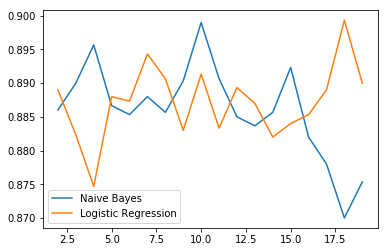

In [18]:
plt.plot(range(2,20),test_acc_list[2:],label = "Naive Bayes")
plt.plot(range(2,20),test_acc_list_lr[2:],label = "Logistic Regression")
plt.legend()
plt.savefig("lenses20_1000_1.png")

In [ ]:
# train_acc_list_lr

In [ ]:
# plt.plot(train_acc_list,label = "Naive Bayes")
# plt.plot(train_acc_list_lr,label = "Logistic Regression")
# plt.legend()
# plt.savefig("ionosphere100_train.png")